In [1]:
import numpy as np
import mpmath
from mpmath import *
import matplotlib.pyplot as plt 


d=15
mp.dps = d

x0=0.36
r=4

n_new=412 #número de pontos novos a serem previstos

for i in range(200): #eliminar o transiente
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    
    
lenght=100 #tamanho da série temporal

x_timeser=matrix(lenght+n_new, 1)

for i in range(lenght+n_new):
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    x_timeser[i,0]=x1
    
print(x_timeser)

x_timeser_r=x_timeser.copy() #cópia da série original que nunca será modificada
x_timeser_o=x_timeser.copy() #cópia da série, no final serão adicionados os novos pontos reconstrúidos pelo método

t=np.arange(0,lenght,1)

plt.plot(t,np.asarray(x_timeser.tolist())[:lenght],'b')
plt.title('time series')
plt.show()


[   0.868876267568456]
[   0.455721196899059]
[   0.992157550383792]
[   0.031123782400899]
[   0.120620370279842]
[   0.424284386213583]
[   0.977068583315785]
[  0.0896222672522811]
[   0.326360465859367]
[   0.879397248733696]
[   0.424230910613208]
[   0.977036180373985]
[  0.0897459304567946]
[   0.326766393692955]
[   0.879960470583423]
[   0.422520163176095]
[   0.975987499542964]
[  0.0937436011153472]
[   0.339822953461096]
[   0.897373255048295]
[   0.368377984689292]
[   0.930702580342191]
[   0.257981149146313]
[   0.765707503325844]
[   0.717598090705387]
[   0.810604283685481]
[   0.614099915824918]
[   0.947924836834987]
[   0.197453362185402]
[   0.633862127788331]
[   0.928323722975922]
[   0.266155153344181]
[   0.781266350770066]
[    0.68355695969796]
[   0.865227370185766]
[   0.466435872268757]
[   0.995493797318563]
[  0.0179435872753223]
[  0.0704864598040606]
[   0.262072475153405]
[   0.773561971681491]
[    0.70065539059894]
[   0.838949656894347]
[   0.54045

In [2]:
def lyapunov(x0,r): #função que calcula lyapunov
    
    for i in range(200): 
        x1=x0*mpf(r*(mpf(1-x0)))
        x1=mpf(x1)
        x0=x1
    
    lyp=0
    for i in range(10000):
        x1=x0*mpf(r*(mpf(1-x0)))
        x1=mpf(x1)
        x0=x1
        aux=mpf(r-mpf(2*mpf(r*x1)))
        #print(aux)
        aux=mpmath.log(abs(aux))
        #print(aux)
        lyp=lyp+aux
        lyp+mpf(lyp)
    lyp=mpf(lyp/100000)
    
    return lyp

In [3]:
def distanc(v1,v2):
    return mpmath.norm(v2-v1,2)
        

[   0.868876267568456]
[   0.455721196899059]
[   0.992157550383792]
[   0.031123782400899]
[   0.120620370279842]
[   0.424284386213583]
[   0.977068583315785]
[  0.0896222672522811]
[   0.326360465859367]
[   0.879397248733696]
[   0.424230910613208]
[   0.977036180373985]
[  0.0897459304567946]
[   0.326766393692955]
[   0.879960470583423]
[   0.422520163176095]
[   0.975987499542964]
[  0.0937436011153472]
[   0.339822953461096]
[   0.897373255048295]
[   0.368377984689292]
[   0.930702580342191]
[   0.257981149146313]
[   0.765707503325844]
[   0.717598090705387]
[   0.810604283685481]
[   0.614099915824918]
[   0.947924836834987]
[   0.197453362185402]
[   0.633862127788331]
[   0.928323722975922]
[   0.266155153344181]
[   0.781266350770066]
[    0.68355695969796]
[   0.865227370185766]
[   0.466435872268757]
[   0.995493797318563]
[  0.0179435872753223]
[  0.0704864598040606]
[   0.262072475153405]
[   0.773561971681491]
[    0.70065539059894]
[   0.838949656894347]
[   0.54045

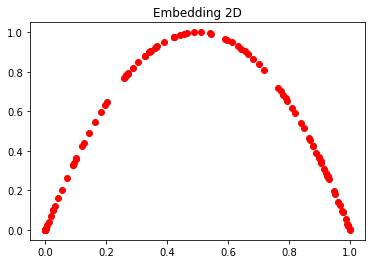

In [4]:
D=2

coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    coor_emb[i,0]=x_timeser[i,0] #pegando as coordenadas no espaço de dimensão D
    coor_emb[i,1]=x_timeser[i+1,0]
print(x_timeser,coor_emb)

plt.plot(coor_emb[:,0],coor_emb[:,1],'ro')
plt.title('Embedding 2D')
plt.show()




0 0.868876267568456 0.455721196899059
1 0.455721196899059 0.992157550383792
2 0.992157550383792 0.031123782400899
3 0.031123782400899 0.120620370279842
4 0.120620370279842 0.424284386213583
5 0.424284386213583 0.977068583315785
6 0.977068583315785 0.0896222672522811
7 0.0896222672522811 0.326360465859367
8 0.326360465859367 0.879397248733696
9 0.879397248733696 0.424230910613208
10 0.424230910613208 0.977036180373985
11 0.977036180373985 0.0897459304567946
12 0.0897459304567946 0.326766393692955
13 0.326766393692955 0.879960470583423
14 0.879960470583423 0.422520163176095
15 0.422520163176095 0.975987499542964
16 0.975987499542964 0.0937436011153472
17 0.0937436011153472 0.339822953461096
18 0.339822953461096 0.897373255048295
19 0.897373255048295 0.368377984689292
20 0.368377984689292 0.930702580342191
21 0.930702580342191 0.257981149146313
22 0.257981149146313 0.765707503325844
23 0.765707503325844 0.717598090705387
24 0.717598090705387 0.810604283685481
25 0.810604283685481 0.614099

lyap 0.0693077728200264 1.0492131342936
dist 0.000663029187776825
b -0.655228370245963 c 0.107330664362546
delta 0.00124888950573952
new value 0.328238629875851
new coor 115 0.0909266982629675 0.328238629875851
0.0909266982629675 0.328238629875851
indmin 109 dist0 0.000566431718243108
lyap 0.0693077728200264 1.0492131342936
dist 0.000594307598461158
b -1.7642803374514 c 0.778171065724807
delta 0.000919901304253343
new value 0.882600119377828
new coor 116 0.328238629875851 0.882600119377828
0.328238629875851 0.882600119377828
indmin 110 dist0 0.000594307598428749
lyap 0.0693077728200264 1.0492131342936
dist 0.000623555338081927
b -0.847734987517094 c 0.179663474998495
delta 0.000842060941428095
new value 0.424288524229261
new coor 117 0.882600119377828 0.424288524229261
0.882600119377828 0.424288524229261
indmin 111 dist0 0.000623555338090743
lyap 0.0693077728200264 1.0492131342936
dist 0.000654242450683691
b -1.95662964738563 c 0.957099643490581
delta 0.00100153188064678
new value 0.97

lyap 0.0693077728200264 1.0492131342936
dist 0.0022813682984764
b -0.190316492263143 c 0.00905233808913804
delta 0.00331886588983404
new value 0.0968176790764884
new coor 144 0.983952070769255 0.0968176790764884
0.983952070769255 0.0968176790764884
indmin 138 dist0 0.00228136829847626
lyap 0.0693077728200264 1.0492131342936
dist 0.00239364158292233
b -0.665435148415486 c 0.110698008384356
delta 0.00345010279778257
new value 0.334442625606634
new coor 145 0.0968176790764884 0.334442625606634
0.0968176790764884 0.334442625606634
indmin 139 dist0 0.00239364158292188
lyap 0.0693077728200264 1.0492131342936
dist 0.00251144018759295
b -1.77452527276202 c 0.787231654388292
delta 0.00365049557570509
new value 0.889087884168862
new coor 146 0.334442625606634 0.889087884168862
0.334442625606634 0.889087884168862
indmin 140 dist0 0.00251144018759702
lyap 0.0693077728200264 1.0492131342936
dist 0.00263503603081957
b -0.85843200992281 c 0.184222767029632
delta 0.00380099218450096
new value 0.431116

lyap 0.0693077728200264 1.0492131342936
dist 0.00191376807899153
b -0.681314561741968 c 0.116045710794356
delta 0.00258628386412522
new value 0.341950422803047
new coor 174 0.907410382806004 0.341950422803047
0.907410382806004 0.341950422803047
indmin 56 dist0 0.00191376807899276
lyap 0.0693077728200264 1.0492131342936
dist 0.00200795060447102
b -1.79687918288457 c 0.807191339821408
delta 0.00307223018253805
new value 0.899975706533555
new coor 175 0.341950422803047 0.899975706533555
0.341950422803047 0.899975706533555
indmin 57 dist0 0.00200795060449282
lyap 0.0693077728200264 1.0492131342936
dist 0.00210676814724664
b -0.729967135770434 c 0.13321092600377
delta 0.00288362442257828
new value 0.366425380096506
new coor 176 0.899975706533555 0.366425380096506
0.899975706533555 0.366425380096506
indmin 58 dist0 0.00210676814724521
lyap 0.0693077728200264 1.0492131342936
dist 0.00221044881100106
b -1.85416450447195 c 0.859478695149438
delta 0.00335097686860837
new value 0.928757740670281


lyap 0.0693077728200264 1.0492131342936
dist 0.000677009164877444
b -1.96477305634988 c 0.965083179539771
delta 0.000666932802884725
new value 0.982719994576382
new coor 204 0.428296244563349 0.982719994576382
0.428296244563349 0.982719994576382
indmin 137 dist0 0.000677009164876108
lyap 0.0693077728200264 1.0492131342936
dist 0.000710326907825151
b -0.190316492263143 c 0.00905469844236162
delta 0.00125437550213691
new value 0.0957854338826398
new coor 205 0.982719994576382 0.0957854338826398
0.982719994576382 0.0957854338826398
indmin 138 dist0 0.000710326907825717
lyap 0.0693077728200264 1.0492131342936
dist 0.000745284321332898
b -0.665435148415486 c 0.11070082210244
delta 0.000805193751937744
new value 0.333120171083712
new coor 206 0.0957854338826398 0.333120171083712
0.0957854338826398 0.333120171083712
indmin 139 dist0 0.000745284321336641
lyap 0.0693077728200264 1.0492131342936
dist 0.000781962098729492
b -1.77452527276202 c 0.7872345365373
delta 0.00134071694144987
new value 0

lyap 0.0693077728200264 1.0492131342936
dist 0.00286092257313791
b -0.541219608835172 c 0.0732255063281568
delta 0.00407917578308642
new value 0.272649392309129
new coor 234 0.933459532939275 0.272649392309129
0.933459532939275 0.272649392309129
indmin 167 dist0 0.00286092257313672
lyap 0.0693077728200264 1.0492131342936
dist 0.00300171753993208
b -1.58745500598433 c 0.629998498616756
delta 0.00440471993307969
new value 0.795929862958705
new coor 235 0.272649392309129 0.795929862958705
0.272649392309129 0.795929862958705
indmin 49 dist0 0.00203947100019596
lyap 0.0693077728200264 1.0492131342936
dist 0.0021398397604165
b -1.30886566807778 c 0.428281775608006
delta 0.00149487145395353
new value 0.655180269765866
new coor 236 0.795929862958705 0.655180269765866
0.795929862958705 0.655180269765866
indmin 50 dist0 0.00213983976041464
lyap 0.0693077728200264 1.0492131342936
dist 0.0022451479819107
b -1.80920399816574 c 0.818300294715426
delta 0.00423416074078708
new value 0.906719079453261


lyap 0.0693077728200264 1.0492131342936
dist 0.000737404252869446
b -1.40131078119788 c 0.490917731656264
delta 0.00098938180506549
new value 0.701150081501473
new coor 263 0.774108822614671 0.701150081501473
0.774108822614671 0.701150081501473
indmin 40 dist0 0.000737404252881829
lyap 0.0693077728200264 1.0492131342936
dist 0.000773694227407571
b -1.67789931378869 c 0.703836172919474
delta 0.00118976244432276
new value 0.839544538116508
new coor 264 0.701150081501473 0.839544538116508
0.701150081501473 0.839544538116508
indmin 41 dist0 0.000773694227410815
lyap 0.0693077728200264 1.0492131342936
dist 0.000811770145326563
b -1.08090504072964 c 0.292088621681583
delta 0.00110469380438328
new value 0.541004867267009
new coor 265 0.839544538116508 0.541004867267009
0.839544538116508 0.541004867267009
indmin 42 dist0 0.000811770145324932
lyap 0.0693077728200264 1.0492131342936
dist 0.00085171989850234
b -1.98690874876907 c 0.986951173644085
delta 0.00129667217934196
new value 0.99410271047

lyap 0.0693077728200264 1.0492131342936
dist 7.86017093649874e-5
b -0.252933046715366 c 0.0159937779765836
delta 0.00011922408938506
new value 0.126526135402376
new coor 293 0.967366295298229 0.126526135402376
0.967366295298229 0.126526135402376
indmin 82 dist0 7.86017093759308e-5
lyap 0.0693077728200264 1.0492131342936
dist 8.24699458551547e-5
b -0.88378193462003 c 0.195267623742485
delta 0.000113977122477116
new value 0.441947955871254
new coor 294 0.126526135402376 0.441947955871254
0.126526135402376 0.441947955871254
indmin 83 dist0 8.24699459467747e-5
lyap 0.0693077728200264 1.0492131342936
dist 8.65285504718389e-5
b -1.97298672255867 c 0.97316914760871
delta 0.000130222793367331
new value 0.986558472676021
new coor 295 0.441947955871254 0.986558472676021
0.441947955871254 0.986558472676021
indmin 84 dist0 8.65285507224769e-5
lyap 0.0693077728200264 1.0492131342936
dist 9.07868919094124e-5
b -0.10659367544906 c 0.00284054890866913
delta 0.000126534829429321
new value 0.05336010513

lyap 0.0693077728200264 1.0492131342936
dist 0.000308968898694972
b -0.848577048458522 c 0.180020714503116
delta 0.000386209931508301
new value 0.424481629195015
new coor 322 0.882841308624211 0.424481629195015
0.882841308624211 0.424481629195015
indmin 116 dist0 0.000308968898709024
lyap 0.0693077728200264 1.0492131342936
dist 0.000324174226613736
b -1.95763117926628 c 0.958079890709471
delta 0.00052076636383863
new value 0.97907597281506
new coor 323 0.424481629195015 0.97907597281506
0.424481629195015 0.97907597281506
indmin 117 dist0 0.00032417422665189
lyap 0.0693077728200264 1.0492131342936
dist 0.000340127856402632
b -0.18279240245551 c 0.008353217711307
delta 0.000437664516612833
new value 0.0916150334860614
new coor 324 0.97907597281506 0.0916150334860614
0.97907597281506 0.0916150334860614
indmin 118 dist0 0.000340127856403926
lyap 0.0693077728200264 1.0492131342936
dist 0.000356866614278125
b -0.657569571346641 c 0.108099355824028
delta 0.000563795080155344
new value 0.32906

lyap 0.0693077728200264 1.0492131342936
dist 0.00103399914804465
b -1.77942323289876 c 0.79158604288361
delta 0.00169417987041768
new value 0.890558706384589
new coor 351 0.335809871961267 0.890558706384589
0.335809871961267 0.890558706384589
indmin 211 dist0 0.00103399914805103
lyap 0.0693077728200264 1.0492131342936
dist 0.00108488548698353
b -0.863905397359107 c 0.186582674481388
delta 0.00135560342508343
new value 0.432630500392095
new coor 352 0.890558706384589 0.432630500392095
0.890558706384589 0.432630500392095
indmin 212 dist0 0.00108488548697855
lyap 0.0693077728200264 1.0492131342936
dist 0.00113827610214239
b -1.97333249431119 c 0.973509447018784
delta 0.00182894212392501
new value 0.987580718217558
new coor 353 0.432630500392095 0.987580718217558
0.432630500392095 0.987580718217558
indmin 213 dist0 0.00113827610213487
lyap 0.0693077728200264 1.0492131342936
dist 0.00119429423681242
b -0.199633480018959 c 0.00996279150471906
delta 0.00153633512088635
new value 0.10058490756

lyap 0.0693077728200264 1.0492131342936
dist 0.00133306681033995
b -1.19742693548442 c 0.358457157093141
delta 0.00162402310547483
new value 0.599525479294948
new coor 381 0.185558702581762 0.599525479294948
0.185558702581762 0.599525479294948
indmin 184 dist0 0.00133306681034045
lyap 0.0693077728200264 1.0492131342936
dist 0.00139867120630007
b -1.93062264527844 c 0.931824652697095
delta 0.00227764648834357
new value 0.96645014588339
new coor 382 0.599525479294948 0.96645014588339
0.599525479294948 0.96645014588339
indmin 185 dist0 0.00139867120626869
lyap 0.0693077728200264 1.0492131342936
dist 0.00146750420017537
b -0.291084323833561 c 0.0211816642452143
delta 0.00185110798827901
new value 0.14646771591092
new coor 383 0.96645014588339 0.14646771591092
0.96645014588339 0.14646771591092
indmin 186 dist0 0.0014675042001758
lyap 0.0693077728200264 1.0492131342936
dist 0.00153972468145546
b -0.985218795365837 c 0.242662504583629
delta 0.00246097695936913
new value 0.493839886162603
new 

lyap 0.0693077728200264 1.0492131342936
dist 0.00054745235504423
b -1.9810774335346 c 0.981166768740837
delta 0.000850115687975533
new value 0.990963774611287
new coor 410 0.435857225327797 0.990963774611287
0.435857225327797 0.990963774611287
indmin 357 dist0 0.00054745235500185
lyap 0.0693077728200264 1.0492131342936
dist 0.000574394201267901
b -0.207497620454598 c 0.0107636663690524
delta 0.000772669470639322
new value 0.104135144962619
new coor 411 0.990963774611287 0.104135144962619
0.990963774611287 0.104135144962619
indmin 358 dist0 0.000574394201267732
lyap 0.0693077728200264 1.0492131342936
dist 0.000602661940232184
b -0.683394189046361 c 0.116756690458697
delta 0.000925087858527335
new value 0.342159638452444
new coor 412 0.104135144962619 0.342159638452444
0.104135144962619 0.342159638452444
indmin 359 dist0 0.000602661940239436
lyap 0.0693077728200264 1.0492131342936
dist 0.000632320823238079
b -1.79343532924877 c 0.804102384166671
delta 0.000862282406130388
new value 0.897

lyap 0.0693077728200264 1.0492131342936
dist 0.000785278577193684
b -0.0281562649759116 c 0.000197794761861134
delta 0.00126341202669877
new value 0.0147098385013052
new coor 439 0.00503110442908149 0.0147098385013052
0.00503110442908149 0.0147098385013052
indmin 190 dist0 0.000785278577193677
lyap 0.0693077728200264 1.0492131342936
dist 0.000823924597270993
b -0.0892608781197045 c 0.0019915962914205
delta 0.00105792108342063
new value 0.0451593996015626
new coor 440 0.0147098385013052 0.0451593996015626
0.0147098385013052 0.0451593996015626
indmin 191 dist0 0.000823924597271039
lyap 0.0693077728200264 1.0492131342936
dist 0.000864472509124335
b -0.331931396305553 c 0.0275441454498741
delta 0.00136749912518361
new value 0.166649447715368
new coor 441 0.0451593996015626 0.166649447715368
0.0451593996015626 0.166649447715368
indmin 192 dist0 0.00086447250912388
lyap 0.0693077728200264 1.0492131342936
dist 0.000907015910808515
b -1.09324041426373 c 0.298793295680486
delta 0.00119191341650

lyap 0.0693077728200264 1.0492131342936
dist 0.000530335003890175
b -0.521729529414726 c 0.068050289489675
delta 0.000737498888936963
new value 0.261233514151831
new coor 468 0.935515687819903 0.261233514151831
0.935515687819903 0.261233514151831
indmin 224 dist0 0.000530335003891655
lyap 0.0693077728200264 1.0492131342936
dist 0.00055643445165877
b -1.54092875096809 c 0.593615180246873
delta 0.000833410213988689
new value 0.770881080591039
new coor 469 0.261233514151831 0.770881080591039
0.261233514151831 0.770881080591039
indmin 225 dist0 0.000556434451657109
lyap 0.0693077728200264 1.0492131342936
dist 0.000583818335052094
b -1.44204288978491 c 0.519871756794101
delta 0.000817803649227528
new value 0.721430346717069
new coor 470 0.770881080591039 0.721430346717069
0.770881080591039 0.721430346717069
indmin 226 dist0 0.000583818335073148
lyap 0.0693077728200264 1.0492131342936
dist 0.000612549865200167
b -1.63145110925953 c 0.665407972459401
delta 0.000912176814305762
new value 0.816

lyap 0.0693077728200264 1.0492131342936
dist 0.00224110316794927
b -1.36772019277197 c 0.467662011009436
delta 0.0032375420398584
new value 0.685478867405916
new coor 498 0.783216503239063 0.685478867405916
0.783216503239063 0.685478867405916
indmin 254 dist0 0.00224110316794975
lyap 0.0693077728200264 1.0492131342936
dist 0.00235139487911986
b -1.73131646905066 c 0.749361270363252
delta 0.00341094606382311
new value 0.867363707557243
new coor 499 0.685478867405916 0.867363707557243
0.685478867405916 0.867363707557243
indmin 255 dist0 0.00235139487911761
lyap 0.0693077728200264 1.0492131342936
dist 0.00246711439108089
b -0.933564220821573 c 0.217882360584391
delta 0.00356539768109599
new value 0.468564809251334
new coor 500 0.867363707557243 0.468564809251334
0.867363707557243 0.468564809251334
indmin 256 dist0 0.00246711439107896
lyap 0.0693077728200264 1.0492131342936
dist 0.00258852882292479
b -1.99191809067405 c 0.991930897522327
delta 0.0037536469258996
new value 0.997835868799975

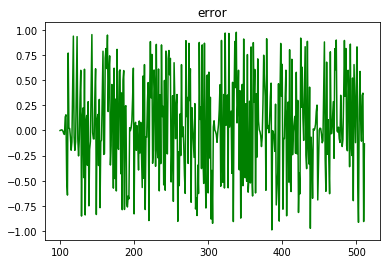

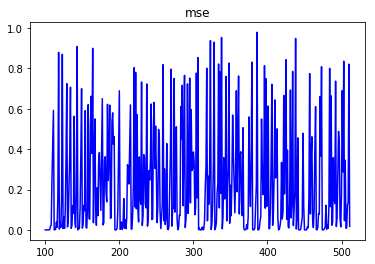

mae: 0.399654198946355 
 mse: 0.240932279587018 
 res: 29569.9152005802
0 0.0037478121965069 0.00393225378144077
1 0.00137127965092377 0.00143876462053876
2 0.00143876462053882 0.00150957073702627
3 0.00150957073702793 0.00158386144443497
4 0.00158386144444794 0.001661808230416
5 0.00156289697874481 0.00163981203764683
6 0.00163981203764738 0.00172051232767238
7 0.00172051232766629 0.00180518413190152
8 0.00180518413190138 0.00189402290100931
9 0.000894667135440431 0.000938696509324928
10 0.000659718422567182 0.00069218523389294
11 0.000692185233897739 0.000726249838769592
12 0.000726249838756176 0.000761990869601585
13 0.000761990869594298 0.000799490828590136
14 0.000799490828600518 0.000838836278114933
15 0.000631929935020517 0.000663029187776825
16 0.000566431718243108 0.000594307598461158
17 0.000594307598428749 0.000623555338081927
18 0.000623555338090743 0.000654242450683691
19 0.000654242450669186 0.000686439772254539
20 0.00068643977225399 0.000720221624950391
21 0.00072022162

In [6]:

for i in range(lenght):
        print(i,coor_emb[i,0],coor_emb[i,1])

dist0=[]
dist1=[]
for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1])
    
    np_m_dist=np.asarray(m_dist.tolist())

    ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
    dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
    print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    dist0.append(dist_0)
    dist1.append(dist_1)
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)

x_timeser_r2=x_timeser_r.copy()

for i in range(n_new):
   print(i,dist0[i],dist1[i])

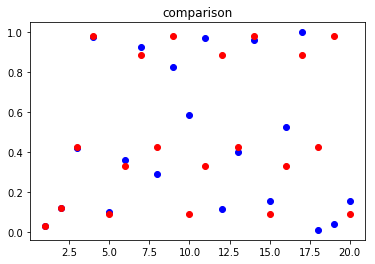

In [7]:
t=np.arange(1,21,1)


plt.plot(t,x_timeser[lenght:lenght+20],'bo',t,x_timeser_r[lenght:lenght+20],'ro')
plt.title('comparison')
plt.show()

0.162362322893557 0.544003195992661 0.992254874969726
indmin 70 dist0 0.0579229768636282
lyap 0.0693077728200264 1.0492131342936
dist 0.0607735481027027
b -0.00323653570958713 c -0.000714207171580478
delta 0.0535472114093847
new value 0.0283918735594859
new coor 100 0.544003195992661 0.992254874969726 0.0283918735594859
0.544003195992661 0.992254874969726 0.0283918735594859
indmin 43 dist0 0.00444005361885294
lyap 0.0693077728200264 1.0492131342936
dist 0.00465856257386831
b -0.202676345248123 c 0.0102548298042536
delta 0.00764079224439802
new value 0.10515856874626
new coor 101 0.992254874969726 0.0283918735594859 0.10515856874626
0.992254874969726 0.0283918735594859 0.10515856874626
indmin 44 dist0 0.00465856257386825
lyap 0.0693077728200264 1.0492131342936
dist 0.00488782503943114
b -0.728549979146219 c 0.132692640601281
delta 0.00380916117148168
new value 0.36617957015885
new coor 102 0.0283918735594859 0.10515856874626 0.36617957015885
0.0283918735594859 0.10515856874626 0.3661795

lyap 0.0693077728200264 1.0492131342936
dist 0.00629983878613777
b -0.727773045038972 c 0.132399946394901
delta 0.00733617786681925
new value 0.367554611452896
new coor 126 0.363886522519486 0.929344929740216 0.367554611452896
0.363886522519486 0.929344929740216 0.367554611452896
indmin 122 dist0 0.00629983878613796
lyap 0.0693077728200264 1.0492131342936
dist 0.00660987359834817
b -1.85868985948043 c 0.863667684158248
delta 0.00756684230050265
new value 0.933128350890468
new coor 127 0.929344929740216 0.367554611452896 0.933128350890468
0.929344929740216 0.367554611452896 0.933128350890468
indmin 123 dist0 0.00660987359834167
lyap 0.0693077728200264 1.0492131342936
dist 0.00693516619540055
b -0.735109222905791 c 0.135076065022155
delta 0.00901717874598492
new value 0.372063200825888
new coor 128 0.367554611452896 0.933128350890468 0.372063200825888
0.367554611452896 0.933128350890468 0.372063200825888
indmin 124 dist0 0.00693516619540094
lyap 0.0693077728200264 1.0492131342936
dist 0.

lyap 0.0693077728200264 1.0492131342936
dist 0.0230488805300223
b -2.05543136204781 c 1.05600624120579
delta 0.0278050223259016
new value 1.04161819218685
new coor 153 1.0277156810239 0.471183804643264 1.04161819218685
1.0277156810239 0.471183804643264 1.04161819218685
indmin 149 dist0 0.0230488805300218
lyap 0.0693077728200264 1.0492131342936
dist 0.0241831881828628
b -0.942367609286528 c 0.221801903520542
delta 0.0291392681829738
new value 0.485753438734751
new coor 154 0.471183804643264 1.04161819218685 0.485753438734751
0.471183804643264 1.04161819218685 0.485753438734751
indmin 150 dist0 0.0241831881828629
lyap 0.0693077728200264 1.0492131342936
dist 0.0253733186705534
b -2.08323638437371 c 1.08473020704845
delta 0.0308707788150292
new value 1.05705358159437
new coor 155 1.04161819218685 0.485753438734751 1.05705358159437
1.04161819218685 0.485753438734751 1.05705358159437
indmin 151 dist0 0.0253733186705523
lyap 0.0693077728200264 1.0492131342936
dist 0.0266220192097604
b -0.9715

lyap 0.0693077728200264 1.0492131342936
dist 0.0843276965843987
b -1.66368787614358 c 0.68936397637087
delta 0.101987468561803
new value 0.88283767235269
new coor 180 0.831843938071788 1.42014193561091 0.88283767235269
0.831843938071788 1.42014193561091 0.88283767235269
indmin 176 dist0 0.0843276965843986
lyap 0.0693077728200264 1.0492131342936
dist 0.0884777268410762
b -2.84028387122182 c 2.01394101212291
delta 0.106997292634794
new value 1.47364058192831
new coor 181 1.42014193561091 0.88283767235269 1.47364058192831
1.42014193561091 0.88283767235269 1.47364058192831
indmin 177 dist0 0.0884777268410758
lyap 0.0693077728200264 1.0492131342936
dist 0.0928319930940977
b -1.76567534470538 c 0.776247042876998
delta 0.112344342948231
new value 0.939009843826806
new coor 182 0.88283767235269 1.47364058192831 0.939009843826806
0.88283767235269 1.47364058192831 0.939009843826806
indmin 178 dist0 0.0928319930940977
lyap 0.0693077728200264 1.0492131342936
dist 0.0974005464369796
b -2.9472811638

lyap 0.0693077728200264 1.0492131342936
dist 0.323708689183988
b -4.53505394990679 c 5.10334665855996
delta 0.391570803719211
new value 2.463312376813
new coor 208 2.26752697495339 2.92645618711832 2.463312376813
2.26752697495339 2.92645618711832 2.463312376813
indmin 204 dist0 0.323708689183988
lyap 0.0693077728200264 1.0492131342936
dist 0.339639408376803
b -5.85291237423663 c 8.52194361646744
delta 0.41086347443227
new value 3.13188792433445
new coor 209 2.92645618711832 2.463312376813 3.13188792433445
2.92645618711832 2.463312376813 3.13188792433445
indmin 205 dist0 0.339639408376802
lyap 0.0693077728200264 1.0492131342936
dist 0.356354128192647
b -4.926624753626 c 6.02145372331713
delta 0.431064461272211
new value 2.67884460744911
new coor 210 2.463312376813 3.13188792433445 2.67884460744911
2.463312376813 3.13188792433445 2.67884460744911
indmin 206 dist0 0.356354128192648
lyap 0.0693077728200264 1.0492131342936
dist 0.37389143175947
b -6.2637758486689 c 9.75758350894743
delta 0.

lyap 0.0693077728200264 1.0492131342936
dist 0.588908287260965
b -16.0949212858846 c 64.5649010641262
delta 0.887066481339197
new value 8.49099388361188
new coor 236 7.74862144088522 8.04746064294229 8.49099388361188
7.74862144088522 8.04746064294229 8.49099388361188
indmin 233 dist0 0.588908287260971
lyap 0.0693077728200264 1.0492131342936
dist 0.617890309888557
b -16.9819877672238 c 72.0012153007452
delta 0.618908170213322
new value 8.80044796871854
new coor 237 8.04746064294229 8.49099388361188 8.80044796871854
8.04746064294229 8.49099388361188 8.80044796871854
indmin 234 dist0 0.617890309888561
lyap 0.0693077728200264 1.0492131342936
dist 0.648298628687818
b -17.6008959374371 c 77.3200769045319
delta 0.715003624019987
new value 9.15794978072854
new coor 238 8.49099388361188 8.80044796871854 9.15794978072854
8.49099388361188 8.80044796871854 9.15794978072854
indmin 235 dist0 0.648298628687817
lyap 0.0693077728200264 1.0492131342936
dist 0.680203436163784
b -18.3158995614571 c 83.628

lyap 0.0693077728200264 1.0492131342936
dist 2.2606419650991
b -57.2055151253016 c 816.292106945011
delta 2.7023199238919
new value 29.9539175245967
new coor 264 27.2730506711939 28.6027575626508 29.9539175245967
27.2730506711939 28.6027575626508 29.9539175245967
indmin 261 dist0 2.2606419650991
lyap 0.0693077728200264 1.0492131342936
dist 2.37189524171726
b -59.9078350491935 c 895.205041692615
delta 2.8510583141896
new value 31.3794466816915
new coor 265 28.6027575626508 29.9539175245967 31.3794466816915
28.6027575626508 29.9539175245967 31.3794466816915
indmin 262 dist0 2.37189524171726
lyap 0.0693077728200264 1.0492131342936
dist 2.48862364077823
b -62.758893363383 c 982.334193044174
delta 3.05645612103105
new value 32.907674742207
new coor 266 29.9539175245967 31.3794466816915 32.907674742207
29.9539175245967 31.3794466816915 32.907674742207
indmin 263 dist0 2.48862364077822
lyap 0.0693077728200264 1.0492131342936
dist 2.61109661021805
b -65.8153494844141 c 1080.46484581367
delta 3

lyap 0.0693077728200264 1.0492131342936
dist 8.67792524730172
b -214.912266724397 c 11519.2977462486
delta 10.4924450736545
new value 112.702355899026
new coor 292 102.458017939895 107.456133362198 112.702355899026
102.458017939895 107.456133362198 112.702355899026
indmin 289 dist0 8.67792524730171
lyap 0.0693077728200264 1.0492131342936
dist 9.10499314788695
b -225.404711798051 c 12671.4241336481
delta 11.0266752092352
new value 118.215693503643
new coor 293 107.456133362198 112.702355899026 118.215693503643
107.456133362198 112.702355899026 118.215693503643
indmin 290 dist0 9.10499314788697
lyap 0.0693077728200264 1.0492131342936
dist 9.5530783984162
b -236.431387007286 c 13941.6086261094
delta 11.5484309649202
new value 123.989908986103
new coor 294 112.702355899026 118.215693503643 123.989908986103
112.702355899026 118.215693503643 123.989908986103
indmin 291 dist0 9.55307839841622
lyap 0.0693077728200264 1.0492131342936
dist 10.0232153285547
b -247.979817972207 c 15336.77114084
de

lyap 0.0693077728200264 1.0492131342936
dist 33.3119475619634
b -820.41940039044 c 167865.979866691
delta 40.2997899528527
new value 430.359595171646
new coor 320 391.007259617577 410.20970019522 430.359595171646
391.007259617577 410.20970019522 430.359595171646
indmin 317 dist0 33.3119475619633
lyap 0.0693077728200264 1.0492131342936
dist 34.9513329109115
b -860.719190343293 c 184762.537475753
delta 42.2773547209582
new value 451.498272532125
new coor 321 410.20970019522 430.359595171646 451.498272532125
410.20970019522 430.359595171646 451.498272532125
indmin 318 dist0 34.9513329109114
lyap 0.0693077728200264 1.0492131342936
dist 36.6713975511962
b -902.996545064251 c 203358.760649247
delta 44.3589652830833
new value 473.677755173667
new coor 322 430.359595171646 451.498272532125 473.677755173667
430.359595171646 451.498272532125 473.677755173667
indmin 319 dist0 36.6713975511964
lyap 0.0693077728200264 1.0492131342936
dist 38.4761119636172
b -947.355510347334 c 223828.977685325
delt

lyap 0.0693077728200264 1.0492131342936
dist 127.874557425585
b -3144.78383888873 c 2466434.49301763
delta 154.684909623365
new value 1649.73437425605
new coor 348 1498.67645285776 1572.39191944436 1649.73437425605
1498.67645285776 1572.39191944436 1649.73437425605
indmin 345 dist0 127.874557425584
lyap 0.0693077728200264 1.0492131342936
dist 134.167665192903
b -3299.46874851209 c 2715038.36854905
delta 162.297714745919
new value 1730.88323162901
new coor 349 1572.39191944436 1649.73437425605 1730.88323162901
1572.39191944436 1649.73437425605 1730.88323162901
indmin 346 dist0 134.167665192903
lyap 0.0693077728200264 1.0492131342936
dist 140.7704765179
b -3461.76646325801 c 2988707.42684463
delta 170.286049808462
new value 1816.02625653324
new coor 350 1649.73437425605 1730.88323162901 1816.02625653324
1649.73437425605 1730.88323162901 1816.02625653324
indmin 347 dist0 140.7704765179
lyap 0.0693077728200264 1.0492131342936
dist 147.698232883349
b -3632.05251306647 c 3289971.06816404
del

lyap 0.0693077728200264 1.0492131342936
dist 490.872003396772
b -12067.3117858472 c 36316856.5017874
delta 593.790981487925
new value 6330.55138366755
new coor 376 5750.68626231576 6033.65589292358 6330.55138366755
5750.68626231576 6033.65589292358 6330.55138366755
indmin 373 dist0 490.872003396775
lyap 0.0693077728200264 1.0492131342936
dist 515.029353220907
b -12661.1027673351 c 39978844.3308464
delta 623.013612720384
new value 6642.05819002774
new coor 377 6033.65589292358 6330.55138366755 6642.05819002774
6033.65589292358 6330.55138366755 6642.05819002774
indmin 374 dist0 515.029353220912
lyap 0.0693077728200264 1.0492131342936
dist 540.375561946116
b -13284.1163800555 c 44010114.6745988
delta 653.673695709886
new value 6968.89503788268
new coor 378 6330.55138366755 6642.05819002774 6968.89503788268
6330.55138366755 6642.05819002774 6968.89503788268
indmin 375 dist0 540.375561946115
lyap 0.0693077728200264 1.0492131342936
dist 566.969137045146
b -13937.7900757654 c 48447902.8621886

lyap 0.0693077728200264 1.0492131342936
dist 1884.31012837707
b -46318.2175936884 c 535045420.633713
delta 2279.38555786683
new value 24298.8015757776
new coor 404 22072.8731231681 23159.1087968442 24298.8015757776
22072.8731231681 23159.1087968442 24298.8015757776
indmin 401 dist0 1884.31012837707
lyap 0.0693077728200264 1.0492131342936
dist 1977.04293577567
b -48597.6031515552 c 589001866.818231
delta 2391.56116441206
new value 25494.5821579836
new coor 405 23159.1087968442 24298.8015757776 25494.5821579836
23159.1087968442 24298.8015757776 25494.5821579836
indmin 402 dist0 1977.04293577567
lyap 0.0693077728200264 1.0492131342936
dist 2074.33941527821
b -50989.1643159673 c 648399626.231535
delta 2509.25740301209
new value 26749.2108594897
new coor 406 24298.8015757776 25494.5821579836 26749.2108594897
24298.8015757776 25494.5821579836 26749.2108594897
indmin 403 dist0 2074.3394152782
lyap 0.0693077728200264 1.0492131342936
dist 2176.42415949279
b -53498.4217189794 c 713787443.862841


lyap 0.0693077728200264 1.0492131342936
dist 7233.30040282269
b -177797.15367304 c 7883816880.95531
delta 8749.87602273358
new value 93273.5148478866
new coor 432 84728.8444130707 88898.5768365198 93273.5148478866
84728.8444130707 88898.5768365198 93273.5148478866
indmin 429 dist0 7233.30040282269
lyap 0.0693077728200264 1.0492131342936
dist 7589.27378693272
b -186547.029695773 c 8678878246.55236
delta 9180.48485137029
new value 97863.7572735717
new coor 433 88898.5768365198 93273.5148478866 97863.7572735717
88898.5768365198 93273.5148478866 97863.7572735717
indmin 430 dist0 7589.27378693276
lyap 0.0693077728200264 1.0492131342936
dist 7962.76573699994
b -195727.514547143 c 9554119757.64808
delta 9632.28530567462
new value 102679.899926409
new coor 434 93273.5148478866 97863.7572735717 102679.899926409
93273.5148478866 97863.7572735717 102679.899926409
indmin 431 dist0 7962.76573699996
lyap 0.0693077728200264 1.0492131342936
dist 8354.63839656338
b -205359.799852818 c 10517627421.7391


lyap 0.0693077728200264 1.0492131342936
dist 27766.466851473
b -682505.283557019 c 116171324649.563
delta 33588.1450067252
new value 358046.714281872
new coor 460 325246.291920906 341252.641778509 358046.714281872
325246.291920906 341252.641778509 358046.714281872
indmin 457 dist0 27766.4668514731
lyap 0.0693077728200264 1.0492131342936
dist 29132.9417134933
b -716093.428563744 c 127886965422.175
delta 35241.1229031992
new value 375667.275733472
new coor 461 341252.641778509 358046.714281872 375667.275733472
341252.641778509 358046.714281872 375667.275733472
indmin 458 dist0 29132.9417134934
lyap 0.0693077728200264 1.0492131342936
dist 30566.6650864071
b -751334.551466943 c 140784106099.621
delta 36975.4490107574
new value 394155.00023885
new coor 462 358046.714281872 375667.275733472 394155.00023885
358046.714281872 375667.275733472 394155.00023885
indmin 459 dist0 30566.6650864071
lyap 0.0693077728200264 1.0492131342936
dist 32070.9464802118
b -788310.000477701 c 154981898748.408
del

lyap 0.0693077728200264 1.0492131342936
dist 106587.123232585
b -2619928.14420262 c 1711849824763.4
delta 128934.796433798
new value 1374431.47031821
new coor 488 1248520.50443235 1309964.07210131 1374431.47031821
1248520.50443235 1309964.07210131 1374431.47031821
indmin 485 dist0 106587.123232585
lyap 0.0693077728200264 1.0492131342936
dist 111832.609642198
b -2748862.94063642 c 1884486691462.44
delta 135280.081884026
new value 1442071.51126022
new coor 489 1309964.07210131 1374431.47031821 1442071.51126022
1309964.07210131 1374431.47031821 1442071.51126022
indmin 486 dist0 111832.609642198
lyap 0.0693077728200264 1.0492131342936
dist 117336.242878923
b -2884143.02252045 c 2074533670266.9
delta 141937.638721352
new value 1513040.3306209
new coor 490 1374431.47031821 1442071.51126022 1513040.3306209
1374431.47031821 1442071.51126022 1513040.3306209
indmin 487 dist0 117336.242878923
lyap 0.0693077728200264 1.0492131342936
dist 123110.72715723
b -3026080.6612418 c 2283746539404.31
delta 

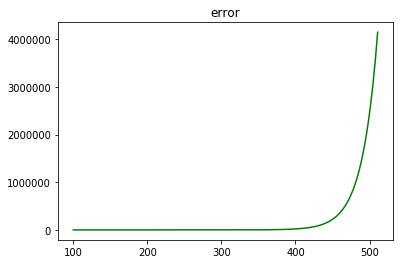

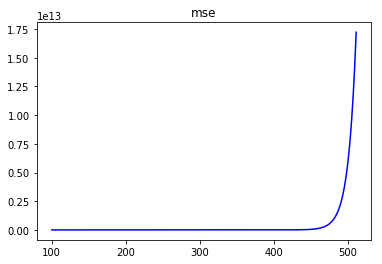

mae: 214720.965400429 
 mse: 456182813888.252 
 res: 1396814330.72686


In [8]:
D=3

x_timeser=x_timeser_o.copy()
x_timeser_r=x_timeser_o.copy()

coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    coor_emb[i,0]=x_timeser[i,0] #pegando as coordenadas no espaço de dimensão D
    coor_emb[i,1]=x_timeser[i+1,0]
    coor_emb[i,2]=x_timeser[i+2,0]

for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1],coor_emb[l-D,2])
    
    np_m_dist=np.asarray(m_dist.tolist())

    ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
    dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
    print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1],coor_emb[l-D+1,2])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)

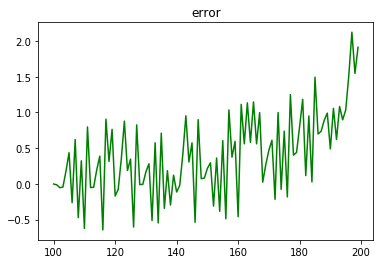

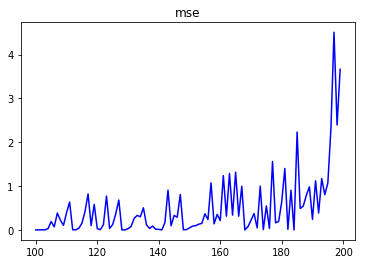

mae: 214720.965400429 
 mse: 456182813888.252 
 res: 1396814330.72686


In [9]:
mae_f2=mae_f[:200-lenght]
mse_f2=mse_f[:200-lenght]
res_f2=res_f[:200-lenght]
error2=error[:200-lenght]

mae2=sum(mae_f2)/mae_f2.shape[0]
mse2=sum(mse_f2)/mse_f2.shape[0]
res2=sum(res_f2)

t=np.arange(lenght,200,1)

plt.plot(t,error2,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f2,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)

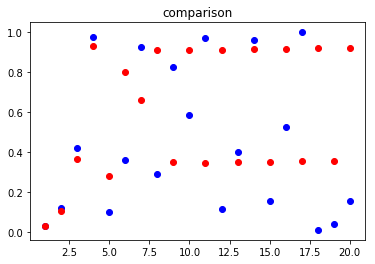

In [10]:
#print(sum(mae_f),mae_f.shape[0])
#print(mae_f,abs(mae_f))

t=np.arange(1,21,1)


plt.plot(t,x_timeser[lenght:lenght+20],'bo',t,x_timeser_r[lenght:lenght+20],'ro')
plt.title('comparison')
plt.show()



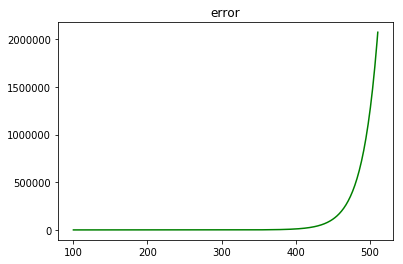

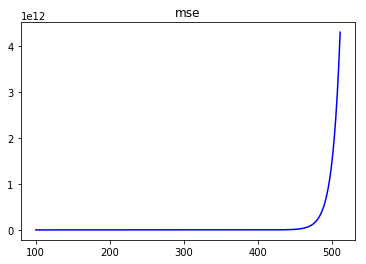

mae: 107360.529031089 
 mse: 114045711592.789 
 res: 698421862.704213


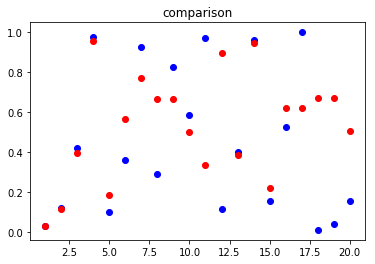

0.0693077728200264


In [11]:
x_multdim=(x_timeser_r+x_timeser_r2)/2

#for i in range (x_multdim.shape[0]): print(i,x_multdim[i],x_timeser_r[i],x_timeser_r2[i])
    
error=x_multdim-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]

mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]


t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()

print('mae:',mae,'\n mse:',mse,'\n res:',res)

t=np.arange(1,21,1)


plt.plot(t,x_timeser[lenght:lenght+20],'bo',t,x_multdim[lenght:lenght+20],'ro')
plt.title('comparison')
plt.show()

lyap=lyapunov(x0,r)
print(lyap)


0.162362322893557 0.544003195992661 0.992254874969726
indmin 70 dist0 0.0579229768636282
lyap 0.0693077728200264 1.0492131342936
dist 0.0607735481027027
b -0.00323653570958713 c -0.000714207171580478
delta 0.0535472114093847
new value 0.0283918735594859
new coor 100 0.544003195992661 0.992254874969726 0.0283918735594859
0.544003195992661 0.992254874969726 0.0283918735594859
lyap 0.0693077728200264 1.10084820117419
dist 0.0637644048869793
b -0.00323653570958713 c 1.19149194484142
delta 0
new value 0.00161826785479356
new coor 101 0.992254874969726 0.0283918735594859 0.00161826785479356
0.992254874969726 0.0283918735594859 0.00161826785479356
lyap 0.0693077728200264 1.15502439153544
dist 0.0669024511078334
b -0.00323653570958713 c 1.20451240838886
delta 0
new value 0.00161826785479356
new coor 102 0.0283918735594859 0.00161826785479356 0.00161826785479356
0.0283918735594859 0.00161826785479356 0.00161826785479356
lyap 0.0693077728200264 1.21186676202845
dist 0.0701949304187739
b -0.00323

lyap 0.0693077728200264 4.43379158809661
dist 0.256818407575469
b -0.00323653570958713 c 1.16846414859351
delta 0
new value 0.00161826785479356
new coor 130 0.00161826785479356 0.00161826785479356 0.00161826785479356
0.00161826785479356 0.00161826785479356 0.00161826785479356
lyap 0.0693077728200264 4.65199236895142
dist 0.269457246356548
b -0.00323653570958713 c 1.16181263544906
delta 0
new value 0.00161826785479356
new coor 131 0.00161826785479356 0.00161826785479356 0.00161826785479356
0.00161826785479356 0.00161826785479356 0.00161826785479356
lyap 0.0693077728200264 4.88093149413741
dist 0.282718082007875
b -0.00323653570958713 c 1.1544903291689
delta 0
new value 0.00161826785479356
new coor 132 0.00161826785479356 0.00161826785479356 0.00161826785479356
0.00161826785479356 0.00161826785479356 0.00161826785479356
lyap 0.0693077728200264 5.12113743123623
dist 0.296631524944957
b -0.00323653570958713 c 1.14642958147194
delta 0
new value 0.00161826785479356
new coor 133 0.00161826785

lyap 0.0693077728200264 18.7364294290042
dist 1.08526976832321
b -0.00323653570958713 c 0.0566093730267938
delta 0
new value 0.00161826785479356
new coor 160 0.00161826785479356 0.00161826785479356 0.00161826785479356
0.00161826785479356 0.00161826785479356 0.00161826785479356
lyap 0.0693077728200264 19.6585078466763
dist 1.13867929517648
b -0.00323653570958713 c -0.0621706942004956
delta 0.498691539897542
new value 0.250964037803565
new coor 161 0.00161826785479356 0.00161826785479356 0.250964037803565
0.00161826785479356 0.00161826785479356 0.250964037803565
lyap 0.0693077728200264 20.6259646333464
dist 1.19471727224734
b -0.00323653570958713 c -0.628438892149448
delta 1.58548605915069
new value 0.79436129743014
new coor 162 0.00161826785479356 0.250964037803565 0.79436129743014
0.00161826785479356 0.250964037803565 0.79436129743014
lyap 0.0693077728200264 21.6410330007823
dist 1.25351305380932
b -0.00323653570958713 c -1.47206136690971
delta 2.4265728801753
new value 1.2149047079424

lyap 0.0693077728200264 83.0734231932846
dist 4.81185996960702
b -0.00323653570958713 c -11.3538648650229
delta 6.73910008348703
new value 3.37116830959831
new coor 191 3.10035726415933 3.23249831586713 3.37116830959831
3.10035726415933 3.23249831586713 3.37116830959831
lyap 0.0693077728200264 87.1617267251245
dist 5.04866668049326
b -0.00323653570958713 c -12.3430535302459
delta 7.0265371696268
new value 3.51488685266819
new coor 192 3.23249831586713 3.37116830959831 3.51488685266819
3.23249831586713 3.37116830959831 3.51488685266819
lyap 0.0693077728200264 91.4512284877096
dist 5.29712739184398
b -0.00323653570958713 c -13.4313936531422
delta 7.32977387698504
new value 3.66650520634731
new coor 193 3.37116830959831 3.51488685266819 3.66650520634731
3.37116830959831 3.51488685266819 3.66650520634731
lyap 0.0693077728200264 95.9518300765895
dist 5.55781563354908
b -0.00323653570958713 c -14.6266062105246
delta 7.64894994867019
new value 3.82609324218989
new coor 194 3.51488685266819 3.

lyap 0.0693077728200264 368.330244948775
dist 21.3347842563424
b -0.00323653570958713 c -179.158159047714
delta 26.7699952683227
new value 13.3866159020161
new coor 222 12.2037694331941 12.7809823672701 13.3866159020161
12.2037694331941 12.7809823672701 13.3866159020161
lyap 0.0693077728200264 386.456930757832
dist 22.3847358590747
b -0.00323653570958713 c -196.568419775975
delta 28.0405722049152
new value 14.0219043703124
new coor 223 12.7809823672701 13.3866159020161 14.0219043703124
12.7809823672701 13.3866159020161 14.0219043703124
lyap 0.0693077728200264 405.475687589908
dist 23.486358871034
b -0.00323653570958713 c -215.704293558479
delta 29.373749925896
new value 14.6884932308028
new coor 224 13.3866159020161 14.0219043703124 14.6884932308028
13.3866159020161 14.0219043703124 14.6884932308028
lyap 0.0693077728200264 425.430417056058
dist 24.6421962042217
b -0.00323653570958713 c -236.737872151226
delta 30.7725770627042
new value 15.3879067992069
new coor 225 14.0219043703124 14.

lyap 0.0693077728200264 1633.09954169544
dist 94.593986969627
b -0.00323653570958713 c -3329.235293093
delta 115.399051914854
new value 57.7011442252818
new coor 253 52.4596843271908 55.0174891348453 57.7011442252818
52.4596843271908 55.0174891348453 57.7011442252818
lyap 0.0693077728200264 1713.46948875571
dist 99.2492535537298
b -0.00323653570958713 c -3662.0951730136
delta 121.030494928053
new value 60.5168657318815
new coor 254 55.0174891348453 57.7011442252818 60.5168657318815
55.0174891348453 57.7011442252818 60.5168657318815
lyap 0.0693077728200264 1797.79469281382
dist 104.133620397409
b -0.00323653570958713 c -4028.38364112748
delta 126.939097897319
new value 63.4711672165142
new coor 255 57.7011442252818 60.5168657318815 63.4711672165142
57.7011442252818 60.5168657318815 63.4711672165142
lyap 0.0693077728200264 1886.26980446358
dist 109.258362242505
b -0.00323653570958713 c -4431.46072766814
delta 133.138435176127
new value 66.5708358559182
new coor 256 60.5168657318815 63.47

lyap 0.0693077728200264 7240.82301049369
dist 419.410023710452
b -0.00323653570958713 c -64597.342758527
delta 508.320146211601
new value 254.161691373655
new coor 284 230.922795210453 242.263195810504 254.161691373655
230.922795210453 242.263195810504 254.161691373655
lyap 0.0693077728200264 7597.16660570527
dist 440.050505531395
b -0.00323653570958713 c -71099.093789114
delta 533.288266481582
new value 266.645751508646
new coor 285 242.263195810504 254.161691373655 266.645751508646
242.263195810504 254.161691373655 266.645751508646
lyap 0.0693077728200264 7971.04698612266
dist 461.706770156076
b -0.00323653570958713 c -78255.9043628064
delta 559.485136050727
new value 279.744186293218
new coor 286 254.161691373655 266.645751508646 279.744186293218
254.161691373655 266.645751508646 279.744186293218
lyap 0.0693077728200264 8363.32719191127
dist 484.428807440029
b -0.00323653570958713 c -86133.8070033635
delta 586.971232705598
new value 293.487234620654
new coor 287 266.645751508646 279

lyap 0.0693077728200264 32104.3001548233
dist 1859.5766350908
b -0.00323653570958713 c -1266121.10095365
delta 2250.44093542245
new value 1125.22208597908
new coor 315 1022.18579080357 1072.4666976077 1125.22208597908
1022.18579080357 1072.4666976077 1125.22208597908
lyap 0.0693077728200264 33684.2533897445
dist 1951.09222976276
b -0.00323653570958713 c -1393750.51379699
delta 2361.14422583594
new value 1180.57373118583
new coor 316 1072.4666976077 1125.22208597908 1180.57373118583
1072.4666976077 1125.22208597908 1180.57373118583
lyap 0.0693077728200264 35341.9610753935
dist 2047.11159368527
b -0.00323653570958713 c -1534248.33701353
delta 2477.29557139728
new value 1238.6494039665
new coor 317 1125.22208597908 1180.57373118583 1238.6494039665
1125.22208597908 1180.57373118583 1238.6494039665
lyap 0.0693077728200264 37081.2497519958
dist 2147.85637145927
b -0.00323653570958713 c -1688912.19168033
delta 2599.16308967556
new value 1299.58316310563
new coor 318 1180.57373118583 1238.6494

lyap 0.0693077728200264 142343.775968184
dist 8244.97524208661
b -0.00323653570958713 c -24873357.2309935
delta 9974.63928791334
new value 4987.32126222452
new coor 346 4530.47983568984 4753.41488288752 4987.32126222452
4530.47983568984 4753.41488288752 4987.32126222452
lyap 0.0693077728200264 149348.959330764
dist 8650.73631592278
b -0.00323653570958713 c -27381539.5384308
delta 10465.4745785241
new value 5232.73890752989
new coor 347 4753.41488288752 4987.32126222452 5232.73890752989
4753.41488288752 4987.32126222452 5232.73890752989
lyap 0.0693077728200264 156698.889722917
dist 9076.46616397676
b -0.00323653570958713 c -30142655.1684036
delta 10980.4654124324
new value 5490.23432448407
new coor 348 4987.32126222452 5232.73890752989 5490.23432448407
4987.32126222452 5232.73890752989 5490.23432448407
lyap 0.0693077728200264 164410.533226509
dist 9523.14751221584
b -0.00323653570958713 c -33182211.3796587
delta 11520.8005589301
new value 5760.40189773293
new coor 349 5232.73890752989 5

lyap 0.0693077728200264 631122.636505643
dist 36556.5018724284
b -0.00323653570958713 c -488899073.578654
delta 44222.1244889323
new value 22111.063862734
new coor 377 20085.5241961144 21073.9717288496 22111.063862734
20085.5241961144 21073.9717288496 22111.063862734
lyap 0.0693077728200264 662182.159571724
dist 38355.5619083803
b -0.00323653570958713 c -538202552.734992
delta 46398.385865674
new value 23199.1945511049
new coor 378 21073.9717288496 22111.063862734 23199.1945511049
21073.9717288496 22111.063862734 23199.1945511049
lyap 0.0693077728200264 694770.21911755
dist 40243.1593274837
b -0.00323653570958713 c -592478144.301548
delta 48681.7478856933
new value 24340.8755611145
new coor 379 22111.063862734 23199.1945511049 24340.8755611145
22111.063862734 23199.1945511049 24340.8755611145
lyap 0.0693077728200264 728962.039214172
dist 42223.6513318657
b -0.00323653570958713 c -652227274.177146
delta 51077.4813074078
new value 25538.7422719718
new coor 380 23199.1945511049 24340.8755

lyap 0.0693077728200264 2798266.23679608
dist 162083.910492211
b -0.00323653570958713 c -9610698112.93718
delta 196068.336178356
new value 98034.1697074457
new coor 408 89053.3489736936 93435.9193288467 98034.1697074457
89053.3489736936 93435.9193288467 98034.1697074457
lyap 0.0693077728200264 2935977.68889675
dist 170060.567746095
b -0.00323653570958713 c -10579914794.9973
delta 205717.425562321
new value 102858.714399429
new coor 409 93435.9193288467 98034.1697074457 102858.714399429
93435.9193288467 98034.1697074457 102858.714399429
lyap 0.0693077728200264 3080466.35318343
dist 178429.781304629
b -0.00323653570958713 c -11646874993.1416
delta 215841.376877944
new value 107920.69005724
new coor 410 98034.1697074457 102858.714399429 107920.69005724
98034.1697074457 102858.714399429 107920.69005724
lyap 0.0693077728200264 3232065.75750955
dist 187210.870093951
b -0.00323653570958713 c -12821435953.1941
delta 226463.559569252
new value 113231.781402894
new coor 411 102858.714399429 1079

lyap 0.0693077728200264 12406929.3019612
dist 718646.27890617
b -0.00323653570958713 c -188930529271.169
delta 869322.792226614
new value 434661.397731575
new coor 439 394842.310308433 414273.713883186 434661.397731575
394842.310308433 414273.713883186 434661.397731575
lyap 0.0693077728200264 13017513.1798698
dist 754013.114739571
b -0.00323653570958713 c -207983811415.838
delta 912104.843569724
new value 456052.42340313
new coor 440 414273.713883186 434661.397731575 456052.42340313
414273.713883186 434661.397731575 456052.42340313
lyap 0.0693077728200264 13658145.8041593
dist 791120.463414381
b -0.00323653570958713 c -228958581714.516
delta 956992.333750936
new value 478496.168493736
new coor 441 434661.397731575 456052.42340313 478496.168493736
434661.397731575 456052.42340313 478496.168493736
lyap 0.0693077728200264 14330305.967821
dist 830053.981022806
b -0.00323653570958713 c -252048618738.125
delta 1004088.87801454
new value 502044.440625539
new coor 442 456052.42340313 478496.16

lyap 0.0693077728200264 55009738.7731449
dist 3186327.8262311
b -0.00323653570958713 c -3714085841018.27
delta 3854392.73609645
new value 1927196.36966649
new coor 470 1750646.83480415 1836801.62851878 1927196.36966649
1750646.83480415 1836801.62851878 1927196.36966649
lyap 0.0693077728200264 57716940.4348434
dist 3343137.00544684
b -0.00323653570958713 c -4088644620083.62
delta 4044079.43546297
new value 2022039.71934975
new coor 471 1836801.62851878 1927196.36966649 2022039.71934975
1836801.62851878 1927196.36966649 2022039.71934975
lyap 0.0693077728200264 60557371.9754787
dist 3507663.25585778
b -0.00323653570958713 c -4500976973477.68
delta 4243101.21183913
new value 2121550.60753783
new coor 472 1927196.36966649 2022039.71934975 2121550.60753783
1927196.36966649 2022039.71934975 2121550.60753783
lyap 0.0693077728200264 63537590.0549751
dist 3680286.35872501
b -0.00323653570958713 c -4954892297988.39
delta 4451917.47362342
new value 2225958.73842998
new coor 473 2022039.71934975 21

lyap 0.0693077728200264 243901717.035762
dist 14127513.5128616
b -0.00323653570958713 c -73013357045900.6
delta 17089570.7431053
new value 8544785.37317094
new coor 501 7762001.53061598 8143993.93026192 8544785.37317094
7762001.53061598 8143993.93026192 8544785.37317094
lyap 0.0693077728200264 255904884.990681
dist 14822772.7326047
b -0.00323653570958713 c -80376622335555.6
delta 17930602.0351304
new value 8965301.01918347
new coor 502 8143993.93026192 8544785.37317094 8965301.01918347
8143993.93026192 8544785.37317094 8965301.01918347
lyap 0.0693077728200264 268498766.462115
dist 15552247.8376978
b -0.00323653570958713 c -88482459663273.6
delta 18813023.113075
new value 9406511.55815577
new coor 503 8544785.37317094 8965301.01918347 9406511.55815577
8544785.37317094 8965301.01918347 9406511.55815577
lyap 0.0693077728200264 281712432.31368
dist 16317622.6991017
b -0.00323653570958713 c -97405756082293.8
delta 19738870.898032
new value 9869435.45063428
new coor 504 8965301.01918347 9406

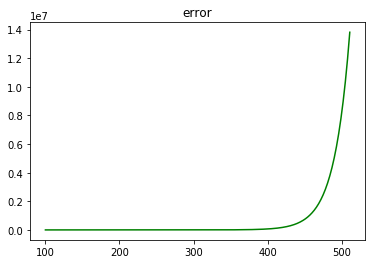

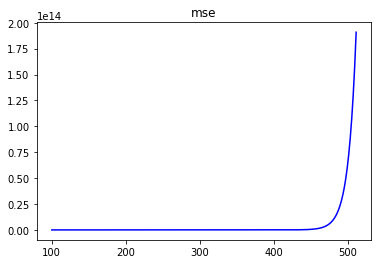

mae: 714864.632608101 
 mse: 5056368340614.67 
 res: 4650256717.51223


In [12]:
D=3

x_timeser=x_timeser_o.copy()
x_timeser_r=x_timeser_o.copy()

coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    coor_emb[i,0]=x_timeser[i,0] #pegando as coordenadas no espaço de dimensão D
    coor_emb[i,1]=x_timeser[i+1,0]
    coor_emb[i,2]=x_timeser[i+2,0]

k=0

for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1],coor_emb[l-D,2])
    
    np_m_dist=np.asarray(m_dist.tolist())

    if l==lenght:
        ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
        dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
        print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=k+1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1],coor_emb[l-D+1,2])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)

[  0.868876267568456    0.455721196899059]
[  0.455721196899059    0.992157550383792]
[  0.992157550383792    0.031123782400899]
[  0.031123782400899    0.120620370279842]
[  0.120620370279842    0.424284386213583]
[  0.424284386213583    0.977068583315785]
[  0.977068583315785   0.0896222672522811]
[ 0.0896222672522811    0.326360465859367]
[  0.326360465859367    0.879397248733696]
[  0.879397248733696    0.424230910613208]
[  0.424230910613208    0.977036180373985]
[  0.977036180373985   0.0897459304567946]
[ 0.0897459304567946    0.326766393692955]
[  0.326766393692955    0.879960470583423]
[  0.879960470583423    0.422520163176095]
[  0.422520163176095    0.975987499542964]
[  0.975987499542964   0.0937436011153472]
[ 0.0937436011153472    0.339822953461096]
[  0.339822953461096    0.897373255048295]
[  0.897373255048295    0.368377984689292]
[  0.368377984689292    0.930702580342191]
[  0.930702580342191    0.257981149146313]
[  0.257981149146313    0.765707503325844]
[  0.765707

lyap 0.0693077728200264 1.0492131342936
dist 0.00393225378144077
b -0.0520222432061296 c 0.000662554626093897
delta 0.00748967848589663
new value 0.0297559608460131
new coor 100 0.992254874969726 0.0297559608460131
0.992254874969726 0.0297559608460131
lyap 0.0693077728200264 1.10084820117419
dist 0.00412577231486331
b -0.0520222432061296 c 0.929374188706521
delta 0
new value 0.0260111216030648
new coor 101 0.0297559608460131 0.0260111216030648
0.0297559608460131 0.0260111216030648
lyap 0.0693077728200264 1.15502439153544
dist 0.00432881450185948
b -0.0520222432061296 c 0.936604287164452
delta 0
new value 0.0260111216030648
new coor 102 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 1.21186676202845
dist 0.00454184903127156
b -0.0520222432061296 c 0.93660239740682
delta 0
new value 0.0260111216030648
new coor 103 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 1.2715065237341
dist 0.

lyap 0.0693077728200264 5.91503864548299
dist 0.0221684539783508
b -0.0520222432061296 c 0.936131585447653
delta 0
new value 0.0260111216030648
new coor 136 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 6.20613623669495
dist 0.0232594330810688
b -0.0520222432061296 c 0.93608202457219
delta 0
new value 0.0260111216030648
new coor 137 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 6.51155965275577
dist 0.0244041026848803
b -0.0520222432061296 c 0.936027465571589
delta 0
new value 0.0260111216030648
new coor 138 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 6.8320139124076
dist 0.025605105067626
b -0.0520222432061296 c 0.935967404393919
delta 0
new value 0.0260111216030648
new coor 139 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 7.16823873057462
dist 0.0268652125419207
b -0.0

lyap 0.0693077728200264 33.3465918734552
dist 0.124976763735273
b -0.0520222432061296 c 0.921003834325701
delta 0
new value 0.0260111216030648
new coor 172 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 34.9876821775572
dist 0.131127261992556
b -0.0520222432061296 c 0.919428666961779
delta 0
new value 0.0260111216030648
new coor 173 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 36.709535679183
dist 0.137580445546547
b -0.0520222432061296 c 0.917694646802657
delta 0
new value 0.0260111216030648
new coor 174 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 38.5161269884182
dist 0.144351210489402
b -0.0520222432061296 c 0.915785753829687
delta 0
new value 0.0260111216030648
new coor 175 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 40.4116263183684
dist 0.15145518599666
b -0.05202

lyap 0.0693077728200264 187.994577249966
dist 0.704568369494582
b -0.0520222432061296 c 0.440206438507189
delta 0
new value 0.0260111216030648
new coor 208 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 197.246379626636
dist 0.739242387281539
b -0.0520222432061296 c 0.390143718645735
delta 0
new value 0.0260111216030648
new coor 209 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 206.953492196128
dist 0.775622822162343
b -0.0520222432061296 c 0.335032263540366
delta 0
new value 0.0260111216030648
new coor 210 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 217.138322200104
dist 0.813793652270596
b -0.0520222432061296 c 0.274362917323527
delta 0
new value 0.0260111216030648
new coor 211 0.0260111216030648 0.0260111216030648
0.0260111216030648 0.0260111216030648
lyap 0.0693077728200264 227.824379610824
dist 0.853842988567065
b -0.052

lyap 0.0693077728200264 1010.1258178818
dist 3.78576186026392
b -0.0520222432061296 c -10.0425666553598
delta 6.33821527996859
new value 3.19511876158736
new coor 243 3.06438402766157 3.19511876158736
3.06438402766157 3.19511876158736
lyap 0.0693077728200264 1059.83727541065
dist 3.97207106709666
b -0.0520222432061296 c -10.9293459097422
delta 6.61211690404495
new value 3.33206957362554
new coor 244 3.19511876158736 3.33206957362554
3.19511876158736 3.33206957362554
lyap 0.0693077728200264 1111.99518957479
dist 4.1675491339454
b -0.0520222432061296 c -11.8986681552809
delta 6.89908536944659
new value 3.47555380632636
new coor 245 3.33206957362554 3.47555380632636
3.33206957362554 3.47555380632636
lyap 0.0693077728200264 1166.71995817316
dist 4.3726472891494
b -0.0520222432061296 c -12.9585501468127
delta 7.19978519825688
new value 3.62590372073151
new coor 246 3.47555380632636 3.62590372073151
3.47555380632636 3.62590372073151
lyap 0.0693077728200264 1224.13790415776
dist 4.58783896740

lyap 0.0693077728200264 5427.57234212488
dist 20.3415218212391
b -0.0520222432061296 c -230.703655992245
delta 30.3779085896769
new value 15.2149654164415
new coor 278 14.5239080782799 15.2149654164415
14.5239080782799 15.2149654164415
lyap 0.0693077728200264 5694.68018868607
dist 21.3425918663639
b -0.0520222432061296 c -253.254174676386
delta 31.8279657694194
new value 15.9399940063128
new coor 279 15.2149654164415 15.9399940063128
15.2149654164415 15.9399940063128
lyap 0.0693077728200264 5974.93324957096
dist 22.3929277060567
b -0.0520222432061296 c -278.043487701432
delta 33.3493126933602
new value 16.7006674682832
new coor 280 15.9399940063128 16.7006674682832
15.9399940063128 16.7006674682832
lyap 0.0693077728200264 6268.97844197736
dist 23.4949538644816
b -0.0520222432061296 c -305.295637338531
delta 34.9454611597545
new value 17.4987417014803
new coor 281 16.7006674682832 17.4987417014803
16.7006674682832 17.4987417014803
lyap 0.0693077728200264 6577.49451992605
dist 24.6512141

lyap 0.0693077728200264 29163.2398731997
dist 109.298346086434
b -0.0520222432061296 c -6334.48398910453
delta 159.17895169504
new value 79.6154869691231
new coor 313 75.904360066059 79.6154869691231
75.904360066059 79.6154869691231
lyap 0.0693077728200264 30598.4543135158
dist 114.677260270454
b -0.0520222432061296 c -6969.44933723079
delta 166.966463863966
new value 83.5092430535859
new coor 314 79.6154869691231 83.5092430535859
79.6154869691231 83.5092430535859
lyap 0.0693077728200264 32104.3001548233
dist 120.320887680565
b -0.0520222432061296 c -7668.25995431011
delta 175.137210562331
new value 87.5946164027685
new coor 315 83.5092430535859 87.5946164027685
83.5092430535859 87.5946164027685
lyap 0.0693077728200264 33684.2533897445
dist 126.242255684313
b -0.0520222432061296 c -8437.34517901871
delta 183.710052589369
new value 91.8810374162874
new coor 316 87.5946164027685 91.8810374162874
87.5946164027685 91.8810374162874
lyap 0.0693077728200264 35341.9610753935
dist 132.455032766

lyap 0.0693077728200264 156698.889722917
dist 587.27801008264
b -0.0520222432061296 c -181127.225087363
delta 851.180887388671
new value 425.616454815938
new coor 348 405.676336842477 425.616454815938
405.676336842477 425.616454815938
lyap 0.0693077728200264 164410.533226509
dist 616.179801660513
b -0.0520222432061296 c -199372.854793823
delta 893.023752137425
new value 446.537887190316
new coor 349 425.616454815938 446.537887190316
425.616454815938 446.537887190316
lyap 0.0693077728200264 172501.690877466
dist 646.503940988633
b -0.0520222432061296 c -219457.503423985
delta 936.925832925026
new value 468.488927584116
new coor 350 446.537887190316 468.488927584116
446.537887190316 468.488927584116
lyap 0.0693077728200264 180991.039756491
dist 678.320426257844
b -0.0520222432061296 c -241566.582530454
delta 982.988470343437
new value 491.520246293321
new coor 351 468.488927584116 491.520246293321
468.488927584116 491.520246293321
lyap 0.0693077728200264 189898.176101965
dist 711.7027004

lyap 0.0693077728200264 841968.935795781
dist 3155.54144665537
b -0.0520222432061296 c -5219874.04076365
delta 4569.40873262186
new value 2284.73037743253
new coor 383 2177.58891061324 2284.73037743253
2177.58891061324 2284.73037743253
lyap 0.0693077728200264 883404.866104136
dist 3310.83553163863
b -0.0520222432061296 c -5746177.58314516
delta 4794.23720056559
new value 2397.1446114044
new coor 384 2284.73037743253 2397.1446114044
2284.73037743253 2397.1446114044
lyap 0.0693077728200264 926879.988415334
dist 3473.77212528116
b -0.0520222432061296 c -6325552.41036758
delta 5030.13018163314
new value 2515.09110193817
new coor 385 2397.1446114044 2515.09110193817
2397.1446114044 2515.09110193817
lyap 0.0693077728200264 972494.657759265
dist 3644.72733938798
b -0.0520222432061296 c -6963350.39631984
delta 5277.6321952165
new value 2638.84210872985
new coor 386 2515.09110193817 2638.84210872985
2515.09110193817 2638.84210872985
lyap 0.0693077728200264 1020354.16795138
dist 3824.09579540482

lyap 0.0693077728200264 4524037.72674213
dist 16955.2437697415
b -0.0520222432061296 c -150651773.729579
delta 24548.0568461339
new value 12274.0544341886
new coor 418 11698.3657046322 12274.0544341886
11698.3657046322 12274.0544341886
lyap 0.0693077728200264 4746679.80293758
dist 17789.6644583624
b -0.0520222432061296 c -165844135.726209
delta 25756.097198674
new value 12878.0746104586
new coor 419 12274.0544341886 12878.0746104586
12274.0544341886 12878.0746104586
lyap 0.0693077728200264 4980278.79352823
dist 18665.1496043898
b -0.0520222432061296 c -182568590.653197
delta 27023.58900323
new value 13511.8205127366
new coor 420 12878.0746104586 13511.8205127366
12878.0746104586 13511.8205127366
lyap 0.0693077728200264 5225373.92261369
dist 19583.7201184807
b -0.0520222432061296 c -200979645.877337
delta 28353.4580520975
new value 14176.7550371704
new coor 421 13511.8205127366 14176.7550371704
13511.8205127366 14176.7550371704
lyap 0.0693077728200264 5482530.95120153
dist 20547.4963666

lyap 0.0693077728200264 24308399.6129167
dist 91103.3165468527
b -0.0520222432061296 c -4349179744.79861
delta 131896.622319137
new value 65948.3371706902
new coor 453 62855.0668389751 65948.3371706902
62855.0668389751 65948.3371706902
lyap 0.0693077728200264 25504692.1475295
dist 95586.7962986649
b -0.0520222432061296 c -4787783483.40387
delta 138387.622039033
new value 69193.837030638
new coor 454 65948.3371706902 69193.837030638
65948.3371706902 69193.837030638
lyap 0.0693077728200264 26759857.9873027
dist 100290.922141606
b -0.0520222432061296 c -5270619461.84367
delta 145198.064199828
new value 72599.0581110356
new coor 455 69193.837030638 72599.0581110356
69193.837030638 72599.0581110356
lyap 0.0693077728200264 28076794.4721094
dist 105226.552761389
b -0.0520222432061296 c -5802148414.15195
delta 152343.669565264
new value 76171.8607937538
new coor 456 72599.0581110356 76171.8607937538
72599.0581110356 76171.8607937538
lyap 0.0693077728200264 29458541.5289989
dist 110405.08123368

lyap 0.0693077728200264 130613033.62887
dist 489513.120457046
b -0.0520222432061296 c -125563263425.251
delta 708698.140043422
new value 354349.096032833
new coor 488 337728.445217394 354349.096032833
337728.445217394 354349.096032833
lyap 0.0693077728200264 137040910.393342
dist 513603.595392575
b -0.0520222432061296 c -138226075399.226
delta 743575.350315558
new value 371787.701168901
new coor 489 354349.096032833 371787.701168901
354349.096032833 371787.701168901
lyap 0.0693077728200264 143785123.120246
dist 538879.638106304
b -0.0520222432061296 c -152165908332.374
delta 780168.977420596
new value 390084.51472142
new coor 490 371787.701168901 390084.51472142
371787.701168901 390084.51472142
lyap 0.0693077728200264 150861239.693784
dist 565399.594104513
b -0.0520222432061296 c -167511547449.45
delta 818563.491610641
new value 409281.771816442
new coor 491 390084.51472142 409281.771816442
390084.51472142 409281.771816442
lyap 0.0693077728200264 158285594.142532
dist 593224.680258722


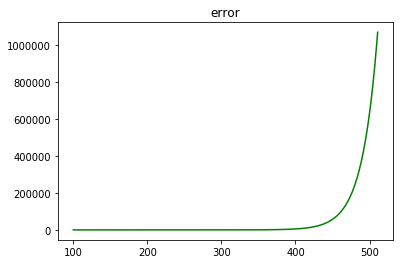

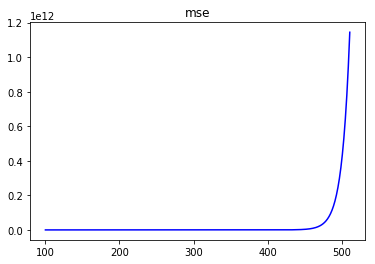

mae: 55358.2638678633 
 mse: 30321771347.8635 
 res: 360118769.125586


In [14]:
D=2

coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    coor_emb[i,0]=x_timeser[i,0] #pegando as coordenadas no espaço de dimensão D
    coor_emb[i,1]=x_timeser[i+1,0]

print(coor_emb)
k=0


for i in range(lenght):
        print(i,coor_emb[i,0],coor_emb[i,1])
    
for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1])
    
    np_m_dist=np.asarray(m_dist.tolist())

    if l==lenght:
        ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
        dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
        print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=k+1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)





[   0.868876267568456]
[   0.455721196899059]
[   0.992157550383792]
[   0.031123782400899]
[   0.120620370279842]
[   0.424284386213583]
[   0.977068583315785]
[  0.0896222672522811]
[   0.326360465859367]
[   0.879397248733696]
[   0.424230910613208]
[   0.977036180373985]
[  0.0897459304567946]
[   0.326766393692955]
[   0.879960470583423]
[   0.422520163176095]
[   0.975987499542964]
[  0.0937436011153472]
[   0.339822953461096]
[   0.897373255048295]
[   0.368377984689292]
[   0.930702580342191]
[   0.257981149146313]
[   0.765707503325844]
[   0.717598090705387]
[   0.810604283685481]
[   0.614099915824918]
[   0.947924836834987]
[   0.197453362185402]
[   0.633862127788331]
[   0.928323722975922]
[   0.266155153344181]
[   0.781266350770066]
[    0.68355695969796]
[   0.865227370185766]
[   0.466435872268757]
[   0.995493797318563]
[  0.0179435872753223]
[  0.0704864598040606]
[   0.262072475153405]
[   0.773561971681491]
[    0.70065539059894]
[   0.838949656894347]
[   0.54045

lyap 0.0693193220209693 1.049221533589
dist 0.00393228526042252
b -0.0520222432061296 c 0.000662554378526216
delta 0.00748974459463251
new value 0.029755993900381
new coor 100 0.992254874969726 0.029755993900381
0.992254874969726 0.029755993900381
indmin 2 dist0 0.00137124667991442
lyap 0.0693193220209693 1.049221533589
dist 0.00143874154442863
b -0.241240740559684 c 0.0145490745945967
delta 0.000892483836301855
new value 0.121066612197993
new coor 101 0.029755993900381 0.121066612197993
0.029755993900381 0.121066612197993
indmin 3 dist0 0.0014387415444284
lyap 0.0693193220209693 1.049221533589
dist 0.00150955860968337
b -0.848568772427166 c 0.18001516074929
delta 0.00288418816762643
new value 0.425726480297396
new coor 102 0.121066612197993 0.425726480297396
0.121066612197993 0.425726480297396
indmin 4 dist0 0.00150955860968833
lyap 0.0693193220209693 1.049221533589
dist 0.00158386139949966
b -1.95413716663157 c 0.954662587521128
delta 0.00130993371779413
new value 0.977723550174682
n

lyap 0.0693193220209693 1.049221533589
dist 0.00116475332740988
b -0.658855737708727 c 0.108521983390739
delta 0.00171742503623048
new value 0.330286581372479
new coor 130 0.092835833821595 0.330286581372479
0.092835833821595 0.330286581372479
indmin 124 dist0 0.0011647533274104
lyap 0.0693193220209693 1.049221533589
dist 0.00122208427243842
b -1.76767437124547 c 0.781167414586738
delta 0.00173908341394415
new value 0.884706727329708
new coor 131 0.330286581372479 0.884706727329708
0.330286581372479 0.884706727329708
indmin 125 dist0 0.00122208427243449
lyap 0.0693193220209693 1.049221533589
dist 0.00128223713449871
b -0.851194067001191 c 0.181131946895218
delta 0.00188470611919931
new value 0.426539386560195
new coor 132 0.884706727329708 0.426539386560195
0.884706727329708 0.426539386560195
indmin 126 dist0 0.00128223713450389
lyap 0.0693193220209693 1.049221533589
dist 0.00134535081268893
b -1.96035749875849 c 0.960749458795139
delta 0.00192035363427775
new value 0.981138926196383
n

lyap 0.0693193220209693 1.049221533589
dist 0.00370018986343855
b -1.53141500665169 c 0.586296505794824
delta 0.00677491097306301
new value 0.769094958812375
new coor 160 0.259469957512838 0.769094958812375
0.259469957512838 0.769094958812375
indmin 22 dist0 0.00370018986343509
lyap 0.0693193220209693 1.049221533589
dist 0.00388231888308383
b -1.43519618141077 c 0.51494342223878
delta 0.00379343919772597
new value 0.71949481030425
new coor 161 0.769094958812375 0.71949481030425
0.769094958812375 0.71949481030425
indmin 23 dist0 0.00388231888308306
lyap 0.0693193220209693 1.049221533589
dist 0.00407341257238993
b -1.62120856737096 c 0.657066309584503
delta 0.00720975582060129
new value 0.814209161595781
new coor 162 0.71949481030425 0.814209161595781
0.71949481030425 0.814209161595781
indmin 24 dist0 0.00407341257238746
lyap 0.0693193220209693 1.049221533589
dist 0.00427391218614107
b -1.22819983164984 c 0.377113435435545
delta 0.00459181037354709
new value 0.616395821011691
new coor 16

lyap 0.0693193220209693 1.049221533589
dist 0.00414914814954421
b -0.00323653570958713 c -6.15897815473786e-6
delta 0.00592545998369612
new value 0.00458099784664163
new coor 190 1.00250003451453 0.00458099784664163
1.00250003451453 0.00458099784664163
indmin 93 dist0 0.00369519951525117
lyap 0.0693193220209693 1.049221533589
dist 0.00387708290230915
b -0.0214231050056064 c 0.000103300021886449
delta 0.00676382588003559
new value 0.014093465442821
new coor 191 0.00458099784664163 0.014093465442821
0.00458099784664163 0.014093465442821
indmin 94 dist0 0.00387708290230915
lyap 0.0693193220209693 1.049221533589
dist 0.00406791886861248
b -0.0847745211662629 c 0.00179156923095454
delta 0.00452133997295211
new value 0.0446479305696075
new coor 192 0.014093465442821 0.0446479305696075
0.014093465442821 0.0446479305696075
indmin 95 dist0 0.00406791886861248
lyap 0.0693193220209693 1.049221533589
dist 0.00426814807384121
b -0.324724645787113 c 0.0263484174361991
delta 0.00724056881535739
new v

lyap 0.0693193220209693 1.049221533589
dist 0.00143922722202695
b -1.97700730416394 c 0.97713824374722
delta 0.00221488796549875
new value 0.989611096064721
new coor 219 0.434470401360586 0.989611096064721
0.434470401360586 0.989611096064721
indmin 152 dist0 0.00143922722203181
lyap 0.0693193220209693 1.049221533589
dist 0.00151006819308324
b -0.203180737696666 c 0.0103195491689675
delta 0.00205316708802227
new value 0.102616952392344
new coor 220 0.989611096064721 0.102616952392344
0.989611096064721 0.102616952392344
indmin 153 dist0 0.00151006819308347
lyap 0.0693193220209693 1.049221533589
dist 0.001584396065371
b -0.678906305221012 c 0.115226986380092
delta 0.00241365873240561
new value 0.340659981976709
new coor 221 0.102616952392344 0.340659981976709
0.102616952392344 0.340659981976709
indmin 154 dist0 0.00158439606537127
lyap 0.0693193220209693 1.049221533589
dist 0.00166238246952121
b -1.7886850658866 c 0.799847259153079
delta 0.00228655055127437
new value 0.895485808218936
new

lyap 0.0693193220209693 1.049221533589
dist 0.00155286023294789
b -1.581957479859 c 0.625645519722627
delta 0.00271830670196059
new value 0.79233789328048
new coor 249 0.272767783754854 0.79233789328048
0.272767783754854 0.79233789328048
indmin 178 dist0 0.00155286023294009
lyap 0.0693193220209693 1.049221533589
dist 0.00162929439505477
b -1.33476236531123 c 0.445396835660411
delta 0.00179700016056521
new value 0.668279682735896
new coor 250 0.79233789328048 0.668279682735896
0.79233789328048 0.668279682735896
indmin 179 dist0 0.00162929439505224
lyap 0.0693193220209693 1.049221533589
dist 0.00170949076384467
b -1.78465994679781 c 0.79625066636981
delta 0.00290864661136543
new value 0.893784296704586
new coor 251 0.668279682735896 0.893784296704586
0.668279682735896 0.893784296704586
indmin 180 dist0 0.00170949076385916
lyap 0.0693193220209693 1.049221533589
dist 0.00179363452091253
b -0.7851747448493 c 0.154123742918774
delta 0.00209958902375392
new value 0.393637166936527
new coor 25

lyap 0.0693193220209693 1.049221533589
dist 0.000852742803079026
b -1.97922219212944 c 0.979329885643995
delta 0.000971206307112983
new value 0.990096699218277
new coor 279 0.435171372020053 0.990096699218277
0.435171372020053 0.990096699218277
indmin 218 dist0 0.000852742803064561
lyap 0.0693193220209693 1.049221533589
dist 0.000894716111588378
b -0.205233904784688 c 0.010529674211795
delta 0.00150293911731794
new value 0.103368421951003
new coor 280 0.990096699218277 0.103368421951003
0.990096699218277 0.103368421951003
indmin 219 dist0 0.000894716111587987
lyap 0.0693193220209693 1.049221533589
dist 0.000938755410727132
b -0.681319963953418 c 0.116048906765148
delta 0.00112526481074573
new value 0.341222614382082
new coor 281 0.103368421951003 0.341222614382082
0.103368421951003 0.341222614382082
indmin 220 dist0 0.000938755410725686
lyap 0.0693193220209693 1.049221533589
dist 0.000984962391706573
b -1.79097161643787 c 0.801894179125831
delta 0.00161690530268081
new value 0.89629426

lyap 0.0693193220209693 1.049221533589
dist 0.000570376656288246
b -1.58467578656096 c 0.627799076407773
delta 0.00102121569875171
new value 0.792848501129856
new coor 309 0.273021967063159 0.792848501129856
0.273021967063159 0.792848501129856
indmin 248 dist0 0.000570376656311738
lyap 0.0693193220209693 1.049221533589
dist 0.000598451470058766
b -1.33655936547179 c 0.446597636933804
delta 0.000624255672459673
new value 0.668591810572126
new coor 310 0.792848501129856 0.668591810572126
0.792848501129856 0.668591810572126
indmin 249 dist0 0.000598451470040573
lyap 0.0693193220209693 1.049221533589
dist 0.00062790816917456
b -1.78756859340917 c 0.798850072190829
delta 0.00108966945958045
new value 0.894329131434377
new coor 311 0.668591810572126 0.894329131434377
0.668591810572126 0.894329131434377
indmin 250 dist0 0.000627908169189686
lyap 0.0693193220209693 1.049221533589
dist 0.000658814772230262
b -0.787274333873054 c 0.154950082001794
delta 0.000740788826391626
new value 0.394007561

lyap 0.0693193220209693 1.049221533589
dist 0.000499440595375732
b -0.742753587288032 c 0.137920579976436
delta 0.000755991730903721
new value 0.371754789509468
new coor 338 0.896620696214592 0.371754789509468
0.896620696214592 0.371754789509468
indmin 282 dist0 0.000499440595384071
lyap 0.0693193220209693 1.049221533589
dist 0.000524023827425476
b -1.87208492201808 c 0.876175357091761
delta 0.000725865269856487
new value 0.936405393643968
new coor 339 0.371754789509468 0.936405393643968
0.371754789509468 0.936405393643968
indmin 283 dist0 0.000524023827506589
lyap 0.0693193220209693 1.049221533589
dist 0.000549817083933639
b -0.523279632461436 c 0.0684552228585155
delta 0.000826023554858283
new value 0.262052828008147
new coor 340 0.936405393643968 0.262052828008147
0.936405393643968 0.262052828008147
indmin 284 dist0 0.000549817083938964
lyap 0.0693193220209693 1.049221533589
dist 0.00057687992400387
b -1.54289708433988 c 0.595132691004403
delta 0.000805510318994951
new value 0.77185

lyap 0.0693193220209693 1.049221533589
dist 0.000240869314874428
b -1.91178491692944 c 0.913730372951898
delta 0.000277112486516879
new value 0.956031014707981
new coor 368 0.39383419534643 0.956031014707981
0.39383419534643 0.956031014707981
indmin 252 dist0 0.000240869314888814
lyap 0.0693193220209693 1.049221533589
dist 0.000252725271962173
b -0.371444356045109 c 0.0344926827372109
delta 0.000422716124791671
new value 0.18593353608495
new coor 369 0.956031014707981 0.18593353608495
0.956031014707981 0.18593353608495
indmin 253 dist0 0.000252725271956741
lyap 0.0693193220209693 1.049221533589
dist 0.000265164797419148
b -1.20081530505294 c 0.360489323572209
delta 0.000320250772298946
new value 0.600567777912621
new coor 370 0.18593353608495 0.600567777912621
0.18593353608495 0.600567777912621
indmin 254 dist0 0.000265164797492524
lyap 0.0693193220209693 1.049221533589
dist 0.000278216615478922
b -1.93340135044415 c 0.93451014371047
delta 0.000455035584585555
new value 0.9669281930143

lyap 0.0693193220209693 1.049221533589
dist 0.000267326402158206
b -1.79324139242918 c 0.803928616041005
delta 0.000476820029476349
new value 0.89685910622933
new coor 397 0.341689992204849 0.89685910622933
0.341689992204849 0.89685910622933
indmin 336 dist0 0.000267326402209645
lyap 0.0693193220209693 1.049221533589
dist 0.000280484617695232
b -0.743509579018935 c 0.138201601690943
delta 0.000295515046290413
new value 0.371902547032613
new coor 398 0.89685910622933 0.371902547032613
0.89685910622933 0.371902547032613
indmin 337 dist0 0.000280484617712704
lyap 0.0693193220209693 1.049221533589
dist 0.000294290500744647
b -1.87281078728794 c 0.876854996470901
delta 0.00050901714402851
new value 0.936659902215982
new coor 399 0.371902547032613 0.936659902215982
0.371902547032613 0.936659902215982
indmin 338 dist0 0.000294290500823159
lyap 0.0693193220209693 1.049221533589
dist 0.000308775930594349
b -0.524105656016294 c 0.0686716540991054
delta 0.000349673917197778
new value 0.2622276649

lyap 0.0693193220209693 1.049221533589
dist 0.000699019064095006
b -1.22819983164984 c 0.377118293960299
delta 0.00128476592710425
new value 0.61474229878847
new coor 427 0.810879913473583 0.61474229878847
0.810879913473583 0.61474229878847
indmin 25 dist0 0.000699019064082745
lyap 0.0693193220209693 1.049221533589
dist 0.000733425854424843
b -1.89584967366997 c 0.898561371031024
delta 0.000707835043414222
new value 0.948278754356694
new coor 428 0.61474229878847 0.948278754356694
0.61474229878847 0.948278754356694
indmin 26 dist0 0.000733425854489264
lyap 0.0693193220209693 1.049221533589
dist 0.000769526199821046
b -0.394906724370805 c 0.0389873633253597
delta 0.00136662059114954
new value 0.198136672480977
new coor 429 0.948278754356694 0.198136672480977
0.948278754356694 0.198136672480977
indmin 27 dist0 0.000769526199820247
lyap 0.0693193220209693 1.049221533589
dist 0.000807403459512312
b -1.26772425557666 c 0.401781012056964
delta 0.000860203200201072
new value 0.634292229388431

lyap 0.0693193220209693 1.049221533589
dist 0.00142144975408715
b -1.19262312108686 c 0.355586359181814
delta 0.00211476327312736
new value 0.597368942179992
new coor 457 0.183267576694435 0.597368942179992
0.183267576694435 0.597368942179992
indmin 67 dist0 0.00142144975408933
lyap 0.0693193220209693 1.049221533589
dist 0.00149141569090531
b -1.92579266644552 c 0.927168242268995
delta 0.00210358250405998
new value 0.963948124474788
new coor 458 0.597368942179992 0.963948124474788
0.597368942179992 0.963948124474788
indmin 68 dist0 0.00149141569094232
lyap 0.0693193220209693 1.049221533589
dist 0.00156482545846919
b -0.285815877511404 c 0.0204213365455258
delta 0.00231725171496582
new value 0.144066564613185
new coor 459 0.963948124474788 0.144066564613185
0.963948124474788 0.144066564613185
indmin 69 dist0 0.0015648254584697
lyap 0.0693193220209693 1.049221533589
dist 0.00164184856733469
b -0.979882078370388 c 0.240040868625027
delta 0.00232658792262382
new value 0.491104333146506
new

lyap 0.0693193220209693 1.049221533589
dist 0.000343942927063974
b -0.201001754693197 c 0.0101003734871591
delta 0.000459827258603109
new value 0.1007307909759
new coor 487 0.987967503926105 0.1007307909759
0.987967503926105 0.1007307909759
indmin 389 dist0 0.000343942927064896
lyap 0.0693193220209693 1.049221533589
dist 0.000360872325402118
b -0.677132433636143 c 0.114627005801943
delta 0.000556304083429111
new value 0.338844368859786
new coor 488 0.1007307909759 0.338844368859786
0.1007307909759 0.338844368859786
indmin 390 dist0 0.000360872325412446
lyap 0.0693193220209693 1.049221533589
dist 0.000378635014699074
b -1.78636158610699 c 0.797771863083756
delta 0.000513793406206719
new value 0.8934376897566
new coor 489 0.338844368859786 0.8934376897566
0.338844368859786 0.8934376897566
indmin 391 dist0 0.000378635014724404
lyap 0.0693193220209693 1.049221533589
dist 0.000397272010819632
b -0.871290577068378 c 0.189786725592902
delta 0.000606066446913741
new value 0.435948321757646
new

lyap 0.0693193220209693 1.049221533589
dist 9.03512459872807e-5
b -1.86148874597531 c 0.866285083902489
delta 0.000125629513422438
new value 0.930807187744366
new coor 517 0.367894784502279 0.930807187744366
0.367894784502279 0.930807187744366
indmin 421 dist0 9.03512462131415e-5
lyap 0.0693193220209693 1.049221533589
dist 9.47984731134293e-5
b -0.517112852829275 c 0.0668514205992509
delta 0.000142000800698173
new value 0.258627426814986
new coor 518 0.930807187744366 0.258627426814986
0.930807187744366 0.258627426814986
indmin 422 dist0 9.47984731439181e-5
lyap 0.0693193220209693 1.049221533589
dist 9.94645993739571e-5
b -1.53179079240769 c 0.586595753074093
delta 0.000139314746987448
new value 0.765965053577338
new coor 519 0.258627426814986 0.765965053577338
0.258627426814986 0.765965053577338
indmin 423 dist0 9.94645993898073e-5
lyap 0.0693193220209693 1.049221533589
dist 0.000104360399509589
b -1.43640925322936 c 0.515817879651787
delta 0.000155421277119805
new value 0.71828233725

lyap 0.0693193220209693 1.049221533589
dist 0.000363984432850883
b -1.57989929426625 c 0.624020375251074
delta 0.000528222220618668
new value 0.790213758243437
new coor 546 0.271347027180917 0.790213758243437
0.271347027180917 0.790213758243437
indmin 450 dist0 0.000363984432894422
lyap 0.0693193220209693 1.049221533589
dist 0.000381900304884006
b -1.33272388190891 c 0.444038160259425
delta 0.000551699788905514
new value 0.666637790848908
new coor 547 0.790213758243437 0.666637790848908
0.790213758243437 0.666637790848908
indmin 451 dist0 0.000381900304868179
lyap 0.0693193220209693 1.049221533589
dist 0.000400698023551896
b -1.78240554665692 c 0.794242298722595
delta 0.000581259810567651
new value 0.891493403233743
new coor 548 0.666637790848908 0.891493403233743
0.666637790848908 0.891493403233743
indmin 452 dist0 0.000400698023597412
lyap 0.0693193220209693 1.049221533589
dist 0.000420420994824957
b -0.782919319168271 c 0.153240572793656
delta 0.000607579035340527
new value 0.391763

lyap 0.0693193220209693 1.049221533589
dist 0.000156276766743455
b -0.865445701598277 c 0.187249050343232
delta 0.000247066803843293
new value 0.43284638420106
new coor 575 0.890551462682107 0.43284638420106
0.890551462682107 0.43284638420106
indmin 484 dist0 0.000156276766763567
lyap 0.0693193220209693 1.049221533589
dist 0.000163968948887999
b -1.97593500785221 c 0.976079777188663
delta 0.00021564150641197
new value 0.988075324679311
new coor 576 0.43284638420106 0.988075324679311
0.43284638420106 0.988075324679311
indmin 485 dist0 0.000163968948927099
lyap 0.0693193220209693 1.049221533589
dist 0.000172039752054267
b -0.2014615819518 c 0.010146674278269
delta 0.000268122072686129
new value 0.100864852012243
new coor 577 0.988075324679311 0.100864852012243
0.988075324679311 0.100864852012243
indmin 486 dist0 0.000172039752055423
lyap 0.0693193220209693 1.049221533589
dist 0.000180507812489861
b -0.677688737719572 c 0.114815491697278
delta 0.000241749530767909
new value 0.338965243625

lyap 0.0693193220209693 1.049221533589
dist 0.000660556961029591
b -1.80372192859568 c 0.813352967818896
delta 0.000961468314115688
new value 0.902341698454896
new coor 605 0.343645603512286 0.902341698454896
0.343645603512286 0.902341698454896
indmin 514 dist0 0.000660556961015732
lyap 0.0693193220209693 1.049221533589
dist 0.000693070587659813
b -0.735789569004558 c 0.135346323222468
delta 0.000998481867053863
new value 0.368394025435806
new coor 606 0.902341698454896 0.368394025435806
0.902341698454896 0.368394025435806
indmin 515 dist0 0.000693070587653931
lyap 0.0693193220209693 1.049221533589
dist 0.000727184584863685
b -1.86161437548873 c 0.866401741200665
delta 0.00105746094160265
new value 0.931335918215167
new coor 607 0.368394025435806 0.931335918215167
0.368394025435806 0.931335918215167
indmin 20 dist0 0.000633540974913861
lyap 0.0693193220209693 1.049221533589
dist 0.000664724833290589
b -0.515962298292627 c 0.0665542325726097
delta 0.000403694154770911
new value 0.258182

lyap 0.0693193220209693 1.049221533589
dist 0.000567757672436281
b -0.545535567509708 c 0.0744022042737338
delta 0.000488183575563273
new value 0.273011875542635
new coor 635 0.929527096630052 0.273011875542635
0.929527096630052 0.273011875542635
indmin 247 dist0 0.000567757672432348
lyap 0.0693193220209693 1.049221533589
dist 0.000595703575776388
b -1.58467578656096 c 0.6277990418462
delta 0.00108679703594785
new value 0.792881291798454
new coor 636 0.273011875542635 0.792881291798454
0.273011875542635 0.792881291798454
indmin 308 dist0 3.43084061651458e-5
lyap 0.0693193220209693 1.049221533589
dist 3.59971185315885e-5
b -1.33718362114425 c 0.447015008943549
delta 2.970283263333e-5
new value 0.668606661988442
new coor 637 0.792881291798454 0.668606661988442
0.792881291798454 0.668606661988442
indmin 309 dist0 3.59971181307388e-5
lyap 0.0693193220209693 1.049221533589
dist 3.7768951489918e-5
b -1.78865826286875 c 0.799824594126237
delta 6.94529807662465e-5
new value 0.89436385792476
ne

lyap 0.0693193220209693 1.049221533589
dist 0.000138213096837557
b -0.743509579018935 c 0.138201613971658
delta 0.000195464277279334
new value 0.371852521648107
new coor 665 0.89671842691194 0.371852521648107
0.89671842691194 0.371852521648107
indmin 337 dist0 0.000138213096800106
lyap 0.0693193220209693 1.049221533589
dist 0.000145016157386692
b -1.87281078728794 c 0.876855049767399
delta 0.000214271929127315
new value 0.936512529608531
new coor 666 0.371852521648107 0.936512529608531
0.371852521648107 0.936512529608531
indmin 338 dist0 0.00014501615712077
lyap 0.0693193220209693 1.049221533589
dist 0.000152154074769437
b -0.524105656016294 c 0.0686716729943199
delta 0.000216080980747483
new value 0.262160868498521
new coor 667 0.936512529608531 0.262160868498521
0.936512529608531 0.262160868498521
indmin 339 dist0 0.000152154074750514
lyap 0.0693193220209693 1.049221533589
dist 0.000159643331651549
b -1.54370259465887 c 0.595754411375886
delta 0.00023505953092299
new value 0.77196882

lyap 0.0693193220209693 1.049221533589
dist 0.000379075410056655
b -1.91302605119503 c 0.914917134746546
delta 0.000365465001506532
new value 0.956695758098268
new coor 695 0.394358776873802 0.956695758098268
0.394358776873802 0.956695758098268
indmin 639 dist0 0.000379075410050361
lyap 0.0693193220209693 1.049221533589
dist 0.000397734083078917
b -0.37235191385123 c 0.0346613621359345
delta 0.000706544362411352
new value 0.186529229106821
new coor 696 0.956695758098268 0.186529229106821
0.956695758098268 0.186529229106821
indmin 640 dist0 0.000397734083082363
lyap 0.0693193220209693 1.049221533589
dist 0.000417311164612291
b -1.20214908476848 c 0.361290556155048
delta 0.000444285377098613
new value 0.601296685072788
new coor 697 0.186529229106821 0.601296685072788
0.186529229106821 0.601296685072788
indmin 641 dist0 0.000417311164587898
lyap 0.0693193220209693 1.049221533589
dist 0.000437851860092724
b -1.93444364131939 c 0.935517907993374
delta 0.00075463071044606
new value 0.9675991

lyap 0.0693193220209693 1.049221533589
dist 0.000101964577704112
b -1.44492834522206 c 0.521954472613816
delta 0.000179919140376933
new value 0.722554132181218
new coor 724 0.772016827624467 0.722554132181218
0.772016827624467 0.722554132181218
indmin 668 dist0 0.000101964577709597
lyap 0.0693193220209693 1.049221533589
dist 0.000106983430596218
b -1.63474024455753 c 0.668093913441271
delta 0.000115805530171499
new value 0.817428025043849
new coor 725 0.722554132181218 0.817428025043849
0.722554132181218 0.817428025043849
indmin 402 dist0 0.000106619427602244
lyap 0.0693193220209693 1.049221533589
dist 0.000111867399339207
b -1.23954250605927 c 0.384116404893854
delta 6.89368592341714e-5
new value 0.619805721459254
new coor 726 0.817428025043849 0.619805721459254
0.817428025043849 0.619805721459254
indmin 403 dist0 0.000111867399310361
lyap 0.0693193220209693 1.049221533589
dist 0.00011737368426303
b -1.91085726723762 c 0.912843861350198
delta 0.000224397050996672
new value 0.955540832

lyap 0.0693193220209693 1.049221533589
dist 0.000283642258185196
b -0.533533282254076 c 0.0711644015587857
delta 0.000396279781193632
new value 0.266964781017635
new coor 754 0.929358946610518 0.266964781017635
0.929358946610518 0.266964781017635
indmin 526 dist0 0.000283642258175849
lyap 0.0693193220209693 1.049221533589
dist 0.00029760356511391
b -1.56432264368473 c 0.611776284077732
delta 0.000444110191929357
new value 0.782383376938331
new coor 755 0.266964781017635 0.782383376938331
0.266964781017635 0.782383376938331
indmin 527 dist0 0.000297603564981289
lyap 0.0693193220209693 1.049221533589
dist 0.00031225206885122
b -1.36851878476039 c 0.468210867867623
delta 0.000439057576389598
new value 0.684478921168389
new coor 756 0.782383376938331 0.684478921168389
0.782383376938331 0.684478921168389
indmin 528 dist0 0.000312252068832404
lyap 0.0693193220209693 1.049221533589
dist 0.000327621594526672
b -1.73238569296079 c 0.750289988150785
delta 0.00048638676120973
new value 0.86643603

lyap 0.0693193220209693 1.049221533589
dist 0.000505123849310235
b -2.00500006902907 c 1.00500617359062
delta 0.000763180250486202
new value 1.00288162463978
new coor 783 0.49295536607482 1.00288162463978
0.49295536607482 1.00288162463978
indmin 188 dist0 0.000505123849297277
lyap 0.0693193220209693 1.049221533589
dist 0.000529986819812066
b -0.00916199569328325 c 2.08502662654437e-5
delta 0.000735595012194837
new value 0.00494879535273905
new coor 784 1.00288162463978 0.00494879535273905
1.00288162463978 0.00494879535273905
indmin 189 dist0 0.000529986819812069
lyap 0.0693193220209693 1.049221533589
dist 0.000556073583865175
b -0.0281869308856419 c 0.000198451825362808
delta 0.00083412906718605
new value 0.014510529976414
new coor 785 0.00494879535273905 0.014510529976414
0.00494879535273905 0.014510529976414
indmin 190 dist0 0.000556073583865165
lyap 0.0693193220209693 1.049221533589
dist 0.000583444378451338
b -0.089295861139215 c 0.00199327123963093
delta 0.000816001268541334
new v

lyap 0.0693193220209693 1.049221533589
dist 0.000258406391155371
b -1.63506889972841 c 0.668362543340997
delta 0.000365369814291678
new value 0.817717134771353
new coor 812 0.722730450149524 0.817717134771353
0.722730450149524 0.817717134771353
indmin 402 dist0 0.000258406391164088
lyap 0.0693193220209693 1.049221533589
dist 0.000271125550026383
b -1.23954250605927 c 0.384116365946638
delta 0.000400675871959323
new value 0.619971590965617
new coor 813 0.817717134771353 0.619971590965617
0.817717134771353 0.619971590965617
indmin 403 dist0 0.000271125550052815
lyap 0.0693193220209693 1.049221533589
dist 0.000284470765421575
b -1.91085726723762 c 0.91284383315038
delta 0.000403922407530907
new value 0.955630594822576
new coor 814 0.619971590965617 0.955630594822576
0.619971590965617 0.955630594822576
indmin 726 dist0 0.000188600189688767
lyap 0.0693193220209693 1.049221533589
dist 0.000197883380260423
b -0.407868964205741 c 0.0415892418900723
delta 0.000352706641715321
new value 0.204110

lyap 0.0693193220209693 1.049221533589
dist 0.00021588310668449
b -1.56570608304798 c 0.612858859563564
delta 0.000316605754919799
new value 0.783011344401452
new coor 842 0.267537805578402 0.783011344401452
0.267537805578402 0.783011344401452
indmin 617 dist0 0.000215883106749805
lyap 0.0693193220209693 1.049221533589
dist 0.000226509204339987
b -1.36990071770999 c 0.469156967848968
delta 0.000324016164141512
new value 0.685112366937066
new coor 843 0.783011344401452 0.685112366937066
0.783011344401452 0.685112366937066
indmin 618 dist0 0.000226509204378835
lyap 0.0693193220209693 1.049221533589
dist 0.000237658334790385
b -1.73390212937489 c 0.751604118327826
delta 0.000347763513837272
new value 0.867124946444362
new coor 844 0.685112366937066 0.867124946444362
0.685112366937066 0.867124946444362
indmin 619 dist0 0.000237658334685283
lyap 0.0693193220209693 1.049221533589
dist 0.000249356242388699
b -0.935997051872711 c 0.219022588334931
delta 0.000357455844751397
new value 0.4681772

lyap 0.0693193220209693 1.049221533589
dist 0.000434765223850014
b -0.0148649992982647 c 5.51741016371642e-5
delta 0.000521342103376237
new value 0.00769317070082046
new coor 871 1.00590061004638 0.00769317070082046
1.00590061004638 0.00769317070082046
indmin 701 dist0 0.000434765223850017
lyap 0.0693193220209693 1.049221533589
dist 0.000456165034919078
b -0.0348508201644089 c 0.000303504779391098
delta 0.000748697914768183
new value 0.0177997590395886
new coor 872 0.00769317070082046 0.0177997590395886
0.00769317070082046 0.0177997590395886
indmin 702 dist0 0.000456165034919103
lyap 0.0693193220209693 1.049221533589
dist 0.0004786181775075
b -0.0956487518907691 c 0.00228708199634753
delta 0.000596450225739337
new value 0.0481226010582542
new coor 873 0.0177997590395886 0.0481226010582542
0.0177997590395886 0.0481226010582542
indmin 703 dist0 0.000478618177507588
lyap 0.0693193220209693 1.049221533589
dist 0.000502176498208082
b -0.339247567741619 c 0.0287720648116336
delta 0.000808066

lyap 0.0693193220209693 1.049221533589
dist 0.000775037223508163
b -0.545421970418474 c 0.0743709275382179
delta 0.0011898160778028
new value 0.273305893248138
new coor 900 0.934019888204703 0.273305893248138
0.934019888204703 0.273305893248138
indmin 233 dist0 0.000775037223504976
lyap 0.0693193220209693 1.049221533589
dist 0.000813185744234449
b -1.59199973070633 c 0.633615478286778
delta 0.00110879300114124
new value 0.796554261853736
new coor 901 0.273305893248138 0.796554261853736
0.273305893248138 0.796554261853736
indmin 234 dist0 0.000813185744214986
lyap 0.0693193220209693 1.049221533589
dist 0.000853211993637957
b -1.31033689243506 c 0.429245272303866
delta 0.00129709710701983
new value 0.65581699477104
new coor 902 0.796554261853736 0.65581699477104
0.796554261853736 0.65581699477104
indmin 235 dist0 0.000853211993648009
lyap 0.0693193220209693 1.049221533589
dist 0.000895208396451889
b -1.81358339006463 c 0.822270797396731
delta 0.00123415209242528
new value 0.9074087710785

lyap 0.0693193220209693 1.049221533589
dist 0.000170414919647436
b -0.145484558986108 c 0.00529141964761415
delta 0.000279844466819721
new value 0.0728822017264636
new coor 930 0.0199835434487372 0.0728822017264636
0.0199835434487372 0.0728822017264636
indmin 847 dist0 0.000170414919648124
lyap 0.0693193220209693 1.049221533589
dist 0.00017880300333965
b -0.528467749526994 c 0.0698195281802489
delta 0.000222641259454376
new value 0.264345195393224
new coor 931 0.0728822017264636 0.264345195393224
0.0728822017264636 0.264345195393224
indmin 848 dist0 0.000178803003345192
lyap 0.0693193220209693 1.049221533589
dist 0.000187603961380161
b -1.55205382097133 c 0.602217742994966
delta 0.000302013003881907
new value 0.776177916987608
new coor 932 0.264345195393224 0.776177916987608
0.264345195393224 0.776177916987608
indmin 849 dist0 0.000187603961129059
lyap 0.0693193220209693 1.049221533589
dist 0.000196838115803202
b -1.40611023392397 c 0.494286481544152
delta 0.000252525485590449
new valu

lyap 0.0693193220209693 1.049221533589
dist 0.000386307065223758
b -0.0741629714487988 c 0.00137497168016202
delta 0.000509522783857492
new value 0.0373362471163281
new coor 959 1.00085563357097 0.0373362471163281
1.00085563357097 0.0373362471163281
indmin 876 dist0 0.000386307065223721
lyap 0.0693193220209693 1.049221533589
dist 0.000405321691410297
b -0.259346445024597 c 0.0168150452544174
delta 0.000630499188613362
new value 0.129988472106605
new coor 960 0.0373362471163281 0.129988472106605
0.0373362471163281 0.129988472106605
indmin 877 dist0 0.000405321691410658
lyap 0.0693193220209693 1.049221533589
dist 0.000425272246658776
b -0.862492627472413 c 0.18597330163689
delta 0.000570873636005747
new value 0.431531750554209
new coor 961 0.129988472106605 0.431531750554209
0.129988472106605 0.431531750554209
indmin 878 dist0 0.000425272246663384
lyap 0.0693193220209693 1.049221533589
dist 0.000446204798836994
b -1.97396608840777 c 0.974135411921423
delta 0.000685928700192862
new value 

lyap 0.0693193220209693 1.049221533589
dist 0.000425354030883512
b -0.691581576823138 c 0.119571182024262
delta 0.000591019568634706
new value 0.346086298195887
new coor 988 0.910839200168539 0.346086298195887
0.910839200168539 0.346086298195887
indmin 299 dist0 0.000425354030879063
lyap 0.0693193220209693 1.049221533589
dist 0.000446290608597192
b -1.80694745170216 c 0.816264661453956
delta 0.000668877491715658
new value 0.903808164596937
new coor 989 0.346086298195887 0.903808164596937
0.346086298195887 0.903808164596937
indmin 300 dist0 0.000446290608637734
lyap 0.0693193220209693 1.049221533589
dist 0.00046825771682125
b -0.694736040037958 c 0.120664433915891
delta 0.000655487649429324
new value 0.347695763843694
new coor 990 0.903808164596937 0.347695763843694
0.903808164596937 0.347695763843694
indmin 301 dist0 0.000468257716828619
lyap 0.0693193220209693 1.049221533589
dist 0.000491306079765806
b -1.81344795737331 c 0.822148239559708
delta 0.000732026363873681
new value 0.907089

lyap 0.0693193220209693 1.049221533589
dist 0.000466633896438282
b -1.96457539343885 c 0.964888999134701
delta 0.000692796218729617
new value 0.982634094828789
new coor 1017 0.427347843651453 0.982634094828789
0.427347843651453 0.982634094828789
indmin 137 dist0 0.000436544646370088
lyap 0.0693193220209693 1.049221533589
dist 0.00045803204334449
b -0.190319168937372 c 0.00905519732640513
delta 0.000772502033231601
new value 0.0955458354853017
new coor 1018 0.982634094828789 0.0955458354853017
0.982634094828789 0.0955458354853017
indmin 204 dist0 0.000280901135137835
lyap 0.0693193220209693 1.049221533589
dist 0.000294727519796209
b -0.666263448031067 c 0.110976728736919
delta 0.000259296300524798
new value 0.333261372165796
new coor 1019 0.0955458354853017 0.333261372165796
0.0955458354853017 0.333261372165796
indmin 205 dist0 0.000294727519806927
lyap 0.0693193220209693 1.049221533589
dist 0.000309234460322705
b -1.77591959881635 c 0.788472526547695
delta 0.000561488410137364
new valu

lyap 0.0693193220209693 1.049221533589
dist 0.000314876877356107
b -1.87289317376957 c 0.876932152641964
delta 0.000479358728205248
new value 0.936686266248887
new coor 1046 0.643058820746052 0.936686266248887
0.643058820746052 0.936686266248887
indmin 594 dist0 0.000314876877395563
lyap 0.0693193220209693 1.049221533589
dist 0.000330375600192687
b -0.551889733621674 c 0.076145517817411
delta 0.00045476077064317
new value 0.276172247196159
new coor 1047 0.936686266248887 0.276172247196159
0.936686266248887 0.276172247196159
indmin 595 dist0 0.000330375600197175
lyap 0.0693193220209693 1.049221533589
dist 0.000346637193899265
b -1.59847054928292 c 0.638776955775703
delta 0.000523280057323875
new value 0.799496914670121
new coor 1048 0.276172247196159 0.799496914670121
0.276172247196159 0.799496914670121
indmin 596 dist0 0.000346637193946653
lyap 0.0693193220209693 1.049221533589
dist 0.000363699208231694
b -1.31742837006428 c 0.433904313740948
delta 0.000505258783188377
new value 0.6589

lyap 0.0693193220209693 1.049221533589
dist 0.000870943557833149
b -0.145764403452927 c 0.00531145619226198
delta 0.00119855952703246
new value 0.0734814814899799
new coor 1075 0.0206155295609037 0.0734814814899799
0.0206155295609037 0.0734814814899799
indmin 929 dist0 0.00087094355783334
lyap 0.0693193220209693 1.049221533589
dist 0.000913812735419354
b -0.528690390786449 c 0.0698779064100016
delta 0.00137973545355985
new value 0.265035063120004
new coor 1076 0.0734814814899799 0.265035063120004
0.0734814814899799 0.265035063120004
indmin 930 dist0 0.000913812735418242
lyap 0.0693193220209693 1.049221533589
dist 0.000958791999668684
b -1.55235583397522 c 0.602451715454604
delta 0.00133171260899809
new value 0.776843773292107
new coor 1077 0.265035063120004 0.776843773292107
0.265035063120004 0.776843773292107
indmin 931 dist0 0.000958791999702526
lyap 0.0693193220209693 1.049221533589
dist 0.00100598521232075
b -1.40636275940956 c 0.494463484121891
delta 0.00150816660773643
new value 

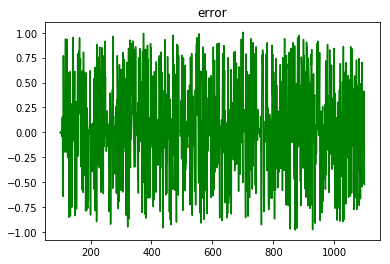

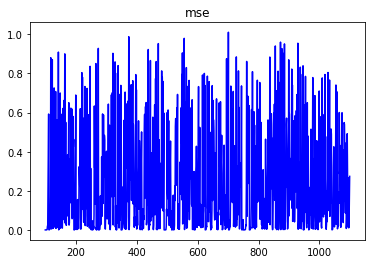

mae: 0.403625496918378 
 mse: 0.240562516781146 
 res: 152746.874070921


In [16]:
D=2

n_new=1000

x0=0.36
for i in range(200): #eliminar o transiente
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    

x_timeser=matrix(lenght+n_new, 1)

for i in range(lenght+n_new):
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    x_timeser[i,0]=x1
    
print(x_timeser)

x_timeser_r=x_timeser.copy() #cópia da série original que nunca será modificada
x_timeser_o=x_timeser.copy() #cópia da série, no final serão adicionados os novos pontos reconstrúidos pelo método
coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    coor_emb[i,0]=x_timeser[i,0] #pegando as coordenadas no espaço de dimensão D
    coor_emb[i,1]=x_timeser[i+1,0]

print(coor_emb)



for i in range(lenght):
        print(i,coor_emb[i,0],coor_emb[i,1])
    
for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1])
    
    np_m_dist=np.asarray(m_dist.tolist())

    
    ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
    dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
    print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)





[  0.868876267568456]
[  0.455721196899059]
[  0.992157550383792]
[  0.031123782400899]
[  0.120620370279842]
[  0.424284386213583]
[  0.977068583315785]
[ 0.0896222672522811]
[  0.326360465859367]
[  0.879397248733696]
[  0.424230910613208]
[  0.977036180373985]
[ 0.0897459304567946]
[  0.326766393692955]
[  0.879960470583423]
[  0.422520163176095]
[  0.975987499542964]
[ 0.0937436011153472]
[  0.339822953461096]
[  0.897373255048295]
[  0.368377984689292]
[  0.930702580342191]
[  0.257981149146313]
[  0.765707503325844]
[  0.717598090705387]
[  0.810604283685481]
[  0.614099915824918]
[  0.947924836834987]
[  0.197453362185402]
[  0.633862127788331]
[  0.928323722975922]
[  0.266155153344181]
[  0.781266350770066]
[   0.68355695969796]
[  0.865227370185766]
[  0.466435872268757]
[  0.995493797318563]
[ 0.0179435872753223]
[ 0.0704864598040606]
[  0.262072475153405]
[  0.773561971681491]
[   0.70065539059894]
[  0.838949656894347]
[  0.540452520364818]
[  0.993454374384536]
[ 0.026011

lyap 0.0693077728200264 1.0492131342936
dist 0.0607735481027027
b -0.00323653570958713 c -0.000714207171580478
delta 0.0535472114093847
new value 0.0283918735594859
new coor 100 0.544003195992661 0.992254874969726
0.544003195992661
0.992254874969726
0.0283918735594859
0 1.1498935516663
1 0.0883243124057891
2 1.06448175093309
3 1.08605841658162
4 1.18398943949703
5 0.135323235184842
6 1.04454609099326
7 1.17221480158834
8 0.46561115218079
9 1.15545074129056
10 0.135430163951661
11 1.04454167688653
12 1.17234536611082
13 0.463830755994026
14 1.15559612432547
15 0.138901414896039
16 1.04447224246791
17 1.17623541706443
18 0.407777695565038
19 1.15250049216374
20 0.295540412268359
21 1.11010299350496
22 0.779831733538389
23 0.858163972436289
24 0.637327259387705
25 1.0293775709792
26 0.188309557242006
27 1.07770885002442
28 1.02879516043679
29 0.262093870650744
30 1.11433525100864
31 0.74226476559404
32 0.922974461142785
33 0.476963085302375
34 1.14671562500299
35 0.0783348390816406
36 1.0

lyap 0.0693077728200264 1.0492131342936
dist 0.00538075340231563
b -0.546044942581026 c 0.0745240220770827
delta 0.00830608270996343
new value 0.277175512645495
new coor 104 0.36617957015885 0.929156950124414
0.36617957015885
0.929156950124414
0.277175512645495
0 0.99400437439027
1 0.269310661706298
2 1.10581260377116
3 0.887487916841311
4 0.897243521463043
5 0.202108669040558
6 1.03943399490478
7 0.895834003959631
8 0.160271266985536
9 1.00406555822396
10 0.201970857049402
11 1.03933436086084
12 0.895901582291804
13 0.158425880197085
14 1.00448486328167
15 0.197521211387491
16 1.03619779785668
17 0.897875913772812
18 0.100113762407292
19 1.01179909426385
20 0.0193815786084743
21 1.00390571806478
22 0.482073300684955
23 0.699232417835872
24 0.501066627067407
25 0.864105848120172
26 0.261098358173208
27 1.0005213827425
28 0.734616605565187
29 0.267910608684448
30 1.00483083360403
31 0.44387204670373
32 0.76054018821639
33 0.375013176177209
34 0.989515366580664
35 0.285750056062181
36 1.

lyap 0.0693077728200264 1.0492131342936
dist 0.00652075620293388
b -0.690377778705177 c 0.119144926835256
delta 0.00646297059176864
new value 0.348420374648473
new coor 108 0.657793130625898 0.909161184436406
0.657793130625898
0.909161184436406
0.348420374648473
0 0.815206393757474
1 0.385225376386992
2 0.966768889944047
3 1.01008239062276
4 0.958571152379017
5 0.355125624154931
6 0.879811054173249
7 0.971808236420102
8 0.341292748979551
9 0.824271549212098
10 0.355064492407585
11 0.879674018121573
12 0.971800487492984
13 0.34047343642909
14 0.824632225155808
15 0.353099680799346
16 0.875344165029252
17 0.971415028651724
18 0.318813887784106
19 0.829998597718406
20 0.303980940100703
21 0.820148495008472
22 0.562779499619347
23 0.511816272199069
24 0.289613042757856
25 0.685432710713139
26 0.161872655562783
27 0.819866712116438
28 0.78993048200494
29 0.0877921546400025
30 0.820974540691053
31 0.531087492195483
32 0.577262828310372
33 0.128536425193901
34 0.81101090011276
35 0.3915173398

lyap 0.0693077728200264 1.0492131342936
dist 0.00321541753791165
b -0.692001928285164 c 0.119714553659069
delta 0.0029075959328097
new value 0.347454762108987
new coor 112 0.346000964142582 0.909621267097155
0.346000964142582
0.909621267097155
0.347454762108987
0 0.94607903574059
1 0.344842074373163
2 1.11388060665272
3 0.852978807415613
4 0.826294054129848
5 0.277767942787276
6 1.03493462066441
7 0.829991570774182
8 0.0848163748222583
9 0.957333879483947
10 0.277630216238178
11 1.03480868779841
12 0.830029382189685
13 0.0829731642615634
14 0.957827563805673
15 0.273183121445162
16 1.03082377016488
17 0.831092199638879
18 0.0250192497544305
19 0.968056667454981
20 0.0946080347183979
21 0.970281494642063
22 0.40677357699244
23 0.653860809837468
24 0.467961991484216
25 0.814710638343146
26 0.309587841051394
27 0.975461251110877
28 0.659938059713338
29 0.299705618527068
30 0.970227256605521
31 0.368530901379416
32 0.713196678028215
33 0.360654090221104
34 0.941256578238411
35 0.3611873099

lyap 0.0693077728200264 1.0492131342936
dist 0.00389665764022049
b -0.698661667670798 c 0.122023744266587
delta 0.00575749999491357
new value 0.352209583832856
new coor 116 0.349330833835399 0.914085017405842
0.349330833835399
0.914085017405842
0.352209583832856
0 0.94316395687872
1 0.347145965898515
2 1.1164588187049
3 0.857925784062729
4 0.826233564853752
5 0.280244649222475
6 1.03656243681386
7 0.831141096367376
8 0.083174218431007
9 0.954639055292582
10 0.280107193345463
11 1.03643441098297
12 0.831172958106849
13 0.0813462735616039
14 0.955145384450398
15 0.275668749491496
16 1.03238173393817
17 0.832048784644668
18 0.0251217032973806
19 0.965816135719188
20 0.097559905991501
21 0.96925018597187
22 0.404807871133817
23 0.649694038846843
24 0.46358988419158
25 0.810950626959808
26 0.30854057803661
27 0.975296808775487
28 0.658406512407753
29 0.297600677051601
30 0.969090080267497
31 0.36653795918673
32 0.709153527308881
33 0.356569513378274
34 0.938271587910555
35 0.363420879873401

lyap 0.0693077728200264 1.0492131342936
dist 0.00450073461991975
b -1.83266488441342 c 0.839655001739975
delta 0.00636958414244245
new value 0.91951723427793
new coor 119 0.916332442206709 0.354459649020007
0.916332442206709
0.354459649020007
0.91951723427793
0 0.133351434615896
1 1.18661883435483
2 0.865177281820539
3 1.04092783298308
4 0.8008404042694
5 1.14825033453774
6 0.652428286893785
7 0.828159942708862
8 0.932166808504612
9 0.0976763360348687
10 1.14816630826481
11 0.652006024233856
12 0.827995721819554
13 0.933137357363721
14 0.0956244987754675
15 1.14544730525836
16 0.638417608397954
17 0.823017004782426
18 0.964817519876942
19 0.0260438632327838
20 1.03437903852662
21 0.182131916871987
22 0.802073913854901
23 0.407945377286351
24 0.583817615879975
25 0.281777400679783
26 0.982304262707153
27 0.327487241533962
28 0.771317334874143
29 0.914325687436909
30 0.164483377767338
31 0.812755632888044
32 0.359854523793404
33 0.721353457635112
34 0.144647298940515
35 1.19422223388127


lyap 0.0693077728200264 1.0492131342936
dist 0.00519845826582397
b -0.714246121156889 c 0.127524261842975
delta 0.00710452079742879
new value 0.360675320977159
new coor 122 0.357123060578445 0.922221241169862
0.357123060578445
0.922221241169862
0.360675320977159
0 0.937167776988515
1 0.351022643728785
2 1.12024544793591
3 0.86768980561268
4 0.826931247383167
5 0.284585018114311
6 1.03861976286437
7 0.834073843445056
8 0.0825805336384357
9 0.949033932974763
10 0.284448370963829
11 1.03848795582377
12 0.834094761821123
13 0.0808225492147298
14 0.949562637081011
15 0.280035952398965
16 1.03431291934124
17 0.834626370077894
18 0.0312417532931741
19 0.961011811474199
20 0.103656641653684
21 0.966570966914484
22 0.402143671200719
23 0.64128617016508
24 0.454559806644671
25 0.803396517740917
26 0.305514626154462
27 0.974148986886093
28 0.656406961531379
29 0.292499254176412
30 0.966224468051016
31 0.363862603048499
32 0.70102135504254
33 0.347840029372159
34 0.932150626159888
35 0.36712831485

lyap 0.0693077728200264 1.0492131342936
dist 0.00600434609540048
b -1.85070956450782 c 0.856265551763218
delta 0.00798029497261418
new value 0.929344929740216
new coor 125 0.925354782253909 0.363886522519486
0.925354782253909
0.363886522519486
0.929344929740216
0 0.124775219300913
1 1.1925105527728
2 0.877057047241182
3 1.05542107926221
4 0.808407646465977
5 1.15420879019622
6 0.664443724192814
7 0.838064324737269
8 0.937915599738861
9 0.0895990817401618
10 1.15412482741382
11 0.664021779185735
12 0.837889540435969
13 0.938888557174426
14 0.087601807438487
15 1.15140776470192
16 0.650443718211558
17 0.832573360090934
18 0.970638722570601
19 0.0283722102124315
20 1.04030424507658
21 0.194991677712725
22 0.807269713679795
23 0.40583059047238
24 0.584892314723662
25 0.27589786526679
26 0.986734823101964
27 0.339881583013733
28 0.776355812524955
29 0.918356140276043
30 0.177447177153398
31 0.818023103587362
32 0.35645718668105
33 0.723943111038884
34 0.136041712345546
35 1.20007779854803
3

lyap 0.0693077728200264 1.0492131342936
dist 0.00693516619540055
b -0.735109222905791 c 0.135076065022155
delta 0.00901717874598492
new value 0.372063200825888
new coor 128 0.367554611452896 0.933128350890468
0.367554611452896
0.933128350890468
0.372063200825888
0 0.929385816508013
1 0.357067893009198
2 1.12559520695949
3 0.88095514840193
4 0.828209039248877
5 0.291413610402671
6 1.04168063004653
7 0.838332565527837
8 0.0854719773646092
9 0.941781182676005
10 0.291278460455144
11 1.04154380161735
12 0.8383389070062
13 0.08388329544067
14 0.94234019569005
15 0.28691447869093
16 1.03720623359812
17 0.838411842156372
18 0.0453988166324915
19 0.954844870946056
20 0.114110809398849
21 0.963283559383102
22 0.399287420244048
23 0.630315238367203
24 0.442859295735297
25 0.793529317840778
26 0.302476641832482
27 0.97292649551492
28 0.654156308381115
29 0.286634422614474
30 0.962685026687172
31 0.361071016562617
32 0.690401463274102
33 0.336710897347144
34 0.924200061150223
35 0.372917756817656


lyap 0.0693077728200264 1.0492131342936
dist 0.00801028611503553
b -1.87481364632265 c 0.878705346633895
delta 0.0102382567875413
new value 0.942525951555095
new coor 131 0.937406823161324 0.376496470856053
0.937406823161324
0.376496470856053
0.942525951555095
0 0.115915011403827
1 1.20071375495241
2 0.893201388598082
3 1.07489341279202
4 0.818912075789512
5 1.16250857728485
6 0.680830206200122
7 0.851608774822591
8 0.946000313227687
9 0.082671901861129
10 1.16242471769654
11 0.680408841411495
12 0.851420289284032
13 0.946976110084336
14 0.0808575220558908
15 1.15971084522171
16 0.666849726586256
17 0.845666213770512
18 0.978807945151901
19 0.0425251513852521
20 1.04858944173088
21 0.212968523462838
22 0.814676019589001
23 0.404022645342198
24 0.587051218352262
25 0.269375999377934
26 0.993071446174365
27 0.35698798225768
28 0.783562319841277
29 0.924191622415892
30 0.195607688766522
31 0.825519472006208
32 0.353045410121852
33 0.727983110198905
34 0.126903751099598
35 1.20823171415485

lyap 0.0693077728200264 1.0492131342936
dist 0.00925207584604526
b -0.762948084683853 c 0.145488397645122
delta 0.0116700189490419
new value 0.387309051816448
new coor 134 0.381474042341927 0.947700635506435
0.381474042341927
0.947700635506435
0.387309051816448
0 0.919481594914968
1 0.366547409469594
2 1.13321239293563
3 0.898985119521907
4 0.830557350967643
5 0.302179786890346
6 1.04630113898138
7 0.844625277022475
8 0.095215978776323
9 0.932591099303425
10 0.302047239964783
11 1.04615770781789
12 0.844612363355912
13 0.0939227295582791
14 0.933191064292723
15 0.297767702341766
16 1.04160635410704
17 0.844079128136572
18 0.0680150257760017
19 0.947123676329818
20 0.131095945835344
21 0.959453148894456
22 0.396815881790163
23 0.616247829194275
24 0.428029066266025
25 0.780853547484774
26 0.300266598484147
27 0.971867219829263
28 0.651962494367422
29 0.280630499998744
30 0.958515086404024
31 0.358833722244097
32 0.676765609632221
33 0.322981396005834
34 0.914068782529893
35 0.3820124935

lyap 0.0693077728200264 1.0492131342936
dist 0.0106863732745152
b -1.90696136018783 c 0.909080898297574
delta 0.0133430153681382
new value 0.960152187777983
new coor 137 0.953480680093914 0.39333239337661
0.953480680093914
0.39333239337661
0.960152187777983
0 0.109884542403697
1 1.21220866593692
2 0.915152801859944
3 1.1010306058493
4 0.833606913336354
5 1.17414607244238
6 0.703198532891973
7 0.870205697920145
8 0.957470846570699
9 0.0820252544982719
10 1.17406238430261
11 0.702778177101658
12 0.869999690546608
13 0.958449725432997
14 0.0806715824254632
15 1.17135386724512
16 0.689252029607784
17 0.863685301209502
18 0.990368468365258
19 0.0681031940242577
20 1.06026225505874
21 0.238007429410682
22 0.825357686136585
23 0.403449605274502
24 0.591192524768753
25 0.263251726926353
26 1.00222830735179
27 0.380610910908732
28 0.794005610642498
29 0.932739848793471
30 0.220923211898898
31 0.836309784241094
32 0.35056924439516
33 0.734370127503913
34 0.119924120596304
35 1.21965898844225
36 

lyap 0.0693077728200264 1.0492131342936
dist 0.0123430217891157
b -0.800070104529955 c 0.159969577294791
delta 0.0152925793575401
new value 0.407681341943747
new coor 140 0.400035052264977 0.967149244649347
0.400035052264977
0.967149244649347
0.407681341943747
0 0.907184199281141
1 0.381473403671581
2 1.14418386643429
3 0.923570420299965
4 0.834851273982735
5 0.31913633210608
6 1.05339184395159
7 0.854097332182437
8 0.115768068535168
9 0.921256405611279
10 0.319008020175996
11 1.05323981430896
12 0.854059195992984
13 0.11484933290023
14 0.921911672721264
15 0.314866003370782
16 1.04840993917933
17 0.852731433936468
18 0.100194508126174
19 0.937775839696104
20 0.157291693964427
21 0.955358647456012
22 0.395987976713533
23 0.598614247142044
24 0.40983074046467
25 0.76490127215537
26 0.300647878988068
27 0.971479652593607
28 0.650529117217576
29 0.276065543740137
30 0.953964042543561
31 0.358585602113703
32 0.659628876720745
33 0.306960641324452
34 0.901466170539433
35 0.396368515370706
3

lyap 0.0693077728200264 1.0492131342936
dist 0.0142564912316806
b -1.94982780074123 c 0.950380027975435
delta 0.0175596310227804
new value 0.983693715882007
new coor 143 0.974913900370617 0.415797529679078
0.974913900370617
0.415797529679078
0.983693715882007
0 0.113620047830703
1 1.22847116977854
2 0.945075042099688
3 1.13613737740133
4 0.854361372412351
5 1.19062244761559
6 0.733813291010125
7 0.895889511666277
8 0.973932691413063
9 0.0961190690391329
10 1.19053904652835
11 0.733394611424368
12 0.895661467473349
13 0.974914448748204
14 0.0955025308552129
15 1.1878395725017
16 0.71992322105833
17 0.888641915779167
18 1.00691069075889
19 0.105210386226074
20 1.07688056799623
21 0.272724475703409
22 0.840973508009417
23 0.405969021894979
24 0.598901808273597
25 0.260001729214693
26 1.01563777807135
27 0.413261085824906
28 0.809359557612198
29 0.945442224107705
30 0.256008444335313
31 0.852049583703203
32 0.351039543204117
33 0.744601722530527
34 0.121386237136387
35 1.23582805384946
36 

lyap 0.0693077728200264 1.0492131342936
dist 0.0164665951103063
b -0.849571380171685 c 0.180340957527668
delta 0.0201915798329203
new value 0.434881480002302
new coor 146 0.424785690085842 0.993097797601758
0.424785690085842
0.993097797601758
0.434881480002302
0 0.892494633379644
1 0.404942178611969
2 1.16020036151676
3 0.957235006226363
4 0.842634021237692
5 0.345631467035284
6 1.06445349292739
7 0.868600862419174
8 0.150760652045692
9 0.907861731489649
10 0.345509523585551
11 1.06429040763575
12 0.868530073298602
13 0.15020199527266
14 0.908591570559041
15 0.341574219348197
16 1.05910222781123
17 0.866172920750902
18 0.144237892215199
19 0.927066564354893
20 0.19587934914618
21 0.951732233556838
22 0.399322905399093
23 0.577317413950406
24 0.388795874871116
25 0.745458830217124
26 0.307005836396798
27 0.972788739996399
28 0.65131827928116
29 0.27636427202795
30 0.949725558939955
31 0.363146944439328
32 0.638820457538614
33 0.290360286291911
34 0.886367772141686
35 0.419019909887499
3

lyap 0.0693077728200264 1.0492131342936
dist 0.019019318997943
b -2.0069928923012 c 1.00687005413088
delta 0.0232433479521528
new value 1.01511812012668
new coor 149 1.0034964461506 0.445769055375027
1.0034964461506
0.445769055375027
1.01511812012668
0 0.136926350149711
1 1.25173598168581
2 0.985994674142844
3 1.18334896195354
4 0.883956743062381
5 1.21421100820832
6 0.775838947808095
7 0.931581762938106
8 0.997844797675015
9 0.131585472657999
10 1.21412808557438
11 0.775422923588025
12 0.931326596124139
13 0.998828357387798
14 0.131654296227198
15 1.21144378499297
16 0.762038204233943
17 0.923438502994555
18 1.03086452109227
19 0.156132933325188
20 1.10081441512699
21 0.320575888672355
22 0.864101751214182
23 0.415042787040382
24 0.612909629263588
25 0.264683966722182
26 1.03555093697148
27 0.458372140231133
28 0.832236579630317
29 0.964590100584799
30 0.304300414300509
31 0.875307614727342
32 0.358324628867433
33 0.761156200769506
34 0.141175666226038
35 1.25896322459812
36 1.0370282

lyap 0.0693077728200264 1.0492131342936
dist 0.0219677773530163
b -0.91558907038001 c 0.209396563913341
delta 0.0267785389065177
new value 0.471183804643264
new coor 152 0.457794535190005 1.0277156810239
0.457794535190005
1.0277156810239
0.471183804643264
0 0.876116159145254
1 0.441499153523808
2 1.18390623189536
3 1.00352846970504
4 0.856583419365487
5 0.386364161649147
6 1.08196053046086
7 0.891116250919638
8 0.203661106241799
9 0.893212932182169
10 0.386250929506649
11 1.08178349389232
12 0.891003951435109
13 0.203391558520325
14 0.894042763079074
15 0.382597952581422
16 1.07614286578359
17 0.887336990590932
18 0.203655293869902
19 0.916031197056042
20 0.250723420362514
21 0.950198651767167
22 0.411453125882413
23 0.553343995507707
24 0.367505457303648
25 0.723073116378843
26 0.325155817970372
27 0.977766571066415
28 0.657172011493861
29 0.287950180311634
30 0.947377084001282
31 0.377578180043153
32 0.615101270105027
33 0.278197171697654
34 0.869446667236162
35 0.454466299229952
36 

lyap 0.0693077728200264 1.0492131342936
dist 0.0253733186705534
b -2.08323638437371 c 1.08473020704845
delta 0.0308707788150292
new value 1.05705358159437
new coor 155 1.04161819218685 0.485753438734751
1.04161819218685
0.485753438734751
1.05705358159437
0 0.186957757093493
1 1.28539969124606
2 1.04213321545695
3 1.24692339961636
4 0.926505818829507
5 1.24836490949633
6 0.833665992114351
7 0.981460204745759
8 1.03296350232202
9 0.191058735626933
10 1.24828277230392
11 0.833253958691627
12 0.981172590887941
13 1.0339462930242
14 0.191581251042617
15 1.2456235074821
16 0.819999313743467
17 0.972244698425783
18 1.0659369156065
19 0.224829212114245
20 1.1356711090395
21 0.386089401794046
22 0.898716486886201
23 0.436595816877494
24 0.637749988355827
25 0.285918392264814
26 1.06549838810453
27 0.520563526910903
28 0.866672845129276
29 0.993807722024588
30 0.370293991830817
31 0.910038753218089
32 0.379086546342563
33 0.788059381919528
34 0.187820386274949
35 1.29244710321515
36 1.0928349384

lyap 0.0693077728200264 1.0492131342936
dist 0.0293068019586897
b -1.00364448304823 c 0.251508628445799
delta 0.0356052604252003
new value 0.519624871736713
new coor 158 0.501822241524113 1.07389841983865
0.501822241524113
1.07389841983865
0.519624871736713
0 0.860324862703644
1 0.49743360394834
2 1.21943111809597
3 1.06742020187525
4 0.881230962112654
5 0.447538128108204
6 1.10995935083935
7 0.926368163679691
8 0.278778672246381
9 0.87969077742225
10 0.447435595614138
11 1.10976520155709
12 0.926204564030879
13 0.278721729410983
14 0.880652599829854
15 0.444128612689536
16 1.10356915976942
17 0.920917373161022
18 0.283338179528846
19 0.907306216900155
20 0.326756569485992
21 0.954052409047095
22 0.440038083331225
23 0.530334209828752
24 0.353282540154491
25 0.700144180835482
26 0.363689567251726
27 0.990057379800836
28 0.673280850786313
29 0.320738868978069
30 0.950162597558174
31 0.409934426173137
32 0.591520542864958
33 0.281780383308285
34 0.852950918032284
35 0.509002545318217
36 

lyap 0.0693077728200264 1.0492131342936
dist 0.0338500711001852
b -2.18493570328628 c 1.19306410451418
delta 0.0410805238334197
new value 1.11300811355985
new coor 161 1.09246785164314 0.539095391923365
1.09246785164314
0.539095391923365
1.11300811355985
0 0.267487030498582
1 1.33461055284448
2 1.11934389069311
3 1.33263383930657
4 0.988002353209374
5 1.2983097666869
6 0.913322288441919
7 1.05144160611254
8 1.08496078989059
9 0.277635187800733
10 1.29822888541067
11 0.912915905936326
12 1.05111657708079
13 1.0859379973931
14 0.278430996169435
15 1.29560980442083
16 0.899845087666888
17 1.04098896513282
18 1.11772599450251
19 0.316925294343961
20 1.18690076894439
21 0.475195680073062
22 0.950826057621524
23 0.479670319102189
24 0.680554043216659
25 0.335149575267134
26 1.1109535993056
27 0.60596438450974
28 0.918770915240114
29 1.03873858110325
30 0.459882882906569
31 0.962220215040274
32 0.423214857367465
33 0.831640455969371
34 0.265945965810869
35 1.34141039968141
36 1.16955314939073

lyap 0.0693077728200264 1.0492131342936
dist 0.0390976577759237
b -1.12110364536695 c 0.313656406746835
delta 0.0474105122069044
new value 0.584257078786926
new coor 164 0.560551822683474 1.13550943031398
0.560551822683474
1.13550943031398
0.584257078786926
0 0.85062259570973
1 0.580943771076637
2 1.27314970092892
3 1.15580496468201
4 0.923948929465156
5 0.536969191873701
6 1.15493585653247
7 0.981633543015316
8 0.382161504687864
9 0.872843033393982
10 0.536878419976999
11 1.15472159880405
12 0.981409182430198
13 0.3822561019774
14 0.873972712361659
15 0.533950800355933
16 1.14787233006002
17 0.97420153202851
18 0.389915189428131
19 0.906622202306117
20 0.430502743391523
21 0.969531703560929
22 0.496066833348401
23 0.517659925277852
24 0.362101476837328
25 0.683116646918067
26 0.433211834056408
27 1.01610417769642
28 0.708429505166751
29 0.386638271683134
30 0.964285063027385
31 0.47118788680501
32 0.576125197550985
33 0.319475339368317
34 0.842378925418832
35 0.590908757993683
36 1.30

lyap 0.0693077728200264 1.0492131342936
dist 0.0451587483830964
b -2.32059860199087 c 1.3455457082313
delta 0.0547269461672874
new value 1.18766277407908
new coor 167 1.16029930099544 0.610257371245382
1.16029930099544
0.610257371245382
1.18766277407908
0 0.383446353595289
1 1.40707515466303
2 1.22566180226533
3 1.4482846086208
4 1.07697174675978
5 1.37184597339291
6 1.02297413142069
7 1.1497714545027
8 1.16220414065581
9 0.397335335700214
10 1.37176702309656
11 1.02257523397237
12 1.14940522058228
13 1.16316812386177
14 0.398298306524602
15 1.36920989622617
16 1.00974733290766
17 1.13795599217551
18 1.19450597893886
19 0.44007304444086
20 1.26258957186838
21 0.595700798478189
22 1.02922475547154
23 0.556235401624358
24 0.751729738194012
25 0.423999585889312
26 1.1801981888993
27 0.722637681521992
28 0.997439837705268
29 1.10791633100607
30 0.580841680701696
31 1.04060583313275
32 0.502994430096108
33 0.901366298593627
34 0.380369535516205
35 1.41354042661497
36 1.27517817966754
37 1.5

lyap 0.0693077728200264 1.0492131342936
dist 0.0521594558736864
b -1.27779296492338 c 0.407190721909115
delta 0.0631820668483404
new value 0.670487515885862
new coor 170 0.638896482461691 1.21770302629127
0.638896482461691
1.21770302629127
0.670487515885862
0 0.858474589592231
1 0.70228906487223
2 1.35466511062986
3 1.27812127363592
4 0.996049806880924
5 0.664355118947901
6 1.22692705376888
7 1.06763149073534
8 0.522275670927617
9 0.883974377816173
10 0.664276017561582
11 1.22669061918199
12 1.06733937003309
13 0.522477783509247
14 0.885301006537148
15 0.661723998842124
16 1.21912025497169
17 1.05798970928257
18 0.532284047227847
19 0.925135205269476
20 0.570710974322964
21 1.00761288510963
22 0.592972048409854
23 0.534620136385245
24 0.418452973238319
25 0.686142660837517
26 0.545120584632786
27 1.06665332698496
28 0.776029466509211
29 0.497242783067576
30 1.00074144129246
31 0.574093964899339
32 0.586092834550973
33 0.409720294392182
34 0.849268562011901
35 0.710586505835313
36 1.388

lyap 0.0693077728200264 1.0492131342936
dist 0.0602454437833258
b -2.50157454050766 c 1.56313830396166
delta 0.0729518051145662
new value 1.28726317281111
new coor 173 1.25078727025383 0.705192772414338
1.25078727025383
0.705192772414338
1.28726317281111
0 0.543304159150689
1 1.51405581566036
2 1.37197440354979
3 1.60438034862567
4 1.20515867278417
5 1.48032672493201
6 1.17353439601562
7 1.28770054465659
8 1.27661145296722
9 0.5595631355871
10 1.48025058684311
11 1.17314472132907
12 1.28729134545053
13 1.27755187814674
14 0.560632557149413
15 1.47778386543108
16 1.16061534209529
17 1.27446432075145
18 1.30810523786305
19 0.604550348172716
20 1.37438069870094
21 0.757939813622478
22 1.14623048839942
23 0.680191126660214
24 0.865188452565259
25 0.563213526514497
26 1.28529182123113
27 0.881168478733138
28 1.11509547187559
29 1.21369091614145
30 0.743484737030613
31 1.15747517758492
32 0.631689972155958
33 1.0105042083103
34 0.539250092612818
35 1.52008355388983
36 1.42057445039457
37 1.7

lyap 0.0693077728200264 1.0492131342936
dist 0.0695849570486201
b -1.48682106290369 c 0.550885147327611
delta 0.0842394431582468
new value 0.785530253030968
new coor 176 0.743410531451844 1.3273555436029
0.743410531451844
1.3273555436029
0.785530253030968
0 0.904534645718147
1 0.874215059811978
2 1.47790290965154
3 1.4470869938263
4 1.11359419544529
5 0.841920646968805
6 1.34067768014453
7 1.19926696483899
8 0.710728222307461
9 0.93316719305673
10 0.841852190204321
11 1.34041888117881
12 1.1989049685019
13 0.71100704231913
14 0.934690812139446
15 0.839642127699223
16 1.33212066556459
17 1.1873485562653
18 0.722345981204093
19 0.982047597305805
20 0.759138354586443
21 1.08583279030559
22 0.745456226099709
23 0.610679959825178
24 0.545056425737844
25 0.734588722854554
26 0.711704521623126
27 1.15823497654534
28 0.894087424981758
29 0.664061548949167
30 1.07719883844506
31 0.732382860950943
32 0.649816366504454
33 0.564770858447544
34 0.894486843178273
35 0.880929321751949
36 1.5130741127

lyap 0.0693077728200264 1.0492131342936
dist 0.080372322675102
b -2.74300402637699 c 1.87865193012683
delta 0.0972798448448361
new value 1.42014193561091
new coor 179 1.37150201318849 0.831843938071788
1.37150201318849
0.831843938071788
1.42014193561091
0 0.759783910454558
1 1.6714444016249
2 1.57283542938183
3 1.81498898719624
4 1.38820879855688
5 1.63969326958654
6 1.37943055019348
7 1.48024796575011
8 1.4444448556523
9 0.777597704264324
10 1.63962094995428
11 1.37905142102409
12 1.47979660650196
13 1.44535010159465
14 0.778737570610451
15 1.63727714810876
16 1.36686244410792
17 1.46561874384102
18 1.4747417340408
19 0.824105364456617
20 1.53839154356101
21 0.975657248561821
22 1.31828320048189
23 0.866934398287991
24 1.03814507676814
25 0.764857967574524
26 1.44294839122323
27 1.09549302293104
28 1.28820502498817
29 1.3729917855088
30 0.961547092444289
31 1.3292506158154
32 0.823588088832479
33 1.1764089873073
34 0.755091458074191
35 1.67692760843928
36 1.62030425007272
37 1.9372430

lyap 0.0693077728200264 1.0492131342936
dist 0.0928319930940977
b -1.76567534470538 c 0.776247042876998
delta 0.112344342948231
new value 0.939009843826806
new coor 182 0.88283767235269 1.47364058192831
0.88283767235269
1.47364058192831
0.939009843826806
0 1.0194015273454
1 1.11288431285587
2 1.66209713406407
3 1.67958999168881
4 1.29752537883295
5 1.0855017831741
6 1.51648455985001
7 1.3960644702554
8 0.963218236161144
9 1.05010404105286
10 1.08544243887405
11 1.51620572730639
12 1.39563668022319
13 0.963552246520873
14 1.05177457662282
15 1.08352472086691
16 1.50725495439505
17 1.38200776893983
18 0.975996790786265
19 1.10538938960279
20 1.0115584643387
21 1.22888266614506
22 0.969864981733759
23 0.775762665321054
24 0.75662917829325
25 0.862616540662271
26 0.947894003508295
27 1.31377520429447
28 1.08401738816315
29 0.901161879438585
30 1.21859470319136
31 0.961735712777888
32 0.799995448050337
33 0.795742167572638
34 1.00894097295375
35 1.11820295818941
36 1.6988460822948
37 1.7818

lyap 0.0693077728200264 1.0492131342936
dist 0.107223216338531
b -3.06508521200965 c 2.34447830811207
delta 0.129746385043959
new value 1.5974157985268
new coor 185 1.53254260600483 1.00080659595566
1.53254260600483
1.00080659595566
1.5974157985268
0 1.05067057062782
1 1.9007603302041
2 1.84749167904301
3 2.09886245054259
4 1.64643035852738
5 1.87142755882568
6 1.65963548089914
7 1.74712544604977
8 1.6870027759395
9 1.06953693216849
10 1.87136000755734
11 1.65926755984109
12 1.7466352191666
13 1.68786249859424
14 1.07072488183754
15 1.86916983936677
16 1.64743941530422
17 1.731213884763
18 1.71575422873376
19 1.11710007073893
20 1.77602900271615
21 1.26717786802927
22 1.5664793933087
23 1.13459926495379
24 1.29120935861825
25 1.04526336729571
26 1.67518007353226
27 1.38404842062402
28 1.53778923693916
29 1.60783558681069
30 1.25335275234606
31 1.57704568000362
32 1.09597592947187
33 1.42065968750229
34 1.04554855928763
35 1.90560863234359
36 1.89366161765923
37 2.22320658836362
38 1.83

lyap 0.0693077728200264 1.0492131342936
dist 0.123845430209887
b -2.13768496513618 c 1.13681064260156
delta 0.149848055586344
new value 1.14376651036126
new coor 188 1.06884248256809 1.66879645960514
1.06884248256809
1.66879645960514
1.14376651036126
0 1.23875879689154
1 1.43935116093877
2 1.93253212145334
3 1.99783979117529
4 1.5734432541185
5 1.41603766888164
6 1.7805522233188
7 1.68252718666917
8 1.30083132594703
9 1.26989444651823
10 1.41598578576279
11 1.78025789181294
12 1.68204291942619
13 1.30120537678878
14 1.27162526632788
15 1.41430721755492
16 1.77080173864574
17 1.66664274663376
18 1.31445448764569
19 1.32886648846447
20 1.34909184028988
21 1.46710977285704
22 1.28634571049316
23 1.05245723044755
24 1.06790127586423
25 1.10337016812748
26 1.27356007825856
27 1.561881578975
28 1.36997214020242
29 1.2278882183248
30 1.45552551387134
31 1.28211133413099
32 1.06347588424326
33 1.11935026193877
34 1.22846037518652
35 1.44350526612143
36 1.97043784541191
37 2.10626867120812
38 1

lyap 0.0693077728200264 1.0492131342936
dist 0.136335019070197
b -2.28753302072252 c 1.30140386311255
delta 0.164899570786952
new value 1.22621629575474
new coor 190 1.14376651036126 1.74738182957112
1.14376651036126
1.74738182957112
1.22621629575474
0 1.3411693896977
1 1.57226466624602
2 2.04716128129873
3 2.12777383033509
4 1.69100249887347
5 1.5501235466736
6 1.8935932720459
7 1.80299896083763
8 1.43691698860454
9 1.37211886902478
10 1.55007380138566
11 1.89329498580891
12 1.80249845935649
13 1.43730180483639
14 1.37385097887648
15 1.5484637257073
16 1.88370972932243
17 1.7865911242023
18 1.4507675166529
19 1.43167370460573
20 1.48515038329211
21 1.57346082665866
22 1.41668368645207
23 1.17307992319754
24 1.19743816331612
25 1.21357781020234
26 1.40642502753919
27 1.67078295281266
28 1.49136671733873
29 1.36109369938776
30 1.56154683392607
31 1.4135274908377
32 1.18044174945133
33 1.25190079984307
34 1.33102947729327
35 1.5760822771669
36 2.08534239036538
37 2.23808593268795
38 1.88

lyap 0.0693077728200264 1.0492131342936
dist 0.150084160500475
b -2.45243259150947 c 1.49536721525261
delta 0.181539953969967
new value 1.31698627273972
new coor 192 1.22621629575474 1.8339156345253
1.22621629575474
1.8339156345253
1.31698627273972
0 1.46035115726166
1 1.7192038022406
2 2.17626591457464
3 2.27168295238742
4 1.82344362189425
5 1.69814724293064
6 2.02137908938021
7 1.93805385016241
8 1.58677597663203
9 1.49099313798124
10 1.69809947136614
11 2.02107745901808
12 1.93753845822278
13 1.58717050195882
14 1.49271914181195
15 1.69655261987327
16 2.01138293441585
17 1.92116694441933
18 1.60083180564883
19 1.55085571202487
20 1.63498386566213
21 1.69552532856638
22 1.5613500899705
23 1.309448710482
24 1.34160643633004
25 1.34048128507519
26 1.55338987185591
27 1.79502465228617
28 1.62774081785362
29 1.50838529960382
30 1.6833326308443
31 1.55917305209448
32 1.31354164011999
33 1.39866797068498
34 1.45040384593984
35 1.72270989074661
36 2.21466682174239
37 2.38378868875834
38 2.0

lyap 0.0693077728200264 1.0492131342936
dist 0.165219878111688
b -2.63397254547944 c 1.72446402176616
delta 0.199888176926051
new value 1.41693036120275
new coor 194 1.31698627273972 1.92915007463328
1.31698627273972
1.92915007463328
1.41693036120275
0 1.59756914569816
1 1.88153989997893
2 2.32130073395054
3 2.43096031790963
4 1.97215377098172
5 1.86148397806242
6 2.16535200056262
7 2.08909041904856
8 1.7517912786466
9 1.62781225406754
10 1.86143802407217
11 2.1650476084765
12 2.08856146237124
13 1.7521945885218
14 1.62952626523679
15 1.85994938581169
16 2.15526273437026
17 2.07176806576697
18 1.7660333078027
19 1.6877505906516
20 1.79997732184057
21 1.83469667224501
22 1.72167246974753
23 1.46266804287356
24 1.50164829545238
25 1.48517535022229
26 1.71580195511068
27 1.93602058500359
28 1.78041041616121
29 1.67110608957339
30 1.8222731463701
31 1.72038357090355
32 1.46385594682897
33 1.56096252009885
34 1.5878374353863
35 1.88475834565982
36 2.35986839223828
37 2.54476699694077
38 2.1

lyap 0.0693077728200264 1.0492131342936
dist 0.18188200561747
b -2.83386072240549 c 1.99559150874686
delta 0.220001270462579
new value 1.52693099643404
new coor 196 1.41693036120275 2.03399330711607
1.41693036120275
2.03399330711607
1.52693099643404
0 1.75422027751324
1 2.06077267623115
2 2.48387355778792
3 2.60716041245997
4 2.13867507489096
5 2.04163960738045
6 2.32710694279211
7 2.25766619570204
8 1.93348965188093
9 1.78400143747841
10 2.04159532739465
11 2.32680034073535
12 2.2571249651825
13 1.93390086417836
14 1.78569904906681
15 2.04016029784382
16 2.31694303654097
17 2.23995074477381
18 1.94789901986662
19 1.84382816797386
20 1.98165239863322
21 1.99251043826546
22 1.89913978119496
23 1.63404759288322
24 1.67898984777618
25 1.64893198397127
26 1.89514965797734
27 2.09533223030563
28 1.95085164435818
29 1.85074493488281
30 1.97989998450531
31 1.89865430555917
32 1.63266614823039
33 1.74025867897322
34 1.74471716861097
35 2.06372575851131
36 2.52255742026377
37 2.72257051550942
3

lyap 0.0693077728200264 1.0492131342936
dist 0.200224478709948
b -3.05386199286807 c 2.31685355236041
delta 0.242195916651237
new value 1.64802895475965
new coor 198 1.52693099643404 2.14942721293559
1.52693099643404
2.14942721293559
1.64802895475965
0 1.93179796925524
1 2.2585716377576
2 2.66573986847144
3 2.80197201902631
4 2.32465377419363
5 2.24028696981936
6 2.50837650327331
7 2.44544953879354
8 2.13354806876051
9 1.9610796871202
10 2.24024422693835
11 2.50806819073959
12 2.44489725188095
13 2.13396642004027
14 1.96275789066259
15 2.2388584167244
16 2.49815467705794
17 2.42738082416373
18 2.14810875524363
19 2.02065247645664
20 2.18168918799246
21 2.17060997879389
22 2.09537957002515
23 1.82506874430802
24 1.87522687846925
25 1.83316656215015
26 2.09309294855091
27 2.27463939994788
28 2.14065969456653
29 2.04896094164195
30 2.15785118345762
31 2.09562069576981
32 1.82141968912481
33 1.93819792966289
34 1.92252793827459
35 2.26128073032573
36 2.70449408696937
37 2.91888900429482
38

lyap 0.0693077728200264 1.0492131342936
dist 0.220416757218883
b -3.29605790951931 c 2.69822373256365
delta 0.266651106598493
new value 1.7813545080589
new coor 200 1.64802895475965 2.27648282355435
1.64802895475965
2.27648282355435
1.7813545080589
0 2.13192017886724
1 2.47677144480401
2 2.86877018932369
3 3.01724453259005
4 2.53189491961457
5 2.45926536009544
6 2.71100619246693
7 2.65426741518238
8 2.35381395965524
9 2.16068503506466
10 2.45922402622177
11 2.71069661256408
12 2.65370521186854
13 2.35423877600745
14 2.16234196205584
15 2.45788332905753
16 2.70074127853902
17 2.63588263559989
18 2.36851193777278
19 2.21990016841694
20 2.40193618959098
21 2.37074776710771
22 2.31219650669289
23 2.03739263572118
24 2.09212446320103
25 2.03946121034725
26 2.31145374635265
27 2.4757318190697
28 2.35160239416239
29 2.26757500381562
30 2.35787389073693
31 2.31309467180036
32 2.0317428853487
33 2.15658507893129
34 2.12288137759861
35 2.47925657677168
36 2.90755414258236
37 3.13557270011006
38 

lyap 0.0693077728200264 1.0492131342936
dist 0.242645390693056
b -3.5627090161178 c 3.15168707973815
delta 0.293508457415578
new value 1.92810873676669
new coor 202 1.7813545080589 2.41635518972586
1.7813545080589
2.41635518972586
1.92810873676669
0 2.35641821765324
1 2.71738744176356
2 3.09502421629918
3 3.255025903364
4 2.7624013712831
5 2.70059581381299
6 2.93703242484943
7 2.88614478249216
8 2.59632353361655
9 2.38466455683035
10 2.70055577188274
11 2.93672196799208
12 2.88557372184913
13 2.59675417943055
14 2.38629926335015
15 2.6992564366227
16 2.92673749068898
17 2.8674783930755
18 2.6111452199665
19 2.44345094669344
20 2.64442668461291
21 2.59487260355506
22 2.55159561833181
23 2.27291238774222
24 2.33165882350379
25 2.26963445252977
26 2.55224195756391
27 2.70059338331241
28 2.58565164505109
29 2.50859843782697
30 2.58191192240818
31 2.5530870963621
32 2.26549836189791
33 2.39742456243113
34 2.34760407705853
35 2.71966707769778
36 3.1338021308504
37 3.37466961324721
38 2.98345

lyap 0.0693077728200264 1.0492131342936
dist 0.267115741867659
b -3.85621747353338 c 3.69150260596986
delta 0.323114189265552
new value 2.08966583139947
new coor 204 1.92810873676669 2.57034649170006
1.92810873676669
2.57034649170006
2.08966583139947
0 2.60732391315578
1 2.9826499575957
2 3.34675912169787
3 3.51755672946836
4 3.01835541181514
5 2.96651250277972
6 3.18868560121258
7 3.14328742321533
8 2.86331631871462
9 2.63506216489426
10 2.96647364295735
11 3.1883745983541
12 3.14270846942319
13 2.86375223774393
14 2.63667444942496
15 2.96521215061268
16 3.1783717255061
17 3.12437070354229
18 2.8782499945689
19 2.69337646021527
20 2.91140188744695
21 2.84512182037829
22 2.81578016228972
23 2.53374262855042
24 2.59602069215581
25 2.52572551298605
26 2.81768331015696
27 2.95139741567127
28 2.84497015978012
29 2.77425742331927
30 2.83209763222706
31 2.81780759158582
32 2.52477162168987
33 2.6629336913596
34 2.5987245206342
35 2.98474146763317
36 3.38550092991777
37 3.63842391059607
38 3.

lyap 0.0693077728200264 1.0492131342936
dist 0.294053883940322
b -4.17933166279893 c 4.33506870053211
delta 0.355722287107854
new value 2.26752697495339
new coor 206 2.08966583139947 2.73985284983418
2.08966583139947
2.73985284983418
2.26752697495339
0 2.88689309400709
1 3.27501346073457
2 3.62642324568532
3 3.80729791195696
4 3.30216295755039
5 3.25947428952598
6 3.46838899106257
7 3.42812250113758
8 3.15725850012644
9 2.91414164008606
10 3.25943651008418
11 3.46807771802296
12 3.42753652920698
13 3.15769919805
14 2.91573182189043
15 3.25820960182254
16 3.45806540965893
17 3.40898375898107
18 3.17229381392947
19 2.97196131967825
20 3.2053285283811
21 3.12383493183238
22 3.10718492699865
23 2.82223381271395
24 2.8876272188249
25 2.81001312847754
26 3.11022596241092
27 3.23051520447261
28 3.13195311269173
29 3.06700038624633
30 3.11076621259383
31 3.10969665345772
32 2.81188658559228
33 2.95555274156874
34 2.87849660485918
35 3.27693292919306
36 3.66510429578424
37 3.92929990351834
38 3

lyap 0.0693077728200264 1.0492131342936
dist 0.323708689183988
b -4.53505394990679 c 5.10334665855996
delta 0.391570803719211
new value 2.463312376813
new coor 208 2.26752697495339 2.92645618711832
2.26752697495339
2.92645618711832
2.463312376813
0 3.19766347767993
1 3.59717844320412
2 3.93671471412498
3 4.1269660789932
4 3.6164889470511
5 3.58218648412246
6 3.77881899793822
7 3.74333458409668
8 3.48086640637761
9 3.22444606146499
10 3.58214969240191
11 3.77850768281993
12 3.7427423847721
13 3.48131142111863
14 3.22601483359755
15 3.58095440064207
16 3.76849335179598
17 3.72399932530981
18 3.49599348497651
19 3.28176447877519
20 3.52892124733649
21 3.43361628560831
22 3.4285022486867
23 3.14101255275075
24 3.2091580748477
25 3.12506234338483
26 3.43256819569275
27 3.5405782628089
28 3.44925824642952
29 3.38952711182014
30 3.42051834874973
31 3.43145128874847
32 3.12944775891329
33 3.27797819080333
34 3.18945693078195
35 3.59894059798657
36 3.97531505890526
37 4.25001713009618
38 3.8446

lyap 0.0693077728200264 1.0492131342936
dist 0.356354128192647
b -4.926624753626 c 6.02145372331713
delta 0.431064461272211
new value 2.67884460744911
new coor 210 2.463312376813 3.13188792433445
2.463312376813
3.13188792433445
2.67884460744911
0 3.54245791618853
1 3.9521252493145
2 4.28060113008291
3 4.47954410984733
4 3.96426088866941
5 3.93763302833699
6 4.12292160711331
7 4.09186997023023
8 3.83712921796449
9 3.56880169796197
10 3.9375971382878
11 4.12261043110327
12 4.09127224892252
13 3.8375781415846
14 3.57035001843118
15 3.93643070735469
16 4.11259997046632
17 4.07236088329167
18 3.85233943899412
19 3.62562450710609
20 3.88517012621775
21 3.77734384453993
22 3.78269527029679
23 3.49299006792009
24 3.56357218962308
25 3.47372764464724
26 3.78768847788531
27 3.88448953377082
28 3.79981227448881
29 3.74481692544701
30 3.76422870218551
31 3.78603941395435
32 3.48034636630083
33 3.63318480454632
34 3.53442785755137
35 3.95374378020512
36 4.3191055721061
37 4.60356329198534
38 4.1942

lyap 0.0693077728200264 1.0492131342936
dist 0.392291801001874
b -5.35768921489821 c 7.11990817781336
delta 0.474553487167827
new value 2.91612135103302
new coor 212 2.67884460744911 3.3580260715908
2.67884460744911
3.3580260715908
2.91612135103302
0 3.92441023381073
1 4.34313510372256
2 4.66133219194691
3 4.86831312689675
4 4.34870982708114
5 4.32909891579804
6 4.50392789761392
7 4.47697595937662
8 4.22933806227225
9 3.95034380053599
10 4.32906384823256
11 4.50361700175496
12 4.47637334514515
13 4.2297905303459
14 3.95187277602686
15 4.32792374237092
16 4.49361500468514
17 4.45731322101977
18 4.24462375742913
19 4.00668485882657
20 4.27736655887016
21 4.15819176860833
22 4.17303246684215
23 3.88138578632781
24 3.95413054325368
25 3.85917739604359
26 4.17886518530408
27 4.26544373609903
28 4.18684978413296
29 4.13614889648301
30 4.14506875868467
31 4.17673375046226
32 3.86778417073205
33 4.02444742888554
34 3.91654331831031
35 4.3446225968224
36 4.69972966096751
37 4.99322404602343
38 

lyap 0.0693077728200264 1.0492131342936
dist 0.431853723468298
b -5.83224270206604 c 8.43554030878142
delta 0.522392286195814
new value 3.17731749413093
new coor 214 2.91612135103302 3.60697176899974
2.91612135103302
3.60697176899974
3.17731749413093
0 4.34701237399799
1 4.7738199785987
2 5.0824917940348
3 5.29689044059422
4 4.77340758572756
5 4.76019999993701
6 4.92540649393387
7 4.90223877907964
8 4.66111681277408
9 4.37256472795978
10 4.76016568285024
11 4.92509598633286
12 4.90163183193842
13 4.6615724869863
14 4.37407554872783
15 4.75904959670497
16 4.91510597949272
17 4.88244029962804
18 4.67647075344664
19 4.42844353533769
20 4.70913343684954
21 4.57968215213989
22 4.60311975771539
23 4.30976697626774
24 4.3844338280856
25 4.28493590043339
26 4.60970970023794
27 4.6869796762397
28 4.61394728567015
29 4.56713572066428
30 4.5665584580897
31 4.60714375319475
32 4.29531381398815
33 4.45537711957531
34 4.33929562063975
35 4.77518791512591
36 5.12077460597084
37 5.4226207882508
38 5.0

lyap 0.0693077728200264 1.0492131342936
dist 0.475405394650452
b -6.35463498826185 c 10.012667798826
delta 0.575077941446079
new value 3.46485646485396
new coor 216 3.17731749413093 3.88103052986877
3.17731749413093
3.88103052986877
3.46485646485396
0 4.81413386235204
1 5.24816097611829
2 5.54802856879883
3 5.76925454504104
4 5.2422876449278
5 5.23492045488532
6 5.39129196195911
7 5.3716050149164
8 5.13645423347377
9 4.83933371754438
10 5.234886821856
11 5.39098192058976
12 5.37099422934996
13 5.13691281310614
14 4.84082761277986
15 5.23379262893978
16 5.38100645540475
17 5.35168656458208
18 5.15187004689007
19 4.89477369720685
20 5.18445999771962
21 5.04570812696589
22 5.07692730194024
23 4.78207300092122
24 4.85845137658815
25 4.75490398195339
26 5.08420263124634
27 5.15300507540803
28 5.08504584315072
29 5.04175889628835
30 5.03258908226239
31 5.08124306423334
32 4.76686162410733
33 4.92995297655955
34 4.8065548369672
35 5.24941994779081
36 5.58619218262229
37 5.89573700888257
38 5.

lyap 0.0693077728200264 1.0492131342936
dist 0.523349173529458
b -6.92971292970793 c 11.905030780579
delta 0.633086223073199
new value 3.78139957639056
new coor 218 3.46485646485396 4.18271937004724
3.46485646485396
4.18271937004724
3.78139957639056
0 5.33005625176608
1 5.77054142320536
2 6.06228424283118
3 6.28978464007907
4 5.75968930608907
5 5.75764667482712
6 5.90591463634016
7 5.8894250480242
8 5.65974165694352
9 5.35493127078562
10 5.75761366498237
11 5.905605114809
12 5.8888108612827
13 5.66020287226728
14 5.35640945946747
15 5.75653941650692
16 5.89564595416779
17 5.8694005342002
18 5.67521364603009
19 5.40995781868654
20 5.70773769475182
21 5.56056693984813
22 5.59883013954671
23 5.30264983458504
24 5.38055534957288
25 5.27339345677821
26 5.60672623196883
27 5.66782868159357
28 5.60449396347247
29 5.56440143393098
30 5.54745644287995
31 5.60340981906563
32 5.28676212919132
33 5.45255577377902
34 5.32260326114701
35 5.77170112562163
36 6.1003266685838
37 6.41695653243864
38 5.9

lyap 0.0693077728200264 1.0492131342936
dist 0.576127996265904
b -7.56279915278113 c 14.1775592426501
delta 0.696917537953097
new value 4.12985834536711
new coor 220 3.78139957639056 4.51483442984345
3.78139957639056
4.51483442984345
4.12985834536711
0 5.89952189089381
1 6.34578711418455
2 6.6300468618641
3 6.86330562477062
4 6.33040183077098
5 6.33320749319611
6 6.47405368544967
7 6.46049775079043
8 6.23581377514565
9 5.92409843481155
10 6.33317505123133
11 6.47374471826086
12 6.45988054947497
13 6.23627737707629
14 5.92556210447715
15 6.33211897688125
16 6.46380300664294
17 6.44037943595258
18 6.25133661758907
19 5.9787378670291
20 6.28380064313335
21 6.12901167437852
22 6.173649663702
23 5.87629560359297
24 5.95556528419336
25 5.84517367344493
26 6.18210644815078
27 6.23621262758069
28 6.17708996324354
29 6.13989034078599
30 6.11591250478385
31 6.17846802983551
32 5.8598039070288
33 6.02801167750214
34 5.89218400402413
35 6.34685637344967
36 6.66796808369233
37 6.99110845278669
38 6

lyap 0.0693077728200264 1.0492131342936
dist 0.634229468335409
b -8.25971669073423 c 16.9085798741148
delta 0.767202916270754
new value 4.51345980350249
new coor 222 4.12985834536711 4.88044819619364
4.12985834536711
4.88044819619364
4.51345980350249
0 6.52777011603728
1 6.97921371918859
2 7.25659367989701
3 7.49512785370317
4 6.95970171088327
5 6.96692107864899
6 7.10097861061446
7 7.09010812854463
8 6.86999255764012
9 6.55207309782595
10 6.96688915377753
11 7.10067021560294
12 7.08948825274869
13 6.87045832360845
14 6.55352339168542
15 6.96584962789642
16 7.09074655792369
17 7.0699067709283
18 6.88556152708956
19 6.60635200188316
20 6.91797105453498
21 6.75628940420776
22 6.80669450870507
23 6.50830015360462
24 6.58879025704664
25 6.47550884285736
26 6.81565909566266
27 6.86341165845923
28 6.80812036497739
29 6.77354221928143
30 6.74320340730407
31 6.811728851832
32 6.49126831095109
33 6.6616360019481
34 6.52053717269827
35 6.9802006380979
36 7.29439540500995
37 7.62350766373276
38 7

lyap 0.0693077728200264 1.0492131342936
dist 0.698190369348698
b -9.02691960700498 c 20.1929890865856
delta 0.844583474257268
new value 4.93575154063112
new coor 224 4.51345980350249 5.28292726635825
4.51345980350249
5.28292726635825
4.93575154063112
0 7.2205845433275
1 7.6766738110881
2 7.94773537428203
3 8.19109788616592
4 7.65340575687682
5 7.66464242649267
6 7.79249419352611
7 7.78408010855096
8 7.56813688264749
9 7.24463720505303
10 7.66461097229601
11 7.79218637575316
12 7.78345785818835
13 7.56860461240266
14 7.24607520469403
15 7.66358650907671
16 7.78228096326978
17 7.76380517113179
18 7.58374773721127
19 7.29858162536912
20 7.6161078536005
21 7.44818770400263
22 7.50381179750212
23 7.20449288132293
24 7.28607656906048
25 7.17020569085971
26 7.51323653464095
27 7.55521918602502
28 7.50341228894384
29 7.47121011387097
30 7.43511602751322
31 7.50904165285478
32 7.1869772650668
33 7.35928058366399
34 7.21344718706506
35 7.67758578704985
36 7.98542060685537
37 8.32000488096476
38 

lyap 0.0693077728200264 1.0492131342936
dist 0.768601612174658
b -9.87150308126225 c 24.1455356741707
delta 0.929747485442835
new value 5.40062528335254
new coor 226 4.93575154063112 5.72599670822774
4.93575154063112
5.72599670822774
5.40062528335254
0 7.98435133273743
1 8.44461079161253
2 8.70987732883204
3 8.95765516535251
4 8.41792703766939
5 8.43281727882172
6 8.55500152153519
7 8.54883286918284
8 8.33669678913568
9 8.00817527693673
10 8.43278625314342
11 8.55469427657336
12 8.54820850895914
13 8.33716629849648
14 8.00960199920739
15 8.4317755033148
16 8.54480699289965
17 8.52849268237343
18 8.35234559305737
19 8.06181037578806
20 8.38466073634086
21 8.21109457723364
22 8.2714417436618
23 7.97129956546922
24 8.05386406070734
25 7.93567073246377
26 8.28128260691585
27 8.31802767065746
28 8.26938845744449
29 8.23933869371153
30 8.19803784244618
31 8.2768485728659
32 7.95335024006145
33 8.12738964589601
34 7.97730096076244
35 8.44545455111057
36 8.74744999377808
37 9.08704331445416
38

lyap 0.0693077728200264 1.0492131342936
dist 0.846113702182053
b -10.8012505667051 c 28.9048588794282
delta 1.02351271952736
new value 5.91238164311622
new coor 228 5.40062528335254 6.21375302913997
5.40062528335254
6.21375302913997
5.91238164311622
0 8.82611380200053
1 9.29012000957022
2 9.55007805186885
3 9.80188877045705
4 9.26033012628256
5 9.2785429599095
6 9.39555554823136
7 9.39143631961032
8 9.18277264733676
9 8.8497290432275
10 9.27851232415618
11 9.39524886372374
12 9.39081008245308
13 9.18324377106593
14 8.8511454398814
15 9.27751405250249
16 9.38537933525739
17 9.37103819518527
18 9.19845588613963
19 8.90307893513217
20 9.23073019135827
21 9.05205404085711
22 9.1166751010896
23 8.81579912203576
24 8.89924431141926
25 8.77896572201279
26 9.12689305848613
27 9.15888482418644
28 9.11312316736267
29 9.08502435360003
30 9.039012439557
31 9.1222421912893
32 8.79746052956542
33 8.97305887830501
34 8.81914252184284
35 9.29090170807366
36 9.58754282295275
37 9.93171586770229
38 9.49

lyap 0.0693077728200264 1.0492131342936
dist 0.931442747035948
b -11.8247632862324 c 34.6388713453272
delta 1.12673927513066
new value 6.47575128068155
new coor 230 5.91238164311622 6.75069406008918
5.91238164311622
6.75069406008918
6.47575128068155
0 9.75363675868853
1 10.2210131371854
2 10.4761118134468
3 10.7316039216591
4 10.1883987657307
5 10.209633020997
6 10.3219281057845
7 10.3196786447089
8 10.114181016234
9 9.77706170841352
10 10.2096027399586
11 10.3216219637554
12 10.3190507361776
13 10.1146536053133
14 9.77846866209901
15 10.2086158195608
16 10.3117696342928
17 10.2992290200037
18 10.1298955262616
19 9.83014917017208
20 10.162132787835
21 9.978829949835
22 10.047319900853
23 9.74578843267981
24 9.83002540338831
25 9.70787232661761
26 10.0578797305142
27 10.0855571933724
28 10.0424096038844
29 10.0160795065154
30 9.96580336959304
31 10.0530321695807
32 9.72710004515925
33 9.9041000300721
34 9.74673736744272
35 10.221738384865
36 10.5134738522954
37 10.8618312394974
38 10.42

lyap 0.0693077728200264 1.0492131342936
dist 1.02537707257127
b -12.9515025613631 c 41.5507308748006
delta 1.24036087401719
new value 7.09593171769015
new coor 232 6.47575128068155 7.34178543879146
6.47575128068155
7.34178543879146
7.09593171769015
0 10.7754808357501
1 11.2458902579305
2 11.4965448047007
3 11.7553956400406
4 11.2107089765976
5 11.2346893299509
6 11.342683853769
7 11.3421396628117
8 11.1395269276378
9 10.7987324116216
10 11.2346593716547
11 11.3423782324697
12 11.341510264557
13 11.140000845426
14 10.8001307389285
15 11.233682779266
16 11.3325424227364
17 11.3216442128696
18 11.1552697888118
19 10.8515788359943
20 11.1874733506878
21 10.999981223041
22 11.0719739106924
23 10.7698560303522
24 10.8548053390061
25 10.7309660143227
26 11.0828432156078
27 11.1066056650466
28 11.0658324709963
29 11.0411053782587
30 10.9869693337385
31 11.0778176914892
32 10.7508530713991
33 10.9291140826929
34 10.7686467595718
35 11.2465641531407
36 11.5338095450519
37 11.885987598582
38 11.4

lyap 0.0693077728200264 1.0492131342936
dist 0.914505112133305
b -14.1918634353803 c 49.9262430673566
delta 1.30537944639014
new value 7.74862144088522
new coor 234 7.09593171769015 7.50207252780777
7.09593171769015
7.50207252780777
7.74862144088522
0 11.5791662463728
1 12.0843352685377
2 12.2986801964735
3 12.5715257787922
4 12.0251395614961
5 12.0725648862594
6 12.1439228795232
7 12.1558815687439
8 11.9722019455742
9 11.6015304896461
10 12.0725334987617
11 12.1436156281364
12 12.155252400853
13 11.9727075974189
14 11.602884586681
15 12.0715103576091
16 12.1337277761848
17 12.1354051884996
18 11.9889554003009
19 11.6531430283102
20 12.0230018796093
21 11.8003388628362
22 11.8983810273367
23 11.5860655127363
24 11.6773406437755
25 11.5411863322805
26 11.9160033071299
27 11.9069412463957
28 11.8860329244547
29 11.8726500191806
30 11.7873629611665
31 11.905050176775
32 11.5649585896914
33 11.755700333836
34 11.5726657596717
35 12.0850801411
36 12.3361779172694
37 12.703338257196
38 12.26

lyap 0.0693077728200264 1.0492131342936
dist 0.588908287260965
b -16.0949212858846 c 64.5649010641262
delta 0.887066481339197
new value 8.49099388361188
new coor 236 7.74862144088522 8.04746064294229
7.74862144088522
8.04746064294229
8.49099388361188
0 12.6963753811442
1 13.2110975254126
2 13.4154617407682
3 13.6918358496014
4 13.143754790498
5 13.1992197573735
6 13.2605564952133
7 13.274489053005
8 13.0974713463068
9 12.7184681829202
10 13.1991880769695
11 13.2602489001085
12 13.2738586473138
13 13.0979868391925
14 12.7198090314879
15 13.198155350501
16 13.2503499130176
17 13.2539770538755
18 13.1145313954868
19 12.7697265736785
20 13.1490964510942
21 12.9166581603234
22 13.0214938820288
23 12.7073347520518
24 12.8005014704522
25 12.660522280597
26 13.0417644678276
27 13.0233101796988
28 13.0067506416953
29 12.9980722688958
30 12.9036845402399
31 13.0284670071608
32 12.6855598743273
33 12.8799511716868
34 12.6899791981598
35 13.2118524201488
36 13.4529856311509
37 13.8242773677807
38 

lyap 0.0693077728200264 1.0492131342936
dist 0.648298628687818
b -17.6008959374371 c 77.3200769045319
delta 0.715003624019987
new value 9.15794978072854
new coor 238 8.49099388361188 8.80044796871854
8.49099388361188
8.80044796871854
9.15794978072854
0 13.9431454341651
1 14.4510885130028
2 14.6562927068969
3 14.9394016108856
4 14.3927094836155
5 14.4399318216892
6 14.5029144535251
7 14.5233479634444
8 14.3416222463521
9 13.9651266687077
10 14.4399015904761
11 14.5026097782737
12 14.5227185342207
13 14.3421219949656
14 13.966460206504
15 14.4389155921625
16 14.4928045125576
17 14.502865664837
18 14.3581596947561
19 14.0160791579663
20 14.3916372648302
21 14.1619728285438
22 14.2681144403655
23 13.9531605256635
24 14.0449512202233
25 13.9071632056695
26 14.2827894398556
27 14.2677775830537
28 14.2549178786925
29 14.2396935101975
30 14.1490974660176
31 14.2748232789653
32 13.9317286530171
33 14.1232507337802
34 13.9367772538047
35 14.4516626763646
36 14.693430312995
37 15.0712123701852
38

lyap 0.0693077728200264 1.0492131342936
dist 0.713678379214673
b -19.293871622795 c 92.9209486040448
delta 0.75477664293132
new value 10.0243241328632
new coor 240 9.15794978072854 9.6469358113975
9.15794978072854
9.6469358113975
10.0243241328632
0 15.3221147029383
1 15.82712931384
2 16.0383088866364
3 16.3159554370768
4 15.7665295852392
5 15.8158720952872
6 15.8845698284155
7 15.897716074317
8 15.7171400754144
9 15.3442542017266
10 15.8158417093103
11 15.8842642845478
12 15.8970835637491
13 15.717642829451
14 15.3455969874069
15 15.8148507715879
16 15.874430738492
17 15.8771349979443
18 15.7337694684292
19 15.3955419787892
20 15.767395135896
21 15.5422665026314
22 15.6429155699
23 15.3315177341296
24 15.4231193775399
25 15.2856575044808
26 15.66006231128
27 15.6485783637388
28 15.6289224436479
29 15.6171741648809
30 15.5293241310773
31 15.6497296482707
32 15.3101286484772
33 15.5011923681242
34 15.3156978730553
35 15.8277450878841
36 16.0755112937325
37 16.4483936245596
38 16.00731863

lyap 0.0693077728200264 1.0492131342936
dist 0.785651559975382
b -20.8952254886249 c 108.856958875189
delta 1.08747998589478
new value 10.9913527372598
new coor 242 10.0243241328632 10.4476127443124
10.0243241328632
10.4476127443124
10.9913527372598
0 16.841734669999
1 17.3519570600397
2 17.5572235180221
3 17.8374257748558
4 17.2868836609497
5 17.3406948270054
6 17.4035300973887
7 17.4180852175145
8 17.2413836670828
9 16.8637008750073
10 17.3406643846031
11 17.4032245893748
12 17.4174518366832
13 17.2418913728902
14 16.8650350990813
15 17.3396715405406
16 17.3933921015851
17 17.3974787236793
18 17.2581641546803
19 16.9147535378299
20 17.2920253508383
21 17.0612533371953
22 17.1659773653771
23 16.8535695366622
24 16.9462225234402
25 16.8065776408581
26 17.1844305658825
27 17.1675392315042
28 17.1505581031419
29 17.1413973571154
30 17.0483185726023
31 17.1729662034466
32 16.8317948382778
33 17.0248616986022
34 16.8353836073405
35 17.3525643339275
36 17.5944052529027
37 17.9702492050216
3

lyap 0.0693077728200264 1.0492131342936
dist 0.864883106548594
b -22.887515583533 c 130.711893121896
delta 0.995387913769374
new value 11.9414517486512
new coor 244 10.9913527372598 11.4437577917665
10.9913527372598
11.4437577917665
11.9414517486512
0 18.5226488799473
1 19.0286991626742
2 19.2344527838164
3 19.5188422777376
4 18.9689038831052
5 19.0178962710952
6 19.0817354067327
7 19.1000863951429
8 18.9207333278696
9 18.5445416562468
10 19.0178667518364
11 19.0814317424809
12 19.0994533432175
13 18.9212314766582
14 18.5458712018317
15 19.0169036706546
16 19.0716583881484
17 19.0794896040322
18 18.9371948787982
19 18.5954041877486
20 18.9703823820634
21 18.7412790416075
22 18.8467746457046
23 18.5340251340953
24 18.625866090162
25 18.4874758348923
26 18.8619029697195
27 18.847052563934
28 18.8321824782801
29 18.8192591769378
30 18.7284033435812
31 18.8536145612053
32 18.5124426386186
33 18.7037950436658
34 18.5163173159872
35 19.0291918479752
36 19.2713840466057
37 19.6513335267002
38

lyap 0.0693077728200264 1.0492131342936
dist 0.952105012069965
b -25.1012465237721 c 157.230429515042
delta 1.07278095947375
new value 13.0870137416229
new coor 246 11.9414517486512 12.550623261886
11.9414517486512
12.550623261886
13.0870137416229
0 20.3758221928013
1 20.8800478576736
2 21.0891504740577
3 21.3706714652892
4 20.8190038364168
5 20.8692236820226
6 20.9362966163743
7 20.9505217930231
8 20.7719505868607
9 20.397793943221
10 20.8691941464124
11 20.9359925726763
12 20.9498868039207
13 20.772450107811
14 20.3991281849018
15 20.86823056337
16 20.9262067769386
17 20.9298630600717
18 20.7884516484705
19 20.448830548873
20 20.8216874976621
21 20.5951507587883
22 20.6975884641428
23 20.3869559600655
24 20.4786844267222
25 20.3404482329604
26 20.7140598884545
27 20.701193821827
28 20.6824668982691
29 20.6715709259513
30 20.5822390537856
31 20.7044935419995
32 20.3653888458986
33 20.5564505200031
34 20.3694670012007
35 20.88055557224
36 21.1260984987071
37 21.5035573792215
38 21.0606

lyap 0.0693077728200264 1.0492131342936
dist 1.04812308986614
b -27.3387052375428 c 186.379472319393
delta 1.37365016932201
new value 14.3561777034324
new coor 248 13.0870137416229 13.6693526187714
13.0870137416229
13.6693526187714
14.3561777034324
0 22.4160650726009
1 22.9230887097007
2 23.1287250981423
3 23.4120067395129
4 22.8595658400047
5 22.9122978502513
6 22.9759791929937
7 22.9911121121808
8 22.8148278939324
9 22.437927208087
10 22.9122683541088
11 22.9756753119711
12 22.990476476919
13 22.8153298540615
14 22.4392559939243
15 22.9113059900893
16 22.9658946551981
17 22.9704341975165
18 22.8314009826125
19 22.4888115223804
20 22.8647336831726
21 22.6349655622918
22 22.7398106495389
23 22.4286667468874
24 22.5209803119423
25 22.3814900587817
26 22.7569281557997
27 22.7409651021128
28 22.7238210175168
29 22.7143905465817
30 22.6220614334641
31 22.7468182521003
32 22.4068750306869
33 22.599032980615
34 22.4097511624564
35 22.9235826334428
36 23.1656382907314
37 23.5451387274437
38 2

lyap 0.0693077728200264 1.0492131342936
dist 1.15382441808827
b -29.9748968905263 c 224.162531558054
delta 1.35805646622762
new value 15.6664766783769
new coor 250 14.3561777034324 14.9874484452631
14.3561777034324
14.9874484452631
15.6664766783769
0 24.6660503265701
1 25.1705208230586
2 25.376412875425
3 25.6623103543476
4 25.1100687012106
5 25.1600236212886
6 25.2242928759511
7 25.2416287670189
8 25.0638970698594
9 24.6878629802187
10 25.1599947150889
11 25.2239901627743
12 25.2409931522819
13 25.0643932480105
14 24.6891887084755
15 25.159051368806
16 25.2142469306606
17 25.2209511121211
18 25.0802759750518
19 24.7386272169532
20 25.1131913495072
21 24.8844029688526
22 24.9897185364662
23 24.6784613379524
24 24.7703009758898
25 24.6315138700531
26 25.0048716739187
27 24.990092031016
28 24.9741479870969
29 24.9625887237037
30 24.8715344360627
31 24.9966443439969
32 24.6567741391021
33 24.8479159408332
34 24.659750317785
35 25.1709417962423
36 25.4131631449183
37 25.7952782753289
38 25

lyap 0.0693077728200264 1.0492131342936
dist 1.27018553512333
b -32.8898592563774 c 269.889407518879
delta 1.47824620033366
new value 17.1840527283556
new coor 252 15.6664766783769 16.4449296281887
15.6664766783769
16.4449296281887
17.1840527283556
0 27.1440828474938
1 27.6473908105424
2 27.8551501172051
3 28.1396014152976
4 27.5862476135989
5 27.6369083647986
6 27.7030066503796
7 27.7180168030711
8 27.540816818531
9 27.1659325414102
10 27.6368795029133
11 27.7027038120781
12 27.7173799482743
13 27.5413135203972
14 27.167260537075
15 27.6359375972909
16 27.6929563881294
17 27.6972995933943
18 27.5572085063823
19 27.2167837870129
20 27.5901243860635
21 27.3627922416507
22 27.4664134762604
23 27.1564300538259
24 27.2482006051081
25 27.1094810518208
26 27.4822808684401
27 27.4686195911189
28 27.4504874884843
29 27.440113290634
30 27.3499048808836
31 27.4733800424016
32 27.1347455481452
33 27.3256970467602
34 27.137772275094
35 27.6478138564879
36 27.8918941542659
37 28.2728207412654
38 27

lyap 0.0693077728200264 1.0492131342936
dist 1.398281461498
b -35.947706588839 c 322.274299095102
delta 1.77212093742363
new value 18.8599137631313
new coor 254 17.1840527283556 17.9738532944195
17.1840527283556
17.9738532944195
18.8599137631313
0 29.8718370243776
1 30.3766093945288
2 30.582349953188
3 30.8679984416163
4 30.3140931651888
5 30.3661714451813
6 30.430324551892
7 30.4458951264059
8 30.2700614164151
9 29.893617157568
10 30.3661426565436
11 30.4300219028777
12 30.4452577815444
13 30.270559248241
14 29.8949416730539
15 30.3652030795769
16 30.4202804836587
17 30.4251631652978
18 30.2864844887928
19 29.9443701350491
20 30.319429419479
21 30.0902611665964
22 30.1952943126905
23 29.8850794924287
24 29.9771741144627
25 29.8377311240593
26 30.2114714019221
27 30.1960461265169
28 30.178829882118
29 30.1693013927253
30 30.0773800589789
31 30.2023219441691
32 29.8632631618122
33 30.0548077776003
34 29.8655525075094
35 30.3770183636835
36 30.6190579878251
37 31.0013797697958
38 30.5564

lyap 0.0693077728200264 1.0492131342936
dist 1.5392956316253
b -39.4443337826709 c 388.123019459458
delta 1.83395466708334
new value 20.6391442248771
new coor 256 18.8599137631313 19.7221668913354
18.8599137631313
19.7221668913354
20.6391442248771
0 32.8767006442425
1 33.3799050400778
2 33.5857665085639
3 33.8730647632064
4 33.3191627232638
5 33.3696567825817
6 33.4341463803472
7 33.4509902737724
8 33.2743938476748
9 32.8984467717595
10 33.3696283748019
11 33.4338444780407
12 33.450352816774
13 33.2748881691839
14 32.8997692490238
15 33.368701073608
16 33.4241269675317
17 33.4302545623118
18 33.2906981454515
19 32.9491225771428
20 33.3233827021848
21 33.094782479554
22 33.2001091847667
23 32.8898910255066
24 32.9817103528686
25 32.8426539307257
26 33.2151262679729
27 33.2003779718731
28 33.1838402211242
29 33.1731244075665
30 33.081922975849
31 33.2070931522891
32 32.8681296724619
33 33.0590725373446
34 32.8704261849345
35 33.3802670724495
36 33.6223675398966
37 34.0063734759275
38 33.

lyap 0.0693077728200264 1.0492131342936
dist 1.69453082715
b -43.3022015037755 c 467.763632487022
delta 2.00652065164856
new value 22.654361077712
new coor 258 20.6391442248771 21.6511007518878
20.6391442248771
21.6511007518878
22.654361077712
0 36.1850614376045
1 36.6875096599543
2 36.8944028250715
3 37.1810220640883
4 36.6263916333747
5 36.6772900033281
6 36.7428113282145
7 36.758352121753
8 36.5821204649172
9 36.206822817314
10 36.6772616610628
11 36.7425094252311
12 36.7577138554962
13 36.5826148900217
14 36.2081462856362
15 36.6763364770086
16 36.7327917728786
17 36.7375906573651
18 36.598424713582
19 36.2575391873325
20 36.6310892310942
21 36.4033156964133
22 36.507711922479
23 36.1982697330662
24 36.2900455428382
25 36.1510134665019
26 36.5230967566115
27 36.5089780918787
28 36.4912009099122
29 36.4811809579405
30 36.3904467689614
31 36.5147217602848
32 36.176505553533
33 36.3673207737479
34 36.1787830877119
35 36.6878679912364
36 36.9309881236115
37 37.3144934016287
38 36.86908

lyap 0.0693077728200264 1.0492131342936
dist 1.86542121290229
b -47.4351524570799 c 561.18058359338
delta 2.31761822846035
new value 24.8763853427701
new coor 260 22.654361077712 23.7175762285399
22.654361077712
23.7175762285399
24.8763853427701
0 39.8268450315195
1 40.3300296139077
2 40.535749536869
3 40.8231849894918
4 40.268154374025
5 40.3198539361721
6 40.3842659923549
7 40.4001466584698
8 40.2247422218043
9 39.8485617838288
10 40.3198256727933
11 40.3839642660878
12 40.3995080182942
13 40.2252371043809
14 39.8498830105272
15 40.3189030116555
16 40.3742522269786
17 40.3793738165773
18 40.2410573930873
19 39.8992142868129
20 40.2737194473277
21 40.0449088608893
22 40.1501321713223
23 39.8406070187711
24 39.9325610018818
25 39.7931093380859
26 40.1656547349385
27 40.1505353109595
28 40.1332806555155
29 40.1237564759642
30 40.0320447744575
31 40.1571789409287
32 39.8187647196088
33 40.0098952146653
34 39.8205833281872
35 40.3303754190919
36 40.5723026040245
37 40.9567656105426
38 40.

lyap 0.0693077728200264 1.0492131342936
dist 2.05354558665568
b -52.082974521119 c 676.642310307469
delta 2.4631268212689
new value 27.2730506711939
new coor 262 24.8763853427701 26.0414872605595
24.8763853427701
26.0414872605595
27.2730506711939
0 43.8369394493696
1 44.3391512871962
2 44.5449190901782
3 44.8334095666642
4 44.2782978042808
5 44.3290999751858
6 44.3937017066819
7 44.410317616679
8 44.2345296997302
9 43.8586324294956
10 44.3290719613308
11 44.3934004646477
12 44.4096788206633
13 44.2350224314351
14 43.859952271259
15 44.3281573415916
16 44.3837039168208
17 44.3895397476766
18 44.2507714664338
19 43.909234376535
20 44.2832689985851
21 44.0547858033068
22 44.1601962080264
23 43.8507151295881
24 43.9425091757449
25 43.8032658069898
26 44.1750307174936
27 44.1602952500945
28 44.143422347683
29 44.1332450677083
30 44.0419349831789
31 44.1672204946336
32 43.8289005095869
33 44.0196729226647
34 43.8306850956937
35 44.3394664364492
36 44.581400897636
37 44.9669651211992
38 44.52

lyap 0.0693077728200264 1.0492131342936
dist 2.2606419650991
b -57.2055151253016 c 816.292106945011
delta 2.7023199238919
new value 29.9539175245967
new coor 264 27.2730506711939 28.6027575626508
27.2730506711939
28.6027575626508
29.9539175245967
0 48.251628189274
1 48.7533381268224
2 48.9596693125876
3 49.2478827255232
4 48.6922847725079
5 48.743318248005
6 48.8085002392867
7 48.8243908496484
8 48.6488562212682
9 48.2733255297551
10 48.7432903016566
11 48.808199050697
12 48.8237515149479
13 48.649348866043
14 48.2746457135133
15 48.7423778597473
16 48.7985041346657
17 48.803595875931
18 48.6650924667222
19 48.3239439099644
20 48.697563353074
21 48.4695497928027
22 48.5744553374195
23 48.2654541805298
24 48.357220173952
25 48.2179804376487
26 48.5894699283591
27 48.5750883209462
28 48.5575141149395
29 48.5477485493366
30 48.4566945900054
31 48.5814963372269
32 48.2436347478826
33 48.4343197661325
34 48.2453731929863
35 48.7536475062386
36 48.9961328828183
37 49.3815453269981
38 48.9353

246 28.208457015547
247 27.1107668082201
248 25.958768474502
249 24.7496951075688
250 23.4808289162145
251 22.1493151375643
252 20.7520472134881
253 19.2858159670074
254 17.7472765005488
255 16.1329044758392
256 14.438941185264
257 12.6614894691249
258 10.7965355684455
259 8.83969119971292
260 6.78641648346778
261 4.63218686042
262 2.37189524171726
28.6027575626508 29.9539175245967 29.9539175245967
indmin 262 dist0 2.37189524171726
lyap 0.0693077728200264 1.0492131342936
dist 2.48862364077823
b -62.758893363383 c 982.334193044174
delta 3.05645612103105
new value 32.907674742207
new coor 266 29.9539175245967 31.3794466816915
29.9539175245967
31.3794466816915
32.907674742207
0 53.1113609353348
1 53.613417447033
2 53.8190656160976
3 54.1078409911618
4 53.5519495584556
5 53.6034364157092
6 53.6679879111039
7 53.68408380465
8 53.5090578859498
9 53.1330291972141
10 53.6034085418438
11 53.6676868735113
12 53.6834441847545
13 53.5095506549861
14 53.1343479155874
15 53.6024984239634
16 53.65799

lyap 0.0693077728200264 1.0492131342936
dist 2.73959685835026
b -68.945979532962 c 1185.66732462378
delta 3.29830187588577
new value 36.1221407044239
new coor 268 32.907674742207 34.472989766481
32.907674742207
34.472989766481
36.1221407044239
0 58.4617386419247
1 58.9631827266391
2 59.1688417704512
3 59.4583033045963
4 58.9023035785346
5 58.9532846400756
6 59.0179417901781
7 59.0344630459747
8 58.8592580812027
9 58.4833900422193
10 58.9532569325051
11 59.0176410719647
12 59.0338232689696
13 58.8597495142342
14 58.4847078027352
15 58.952352172992
16 59.0079611636683
17 59.0136543138987
18 58.8754494069947
19 58.5339325803981
20 58.9077991759803
21 58.6793910332126
22 58.7849045842159
23 58.4759534301363
24 58.5677231234635
25 58.4283477075803
26 58.7995587929171
27 58.7848273464251
28 58.767762385524
29 58.7579381911936
30 58.6665477588586
31 58.7919573209026
32 58.4541001418675
33 58.6447333289582
34 58.4554998634445
35 58.9634612726865
36 59.2052301206921
37 59.5920392554034
38 59.14

lyap 0.0693077728200264 1.0492131342936
dist 3.01588027345737
b -75.76131776407 c 1431.66086851037
delta 3.62405785093044
new value 39.6926878075002
new coor 270 36.1221407044239 37.880658882035
36.1221407044239
37.880658882035
39.6926878075002
0 64.3517649825795
1 64.8528694191632
2 65.0588314137096
3 65.3482174059239
4 64.7918870588984
5 64.8430005693481
6 64.9079831082969
7 64.9241036784915
8 64.7490768459775
9 64.3734156587555
10 64.8429729228239
11 64.9076824611556
12 64.9234635359422
13 64.7495681205199
14 64.374733449172
15 64.8420701311979
16 64.8980047749438
17 64.9032833628121
18 64.7652609231104
19 64.4239626127916
20 64.7975841258493
21 64.5694431804662
22 64.6746872809027
23 64.3660382129946
24 64.4577894223702
25 64.3184085564015
26 64.6894222310624
27 64.6748892819237
28 64.6574276627775
29 64.64784967166
30 64.556598146608
31 64.6817510239872
32 64.3441798107078
33 64.5347521009154
34 64.3455270049453
35 64.8531419388824
36 65.0952023736454
37 65.4820251180448
38 65.035

lyap 0.0693077728200264 1.0492131342936
dist 3.32002637399229
b -83.1995423869024 c 1726.43880409118
delta 4.05075758658133
new value 43.6251499867418
new coor 272 39.6926878075002 41.5997711934512
39.6926878075002
41.5997711934512
43.6251499867418
0 70.8356777103564
1 71.3369256086273
2 71.5424879838255
3 71.8322657485016
4 71.2757187439185
5 71.3270891626937
6 71.3917138732566
7 71.4079590130722
8 71.2332506038371
9 70.8573090995118
10 71.3270615779829
11 71.3914133493534
12 71.4073186535501
13 71.2337418484827
14 70.8586259152662
15 71.3261607710195
16 71.381739581002
17 71.3871320019266
18 71.2494315359353
19 70.9078278929559
20 71.281735513992
21 71.0532681360052
22 71.1588002736885
23 70.8501742902835
24 70.941977586108
25 70.8024520460018
26 71.1735447896466
27 71.1586917475693
28 71.1413959833847
29 71.1319965682417
30 71.0404258351626
31 71.1658782452762
32 70.8282873517321
33 71.0189408116265
34 70.8294468811136
35 71.3371896959364
36 71.578837139731
37 71.9661261337904
38 71

253 42.9822156408833
254 41.443729835829
255 39.8293161601857
256 38.1353342388848
257 36.3579428615665
258 34.4929349953069
259 32.536064129897
260 30.482870407679
261 28.3285321525082
262 26.0681156306822
263 23.6964554503923
264 21.2080067570667
265 18.5970505450048
266 15.8576158727091
267 12.9833102014215
268 9.96751027143074
269 6.80334002992381
270 3.48341527779384
41.5997711934512 43.6251499867418 43.6251499867418
indmin 270 dist0 3.48341527779384
lyap 0.0693077728200264 1.0492131342936
dist 3.65484506166027
b -91.4431776012166 c 2085.60300498377
delta 4.40938883209238
new value 47.9262832166545
new coor 274 43.6251499867418 45.7215888006083
43.6251499867418
45.7215888006083
47.9262832166545
0 77.9737767734942
1 78.4746322020208
2 78.6801883439525
3 78.9704206356772
4 78.4137656221615
5 78.4648520606435
6 78.5295349723672
7 78.5460273257469
8 78.3712465795625
9 77.9953960578888
10 78.4648245887348
11 78.5292346629362
12 78.5453868258784
13 78.37173698024
14 77.9967122006775
15 

lyap 0.0693077728200264 1.0492131342936
dist 4.02342961169909
b -100.521304455013 c 2520.255132641
delta 4.84892965233643
new value 52.6851170536745
new coor 276 47.9262832166545 50.2606522275063
47.9262832166545
50.2606522275063
52.6851170536745
0 85.8317701433699
1 86.3323915667371
2 86.5381071635701
3 86.8283578272249
4 86.2714740595456
5 86.322636553396
6 86.3875013724907
7 86.4037743911305
8 86.2291204270241
9 85.8533866341521
10 86.3226091331584
11 86.3872011340488
12 86.4031336387557
13 86.229610656145
14 85.8547026716362
15 86.3217136253406
16 86.3775364518502
17 86.3829349422248
18 86.2452647865695
19 85.9038812788735
20 86.2774759795174
21 86.0492696213723
22 86.1547421934245
23 85.8463696957439
24 85.9381057432465
25 85.7986271232433
26 86.1692672081458
27 86.154646862784
28 86.1372460132954
29 86.1278079068184
30 86.036432120685
31 86.1618226708184
32 85.8244834373433
33 86.0149629154732
34 85.8255446367844
35 86.3326363899752
36 86.5744079942718
37 86.9622754343225
38 86.5

lyap 0.0693077728200264 1.0492131342936
dist 4.42918525058992
b -110.466588381052 c 3043.47034156724
delta 5.38384456311442
new value 57.9252164720831
new coor 278 52.6851170536745 55.2332941905259
52.6851170536745
55.2332941905259
57.9252164720831
0 94.4821597469995
1 94.9828229941595
2 95.1883029078108
3 95.4788301864447
4 94.9217857779168
5 94.9730941122942
6 95.0377558816511
7 95.054105296597
8 94.8796545352133
9 94.50376320902
10 94.9730667425956
11 95.0374557411085
12 95.0534643796323
13 94.8801446726312
14 94.5050785865109
15 94.9721728588095
16 95.0277941717195
17 95.0332607462656
18 94.8957942956813
19 94.5542386769703
20 94.9279867698965
21 94.699598346691
22 94.8052434180139
23 94.4969054241243
24 94.5886689027163
25 94.4491038625005
26 94.8197594666288
27 94.8049582921072
28 94.787650062746
29 94.7783219359742
30 94.6867628830801
31 94.8123329862822
32 94.4750014874327
33 94.665518590488
34 94.4759390569186
35 94.9830611676329
36 95.2245865279425
37 95.6127851978334
38 95.1

indmin 276 dist0 4.64715933913842
lyap 0.0693077728200264 1.0492131342936
dist 4.87586061577917
b -121.456300453348 c 3679.23709641155
delta 5.889357704177
new value 63.6728290787625
new coor 280 57.9252164720831 60.728150226674
57.9252164720831
60.728150226674
63.6728290787625
0 104.005087577152
1 104.505494406922
2 104.710961456215
3 105.00179545789
4 104.44465496089
5 104.495804397738
6 104.560497831504
7 104.576991945303
8 104.402522079097
9 104.026682264209
10 104.495777105865
11 104.560197837558
12 104.576350910493
13 104.403011673184
14 104.027997162504
15 104.494885729101
16 104.550540946797
17 104.556143670074
18 104.418642722671
19 104.077141797009
20 104.450789080869
21 104.222463542786
22 104.328163387943
23 104.019878578087
24 104.111609517595
25 103.972071165123
26 104.342526090495
27 104.327792937619
28 104.310550991387
29 104.301125740618
30 104.209631482266
31 104.335251189034
32 103.997976174765
33 104.188412305916
34 103.998869855509
35 104.505723092371
36 104.747221

lyap 0.0693077728200264 1.0492131342936
dist 5.36758238805655
b -133.556620206455 c 4448.8469054855
delta 6.47944280237886
new value 70.018031504417
new coor 282 63.6728290787625 66.7783101032276
63.6728290787625
66.7783101032276
70.018031504417
0 114.488399251045
1 114.9886422615
2 115.194190601133
3 115.485080817893
4 114.927779590722
5 114.978972902559
6 115.043767677928
7 115.060143167753
8 114.885764488991
9 114.509990576485
10 114.978945652757
11 115.043467747268
12 115.059501955744
13 114.886253924722
14 114.511305323899
15 114.978055631239
16 115.033812857155
17 115.039289296091
18 114.901878749999
19 114.560446733274
20 114.934005282944
21 114.70576699214
22 114.811396260464
23 114.503238377877
24 114.594960795871
25 114.455413375606
26 114.825764008265
27 114.811092916211
28 114.793723877489
29 114.78439055473
30 114.692935080418
31 114.818489115388
32 114.481331993913
33 114.671737287094
34 114.482182927884
35 114.988866294604
36 115.23043848348
37 115.619081479956
38 115.17

lyap 0.0693077728200264 1.0492131342936
dist 5.90889341654633
b -146.840962739152 c 5377.72452297439
delta 7.16730397453877
new value 77.0041333568453
new coor 284 70.018031504417 73.4204813695759
70.018031504417
73.4204813695759
77.0041333568453
0 126.028894952817
1 126.52913225627
2 126.734540088058
3 127.025627899928
4 126.4682072118
5 126.519483520223
6 126.584162963932
7 126.600586004399
8 126.426339645851
9 126.050477321149
10 126.51945631067
11 126.583863109713
12 126.599944667865
13 126.426828973819
14 126.051791613883
15 126.51856758323
16 126.574210650361
17 126.579728260528
18 126.442449196949
19 126.10092020239
20 126.474559271885
21 126.246219876043
22 126.351953898774
23 126.043831619146
24 126.135568064193
25 125.995968258279
26 126.366305881542
27 126.35153261137
28 126.334215017996
29 126.324950738582
30 126.23338948195
31 126.359052681778
32 126.021914072097
33 126.212334498451
34 126.022681933613
35 126.52935112082
36 126.770774586608
37 127.159655433791
38 126.71192

270 61.3933434864778
271 57.9099914640135
272 54.2552093458675
273 50.420545827076
274 46.3971564661679
275 42.1757632303341
276 37.7466091422943
277 33.0994748307687
278 28.2236431160162
279 23.1078466432743
280 17.7402785602888
281 12.1085639245586
282 6.19968858178139
73.4204813695759 77.0041333568453 77.0041333568453
indmin 282 dist0 6.19968858178139
lyap 0.0693077728200264 1.0492131342936
dist 6.50479468853506
b -161.496100007853 c 6504.79469892275
delta 7.86203040285228
new value 84.6790652053525
new coor 286 77.0041333568453 80.7480500039264
77.0041333568453
80.7480500039264
84.6790652053525
0 138.733319538449
1 139.23338598344
2 139.438779532737
3 139.730078018862
4 139.17257679112
5 139.223764500714
6 139.288460900029
7 139.304969451732
8 139.130728634925
9 138.754895496207
10 139.223737345691
11 139.288161147674
12 139.304328019782
13 139.131217606087
14 138.7562094439
15 139.222850374643
16 139.278511937201
17 139.284108698132
18 139.146825499185
19 138.805327165361
20 139.1

lyap 0.0693077728200264 1.0492131342936
dist 7.16079153188122
b -177.630901735516 c 7869.46994434207
delta 8.65202138255913
new value 93.1414615590375
new coor 288 84.6790652053525 88.815450867758
84.6790652053525
88.815450867758
93.1414615590375
0 152.718970094005
1 153.218920261028
2 153.424353165705
3 153.715717761772
4 153.158102095441
5 153.209315280805
6 153.274067898972
7 153.290513364435
8 153.116338716902
9 152.740542818635
10 153.209288159201
11 153.273768199765
12 153.289871806443
13 153.116827552599
14 152.741856612735
15 153.208402264489
16 153.26412067282
17 153.269648635193
18 153.132430238113
19 152.79097054167
20 153.164492929065
21 152.936240383679
22 153.041978810326
23 152.733985968929
24 152.825696906587
25 152.686100416716
26 153.056228816801
27 153.041528030278
28 153.024174959048
29 153.014920246568
30 152.923412626307
31 153.049080852908
32 152.712064921346
33 152.902412030556
34 152.712760560723
35 153.219128696395
36 153.460561150913
37 153.849781078802
38 15

lyap 0.0693077728200264 1.0492131342936
dist 7.88294447685489
b -195.365668783772 c 9519.13375691545
delta 9.55036709601847
new value 102.458017939895
new coor 290 93.1414615590375 97.682834391886
93.1414615590375
97.682834391886
102.458017939895
0 168.115027172428
1 168.614952187806
2 168.820300187979
3 169.111807360044
4 168.554102670278
5 168.605363248355
6 168.670050227599
7 168.686525817601
8 168.512439093386
9 168.136593639821
10 168.605336158252
11 168.669750587393
12 168.685884165599
13 168.512927826331
14 168.137907115733
15 168.604451276748
16 168.660104936728
17 168.665658158026
18 168.528526373234
19 168.187012034165
20 168.560575360912
21 168.33226696841
22 168.438070068727
23 168.130109413221
24 168.221827189704
25 168.082198402381
26 168.452303181137
27 168.437544611355
28 168.420219941061
29 168.411009459293
30 168.319440342327
31 168.445176056152
32 168.108181172175
33 168.298532272169
34 168.108819942869
35 168.615156645728
36 168.856497870846
37 169.245890164823
38 1

lyap 0.0693077728200264 1.0492131342936
dist 8.67792524730172
b -214.912266724397 c 11519.2977462486
delta 10.4924450736545
new value 112.702355899026
new coor 292 102.458017939895 107.456133362198
102.458017939895
107.456133362198
112.702355899026
0 185.063800686025
1 185.563609668446
2 185.768944343418
3 186.060598565696
4 185.502828717832
5 185.554040093742
6 185.618735952513
7 185.63526269197
8 185.46119133098
9 185.085362441657
10 185.554013042365
11 185.618436384132
12 185.634620964479
13 185.461679824934
14 185.086675666871
15 185.553129408092
16 185.608793022988
17 185.614392654519
18 185.477270027675
19 185.135772843032
20 185.509297347424
21 185.281010511259
22 185.386840070611
23 185.078915583003
24 185.170621408691
25 185.030996527572
26 185.401011908241
27 185.386274392931
28 185.368969809735
29 185.35973719096
30 185.26818540123
31 185.393946469405
32 185.056986366148
33 185.247304682849
34 185.057595103085
35 185.563809422164
36 185.805130286731
37 186.194692003979
38 18

lyap 0.0693077728200264 1.0492131342936
dist 9.5530783984162
b -236.431387007286 c 13941.6086261094
delta 11.5484309649202
new value 123.989908986103
new coor 294 112.702355899026 118.215693503643
112.702355899026
118.215693503643
123.989908986103
0 203.721832660144
1 204.22155814829
2 204.426910159789
3 204.718627456843
4 204.160775225056
5 204.212001520133
6 204.276728395923
7 204.293222404345
8 204.119199407284
9 203.743391591061
10 204.211974494867
11 204.276428870609
12 204.292580586183
13 204.119687790259
14 203.744704678364
15 204.211091701459
16 204.26678687538
17 204.272349509975
18 204.135273784392
19 203.793798237973
20 204.167288408764
21 203.939030645353
22 204.044846192835
23 203.736979428629
24 203.828681053183
25 203.689049183632
26 204.059008051219
27 204.044289713365
28 204.026944132381
29 204.017748415892
30 203.926205981435
31 204.051955072492
32 203.715047626027
33 203.905349678848
34 203.715628163249
35 204.221754884957
36 204.46308812388
37 204.852737968416
38 20

257 175.784606205854
258 173.919600562673
259 171.962741324181
260 169.909533814343
261 167.75519726122
262 165.494793042281
263 163.123117701648
264 160.634670033818
265 158.023728090845
266 155.284274097732
267 152.409967598584
268 149.394187893459
269 146.229979403402
270 142.910027568158
271 139.426677659421
272 135.771892668732
273 131.937229787367
274 127.913842657438
275 123.692446316897
276 119.263292752428
277 114.616161021833
278 109.740325465427
279 104.624529200752
280 99.2569647622472
281 93.6252429070235
282 87.7163631337474
283 81.5166862365963
284 75.0119017765219
285 68.1869948395496
286 61.0262109462694
287 53.5130207752734
288 45.630082552502
289 37.3591987669151
290 28.6812771507566
291 19.5762890430675
292 10.0232153285547
118.215693503643 123.989908986103 123.989908986103
indmin 292 dist0 10.0232153285547
lyap 0.0693077728200264 1.0492131342936
dist 10.5164891705725
b -260.100278283961 c 16872.5101003538
delta 12.7324138315848
new value 136.416346057773
new coor 2

lyap 0.0693077728200264 1.0492131342936
dist 11.5770581860926
b -286.173610675262 c 20424.8292029839
delta 14.0006655192166
new value 150.087138097239
new coor 298 136.416346057773 143.086805337631
136.416346057773
143.086805337631
150.087138097239
0 246.872550021168
1 247.372164712192
2 247.577453127838
3 247.869378262321
4 247.311408057415
5 247.362634351329
6 247.427328251392
7 247.443872764225
8 247.2699271673
9 246.894101039831
10 247.362607378243
11 247.427028822539
12 247.443230816404
13 247.270415297778
14 246.895413717927
15 247.361726264453
16 247.417389897992
17 247.422995806798
18 247.28599205326
19 246.944495285294
20 247.317980421424
21 247.089704848606
22 247.195579865652
23 246.887768955322
24 246.979466209956
25 246.839814301181
26 247.209686293219
27 247.194946861899
28 247.177627753595
29 247.168452209127
30 247.07688206959
31 247.202692069434
32 246.865831245932
33 247.056110651378
34 246.86634838298
35 247.372355035
36 247.61361472665
37 248.00351197217
38 247.5553

274 173.188222008863
275 168.966826204396
276 164.537671859539
277 159.890540378019
278 155.014705341506
279 149.898908317718
280 144.531344109915
281 138.899622777046
282 132.990742237082
283 126.791065554171
284 120.286281648569
285 113.461373887428
286 106.300590186735
287 98.7874006632
288 90.9044614380482
289 82.6335777727265
290 73.9556570840347
291 64.8506671987221
292 55.2975923920546
293 45.2743800706937
294 34.7578927634856
295 23.7238570946366
296 12.1468015053296
143.086805337631 150.087138097239 150.087138097239
indmin 296 dist0 12.1468015053296
lyap 0.0693077728200264 1.0492131342936
dist 12.7445836790491
b -314.877350847134 c 24727.5618657806
delta 15.4109900196776
new value 165.144170433406
new coor 300 150.087138097239 157.438675423567
150.087138097239
157.438675423567
165.144170433406
0 271.763906571031
1 272.263460737251
2 272.468755297503
3 272.760735328976
4 272.202705280163
5 272.25394040545
6 272.318651293175
7 272.335179468149
8 272.161269426369
9 271.7854552467

lyap 0.0693077728200264 1.0492131342936
dist 14.0298520177951
b -346.460522987778 c 29936.646271585
delta 16.9796614402232
new value 181.720092214
new coor 302 165.144170433406 173.230261493889
165.144170433406
173.230261493889
181.720092214
0 299.165506728107
1 299.665031346198
2 299.87029331274
3 300.16234933824
4 299.604269647042
5 299.655520457013
6 299.720209861101
7 299.736750860758
8 299.562881903428
9 299.187052226085
10 299.65549352278
11 299.719910500748
12 299.736108793785
13 299.563369871448
14 299.188364625972
15 299.654613659654
16 299.710273752614
17 299.715870163611
18 299.57894046635
19 299.23743842943
20 299.610910233621
21 299.382634997436
22 299.488531798301
23 299.180783027461
24 299.272478405817
25 299.132807795579
26 299.502614419743
27 299.487867007645
28 299.470532942438
29 299.461400806904
30 299.369813270762
31 299.495647623544
32 299.158840119695
33 299.349104407981
34 299.159307142962
35 299.665216999318
36 299.906442722752
37 300.296505823558
38 299.848232

274 228.054742532037
275 223.833346947826
276 219.404192887377
277 214.757060927891
278 209.881226092732
279 204.765429337448
280 199.397864677361
281 193.766143530769
282 187.85726325087
283 181.657586128976
284 175.152802398198
285 168.327894898328
286 161.167110755072
287 153.653921398143
288 145.770982450663
289 137.500098310305
290 128.822177781082
291 119.717188220968
292 110.16411283726
293 100.140900650944
294 89.6244138122505
295 78.5903771211691
296 67.013321098036
297 54.8665211281399
298 42.1219385193307
299 28.7501556754462
300 14.7203050092661
173.230261493889 181.720092214 181.720092214
indmin 300 dist0 14.7203050092661
lyap 0.0693077728200264 1.0492131342936
dist 15.4447373565298
b -381.241901791362 c 36249.1095192888
delta 18.6801928346348
new value 199.961047312998
new coor 304 181.720092214 190.620950895681
181.720092214
190.620950895681
199.961047312998
0 329.330526961988
1 329.829995283584
2 330.035247825887
3 330.327378428319
4 329.769258598079
5 329.820494487916


lyap 0.0693077728200264 1.0492131342936
dist 17.0023113365435
b -419.531637883383 c 43895.9911532694
delta 20.562844453931
new value 220.047241168657
new coor 306 199.961047312998 209.765818941692
199.961047312998
209.765818941692
220.047241168657
0 362.537638388797
1 363.037062500713
2 363.242315793082
3 363.534491833801
4 362.976328218882
5 363.027569405256
6 363.092270173528
7 363.108822703298
8 362.934996927891
9 362.559179424949
10 363.027542506646
11 363.091970876769
12 363.108180542855
13 362.935484713351
14 362.56049159552
15 363.026663790631
16 363.0823361517
17 363.087939066106
18 362.951048694112
19 362.609558742893
20 362.983000008516
21 362.754742529339
22 362.860653073869
23 362.552954746595
24 362.64464324026
25 362.504966789861
26 362.874699494893
27 362.859964272045
28 362.842622649993
29 362.833504424766
30 362.741921894797
31 362.867770856012
32 362.531009146006
33 362.721250239141
34 362.531440427418
35 363.03724388681
36 363.278454238249
37 363.668664542048
38 363.

259 338.594556668977
260 336.541349771097
261 334.387012795364
262 332.126608537875
263 329.754933754386
264 327.266485681602
265 324.655543702699
266 321.91609021941
267 319.041783333122
268 316.026003593523
269 312.861795574399
270 309.541843367229
271 306.058493424348
272 302.403708874791
273 298.569045631881
274 294.545658466813
275 290.324262547665
276 285.895108624708
277 281.247976856097
278 276.372141713396
279 271.256345082122
280 265.888780599518
281 260.257059166767
282 254.348178999951
283 248.148502045993
284 241.643718044135
285 234.818810648744
286 227.658026668258
287 220.144837047966
288 212.261898198526
289 203.991014221516
290 195.31309342655
291 186.208103959994
292 176.655028749284
293 166.63181627751
294 156.115329528727
295 145.081293038791
296 133.504236668673
297 121.357436775935
298 108.612854452737
299 95.2410709937948
300 81.2112200858265
301 66.4909159810244
302 51.0461792689059
303 34.841358873051
304 17.8390483676502
209.765818941692 220.047241168657 220.

lyap 0.0693077728200264 1.0492131342936
dist 20.6045359864166
b -508.070626263123 c 64378.6573128886
delta 24.9225203349916
new value 266.496573299057
new coor 310 242.159402116402 254.035313131562
242.159402116402
254.035313131562
266.496573299057
0 439.336228977535
1 439.835587171651
2 440.040812149514
3 440.333098115919
4 439.774866442949
5 439.826108633776
6 439.890797944997
7 439.907371149759
8 439.733588851818
9 439.357765796785
10 439.826081764144
11 439.890498701245
12 439.906728914544
13 439.734076498118
14 439.359077750148
15 439.825203980934
16 439.880865662923
17 439.886485167666
18 439.749635375346
19 439.408138576988
20 439.781572127475
21 439.5533104693
22 439.65924789985
23 439.351584365083
24 439.443270007244
25 439.303583212277
26 439.67326551448
27 439.658523191609
28 439.64118915163
29 439.632084930468
30 439.540490820187
31 439.666367593209
32 439.329635605252
33 439.519863189234
34 439.330032546814
35 439.835765023336
36 440.07694151638
37 440.467284317442
38 440.

lyap 0.0693077728200264 1.0492131342936
dist 22.6824663766759
b -559.14970809361 c 77973.9291666421
delta 27.4350030909502
new value 293.29235559228
new coor 312 266.496573299057 279.574854046805
266.496573299057
279.574854046805
293.29235559228
0 483.637229262251
1 484.136554968851
2 484.341778339698
3 484.634100778937
4 484.075836888891
5 484.127082305615
6 484.191776538777
7 484.208346615911
8 484.034583779002
9 483.658764598717
10 484.127055447755
11 484.191477315537
12 484.207704345285
13 484.035071371663
14 483.660076477351
15 484.126178043617
16 484.181844928918
17 484.18745952034
18 484.050628253306
19 483.709135215488
20 484.082559170464
21 483.854303502692
22 483.960243071035
23 483.652599584099
24 483.74428364024
25 483.604593310162
26 483.974252462496
27 483.959513296632
28 483.942171527542
29 483.933078221075
30 483.841484155417
31 483.967363696841
32 483.630649626109
33 483.820870692366
34 483.631033382948
35 484.136731423273
36 484.377904058194
37 484.76829353515
38 484.

lyap 0.0693077728200264 1.0492131342936
dist 24.9699523089575
b -615.371432269679 c 94442.3400714557
delta 30.2099216783747
new value 322.790676974027
new coor 314 293.29235559228 307.68571613484
293.29235559228
307.68571613484
322.790676974027
0 532.405905445446
1 532.90520967398
2 533.110419518829
3 533.402783349872
4 532.844491684717
5 532.895742452228
6 532.960429490605
7 532.977005471056
8 532.803263087242
9 532.427439103478
10 532.895715605177
11 532.96013028708
12 532.976363170305
13 532.80375063321
14 532.428750896387
15 532.894838548929
16 532.950498527497
17 532.956117431936
18 532.81930576134
19 532.477807181095
20 532.851231465535
21 532.622971108938
22 532.728922103005
23 532.421292349765
24 532.512976185278
25 532.373280170166
26 532.742922877883
27 532.728177674641
28 532.71083826288
29 532.701754053703
30 532.610152113972
31 532.73604365095
32 532.399340880592
33 532.589558445158
34 532.39971018118
35 532.90538480603
36 533.146541811066
37 533.53698183434
38 533.0885325

lyap 0.0693077728200264 1.0492131342936
dist 27.488127082721
b -677.270377451886 c 114397.402307549
delta 33.2498863700812
new value 355.260131910983
new coor 316 322.790676974027 338.635188725943
322.790676974027
338.635188725943
355.260131910983
0 586.092821732086
1 586.592097145264
2 586.797301081821
3 587.089704265115
4 586.531388933107
5 586.582635345542
6 586.647322696137
7 586.663906412634
8 586.490176163438
9 586.114353962776
10 586.58260850932
11 586.647023512341
12 586.663264085498
13 586.49066365244
14 586.115665681659
15 586.58173180176
16 586.637392380735
17 586.643017544454
18 586.506216729649
19 586.164719782721
20 586.53813677711
21 586.30987938145
22 586.415837529486
23 586.108220944344
24 586.199902767714
25 586.060204903736
26 586.429825892322
27 586.415082549668
28 586.397744705908
29 586.388662540647
30 586.297060755053
31 586.422959598389
32 586.086268656659
33 586.276479407973
34 586.086626981925
35 586.592270967097
36 586.833420023746
37 587.223907246392
38 586.

276 520.452233286505
277 515.805101548284
278 510.929266527962
279 505.813469761891
280 500.445905305893
281 494.814183984797
282 488.905303693423
283 482.705626762711
284 476.200842864106
285 469.375935352243
286 462.215151391959
287 454.701961868868
288 446.819022908646
289 438.548138948955
290 429.870218247754
291 420.765228673157
292 411.21215347678
293 401.188941098676
294 390.672454240364
295 379.638417761055
296 368.061361489704
297 355.914561478334
298 343.169979159407
299 329.798195814819
300 315.768344759815
301 301.048040640421
302 285.603304090337
303 269.39848341778
304 252.396172666743
305 234.55712482274
306 215.840161364639
307 196.202077448404
308 175.597541802751
309 153.978992263609
310 131.296526155379
311 107.497784739553
312 82.5278325698443
313 56.3290308609899
314 28.8409039723222
338.635188725943 355.260131910983 355.260131910983
indmin 314 dist0 28.8409039723222
lyap 0.0693077728200264 1.0492131342936
dist 30.2602552526608
b -745.412122664871 c 138574.87429526

lyap 0.0693077728200264 1.0492131342936
dist 33.3119475619634
b -820.41940039044 c 167865.979866691
delta 40.2997899528527
new value 430.359595171646
new coor 320 391.007259617577 410.20970019522
391.007259617577
410.20970019522
430.359595171646
0 710.255361090195
1 710.754595243141
2 710.95978777049
3 711.252250361599
4 710.693890427648
5 710.745142016276
6 710.809827724256
7 710.826414666168
8 710.65271357712
9 710.276890937036
10 710.745115197163
11 710.809528571033
12 710.825772290246
13 710.653200988735
14 710.27820253465
15 710.744239040363
16 710.799898411423
17 710.805524266707
18 710.668751186381
19 710.327253187751
20 710.700662808747
21 710.472406656892
22 710.578375290705
23 710.270783754604
24 710.362464042557
25 710.222759577392
26 710.592350196312
27 710.57760508107
28 710.560263941094
29 710.551195721682
30 710.459588535971
31 710.585498706358
32 710.248829486965
33 710.439032360527
34 710.249167217489
35 710.754767003284
36 710.995901354838
37 711.386462426021
38 710.9

lyap 0.0693077728200264 1.0492131342936
dist 36.6713975511962
b -902.996545064251 c 203358.760649247
delta 44.3589652830833
new value 473.677755173667
new coor 322 430.359595171646 451.498272532125
430.359595171646
451.498272532125
473.677755173667
0 781.878081890145
1 782.377295122201
2 782.582483073093
3 782.87497454684
4 782.316596604584
5 782.367845899508
6 782.432531625034
7 782.449123635008
8 782.275432274715
9 781.899610672269
10 782.367819088391
11 782.432232486343
12 782.448481239089
13 782.275919645234
14 781.900922214838
15 782.366943189044
16 782.422602789208
17 782.428232607345
18 782.291468356206
19 781.949971253659
20 782.323375841221
21 782.095121574956
22 782.201095467234
23 781.893513953564
24 781.985192885918
25 781.845486767713
26 782.215061670708
27 782.200317534576
28 782.182977155796
29 782.173911252327
30 782.082303720768
31 782.208219307325
32 781.871559028146
33 782.061757101323
34 781.871888402313
35 782.377465915423
36 782.618594177099
37 783.009190081075
38

288 652.239524964719
289 643.968640992548
290 635.290720292348
291 626.18573073026
292 616.632655522117
293 606.609443144786
294 596.092956298199
295 585.058919807565
296 573.481863536784
297 561.335063536681
298 548.590481206548
299 535.21869786233
300 521.188846818516
301 506.468542687587
302 491.023806137633
303 474.818985476719
304 457.81667471309
305 439.977626868843
306 421.260663423734
307 401.622579492368
308 381.018043845634
309 359.399494322801
310 336.717028192739
311 312.918286772717
312 287.948334629091
313 261.749532868092
314 234.261405928897
315 205.420502059272
316 175.160246919676
317 143.410789756171
318 110.098842252856
319 75.1475094330829
320 38.4761119636173
451.498272532125 473.677755173667 473.677755173667
indmin 320 dist0 38.4761119636173
lyap 0.0693077728200264 1.0492131342936
dist 40.3696420287782
b -993.901748048783 c 246364.030707361
delta 48.831976664694
new value 521.366862356738
new coor 324 473.677755173667 496.950874024391
473.677755173667
496.9508740

lyap 0.0693077728200264 1.0492131342936
dist 44.4408478094264
b -1093.96974993936 c 298469.887548055
delta 53.7611717706606
new value 573.865460855008
new coor 326 521.366862356738 546.984874969678
521.366862356738
546.984874969678
573.865460855008
0 947.521024086338
1 948.020205935986
2 948.225385297704
3 948.517921888311
4 947.959510719522
5 948.010763190221
6 948.075447718792
7 948.092042790069
8 947.918372861113
9 947.542551073565
10 948.01073639203
11 948.075148603254
12 948.091400357772
13 947.918860172398
14 947.543862524674
15 948.009860908808
16 948.065519642287
17 948.071150620554
18 947.934406685945
19 947.592908954665
20 947.966307774852
21 947.738054591672
22 947.844036523072
23 947.536473632257
24 947.628151311875
25 947.488440419777
26 947.857992170243
27 947.843246922654
28 947.825904483592
29 947.816848440835
30 947.725237124889
31 947.851161348261
32 947.514517251314
33 947.704709213021
34 947.514831257971
35 948.020375170818
36 948.261492355077
37 948.652144161424
38

lyap 0.0693077728200264 1.0492131342936
dist 48.9226273696636
b -1204.13356595999 c 361608.868166263
delta 59.1791517889586
new value 631.656358874473
new coor 328 573.865460855008 602.066782979993
573.865460855008
602.066782979993
631.656358874473
0 1043.07156534938
1 1043.57073189853
2 1043.77590774681
3 1044.06846564144
4 1043.51004082336
5 1043.56129212044
6 1043.62597654046
7 1043.64257499988
8 1043.46891271919
9 1043.09309154143
10 1043.56126532818
11 1043.62567743567
12 1043.64193255246
13 1043.46940000057
14 1043.09440295153
15 1043.56039003574
16 1043.61604881673
17 1043.62168235568
18 1043.48494542821
19 1043.14344818415
20 1043.51684347364
21 1043.28859151619
22 1043.39457733077
23 1043.08702203795
24 1043.17869878722
25 1043.03898650591
26 1043.40852679319
27 1043.39378204595
28 1043.3764399447
29 1043.3673860785
30 1043.27577424399
31 1043.40170249319
32 1043.06506513909
33 1043.25525367488
34 1043.06537280923
35 1043.57090041712
36 1043.81201296239
37 1044.20269057117
38 

264 1041.29177226931
265 1038.68083029752
266 1035.94137701573
267 1033.06706999029
268 1030.05129025678
269 1026.88708241581
270 1023.56713007825
271 1020.0837801404
272 1016.42899574885
273 1012.59433238456
274 1008.5709452235
275 1004.34954944528
276 999.920395409517
277 995.273263643913
278 990.397428627899
279 985.281631891537
280 979.914067410964
281 974.282346093291
282 968.373465827942
283 962.173788875021
284 955.66900497913
285 948.844097490324
286 941.683313509795
287 934.170123988851
288 926.287185049315
289 918.016301070969
290 909.338380371459
291 900.233390815696
292 890.680315601889
293 880.657103225102
294 870.14061638424
295 859.106579888351
296 847.529523617995
297 835.382723623157
298 822.638141288068
299 809.266357944178
300 795.236506905301
301 780.516202769602
302 765.07146621989
303 748.86664556372
304 731.864334795371
305 714.025286951281
306 695.308323510883
307 675.670239574659
308 655.065703927981
309 633.447154410051
310 610.764688274686
311 586.96594685456

lyap 0.0693077728200264 1.0492131342936
dist 56.5068279099607
b -1390.55431101656 c 482242.26871886
delta 68.3536173972656
new value 729.453964206911
new coor 331 662.703715428779 695.277155508278
662.703715428779
695.277155508278
729.453964206911
0 1204.76503255339
1 1205.26418032998
2 1205.46935128702
3 1205.76193592428
4 1205.2034922872
5 1205.2547443504
6 1205.31942822484
7 1205.33602933151
8 1205.16237871651
9 1204.78655770364
10 1205.25471756572
11 1205.31912913369
12 1205.33538686343
13 1205.162865962
14 1204.78786906044
15 1205.25384251736
16 1205.30950094863
17 1205.3151360384
18 1205.17841006803
19 1204.83691276111
20 1205.21030431554
21 1204.98205327675
22 1205.08804391027
23 1204.78049913527
24 1204.87217500363
25 1204.73246025209
26 1205.10198661537
27 1205.08724161867
28 1205.06989886831
29 1205.06084980135
30 1204.96923623912
31 1205.09516960264
32 1204.75854144448
33 1204.94872614039
34 1204.75884039432
35 1205.26434793366
36 1205.50545413372
37 1205.89616462529
38 1205

lyap 0.0693077728200264 1.0492131342936
dist 62.2054398587396
b -1530.6281859071 c 584290.147211845
delta 75.2466254783756
new value 802.937405692738
new coor 333 729.453964206911 765.31409295355
729.453964206911
765.31409295355
802.937405692738
0 1326.25817254105
1 1326.75730892323
2 1326.96247778759
3 1327.25507740078
4 1326.69662243437
5 1326.74787515708
6 1326.81255945017
7 1326.82916121816
8 1326.65551754529
9 1326.27969710117
10 1326.74784837682
11 1326.8122603669
12 1326.82851873764
13 1326.65600477006
14 1326.28100842791
15 1326.7469734709
16 1326.80263243244
17 1326.80826753414
18 1326.67154811077
19 1326.33005127149
20 1326.7034401482
21 1326.47519023779
22 1326.5811830081
23 1326.27364482334
24 1326.36532014428
25 1326.22560400394
26 1326.59512203571
27 1326.58037735945
28 1326.56303340141
29 1326.55398753285
30 1326.46237332948
31 1326.58830902151
32 1326.25168667726
33 1326.44186905253
34 1326.25198059891
35 1326.75747599602
36 1326.99857925505
37 1327.38930838429
38 1326.

300 1092.35963148791
301 1077.63932734786
302 1062.19459079571
303 1045.98977014624
304 1028.98745937388
305 1011.14841152755
306 992.431448093316
307 972.793364153337
308 952.188828504577
309 930.570278992402
310 907.887812853446
311 884.089071431356
312 859.119119298692
313 832.920317527784
314 805.43219058623
315 776.591286728876
316 746.33103157644
317 714.581574409249
318 681.269626922486
319 646.318294076699
320 609.646896583866
321 571.170784669715
322 530.801142683312
323 488.444784077083
324 444.003936300592
325 397.376015107492
326 348.453387760872
327 297.123124583135
328 243.266738264998
329 186.759910368199
330 127.472204366064
331 65.2667645242992
765.31409295355 802.937405692738 802.937405692738
indmin 331 dist0 65.2667645242992
lyap 0.0693077728200264 1.0492131342936
dist 68.4787465717421
b -1684.82512629996 c 707943.389538627
delta 82.8380833745467
new value 883.831604837254
new coor 335 802.937405692738 842.41256314998
802.937405692738
842.41256314998
883.831604837254

lyap 0.0693077728200264 1.0492131342936
dist 75.3847049821656
b -1854.57523501722 c 857783.433891132
delta 91.1897295458862
new value 972.882482281553
new coor 337 883.831604837254 927.28761750861
883.831604837254
927.28761750861
972.882482281553
0 1607.23717831876
1 1607.73629574948
2 1607.94145877028
3 1608.2340866768
4 1607.67561265645
5 1607.72686591086
6 1607.79154887844
7 1607.80815432947
8 1607.63452253808
9 1607.25870178465
10 1607.72683913844
11 1607.79124980936
12 1607.80751182802
13 1607.63500972551
14 1607.26001305527
15 1607.72596448469
16 1607.78162232602
17 1607.78725998875
18 1607.65055169359
19 1607.30905427787
20 1607.68243979936
21 1607.45419023375
22 1607.56018868687
23 1607.25266088209
24 1607.34433532277
25 1607.20461658797
26 1607.57412043823
27 1607.55937503379
28 1607.54203128682
29 1607.53298992788
30 1607.44137357596
31 1607.56731523377
32 1607.23070191316
33 1607.42088039629
34 1607.23098677572
35 1607.73646187394
36 1607.97755778649
37 1608.36832146571
38 1

lyap 0.0693077728200264 1.0492131342936
dist 82.9871168756644
b -2041.4444836262 c 1039354.56765033
delta 100.385801419042
new value 1070.91514252262
new coor 339 972.882482281553 1020.7222418131
972.882482281553
1020.7222418131
1070.91514252262
0 1769.31891335014
1 1769.81802228852
2 1770.02318357819
3 1770.31582289121
4 1769.75734042369
5 1769.80859411674
6 1769.87327724974
7 1769.88988339079
8 1769.71625678645
9 1769.34043636835
10 1769.80856734765
11 1769.87297818661
12 1769.88924088006
13 1769.71674395822
14 1769.34174761613
15 1769.80769280112
16 1769.86335089253
17 1769.86898875868
18 1769.73228534856
19 1769.39078818599
20 1769.76417178882
21 1769.5359229552
22 1769.64192315631
23 1769.33440021383
24 1769.42607424751
25 1769.28635446094
26 1769.6558520779
27 1769.64110682411
28 1769.62376234551
29 1769.61472329978
30 1769.52310639643
31 1769.64904994181
32 1769.31244090164
33 1769.5026176513
34 1769.31272197141
35 1769.81818801274
36 1770.05928155526
37 1770.45005937944
38 1770

lyap 0.0693077728200264 1.0492131342936
dist 91.3562183332076
b -2247.15681151345 c 1259375.22183078
delta 110.511755972737
new value 1178.83428374309
new coor 341 1070.91514252262 1123.57840575673
1070.91514252262
1123.57840575673
1178.83428374309
0 1947.74630040296
1 1948.24540222743
2 1948.45056104217
3 1948.74321133466
4 1948.18472130519
5 1948.23597557764
6 1948.30065798861
7 1948.3172654104
8 1948.14364372529
9 1947.76782298972
10 1948.23594881158
11 1948.30035893096
12 1948.31662289139
13 1948.14413088299
14 1947.76913421543
15 1948.23507436271
16 1948.29073181141
17 1948.29637051867
18 1948.15967175297
19 1947.81817415077
20 1948.19155668683
21 1947.96330776089
22 1948.06931025874
23 1947.76179139842
24 1947.85346515355
25 1947.71374422674
26 1948.08323652404
27 1948.06849074144
28 1948.05114629929
29 1948.04210929372
30 1947.95049129791
31 1948.07643726659
32 1947.73983174283
33 1947.93000709858
34 1947.74010918203
35 1948.24556758409
36 1948.48665806688
37 1948.87744934962
38

255 2009.10973415932
256 2007.41576373196
257 2005.63835981374
258 2003.77335363811
259 2001.81649433249
260 1999.76328770681
261 1997.60895062101
262 1995.34854634297
263 1992.97687180071
264 1990.48842361376
265 1987.8774816172
266 1985.13802834672
267 1982.26372134752
268 1979.24794159244
269 1976.08373376101
270 1972.76378144499
271 1969.28043148833
272 1965.62564710478
273 1961.79098375836
274 1957.76759658085
275 1953.54620080931
276 1949.11704678852
277 1944.46991500852
278 1939.59407999808
279 1934.47828327436
280 1929.11071878115
281 1923.47899746815
282 1917.57011721356
283 1911.37044024951
284 1904.86565635754
285 1898.04074887796
286 1890.87996488762
287 1883.36677536998
288 1875.48383643841
289 1867.21295245137
290 1858.53503175466
291 1849.43004220583
292 1839.8769669843
293 1829.85375460989
294 1819.33726777511
295 1808.30323127231
296 1796.72617500399
297 1784.57937501454
298 1771.83479267324
299 1758.46300933109
300 1744.43315829704
301 1729.7128541557
302 1714.2681176

lyap 0.0693077728200264 1.0492131342936
dist 105.518660493292
b -2595.27171933769 c 1679785.61439287
delta 127.643408065281
new value 1361.45756370149
new coor 344 1236.80843484821 1297.63585966884
1236.80843484821
1297.63585966884
1361.45756370149
0 2249.68642824828
1 2250.18551993101
2 2250.3906761066
3 2250.6833408507
4 2250.12484078604
5 2250.1760953263
6 2250.24077744157
7 2250.25738642091
8 2250.08377089944
9 2249.70795027516
10 2250.17606856431
11 2250.24047839128
12 2250.25674389088
13 2250.08425803766
14 2249.7092614722
15 2250.17519424687
16 2250.23085150575
17 2250.23649118298
18 2250.09979819182
19 2249.75830058156
20 2250.13168107496
21 2249.90343266368
22 2250.00943778723
23 2249.70192452466
24 2249.79359778821
25 2249.65387557212
26 2250.02336033624
27 2250.00861445681
28 2249.99126975947
29 2249.982235202
30 2249.89061632818
31 2250.01656507397
32 2249.67996445046
33 2249.87013770951
34 2249.68023723189
35 2250.18568479492
36 2250.42677185581
37 2250.81758087133
38 2250

lyap 0.0693077728200264 1.0492131342936
dist 116.160027594351
b -2856.83846366189 c 2035445.42475809
delta 140.514442053632
new value 1498.67645285776
new coor 346 1361.45756370149 1428.41923183094
1361.45756370149
1428.41923183094
1498.67645285776
0 2476.5580171855
1 2477.0571027026
2 2477.26225733785
3 2477.55493080192
4 2476.99642487874
5 2477.04767932312
6 2477.11236130381
7 2477.12897141019
8 2476.95535936969
9 2476.57953887961
10 2477.04765256358
11 2477.11206225795
12 2477.1283288737
13 2476.95584649598
14 2476.58085005956
15 2477.04677832488
16 2477.10243551309
17 2477.10807596957
18 2476.97138621358
19 2476.62988867386
20 2477.00326785712
21 2476.77501982506
22 2476.88102654139
23 2476.57351654116
24 2476.6651894755
25 2476.52546656475
26 2476.89494673248
27 2476.88020089326
28 2476.86285616828
29 2476.85382284912
30 2476.76220356759
31 2476.88815398409
32 2476.5515562307
33 2476.74172817266
34 2476.55182629031
35 2477.0572672711
36 2477.29835232409
37 2477.68917198211
38 2477

lyap 0.0693077728200264 1.0492131342936
dist 127.874557425585
b -3144.78383888873 c 2466434.49301763
delta 154.684909623365
new value 1649.73437425605
new coor 348 1498.67645285776 1572.39191944436
1498.67645285776
1572.39191944436
1649.73437425605
0 2726.30919834841
1 2726.80827838742
2 2727.01343178837
3 2727.30611277831
4 2726.74760140387
5 2726.79885609491
6 2726.86353808176
7 2726.88014876846
8 2726.70654008286
9 2726.33071974836
10 2726.79882933755
11 2726.86323903978
12 2726.87950622598
13 2726.70702719889
14 2726.33203091327
15 2726.79795516873
16 2726.85361241869
17 2726.85925313984
18 2726.7225665388
19 2726.38106909695
20 2726.7544470954
21 2726.52619946076
22 2726.63220741127
23 2726.32470051361
24 2726.41637318608
25 2726.27664958544
26 2726.64612571598
27 2726.63137991347
28 2726.61403483208
29 2726.60500295668
30 2726.51338326898
31 2726.63933500741
32 2726.30273997903
33 2726.49291080013
34 2726.30300756102
35 2726.80844269459
36 2727.04952609663
37 2727.4403550534
38 2

257 2822.51679021088
258 2820.65178404839
259 2818.69492475002
260 2816.64171811549
261 2814.48738103963
262 2812.22697676797
263 2809.85530221804
264 2807.36685403876
265 2804.75591204779
266 2802.01645877057
267 2799.14215177738
268 2796.12637202719
269 2792.9621641898
270 2789.64221187855
271 2786.15886192616
272 2782.50407753732
273 2778.66941419474
274 2774.64602702096
275 2770.42463124472
276 2765.99547722704
277 2761.34834545029
278 2756.47251043568
279 2751.35671371451
280 2745.98914922413
281 2740.35742790742
282 2734.44854765494
283 2728.24887069338
284 2721.74408679811
285 2714.91917932029
286 2707.75839533212
287 2700.24520581155
288 2692.36226688146
289 2684.09138289632
290 2675.41346219701
291 2666.30847264943
292 2656.75539742956
293 2646.73218505285
294 2636.21569821913
295 2625.1816617178
296 2613.60460544743
297 2601.45780545888
298 2588.71322311887
299 2575.3414397749
300 2561.31158874162
301 2546.59128460143
302 2531.1465480516
303 2514.94172740046
304 2497.93941662

lyap 0.0693077728200264 1.0492131342936
dist 147.698232883349
b -3632.05251306647 c 3289971.06816404
delta 178.665007811652
new value 1905.35876043906
new coor 351 1730.88323162901 1816.02625653324
1730.88323162901
1816.02625653324
1905.35876043906
0 3148.94556903353
1 3149.44464189139
2 3149.64979334598
3 3149.94248467177
4 3149.38396612268
5 3149.43522105794
6 3149.49990277193
7 3149.51651457877
8 3149.34291033704
9 3148.96709003221
10 3149.43519430348
11 3149.49960373521
12 3149.51587202842
13 3149.34339743924
14 3148.96840117658
15 3149.43432022841
16 3149.48997728114
17 3149.49561870284
18 3149.35893627017
19 3149.01743876861
20 3149.3908153664
21 3149.16256803999
22 3149.26857790417
23 3148.96107499252
24 3149.05274732586
25 3148.91302278151
26 3149.28249357471
27 3149.26774764526
28 3149.25040240544
29 3149.24137230949
30 3149.14975193923
31 3149.27570570137
32 3148.93911415507
33 3149.12928350227
34 3148.93937839276
35 3149.44480584693
36 3149.68588674365
37 3150.07672838327
38

lyap 0.0693077728200264 1.0492131342936
dist 162.593333986241
b -3998.17543257516 c 3986680.51857366
delta 196.684303778661
new value 2097.42986817691
new coor 353 1905.35876043906 1999.08771628758
1905.35876043906
1999.08771628758
2097.42986817691
0 3466.50582651302
1 3467.00489525859
2 3467.21004543587
3 3467.50274289972
4 3466.94422010455
5 3466.9954752835
6 3467.06015670716
7 3467.07676920275
8 3466.9031676628
9 3466.52734727181
10 3466.99544853076
11 3467.05985767353
12 3467.07612664774
13 3466.90365475697
14 3466.5286584039
15 3466.9945745108
16 3467.05023131781
17 3467.05587318078
18 3466.91919329171
19 3466.57769564276
20 3466.95107153399
21 3466.72282426591
22 3466.828835344
23 3466.52133475642
24 3466.61300691304
25 3466.47328176633
26 3466.84274949416
27 3466.82800337148
28 3466.81065809581
29 3466.80162910482
30 3466.71000821892
31 3466.83596326338
32 3466.49937373247
33 3466.68954225602
34 3466.49963595995
35 3467.00505900703
36 3467.24613829696
37 3467.63698746543
38 3467

lyap 0.0693077728200264 1.0492131342936
dist 178.99057924167
b -4401.22232044652 c 4830969.40890848
delta 216.518540459607
new value 2308.87043045307
new coor 355 2097.42986817691 2200.61116022326
2097.42986817691
2200.61116022326
2308.87043045307
0 3816.09146525728
1 3816.59053004768
2 3816.79567921527
3 3817.08838229625
4 3816.52985568085
5 3816.58111086365
6 3816.64579218523
7 3816.6624053625
8 3816.48880612468
9 3816.11298580046
10 3816.58108411249
11 3816.64549315445
12 3816.66176280329
13 3816.48929321122
14 3816.11429692149
15 3816.58021014336
16 3816.63586688946
17 3816.64150920854
18 3816.50483146609
19 3816.1633338406
20 3816.5367089109
21 3816.3084618662
22 3816.4144739709
23 3816.10697551082
24 3816.19864746417
25 3816.05892184849
26 3816.42838663176
27 3816.4136405069
28 3816.39629518513
29 3816.38726705108
30 3816.29564586921
31 3816.4216019938
32 3816.08501433054
33 3816.27518202019
34 3816.08527478282
35 3816.59069360544
36 3816.83177158333
37 3817.22262762124
38 3816.7

lyap 0.0693077728200264 1.0492131342936
dist 197.04145718532
b -4844.91582376233 c 5854099.18451381
delta 238.353941203798
new value 2541.63488248306
new coor 357 2308.87043045307 2422.45791188117
2308.87043045307
2422.45791188117
2541.63488248306
0 4200.93218721219
1 4201.43124846145
2 4201.63639678131
3 4201.92910479836
4 4201.37057465817
5 4201.42182998504
6 4201.48651126798
7 4201.50312487769
8 4201.32952781233
9 4200.95370756294
10 4201.42180323529
11 4201.48621223974
12 4201.50248231461
13 4201.33001489219
14 4200.95501867413
15 4201.42092931166
16 4201.47658605548
17 4201.48222860219
18 4201.34555290077
19 4201.00405531082
20 4201.37742963763
21 4201.14918281815
22 4201.25519576582
23 4200.94769929693
24 4201.0393710813
25 4200.8996450148
26 4201.26910718145
27 4201.25436105469
28 4201.2370155515
29 4201.22798833021
30 4201.13636686439
31 4201.26232388772
32 4200.92573797064
33 4201.11590493461
34 4200.92599680819
35 4201.43141184895
36 4201.67248870787
37 4202.06335083056
38 42

lyap 0.0693077728200264 1.0492131342936
dist 216.912733699202
b -5333.35402973397 c 7093953.85277198
delta 262.392445378272
new value 2797.87323755612
new coor 359 2541.63488248306 2666.67701486698
2541.63488248306
2666.67701486698
2797.87323755612
0 4624.58340403263
1 4625.08246217166
2 4625.28760956136
3 4625.58032217191
4 4625.0217888496
5 4625.07304433945
6 4625.13772543252
7 4625.15433955108
8 4624.98074449595
9 4624.60492420417
10 4625.07301759098
11 4625.13742640661
12 4625.15369698451
13 4624.98123156976
14 4624.60623530619
15 4625.07214370872
16 4625.12780029615
17 4625.13344316608
18 4624.99676935541
19 4624.65527167896
20 4625.02864545035
21 4624.80039870111
22 4624.90641254027
23 4624.59891782079
24 4624.69058946782
25 4624.55086295903
26 4624.92032280954
27 4624.90557656296
28 4624.88823101934
29 4624.87920461634
30 4624.78758278764
31 4624.9135407531
32 4624.57695635625
33 4624.76712269309
34 4624.57721369414
35 4625.0826254038
36 4625.32370108536
37 4625.71456884355
38 4

lyap 0.0693077728200264 1.0492131342936
dist 238.787992704542
b -5871.05119757862 c 8596451.45708844
delta 288.85348575978
new value 3079.9523416692
new coor 361 2797.87323755612 2935.52559878931
2797.87323755612
2935.52559878931
3079.9523416692
0 5090.95908437757
1 5091.4581395679
2 5091.66328619727
3 5091.95600300377
4 5091.39746681157
5 5091.44872232722
6 5091.51340333867
7 5091.53001795094
8 5091.3564246364
9 5090.98060438761
10 5091.44869557994
11 5091.51310431489
12 5091.52937538121
13 5091.35691170452
14 5090.98191548135
15 5091.44782173569
16 5091.50347827224
17 5091.50912146684
18 5091.37244928158
19 5091.03095161497
20 5091.40432478118
21 5091.17607819151
22 5091.28209279773
23 5090.97459967657
24 5091.06627117484
25 5090.92654430821
26 5091.29600196486
27 5091.28125570683
28 5091.26391011887
29 5091.25488437674
30 5091.16326231529
31 5091.28922108896
32 5090.9526380938
33 5091.1428038128
34 5090.95289409799
35 5091.45830265746
36 5091.69937735243
37 5092.09025024689
38 5091.

lyap 0.0693077728200264 1.0492131342936
dist 262.869332230792
b -6462.97420391087 c 10417230.4719108
delta 317.983761809059
new value 3390.47898285997
new coor 363 3079.9523416692 3231.48710195544
3079.9523416692
3231.48710195544
3390.47898285997
0 5604.3679134496
1 5604.86696599041
2 5605.07211196814
3 5605.36483249265
4 5604.80629366283
5 5604.85754928092
6 5604.92223024861
7 5604.9388452044
8 5604.76525351663
9 5604.38943331486
10 5604.8575225347
11 5604.92193122673
12 5604.93820263178
13 5604.76574057973
14 5604.3907444012
15 5604.85664872459
16 5604.91230524474
17 5604.91794862937
18 5604.78127797178
19 5604.4397803221
20 5604.81315293983
21 5604.58490650762
22 5604.69092176031
23 5604.38343012397
24 5604.47510149589
25 5604.33537429028
26 5604.70482998674
27 5604.69008371835
28 5604.67273801172
29 5604.66371294537
30 5604.57209066401
31 5604.69805012554
32 5604.36146843155
33 5604.55163360719
34 5604.361723223
35 5604.86712895212
36 5605.10820279182
37 5605.49908026472
38 5605.05

lyap 0.0693077728200264 1.0492131342936
dist 289.379231530127
b -7114.59083931135 c 12623716.504841
delta 350.052555266726
new value 3732.32169728904
new coor 365 3390.47898285997 3557.29541965567
3390.47898285997
3557.29541965567
3732.32169728904
0 6169.55309964765
1 6170.05214984152
2 6170.25729513734
3 6170.55001910085
4 6169.99147788616
5 6170.04273361534
6 6170.10741445632
7 6170.12402978935
8 6169.95043959999
9 6169.57461937893
10 6170.04270687008
11 6170.10711543618
12 6170.12338721411
13 6169.95092665854
14 6169.57593045841
15 6170.04183309101
16 6170.09748950954
17 6170.10313313222
18 6169.96646388297
19 6169.62496618192
20 6169.99833836882
21 6169.77009200418
22 6169.87610791476
23 6169.56861759385
24 6169.6602888601
25 6169.52056132813
26 6169.89001527813
27 6169.87526893398
28 6169.85792318942
29 6169.84889873085
30 6169.75727619077
31 6169.88323634777
32 6169.54665579868
33 6169.73682049876
34 6169.54690947003
35 6170.05231268669
36 6170.29338565908
37 6170.68426735175
38 

lyap 0.0693077728200264 1.0492131342936
dist 318.562606487111
b -7831.92247545292 c 15297627.9597985
delta 385.354151801185
new value 4108.63831362705
new coor 367 3732.32169728904 3915.96123772646
3732.32169728904
3915.96123772646
4108.63831362705
0 6791.73619548153
1 6792.23524347412
2 6792.44038819805
3 6792.73311529859
4 6792.17457192914
5 6792.22582769054
6 6792.29050846747
7 6792.30712416088
8 6792.13353528463
9 6791.75771509182
10 6792.22580094617
11 6792.29020944892
12 6792.30648158326
13 6792.13402233893
14 6791.7590261651
15 6792.22492719555
16 6792.28058357301
17 6792.28622742937
18 6792.14955940768
19 6791.80806170966
20 6792.18143344864
21 6791.95318719917
22 6792.05920368335
23 6791.75171456252
24 6791.84338571929
25 6791.70365791555
26 6792.07311022856
27 6792.05836387032
28 6792.04101808703
29 6792.03199413423
30 6791.94037141356
31 6792.06633217558
32 6791.72975267814
33 6791.91991691918
34 6791.73000534806
35 6792.23540621263
36 6792.47647844373
37 6792.86736397917
38

lyap 0.0693077728200264 1.0492131342936
dist 350.689072312696
b -8621.59575147559 c 18537988.4441564
delta 424.216366063949
new value 4522.90605876977
new coor 369 4108.63831362705 4310.7978757378
4108.63831362705
4310.7978757378
4522.90605876977
0 7476.66533755243
1 7477.16438356173
2 7477.3695277881
3 7477.66225768572
4 7477.10371234168
5 7477.15496817675
6 7477.21964891256
7 7477.23626487435
8 7477.06267721656
9 7476.68685705391
10 7477.15494143317
11 7477.21934989544
12 7477.23562229457
13 7477.0631642671
14 7476.68816812161
15 7477.15406770817
16 7477.20972406507
17 7477.21536807477
18 7477.07870119694
19 7476.73720350614
20 7477.11057483896
21 7476.88232870115
22 7476.9883456781
23 7476.68085766591
24 7476.77252872816
25 7476.63280066972
26 7477.00225151408
27 7476.98750514306
28 7476.97015928053
29 7476.96113582957
30 7476.8695129401
31 7476.99547422568
32 7476.65889569923
33 7476.84905953332
34 7476.65914745877
35 7477.16454620427
36 7477.40561778501
37 7477.79650676214
38 7477

lyap 0.0693077728200264 1.0492131342936
dist 386.055434426876
b -9490.90560119663 c 22464800.4178635
delta 466.998350501992
new value 4978.95197584931
new coor 371 4522.90605876977 4745.45280059832
4522.90605876977
4745.45280059832
4978.95197584931
0 8230.66835172328
1 8231.16739596459
2 8231.37253968843
3 8231.6652721615
4 8231.10672503002
5 8231.15798094214
6 8231.22266159173
7 8231.23927783396
8 8231.06569129462
9 8230.68987112451
10 8231.15795419928
11 8231.22236257593
12 8231.23863525222
13 8231.06617834173
14 8230.69118218708
15 8231.15708049756
16 8231.21273678707
17 8231.21838097282
18 8231.08171514564
19 8230.74021742392
20 8231.11358842564
21 8230.88534234686
22 8230.99135981112
23 8230.68387278727
24 8230.77554376878
25 8230.63581546861
26 8231.00526499805
27 8230.99051857814
28 8230.9731726829
29 8230.96414968438
30 8230.87252660843
31 8230.99848840931
32 8230.66191074406
33 8230.8520742186
34 8230.66216166626
35 8231.16755851974
36 8231.4086294589
37 8231.79952159657
38 82

lyap 0.0693077728200264 1.0492131342936
dist 424.988430542344
b -10447.8842616623 c 27223498.2610587
delta 514.093863857272
new value 5480.98906275978
new coor 373 4978.95197584931 5223.94213083115
4978.95197584931
5223.94213083115
5480.98906275978
0 9060.71121375577
1 9061.21025635212
2 9061.41539964618
3 9061.70813446611
4 9061.14958571747
5 9061.20084166098
6 9061.26552226094
7 9061.28213876785
8 9061.10855321751
9 9060.73273306636
10 9061.20081491879
11 9061.26522324633
12 9061.28149618433
13 9061.10904026146
14 9060.73404412429
15 9061.19994123836
16 9061.25559749543
17 9061.26124185091
18 9061.12457694905
19 9060.78307922714
20 9061.15644989634
21 9060.92820390139
22 9061.03422179484
23 9060.72673567168
24 9060.81840657225
25 9060.67867806639
26 9061.04812637297
27 9061.0333799394
28 9061.01603401205
29 9061.00701139848
30 9060.91538818373
31 9061.04135043766
32 9060.70477356127
33 9060.89493669401
34 9060.70502373185
35 9061.21041882742
36 9061.45148920995
37 9061.842384224
38 9

lyap 0.0693077728200264 1.0492131342936
dist 467.84774928238
b -11501.3725246315 c 32990320.6757409
delta 565.939261215643
new value 6033.65589292358
new coor 375 5480.98906275978 5750.68626231576
5480.98906275978
5750.68626231576
6033.65589292358
0 9974.46240548846
1 9974.96144659969
2 9975.16658951567
3 9975.45932643793
4 9974.9007762106
5 9974.95203220758
6 9975.01671277205
7 9975.03332948625
8 9974.85974484872
9 9974.4839247173
10 9974.95200546598
11 9975.01641375851
12 9975.0326869011
13 9974.86023188983
14 9974.48523577105
15 9974.95113180477
16 9975.00678804179
17 9975.01243251834
18 9974.87576847317
19 9974.53427075363
20 9974.90764112115
21 9974.67939520632
22 9974.78541347374
23 9974.47792817915
24 9974.56959900898
25 9974.42987031186
26 9974.79931751795
27 9974.78457107198
28 9974.7672250907
29 9974.75820285064
30 9974.66657950713
31 9974.79254215799
32 9974.45596600699
33 9974.64612883487
34 9974.45621549442
35 9974.96160900299
36 9975.20267889281
37 9975.59357649217
38 997

lyap 0.0693077728200264 1.0492131342936
dist 515.029353220907
b -12661.1027673351 c 39978844.3308464
delta 623.013612720384
new value 6642.05819002774
new coor 377 6033.65589292358 6330.55138366755
6033.65589292358
6330.55138366755
6642.05819002774
0 10980.3637613736
1 10980.8628011547
2 10981.0679436988
3 10981.3606825503
4 10980.8021309833
5 10980.8533870345
6 10980.9180675393
7 10980.9346844623
8 10980.7611006605
9 10980.3852805275
10 10980.8533602934
11 10980.9177685267
12 10980.9340418757
13 10980.7615876991
14 10980.3865915774
15 10980.8524866497
16 10980.9081428411
17 10980.9137874483
18 10980.7771241878
19 10980.4356264494
20 10980.8089965641
21 10980.5807506983
22 10980.6867693277
23 10980.3792847752
24 10980.4709555437
25 10980.331226667
26 10980.7006728842
27 10980.685926406
28 10980.6685803978
29 10980.6595584951
30 10980.567935016
31 10980.6938980498
32 10980.357322546
33 10980.5474851026
34 10980.357571407
35 10980.8629634925
36 10981.1040329062
37 10981.4949328732
38 109

lyap 0.0693077728200264 1.0492131342936
dist 566.969137045146
b -13937.7900757654 c 48447902.8621886
delta 685.843092368024
new value 7311.81658406669
new coor 379 6642.05819002774 6968.89503788268
6642.05819002774
6968.89503788268
7311.81658406669
0 12087.7084597074
1 12088.2074982583
2 12088.4126404796
3 12088.7053810877
4 12088.1468283073
5 12088.1980843861
6 12088.2627648528
7 12088.2793819712
8 12088.1057989134
9 12087.7299787933
10 12088.1980576456
11 12088.2624658411
12 12088.2787393833
13 12088.1062859496
14 12087.7312898397
15 12088.1971840178
16 12088.252840184
17 12088.2584849153
18 12088.1218223514
19 12087.7803246114
20 12088.1536944787
21 12087.9254486743
22 12088.031467625
23 12087.7239837483
24 12087.8156544567
25 12087.6759254247
26 12088.0453707277
27 12088.0306242375
28 12088.0132782035
29 12088.0042565926
30 12087.9126330076
31 12088.0385963807
32 12087.7020214685
33 12087.8921837702
34 12087.7022697656
35 12088.2076605363
36 12088.4487295322
37 12088.839631653
38 1

355 8481.64775013017
356 8274.90926525132
357 8057.99653155238
358 7830.40884235989
359 7591.62084965557
360 7341.08135139853
361 7078.21201916789
362 6802.4060631885
363 6513.02683165848
364 6209.40634114539
365 5890.84373465837
366 5556.60366383736
367 5205.91459152474
368 4837.96701080108
369 4451.91157637425
370 4046.8571440082
371 3621.8687134659
372 3175.96527021808
373 2708.11752093573
374 2217.24551753898
375 1702.21616431808
376 1161.84060237199
377 594.871465326871
6968.89503788268 7311.81658406669 7311.81658406669
indmin 377 dist0 594.871465326871
lyap 0.0693077728200264 1.0492131342936
dist 624.146954637431
b -15343.2290222269 c 58711159.5212878
delta 755.009101504866
new value 8049.11906186589
new coor 381 7311.81658406669 7671.61451111346
7311.81658406669
7671.61451111346
8049.11906186589
0 13306.7268790734
1 13307.2259165119
2 13307.431058447
3 13307.7238006341
4 13307.1652467461
5 13307.2165028641
6 13307.2811833015
7 13307.2978005788
8 13307.1242182049
9 13306.74839809

lyap 0.0693077728200264 1.0492131342936
dist 654.863182534942
b -16098.2381237318 c 64631436.118399
delta 792.165522334432
new value 8445.20182303311
new coor 382 7671.61451111346 8049.11906186589
7671.61451111346
8049.11906186589
8445.20182303311
0 13961.5900613278
1 13962.0890982533
2 13962.2942400435
3 13962.5869829773
4 13962.0284285773
5 13962.0796847102
6 13962.1443651232
7 13962.1609824877
8 13961.9874004311
9 13961.6115803234
10 13962.0796579703
11 13962.1440661127
12 13962.160339898
13 13961.9878874642
14 13961.6128913652
15 13962.0787843637
16 13962.1344404932
17 13962.140085376
18 13962.0034237511
19 13961.6619260038
20 13962.035295549
21 13961.807049821
22 13961.9130691967
23 13961.6055862225
24 13961.6972568536
25 13961.5575276103
26 13961.9269717064
27 13961.9122251935
28 13961.8948791169
29 13961.8858579087
30 13961.7942341748
31 13961.9201979977
32 13961.5836238746
33 13961.7737858424
34 13961.583871419
35 13962.089260452
36 13962.3303288906
37 13962.721233867
38 13962.

lyap 0.0693077728200264 1.0492131342936
dist 720.904956508803
b -17721.5543534399 c 78323252.6474477
delta 872.05396170921
new value 9296.80415757454
new coor 384 8445.20182303311 8860.77717671994
8445.20182303311
8860.77717671994
9296.80415757454
0 15369.5860695994
1 15370.0851055622
2 15370.2902471035
3 15370.5829914056
4 15370.0244360469
5 15370.0756922133
6 15370.1403726001
7 15370.1569901033
8 15369.9834086387
9 15369.6075885419
10 15370.0756654738
11 15370.1400735903
12 15370.1563475125
13 15369.9838956699
14 15369.608899581
15 15370.0747918796
16 15370.130447993
17 15370.1360929585
18 15369.9994318891
19 15369.6579341413
20 15370.0313034926
21 15369.8030578142
22 15369.9090774357
23 15369.6015949975
24 15369.6932655828
25 15369.5535362152
26 15369.9229795973
27 15369.9082330744
28 15369.8908869666
29 15369.8818659989
30 15369.79024218
31 15369.9162062635
32 15369.5796326095
33 15369.7697943796
34 15369.5798797101
35 15370.0852677141
36 15370.3263358294
37 15370.7172424873
38 153

lyap 0.0693077728200264 1.0492131342936
dist 756.38294894639
b -18593.6083151491 c 86221274.7814635
delta 914.970519375827
new value 9754.28941726245
new coor 385 8860.77717671994 9296.80415757454
8860.77717671994
9296.80415757454
9754.28941726245
0 16125.9690183031
1 16126.4680538213
2 16126.6731952381
3 16126.9659401858
4 16126.4073843835
5 16126.4586405632
6 16126.5233209295
7 16126.5399385073
8 16126.3663573175
9 16125.9905372206
10 16126.4586138238
11 16126.5230219201
12 16126.539295916
13 16126.3668443479
14 16125.9918482584
15 16126.4577402355
16 16126.5133963332
17 16126.5190413472
18 16126.3823805354
19 16126.0408827818
20 16126.414252048
21 16126.1860063862
22 16126.2920261299
23 16125.9845439369
24 16126.0762145012
25 16125.936485075
26 16126.3059281261
27 16126.2911815935
28 16126.2738354802
29 16126.2648146204
30 16126.1731907577
31 16126.2991549702
32 16125.9625815301
33 16126.1527432088
34 16125.9628284229
35 16126.4682159514
36 16126.7092839074
37 16127.1001913562
38 16

indmin 382 dist0 756.382948946386
lyap 0.0693077728200264 1.0492131342936
dist 793.606924590271
b -19508.5788345249 c 94915762.3758256
delta 959.999291442911
new value 10234.2890629839
new coor 386 9296.80415757454 9754.28941726245
9296.80415757454
9754.28941726245
10234.2890629839
0 16919.575942662
1 16920.0749777581
2 16920.2801190615
3 16920.5728646146
4 16920.0143083866
5 16920.0655645858
6 16920.1302449372
7 16920.1468625751
8 16919.973281651
9 16919.5974615558
10 16920.0655378467
11 16920.129945928
12 16920.1462199833
13 16919.9737686806
14 16919.5987725924
15 16920.0646642638
16 16920.120320351
17 16920.1259654003
18 16919.9893048383
19 16919.6478070811
20 16920.0211762652
21 16919.7929306218
22 16919.898950476
23 16919.5914685203
24 16919.6831390652
25 16919.5434095822
26 16919.9128523203
27 16919.8981057795
28 16919.8807596526
29 16919.8717389027
30 16919.7801149986
31 16919.9060793283
32 16919.5695060955
33 16919.7596676884
34 16919.5697527904
35 16920.0751398675
36 16920.316

lyap 0.0693077728200264 1.0492131342936
dist 832.662808746457
b -20468.5781259678 c 104487037.694367
delta 1007.24362563404
new value 10737.9108758009
new coor 387 9754.28941726245 10234.2890629839
9754.28941726245
10234.2890629839
10737.9108758009
0 17752.2387511911
1 17752.737785876
2 17752.9429270766
3 17753.2356732097
4 17752.6771165777
5 17752.728372786
6 17752.793053129
7 17752.8096708278
8 17752.6360901505
9 17752.2602700625
10 17752.728346047
11 17752.7927541202
12 17752.8090282356
13 17752.6365771792
14 17752.261581098
15 17752.7274724695
16 17752.7831285525
17 17752.7887736391
18 17752.6521133081
19 17752.3106155535
20 17752.6839846523
21 17752.4557390329
22 17752.5617589901
23 17752.2542772608
24 17752.3459477855
25 17752.2062182515
26 17752.5756606846
27 17752.5609141429
28 17752.5435680034
29 17752.5345473515
30 17752.4429234148
31 17752.5688878536
32 17752.2323148193
33 17752.4224763268
34 17752.2325613277
35 17752.7379479655
36 17752.9790156408
37 17753.3699245464
38 177

lyap 0.0693077728200264 1.0492131342936
dist 873.640755374583
b -21475.8217516019 c 115023516.39743
delta 1056.81328381819
new value 11266.31751771
new coor 388 10234.2890629839 10737.9108758009
10234.2890629839
10737.9108758009
11266.31751771
0 18625.8795063557
1 18626.3785406554
2 18626.5836817489
3 18626.8764284402
4 18626.317871424
5 18626.369127644
6 18626.43380797
7 18626.4504257325
8 18626.2768452931
9 18625.9010252055
10 18626.3691009051
11 18626.4335089614
12 18626.4497831399
13 18626.2773323212
14 18625.9023362398
15 18626.3682273326
16 18626.4238834027
17 18626.4295285306
18 18626.2928684226
19 18625.9513706634
20 18626.3247396882
21 18626.0964940837
22 18626.2025141461
23 18625.8950326294
24 18625.9867031358
25 18625.8469735512
26 18626.2164156976
27 18626.2016691479
28 18626.184323003
29 18626.1753024447
30 18626.0836784706
31 18626.2096430203
32 18625.8730701716
33 18626.0632316
34 18625.8733165002
35 18626.3787027261
36 18626.6197702641
37 18627.0106798538
38 18626.56201

lyap 0.0693077728200264 1.0492131342936
dist 916.635355193194
b -22532.6350354201 c 126622538.545029
delta 1108.82255538279
new value 11820.7287954014
new coor 389 10737.9108758009 11266.31751771
10737.9108758009
11266.31751771
11820.7287954014
0 19542.5148613487
1 19543.0138952826
2 19543.2190362778
3 19543.5117834939
4 19542.9532261092
5 19543.0044823455
6 19543.0691626586
7 19543.0857804737
8 19542.912200264
9 19542.536380178
10 19543.0044556068
11 19543.0688636503
12 19543.0851378807
13 19542.9126872913
14 19542.5376912113
15 19543.0035820391
16 19543.0592381001
17 19543.0648832591
18 19542.9282233669
19 19542.5867256049
20 19542.9600945583
21 19542.7318489698
22 19542.8378691281
23 19542.5303878167
24 19542.6220583062
25 19542.4823286726
26 19542.8517705476
27 19542.8370239911
28 19542.8196778347
29 19542.810657371
30 19542.7190333613
31 19542.8449980127
32 19542.5084253433
33 19542.6985866972
34 19542.5086715007
35 19543.0140573353
36 19543.2551247466
37 19543.6460349814
38 19543

lyap 0.0693077728200264 1.0492131342936
dist 961.745854026576
b -23641.4575908028 c 139391259.61074
delta 1163.39098104164
new value 12402.4242859222
new coor 390 11266.31751771 11820.7287954014
11266.31751771
11820.7287954014
12402.4242859222
0 20504.2607151869
1 20504.7597487653
2 20504.964889671
3 20505.2576373893
4 20504.6990796548
5 20504.7503358995
6 20504.8150162047
7 20504.8316340727
8 20504.658054077
9 20504.2822339968
10 20504.7503091609
11 20504.8147171967
12 20504.8309914793
13 20504.6585411036
14 20504.2835450291
15 20504.7494355978
16 20504.8050916547
17 20504.810736846
18 20504.6740771542
19 20504.3325793939
20 20504.705948274
21 20504.4777027058
22 20504.5837229536
23 20504.2762418381
24 20504.3679123102
25 20504.2281826323
26 20504.5976242436
27 20504.5828776858
28 20504.5655315188
29 20504.5565111402
30 20504.4648871017
31 20504.5908518479
32 20504.2542793503
33 20504.4444406304
34 20504.254525346
35 20504.7599108008
36 20505.0009780953
37 20505.3918889468
38 20504.94

indmin 387 dist0 961.745854026576
lyap 0.0693077728200264 1.0492131342936
dist 1009.07638189709
b -24804.8485718445 c 153447634.532055
delta 1220.64513431029
new value 13012.7468530774
new coor 391 11820.7287954014 12402.4242859222
11820.7287954014
12402.4242859222
13012.7468530774
0 21513.3370969023
1 21513.836130147
2 21514.0412709604
3 21514.3340191616
4 21513.7754610944
5 21513.8267173491
6 21513.8913976401
7 21513.9080155628
8 21513.7344357731
9 21513.3586156934
10 21513.8266906107
11 21513.8910986323
12 21513.907372969
13 21513.7349227991
14 21513.3599267248
15 21513.8258170519
16 21513.8814730981
17 21513.8871183246
18 21513.750458826
19 21513.408961062
20 21513.7823298777
21 21513.5540843228
22 21513.6601046612
23 21513.35262373
24 21513.4442941863
25 21513.3045644645
26 21513.6740058276
27 21513.6592592631
28 21513.6419130909
29 21513.6328927936
30 21513.5412687229
31 21513.6672335648
32 21513.3306612281
33 21513.5208224396
34 21513.3309070682
35 21513.8362921662
36 21514.0773

lyap 0.0693077728200264 1.0492131342936
dist 1058.73619339188
b -26025.4937061548 c 168921521.614749
delta 1280.71706091055
new value 13653.1053835327
new coor 392 12402.4242859222 13012.7468530774
12402.4242859222
13012.7468530774
13653.1053835327
0 22572.0732901209
1 22572.5723230486
2 22572.777463777
3 22573.0702124328
4 22572.5116540467
5 22572.5629103151
6 22572.627590595
7 22572.6442085636
8 22572.4706289724
9 22572.0948088944
10 22572.5628835768
11 22572.6272915875
12 22572.6435659695
13 22572.4711159978
14 22572.0961199248
15 22572.5620100222
16 22572.6176660606
17 22572.6233113145
18 22572.4866520023
19 22572.145154236
20 22572.5185229897
21 22572.2902774488
22 22572.3962978703
23 22572.0888171168
24 22572.1804875584
25 22572.0407577943
26 22572.4101989222
27 22572.395452352
28 22572.3781061701
29 22572.3690859543
30 22572.277461853
31 22572.4034267829
32 22572.0668546014
33 22572.2570157483
34 22572.0671002933
35 22572.5724850522
36 22572.8135521187
37 22573.2044641209
38 225

lyap 0.0693077728200264 1.0492131342936
dist 1110.83991985877
b -27306.2107670653 c 185955873.969802
delta 1343.74498182677
new value 14324.977874446
new coor 393 13012.7468530774 13653.1053835327
13012.7468530774
13653.1053835327
14324.977874446
0 23682.9132098164
1 23683.4122424368
2 23683.6173830872
3 23683.910132178
4 23683.351573489
5 23683.402829765
6 23683.4675100377
7 23683.4841280521
8 23683.3105486464
9 23682.934728573
10 23683.4028030268
11 23683.4672110303
12 23683.4834854576
13 23683.3110356712
14 23682.9360396026
15 23683.4019294762
16 23683.4575855105
17 23683.4632307925
18 23683.3265716541
19 23682.9850738889
20 23683.3584425796
21 23683.1301970558
22 23683.2362175551
23 23682.9287369711
24 23683.0204073976
25 23682.8806775951
26 23683.250118495
27 23683.2353719232
28 23683.2180257323
29 23683.2090055903
30 23683.1173814638
31 23683.2433464761
32 23682.9067744431
33 23683.0969355264
34 23682.9070199949
35 23683.4124044256
36 23683.6534713904
37 23684.0443839266
38 23683

lyap 0.0693077728200264 1.0492131342936
dist 1165.50783401347
b -28649.9557488921 c 204708054.283795
delta 1409.87491583298
new value 15029.9153323625
new coor 394 13653.1053835327 14324.977874446
13653.1053835327
14324.977874446
15029.9153323625
0 24848.4210436726
1 24848.920076004
2 24849.1252165749
3 24849.4179660833
4 24848.8594071061
5 24848.910663391
6 24848.9753436517
7 24848.991961713
8 24848.8183824858
9 24848.4425624131
10 24848.910636653
11 24848.9750446446
12 24848.9913191183
13 24848.81886951
14 24848.4438734418
15 24848.9097631061
16 24848.9654191315
17 24848.9710644435
18 24848.8344054723
19 24848.4929077043
20 24848.866276339
21 24848.6380308269
22 24848.7440514043
23 24848.43657098
24 24848.5282413929
25 24848.3885115525
26 24848.7579522373
27 24848.74320566
28 24848.7258594642
29 24848.7168393929
30 24848.6252152386
31 24848.7511803334
32 24848.4146084399
33 24848.6047694638
34 24848.4148538571
35 24848.9202379786
36 24849.1613048414
37 24849.5522178896
38 24849.10354

lyap 0.0693077728200264 1.0492131342936
dist 1222.86612756901
b -30059.8306647251 c 225351302.795651
delta 1479.25941245705
new value 15769.5450385911
new coor 395 14324.977874446 15029.9153323625
14324.977874446
15029.9153323625
15769.5450385911
0 26071.2871710917
1 26071.7862031483
2 26071.9913436457
3 26072.2840935479
4 26071.7255342948
5 26071.7767905912
6 26071.8414708423
7 26071.8580889437
8 26071.6845098881
9 26071.3086898168
10 26071.7767638532
11 26071.8411718353
12 26071.8574463486
13 26071.6849969118
14 26071.3100008448
15 26071.7758903099
16 26071.8315463287
17 26071.8371916647
18 26071.7005328547
19 26071.3590350847
20 26071.7324036656
21 26071.5041581658
22 26071.6101788152
23 26071.3026985447
24 26071.3943689447
25 26071.2546390678
26 26071.6240795488
27 26071.6093329666
28 26071.5919867626
29 26071.5829667615
30 26071.4913425809
31 26071.617307752
32 26071.2807359928
33 26071.4708969606
34 26071.2809812818
35 26071.7863651095
36 26072.0274318773
37 26072.4183454096
38 2

lyap 0.0693077728200264 1.0492131342936
dist 1283.04720252815
b -31539.0900771821 c 248076329.522146
delta 1552.05824891447
new value 16545.5741630483
new coor 396 15029.9153323625 15769.5450385911
15029.9153323625
15769.5450385911
16545.5741630483
0 27354.3343734784
1 27354.8334052693
2 27355.0385456988
3 27355.3312959777
4 27354.7727364623
5 27354.8239927655
6 27354.88867301
7 27354.9052911512
8 27354.7317122564
9 27354.3558921889
10 27354.8239660277
11 27354.8883740032
12 27354.9046485558
13 27354.7321992796
14 27354.3572032161
15 27354.8230924878
16 27354.8787485027
17 27354.8843938631
18 27354.7477352038
19 27354.4062374345
20 27354.7796059611
21 27354.5513604758
22 27354.6573811927
23 27354.3499010689
24 27354.441571456
25 27354.3018415456
26 27354.6712818295
27 27354.6565352456
28 27354.639189034
29 27354.630169097
30 27354.5385448942
31 27354.6645101369
32 27354.3279385062
33 27354.518099419
34 27354.3281836738
35 27354.8335672176
36 27355.0746338971
37 27355.4655478918
38 2735

lyap 0.0693077728200264 1.0492131342936
dist 1346.18997681119
b -33091.1483260966 c 273093070.235606
delta 1628.43992744635
new value 17359.7941267715
new coor 397 15769.5450385911 16545.5741630483
15769.5450385911
16545.5741630483
17359.7941267715
0 28700.5243501535
1 28701.023381694
2 28701.228522055
3 28701.5212726952
4 28700.9627129303
5 28701.0139692412
6 28701.0786494756
7 28701.095267657
8 28700.9216889167
9 28700.54586885
10 28701.0139425034
11 28701.078350469
12 28701.0946250614
13 28700.9221759394
14 28700.5471798765
15 28701.0130689668
16 28701.0687249743
17 28701.0743703604
18 28700.9377118459
19 28700.5962140742
20 28700.9695825522
21 28700.7413370773
22 28700.8473578616
23 28700.5398778762
24 28700.6315482515
25 28700.4918183083
26 28700.8612584059
27 28700.8465118175
28 28700.8291656014
29 28700.8201457255
30 28700.7285214989
31 28700.8544868127
32 28700.5179153029
33 28700.7080761643
34 28700.518160354
35 28701.0235436301
36 28701.2646102215
37 28701.6555246593
38 28701

lyap 0.0693077728200264 1.0492131342936
dist 1412.4402049247
b -34719.5882535429 c 300632640.142733
delta 1708.58067548064
new value 18214.0844645118
new coor 398 16545.5741630483 17359.7941267715
16545.5741630483
17359.7941267715
18214.0844645118
0 30112.9645549485
1 30113.4635862509
2 30113.6687265482
3 30113.9614775296
4 30113.4029175259
5 30113.4541738464
6 30113.5188540725
7 30113.5354722889
8 30113.361893697
9 30112.9860736317
10 30113.4541471088
11 30113.5185550661
12 30113.5348296931
13 30113.3623807193
14 30112.9873846575
15 30113.4532735753
16 30113.508929577
17 30113.5145749841
18 30113.377916609
19 30113.0364188357
20 30113.409787267
21 30113.1815418027
22 30113.2875626495
23 30112.9800827971
24 30113.0717531613
25 30112.9320231865
26 30113.3014631075
27 30113.286716515
28 30113.2693702919
29 30113.2603504767
30 30113.1687262274
31 30113.2946916073
32 30112.9581202138
33 30113.1482810265
34 30112.9583651538
35 30113.4637481753
36 30113.7048146846
37 30114.0957295416
38 3011

indmin 395 dist0 1412.44020492469
lyap 0.0693077728200264 1.0492131342936
dist 1481.95081441132
b -36428.1689290236 c 330949460.794517
delta 1792.66515094433
new value 19110.417039984
new coor 399 17359.7941267715 18214.0844645118
17359.7941267715
18214.0844645118
19110.417039984
0 31594.9153692372
1 31595.4144003099
2 31595.6195405482
3 31595.9122918557
4 31595.3537316249
5 31595.4049879516
6 31595.4696681717
7 31595.4862864226
8 31595.3127079701
9 31594.9368879078
10 31595.404961214
11 31595.4693691655
12 31595.4856438265
13 31595.3131949919
14 31594.9381989329
15 31595.4040876835
16 31595.4597436816
17 31595.4653891098
18 31595.3287308654
19 31594.9872330924
20 31595.360601477
21 31595.1323560251
22 31595.2383769305
23 31594.930897205
24 31595.022567558
25 31594.8828375542
26 31595.2522773047
27 31595.2375307105
28 31595.2201844809
29 31595.2111647213
30 31595.1195404526
31 31595.2455058946
32 31594.9089346122
33 31595.0990953775
34 31594.9091794471
35 31595.4145622231
36 31595.6556

lyap 0.0693077728200264 1.0492131342936
dist 1554.88225885746
b -38220.8340799679 c 364323604.670208
delta 1880.88784556725
new value 20050.8609627676
new coor 400 18214.0844645118 19110.417039984
18214.0844645118
19110.417039984
20050.8609627676
0 33149.7976279769
1 33150.2966588327
2 33150.5017990119
3 33150.794550632
4 33150.2359901851
5 33150.2872465185
6 33150.3519267301
7 33150.3685450156
8 33150.1949666968
9 33149.8191466353
10 33150.287219781
11 33150.351627724
12 33150.3679024192
13 33150.1954537182
14 33149.8204576599
15 33150.2863462533
16 33150.3420022452
17 33150.3476476954
18 33150.2109895763
19 33149.8694918015
20 33150.2428601438
21 33150.0146147011
22 33150.1206356646
23 33149.8131560591
24 33149.9048264018
25 33149.7650963697
26 33150.1345359589
27 33150.1197893609
28 33150.1024431272
29 33150.0934234206
30 33150.0017991313
31 33150.1277646348
32 33149.7911934572
33 33149.9813541779
34 33149.7914381913
35 33150.2968207353
36 33150.5378870919
37 33150.9288027327
38 331

lyap 0.0693077728200264 1.0492131342936
dist 1631.40288827334
b -40101.7219255352 c 401063396.822123
delta 1973.45233143686
new value 21037.587128486
new coor 401 19110.417039984 20050.8609627676
19110.417039984
20050.8609627676
21037.587128486
0 34781.200516138
1 34781.6995467875
2 34781.9046869116
3 34782.1974388273
4 34781.6388781736
5 34781.6901345151
6 34781.7548147196
7 34781.7714330356
8 34781.5978548452
9 34781.2220347849
10 34781.6901077778
11 34781.7545157137
12 34781.770790439
13 34781.5983418662
14 34781.2233458089
15 34781.6892342528
16 34781.7448902397
17 34781.7505357083
18 34781.6138777097
19 34781.2723799336
20 34781.6457482354
21 34781.4175028019
22 34781.5235238195
23 34781.2160443292
24 34781.3077146623
25 34781.1679846029
26 34781.537424039
27 34781.5226774375
28 34781.5053311979
29 34781.4963115436
30 34781.4046872348
31 34781.5306527955
32 34781.1940817186
33 34781.3842423971
34 34781.1943263566
35 34781.6997086801
36 34781.9407749654
37 34782.3316909694
38 34781

lyap 0.0693077728200264 1.0492131342936
dist 1711.6893377009
b -42075.174256972 c 441508255.097855
delta 2070.5719893642
new value 22072.8731231681
new coor 402 20050.8609627676 21037.587128486
20050.8609627676
21037.587128486
22072.8731231681
0 36492.8898537326
1 36493.3888841835
2 36493.5940242562
3 36493.8867764544
4 36493.3282156041
5 36493.3794719511
6 36493.4441521502
7 36493.460770496
8 36493.2871924264
9 36492.9113723686
10 36493.3794452138
11 36493.4438531445
12 36493.4601278992
13 36493.2876794471
14 36492.912683392
15 36493.3785716914
16 36493.434227675
17 36493.439873162
18 36493.3032152766
19 36492.9617175006
20 36493.3350857621
21 36493.1068403391
22 36493.2128614076
23 36492.9053820272
24 36492.9970523506
25 36492.857322266
26 36493.2267615547
27 36493.2120149515
28 36493.1946687063
29 36493.1856491003
30 36493.0940247745
31 36493.2199903891
32 36492.8834194083
33 36493.0735800458
34 36492.8836639552
35 36493.3890460664
36 36493.6301122851
37 36494.0210286358
38 36493.57

lyap 0.0693077728200264 1.0492131342936
dist 1795.92693494609
b -44145.7462463362 c 486031819.97271
delta 2172.47134735217
new value 23159.1087968442
new coor 403 21037.587128486 22072.8731231681
21037.587128486
22072.8731231681
23159.1087968442
0 38288.8167885768
1 38289.3158188398
2 38289.5209588616
3 38289.8137113302
4 38289.2551502927
5 38289.3064066456
6 38289.3710868375
7 38289.3877052131
8 38289.2141272593
9 38288.8383072023
10 38289.3063799084
11 38289.3707878318
12 38289.3870626161
13 38289.2146142796
14 38288.8396182252
15 38289.3055063884
16 38289.3611623667
17 38289.3668078726
18 38289.2301500958
19 38288.8886523183
20 38289.2620205431
21 38289.0337751282
22 38289.1397962469
23 38288.8323169703
24 38288.9239872848
25 38288.7842571757
26 38289.1536963248
27 38289.1389497184
28 38289.1216034694
29 38289.1125839094
30 38289.0209595659
31 38289.1469252336
32 38288.8103543436
33 38289.0005149425
34 38288.8105988032
35 38289.3159807135
36 38289.5570468666
37 38289.9479635491
38 3

lyap 0.0693077728200264 1.0492131342936
dist 1884.31012837707
b -46318.2175936884 c 535045420.633713
delta 2279.38555786683
new value 24298.8015757776
new coor 404 22072.8731231681 23159.1087968442
22072.8731231681
23159.1087968442
24298.8015757776
0 40173.1269168567
1 40173.625946941
2 40173.8310869151
3 40174.1238396397
4 40173.5652784233
5 40173.6165347831
6 40173.6812149688
7 40173.6978333709
8 40173.5242555282
9 40173.1484354723
10 40173.6165080459
11 40173.6809159633
12 40173.6971907737
13 40173.5247425481
14 40173.1497464946
15 40173.6156345283
16 40173.6712905023
17 40173.6769360242
18 40173.5402783517
19 40173.198780573
20 40173.5721487628
21 40173.3439033559
22 40173.4499245214
23 40173.1424453446
24 40173.2341156507
25 40173.094385518
26 40173.4638245345
27 40173.4490779252
28 40173.4317316711
29 40173.4227121563
30 40173.3310877959
31 40173.4570535132
32 40173.1204827103
33 40173.3106432726
34 40173.1207270868
35 40173.626108806
36 40173.8671748975
37 40174.2580918945
38 40

lyap 0.0693077728200264 1.0492131342936
dist 1977.04293577567
b -48597.6031515552 c 589001866.818231
delta 2391.56116441206
new value 25494.5821579836
new coor 405 23159.1087968442 24298.8015757776
23159.1087968442
24298.8015757776
25494.5821579836
0 42150.1698525403
1 42150.6688824528
2 42150.8740223823
3 42151.1667753515
4 42150.6082139649
5 42150.6594703294
6 42150.7241505104
7 42150.7407689384
8 42150.5671912003
9 42150.1913711464
10 42150.6594435923
11 42150.723851505
12 42150.740126341
13 42150.5676782199
14 42150.1926821683
15 42150.6585700769
16 42150.714226048
17 42150.7198715858
18 42150.5832140114
19 42150.2417162327
20 42150.6150843877
21 42150.3868389898
22 42150.4928601995
23 42150.1853811177
24 42150.2770514155
25 42150.1373212609
26 42150.5067601498
27 42150.4920135389
28 42150.4746672802
29 42150.4656478071
30 42150.3740234319
31 42150.499989196
32 42150.1634184763
33 42150.3535790032
34 42150.1636627739
35 42150.6690443094
36 42150.9101103431
37 42151.3010276403
38 42

lyap 0.0693077728200264 1.0492131342936
dist 2074.33941527821
b -50989.1643159673 c 648399626.231535
delta 2509.25740301209
new value 26749.2108594897
new coor 406 24298.8015757776 25494.5821579836
24298.8015757776
25494.5821579836
26749.2108594897
0 44224.5092677303
1 44225.0082974801
2 44225.2134373655
3 44225.5061905688
4 44224.9476290201
5 44224.9988853898
6 44225.0635655646
7 44225.0801840183
8 44224.9066063804
9 44224.5307863273
10 44224.9988586528
11 44225.0632665593
12 44225.0795414207
13 44224.9070933997
14 44224.5320973487
15 44224.9979851395
16 44225.0536411061
17 44225.0592866601
18 44224.9226291797
19 44224.5811313998
20 44224.9544995229
21 44224.7262541321
22 44224.8322753851
23 44224.5247963934
24 44224.6164666835
25 44224.4767365076
26 44224.8461752756
27 44224.831428662
28 44224.8140823999
29 44224.8050629668
30 44224.7134385763
31 44224.8394043861
32 44224.5028337452
33 44224.6929942386
34 44224.5030779672
35 44225.0084593288
36 44225.2495253057
37 44225.64044289
38 4

lyap 0.0693077728200264 1.0492131342936
dist 2176.42415949279
b -53498.4217189794 c 713787443.862841
delta 2632.74589932267
new value 28065.583809151
new coor 407 25494.5821579836 26749.2108594897
25494.5821579836
26749.2108594897
28065.583809151
0 46400.933427139
1 46401.432456734
2 46401.6375965781
3 46401.9303500031
4 46401.3717882995
5 46401.4230446751
6 46401.4877248446
7 46401.5043433213
8 46401.3307657795
9 46400.9549457274
10 46401.4230179381
11 46401.4874258394
12 46401.5037007235
13 46401.3312527985
14 46400.9562567483
15 46401.4221444268
16 46401.4778003898
17 46401.4834459578
18 46401.3467885675
19 46401.0052907867
20 46401.3786588794
21 46401.1504134956
22 46401.2564347892
23 46400.9489558837
24 46401.0406261665
25 46400.9008959703
26 46401.2703346234
27 46401.2555880073
28 46401.2382417409
29 46401.2292223468
30 46401.1375979418
31 46401.2635637945
32 46400.926993229
33 46401.1171536907
34 46400.927237379
35 46401.4326185751
36 46401.6736844987
37 46402.0646023554
38 4640

lyap 0.0693077728200264 1.0492131342936
dist 2283.53281393372
b -56131.167618302 c 785769403.357411
delta 2762.31148936484
new value 29446.7395538334
new coor 408 26749.2108594897 28065.583809151
26749.2108594897
28065.583809151
29446.7395538334
0 48684.466240993
1 48684.9652704392
2 48685.1704102447
3 48685.4631638815
4 48684.9046020305
5 48684.9558584103
6 48685.0205385756
7 48685.0371570747
8 48684.8635796236
9 48684.4877595732
10 48684.9558316734
11 48685.0202395705
12 48685.0365144768
13 48684.8640666423
14 48684.4890705937
15 48684.9549581641
16 48685.0106141243
17 48685.0162597061
18 48684.8796024008
19 48684.53810462
20 48684.9114726827
21 48684.6832273065
22 48684.7892486384
23 48684.4817698152
24 48684.5734400909
25 48684.4337098757
26 48684.8031484184
27 48684.7884018008
28 48684.7710555304
29 48684.7620361725
30 48684.6704117545
31 48684.7963776479
32 48684.4598071543
33 48684.6499675854
34 48684.460051236
35 48684.9654322731
36 48685.2064981466
37 48685.5974162633
38 48685

lyap 0.0693077728200264 1.0492131342936
dist 2395.91262096968
b -58893.4791076669 c 865010501.997646
delta 2898.25351110111
new value 30895.866309384
new coor 409 28065.583809151 29446.7395538334
28065.583809151
29446.7395538334
30895.866309384
0 51080.3788618863
1 51080.8778911917
2 51081.0830309591
3 51081.3757847984
4 51080.8172228071
5 51080.8684791914
6 51080.9331593514
7 51080.9497778726
8 51080.7762005084
9 51080.4003804586
10 51080.8684524545
11 51080.9328603464
12 51080.9491352746
13 51080.7766875268
14 51080.4016914788
15 51080.867578947
16 51080.9232349035
17 51080.9288804992
18 51080.7922232753
19 51080.4507254934
20 51080.8240935285
21 51080.5958481585
22 51080.7018695279
23 51080.3943907827
24 51080.4860610517
25 51080.3463308181
26 51080.7157692561
27 51080.7010226363
28 51080.6836763628
29 51080.6746570395
30 51080.5830326084
31 51080.7089985413
32 51080.3724281159
33 51080.562588518
34 51080.3726721322
35 51080.8780530187
36 51081.1191188432
37 51081.5100372083
38 5108

lyap 0.0693077728200264 1.0492131342936
dist 2513.82299054118
b -61791.732618768 c 952242808.524277
delta 3040.88571508477
new value 32416.3091669264
new coor 410 29446.7395538334 30895.866309384
29446.7395538334
30895.866309384
32416.3091669264
0 53594.2018523547
1 53594.700881526
2 53594.9060212577
3 53595.198775289
4 53594.6402131637
5 53594.6914695529
6 53594.7561497083
7 53594.7727682496
8 53594.5991909684
9 53594.2233709196
10 53594.6914428161
11 53594.7558507034
12 53594.7721256514
13 53594.5996779866
14 53594.2246819393
15 53594.6905693103
16 53594.7462252636
17 53594.7518708716
18 53594.6152137257
19 53594.273715943
20 53594.6470839517
21 53594.4188385878
22 53594.5248599923
23 53594.2173813218
24 53594.3090515845
25 53594.1693213333
26 53594.5387596718
27 53594.5240130498
28 53594.5066667726
29 53594.497647483
30 53594.4060230393
31 53594.5319890095
32 53594.1954186494
33 53594.385579024
34 53594.1956626033
35 53594.7010433465
36 53594.9421091248
37 53595.3330277258
38 53594.

lyap 0.0693077728200264 1.0492131342936
dist 2637.53609896501
b -64832.6183338528 c 1048272218.16912
delta 3190.53715642956
new value 34011.5777451412
new coor 411 30895.866309384 32416.3091669264
30895.866309384
32416.3091669264
34011.5777451412
0 56231.7379512506
1 56232.2369802933
2 56232.4421199914
3 56232.7348742061
4 56232.1763119531
5 56232.2275683461
6 56232.2922484977
7 56232.3088670585
8 56232.1352898559
9 56231.7594698084
10 56232.2275416094
11 56232.291949493
12 56232.3082244601
13 56232.1357768738
14 56231.7607808278
15 56232.2266681053
16 56232.2823240562
17 56232.287969676
18 56232.1513126038
19 56231.809814821
20 56232.1831828038
21 56231.9549374464
22 56232.0609588842
23 56231.7534802849
24 56231.8451505413
25 56231.7054202737
26 56232.0748585167
27 56232.0601118934
28 56232.0427656127
29 56232.0337463545
30 56231.9421218995
31 56232.0680879049
32 56231.7315176071
33 56231.9216779552
34 56231.7317615018
35 56232.2371421075
36 56232.4782078423
37 56232.8691266684
38 562

lyap 0.0693077728200264 1.0492131342936
dist 2767.33751720758
b -68023.1554902823 c 1153985892.09933
delta 3347.55350335335
new value 35685.3544968178
new coor 412 32416.3091669264 34011.5777451412
32416.3091669264
34011.5777451412
35685.3544968178
0 58999.0754683921
1 58999.5744973128
2 58999.779636978
3 59000.072391368
4 58999.5138289935
5 58999.5650853903
6 58999.6297655375
7 58999.6463841173
8 58999.4728069899
9 58999.096986943
10 58999.5650586536
11 58999.6294665328
12 58999.6457415188
13 58999.4732940076
14 58999.0982979621
15 58999.5641851511
16 58999.6198410988
17 58999.6254867307
18 58999.4888297289
19 58999.1473319452
20 58999.5206999041
21 58999.2924545521
22 58999.3984760223
23 58999.0909974905
24 58999.1826677412
25 58999.0429374576
26 58999.41237561
27 58999.3976289847
28 58999.3802827014
29 58999.3712634732
30 58999.2796390068
31 58999.4056050464
32 58999.0690348076
33 58999.2591951306
34 58999.0692786458
35 58999.574659121
36 58999.8157248134
37 59000.2066438546
38 5899

lyap 0.0693077728200264 1.0492131342936
dist 2903.52687007758
b -71370.7089936357 c 1270360467.72939
delta 3512.29715950679
new value 37441.5030765712
new coor 413 34011.5777451412 35685.3544968178
34011.5777451412
35685.3544968178
37441.5030765712
0 61902.6023384067
1 61903.1013672112
2 61903.3065068455
3 61903.5992614018
4 61903.0406989113
5 61903.0919553123
6 61903.1566354555
7 61903.1732540527
8 61902.9996769972
9 61902.6238569512
10 61903.0919285757
11 61903.156336451
12 61903.1726114541
13 61903.0001640147
14 61902.6251679699
15 61903.0910550747
16 61903.1467110197
17 61903.1523566621
18 61903.0156997278
19 61902.6742019435
20 61903.0475698795
21 61902.8193245329
22 61902.9253460334
23 61902.6178675663
24 61902.7095378115
25 61902.5698075127
26 61902.9392455789
27 61902.9244989518
28 61902.9071526653
29 61902.8981334662
30 61902.806508989
31 61902.9324750607
32 61902.5959048785
33 61902.7860651777
34 61902.5961486627
35 61903.1015290138
36 61903.3425946662
37 61903.7335139117
38 

394 34548.2679665434
395 33202.0779897323
396 31789.6377848076
397 30307.6869703962
398 28752.8047115388
399 27121.4018232654
400 25409.7124855645
401 23613.7855506184
402 21729.4754222414
403 19752.4324864657
404 17678.0930711875
405 15501.6689116947
406 13218.136097761
407 10822.2234767913
408 8308.40048625015
409 5670.86438728514
410 2903.5268700776
34011.5777451412 35685.3544968178 35685.3544968178
indmin 410 dist0 2903.5268700776
lyap 0.0693077728200264 1.0492131342936
dist 3046.41852785979
b -74883.0061531425 c 1398471073.23463
delta 3685.14824573675
new value 39284.0771994396
new coor 414 35685.3544968178 37441.5030765712
35685.3544968178
37441.5030765712
39284.0771994396
0 64949.0208662066
1 64949.5198948999
2 64949.725034505
3 64950.0177892201
4 64949.459226619
5 64949.5104830234
6 64949.5751631633
7 64949.5917817774
8 64949.4182047899
9 64949.042384745
10 64949.5104562868
11 64949.5748641588
12 64949.5911391786
13 64949.4186918072
14 64949.0436957634
15 64949.5095827873
16 64

lyap 0.0693077728200264 1.0492131342936
dist 3196.34233198584
b -78568.1543988792 c 1539501254.34072
delta 3866.50595282643
new value 41217.3301758528
new coor 415 37441.5030765712 39284.0771994396
37441.5030765712
39284.0771994396
41217.3301758528
0 68145.3631981352
1 68145.8622267228
2 68146.0673662996
3 68146.3601211664
4 68145.8015584601
5 68145.8528148678
6 68145.9174950039
7 68145.9341136344
8 68145.760536712
9 68145.3847166677
10 68145.8527881313
11 68145.9171959995
12 68145.9334710355
13 68145.7610237291
14 68145.3860276858
15 68145.8519146331
16 68145.9075705732
17 68145.9132162363
18 68145.7765594269
19 68145.4350616417
20 68145.8084295346
21 68145.5801841982
22 68145.6862057555
23 68145.3787274086
24 68145.4703976434
25 68145.3306673166
26 68145.7001052216
27 68145.6853585917
28 68145.6680122999
29 68145.6589931539
30 68145.5673686571
31 68145.6933347889
32 68145.3567647118
33 68145.5469249663
34 68145.3570083957
35 68145.8623885148
36 68146.1034540929
37 68146.4943737194
38

lyap 0.0693077728200264 1.0492131342936
dist 3353.64435641815
b -82434.6603517057 c 1694753922.82501
delta 4056.78887804657
new value 43245.7246148761
new coor 416 39284.0771994396 41217.3301758528
39284.0771994396
41217.3301758528
43245.7246148761
0 71499.0075544989
1 71499.5065829859
2 71499.7117225358
3 71500.0044775467
4 71499.4459147399
5 71499.4971711512
6 71499.5618512839
7 71499.5784699295
8 71499.4048930694
9 71499.0290730257
10 71499.4971444148
11 71499.5615522796
12 71499.5778273305
13 71499.4053800862
14 71499.0303840435
15 71499.4962709179
16 71499.5519268556
17 71499.557572528
18 71499.4209157769
19 71499.0794179912
20 71499.4527858642
21 71499.2245405325
22 71499.3305621162
23 71499.0230838252
24 71499.1147540552
25 71498.9750237153
26 71499.3444615456
27 71499.3297149141
28 71499.3123686196
29 71499.3033494988
30 71499.2117249926
31 71499.3376911524
32 71499.0011211241
33 71499.1912813581
34 71499.0013647613
35 71499.5067447729
36 71499.7478103164
37 71500.1387301199
38

lyap 0.0693077728200264 1.0492131342936
dist 3518.68770650351
b -86491.4492297522 c 1865663385.36087
delta 4256.43611714208
new value 45373.9426734471
new coor 417 41217.3301758528 43245.7246148761
41217.3301758528
43245.7246148761
45373.9426734471
0 75017.6952609506
1 75018.1942893412
2 75018.3994288659
3 75018.6921840142
4 75018.1336211118
5 75018.1848775261
6 75018.2495576558
7 75018.266176316
8 75018.0925995148
9 75017.7167794721
10 75018.1848507896
11 75018.2492586515
12 75018.2655337169
13 75018.0930865315
14 75017.7180904896
15 75018.183977294
16 75018.2396332298
17 75018.2452789112
18 75018.1086222154
19 75017.7671244294
20 75018.1404922831
21 75017.9122469562
22 75018.0182685649
23 75017.7107903272
24 75017.8024605527
25 75017.6627302003
26 75018.0321679591
27 75018.0174213266
28 75018.0000750295
29 75017.9910559323
30 75017.8994314176
31 75018.0253976037
32 75017.6888276222
33 75017.8789878363
34 75017.689071215
35 75018.1944511236
36 75018.4355166344
37 75018.8264366066
38 7

lyap 0.0693077728200264 1.0492131342936
dist 3691.8533571409
b -90747.8853468943 c 2053808588.62772
delta 4465.9086894132
new value 47606.8970181538
new coor 418 43245.7246148761 45373.9426734471
43245.7246148761
45373.9426734471
47606.8970181538
0 78709.5486180419
1 78710.0476463411
2 78710.2527858413
3 78710.5455411209
4 78709.9869781274
5 78710.0382345445
6 78710.102914671
7 78710.1195333454
8 78709.9459566005
9 78709.5701365584
10 78710.0382078081
11 78710.1026156668
12 78710.1188907462
13 78709.946443617
14 78709.5714475757
15 78710.0373343137
16 78710.0929902472
17 78710.0986359374
18 78709.9619792944
19 78709.6204815079
20 78709.9938493437
21 78709.7656040208
22 78709.8716256537
23 78709.5641474667
24 78709.6558176878
25 78709.5160873236
26 78709.8855250144
27 78709.8707783804
28 78709.8534320812
29 78709.8444130065
30 78709.7527884834
31 78709.8787546951
32 78709.5421847578
33 78709.7323449531
34 78709.5424283082
35 78710.0478081191
36 78710.2888735982
37 78710.6797937315
38 78

lyap 0.0693077728200264 1.0492131342936
dist 3873.54103219814
b -95213.7940363075 c 2260927720.77935
delta 4685.69009549323
new value 49949.7420659004
new coor 419 45373.9426734471 47606.8970181538
45373.9426734471
47606.8970181538
49949.7420659004
0 82583.0896501929
1 82583.588678405
2 82583.7938178819
3 82584.0865732863
4 82583.5280102058
5 82583.579266626
6 82583.6439467495
7 82583.660565437
8 82583.4869887461
9 82583.1111687045
10 82583.5792398896
11 82583.6436477454
12 82583.6599228378
13 82583.4874757624
14 82583.1124797215
15 82583.5783663963
16 82583.6340223278
17 82583.6396680261
18 82583.5030114336
19 82583.1615136467
20 82583.5348814652
21 82583.3066361464
22 82583.412657802
23 82583.1051796635
24 82583.1968498805
25 82583.0571195049
26 82583.4265571311
27 82583.4118104957
28 82583.3944641942
29 82583.3854451413
30 82583.29382061
31 82583.4197868459
32 82583.083216951
33 82583.2733771284
34 82583.083460461
35 82583.5888401787
36 82583.8299056278
37 82584.2208259143
38 82583.

lyap 0.0693077728200264 1.0492131342936
dist 4064.17012720749
b -99899.4841318007 c 2488934261.65039
delta 4916.28754227846
new value 52407.8858370396
new coor 420 47606.8970181538 49949.7420659004
47606.8970181538
49949.7420659004
52407.8858370396
0 86647.2597773555
1 86647.7588054842
2 86647.9639449393
3 86648.2567004626
4 86647.6981372993
5 86647.7493937221
6 86647.814073843
7 86647.8306925432
8 86647.6571159032
9 86647.2812958625
10 86647.7493669857
11 86647.8137748389
12 86647.8300499438
13 86647.6576029194
14 86647.2826068793
15 86647.7484934935
16 86647.8041494233
17 86647.8097951293
18 86647.6731385848
19 86647.3316407976
20 86647.7050085994
21 86647.4767632848
22 86647.5827849621
23 86647.2753068697
24 86647.3669770827
25 86647.2272466963
26 86647.5966842606
27 86647.5819376243
28 86647.5645913206
29 86647.5555722881
30 86647.4639477494
31 86647.5899140082
32 86647.2533441537
33 86647.443504314
34 86647.2535876252
35 86647.7589672538
36 86648.0000326746
37 86648.3909531072
38 

398 53497.4621508526
399 51866.0592625792
400 50154.3699248783
401 48358.4429899323
402 46474.1328615552
403 44497.0899257795
404 42422.7505105013
405 40246.3263510085
406 37962.7935370748
407 35566.8809161051
408 33053.057925564
409 30415.5218265989
410 27648.1843093914
411 24744.6574393138
412 21698.238911454
413 18501.8965794682
414 15148.2522230501
415 11629.5645165465
416 7937.71115940563
417 4064.17012720746
47606.8970181538 49949.7420659004 49949.7420659004
indmin 417 dist0 4064.17012720746
lyap 0.0693077728200264 1.0492131342936
dist 4264.18067746974
b -104815.771674079 c 2739934654.77541
delta 5158.23347000301
new value 54987.0025720411
new coor 421 49949.7420659004 52407.8858370396
49949.7420659004
52407.8858370396
54987.0025720411
0 90911.4404547824
1 90911.9394828319
2 90912.1446222657
3 90912.4373779027
4 90911.8788146605
5 90911.9300710858
6 90911.9947512039
7 90912.0113699163
8 90911.8377933252
9 90911.4619732849
10 90911.9300443495
11 90911.9944521999
12 90912.010727316

lyap 0.0693077728200264 1.0492131342936
dist 4474.03437380221
b -109974.005144082 c 3016247782.21205
delta 5412.08634284725
new value 57693.0457434647
new coor 422 52407.8858370396 54987.0025720411
52407.8858370396
54987.0025720411
57693.0457434647
0 95385.4748285437
1 95385.9738565178
2 95386.1789959315
3 95386.4717516765
4 95385.913188359
5 95385.964444787
6 95386.0291249026
7 95386.0457436264
8 95385.8721670818
9 95385.4963470421
10 95385.9644180507
11 95386.0288258986
12 95386.0451010268
13 95385.8726540977
14 95385.4976580584
15 95385.9635445605
16 95386.0192004865
17 95386.0248462072
18 95385.8881897521
19 95385.5466919641
20 95385.9200597354
21 95385.6918144278
22 95385.7978361458
23 95385.4903581393
24 95385.582028345
25 95385.4422979384
26 95385.8117353878
27 95385.7969887492
28 95385.7796424417
29 95385.7706234474
30 95385.6789988944
31 95385.8049651963
32 95385.4683954168
33 95385.6585555453
34 95385.4686388166
35 95385.9740182798
36 95386.2150836473
37 95386.606004352
38 95

lyap 0.0693077728200264 1.0492131342936
dist 4694.21562827431
b -115386.091486929 c 3320426379.57115
delta 5678.43203229955
new value 60532.2617596145
new coor 423 54987.0025720411 57693.0457434647
54987.0025720411
57693.0457434647
60532.2617596145
0 100079.690456779
1 100080.189484681
2 100080.394624076
3 100080.687379924
4 100080.128816535
5 100080.180072965
6 100080.244753078
7 100080.261371813
8 100080.087795313
9 100079.711975274
10 100080.180046229
11 100080.244454074
12 100080.260729213
13 100080.088282328
14 100079.71328629
15 100080.179172739
16 100080.234828664
17 100080.240474391
18 100080.103817978
19 100079.762320189
20 100080.135687946
21 100079.907442642
22 100080.013464379
23 100079.705986412
24 100079.797656615
25 100079.657926199
26 100080.027363595
27 100080.012616955
28 100079.995270646
29 100079.986251669
30 100079.89462711
31 100080.020593431
32 100079.684023687
33 100079.874183801
34 100079.684267053
35 100080.18964644
36 100080.430711782
37 100080.821632614
38 1

lyap 0.0693077728200264 1.0492131342936
dist 4925.23269239165
b -121064.523519229 c 3655280613.89225
delta 5957.8854779976
new value 63511.2044986133
new coor 424 57693.0457434647 60532.2617596145
57693.0457434647
60532.2617596145
63511.2044986133
0 105004.923149134
1 105005.422176967
2 105005.627316343
3 105005.92007229
4 105005.361508832
5 105005.412765265
6 105005.477445376
7 105005.494064121
8 105005.320487663
9 105004.944667624
10 105005.412738528
11 105005.477146372
12 105005.493421521
13 105005.320974678
14 105004.94597864
15 105005.41186504
16 105005.467520963
17 105005.473166697
18 105005.336510323
19 105004.995012534
20 105005.368380278
21 105005.140134977
22 105005.246156732
23 105004.938678803
24 105005.030349002
25 105004.890618577
26 105005.260055922
27 105005.245309282
28 105005.227962971
29 105005.218944011
30 105005.127319445
31 105005.253285786
32 105004.916716075
33 105005.106876174
34 105004.916959409
35 105005.422338722
36 105005.663404041
37 105006.054324993
38 10

414 33505.9155949879
415 29987.2278884844
416 26295.3745313435
417 22421.8334991454
418 18357.6633719379
419 14093.4826944682
420 9619.44832066594
421 4925.23269239165
57693.0457434647 60532.2617596145 60532.2617596145
indmin 421 dist0 4925.23269239165
lyap 0.0693077728200264 1.0492131342936
dist 5167.61883030953
b -127022.408997227 c 4023904059.9179
delta 6251.0917276183
new value 66636.7503624224
new coor 425 60532.2617596145 63511.2044986133
60532.2617596145
63511.2044986133
66636.7503624224
0 110172.541979408
1 110173.041007176
2 110173.246146535
3 110173.538902575
4 110172.980339052
5 110173.031595487
6 110173.096275595
7 110173.112894351
8 110172.939317933
9 110172.563497895
10 110173.031568751
11 110173.095976592
12 110173.112251751
13 110172.939804948
14 110172.564808911
15 110173.030695263
16 110173.086351184
17 110173.091996924
18 110172.955340588
19 110172.613842799
20 110172.98721053
21 110172.758965232
22 110172.864987004
23 110172.557509112
24 110172.649179307
25 110172.5

lyap 0.0693077728200264 1.0492131342936
dist 5421.93354978366
b -133273.500724845 c 4429702272.23455
delta 6558.72750745479
new value 69916.1141161498
new coor 426 63511.2044986133 66636.7503624224
63511.2044986133
66636.7503624224
69916.1141161498
0 115594.475529158
1 115594.974556863
2 115595.179696206
3 115595.472452335
4 115594.91388875
5 115594.965145187
6 115595.029825294
7 115595.046444058
8 115594.872867679
9 115594.497047641
10 115594.965118451
11 115595.02952629
12 115595.045801458
13 115594.873354694
14 115594.498358657
15 115594.964244964
16 115595.019900884
17 115595.02554663
18 115594.88889033
19 115594.547392541
20 115594.920760259
21 115594.692514964
22 115594.798536752
23 115594.491058894
24 115594.582729087
25 115594.442998646
26 115594.812435896
27 115594.797689254
28 115594.780342939
29 115594.771324011
30 115594.679699434
31 115594.80566581
32 115594.469096161
33 115594.659256234
34 115594.469339436
35 115594.974718612
36 115595.215783888
37 115595.606705064
38 115

lyap 0.0693077728200264 1.0492131342936
dist 5688.76389370007
b -139832.2282323 c 4876424242.04026
delta 6881.50305158113
new value 73356.8656419404
new coor 427 66636.7503624224 69916.1141161498
66636.7503624224
69916.1141161498
73356.8656419404
0 121283.239422826
1 121283.738450472
2 121283.943589799
3 121284.236346013
4 121283.677782369
5 121283.729038807
6 121283.793718912
7 121283.810337686
8 121283.636761343
9 121283.260941306
10 121283.729012071
11 121283.793419908
12 121283.809695086
13 121283.637248358
14 121283.262252321
15 121283.728138585
16 121283.783794504
17 121283.789440256
18 121283.65278399
19 121283.3112862
20 121283.684653906
21 121283.456408614
22 121283.562430418
23 121283.254952593
24 121283.346622783
25 121283.206892334
26 121283.57632954
27 121283.561582897
28 121283.544236581
29 121283.535217668
30 121283.443593085
31 121283.569559478
32 121283.232989857
33 121283.423149918
34 121283.233233105
35 121283.738612218
36 121283.979677473
37 121284.370598754
38 1212

lyap 0.0693077728200264 1.0492131342936
dist 5968.72579516529
b -146713.731283881 c 5368197046.88332
delta 7220.16341266045
new value 76966.9473482706
new coor 428 69916.1141161498 73356.8656419404
69916.1141161498
73356.8656419404
76966.9473482706
0 127251.96521796
1 127252.46424555
2 127252.669384862
3 127252.962141157
4 127252.403577457
5 127252.454833897
6 127252.519514
7 127252.536132782
8 127252.362556474
9 127251.986736437
10 127252.454807161
11 127252.519214996
12 127252.535490182
13 127252.363043489
14 127251.988047453
15 127252.453933676
16 127252.509589593
17 127252.51523535
18 127252.378579117
19 127252.037081327
20 127252.410449022
21 127252.182203732
22 127252.288225551
23 127251.980747758
24 127252.072417945
25 127251.932687489
26 127252.302124653
27 127252.287378009
28 127252.270031691
29 127252.261012792
30 127252.169388204
31 127252.295354612
32 127251.958785019
33 127252.148945069
34 127251.959028241
35 127252.464407293
36 127252.705472529
37 127253.096393909
38 1272

415 52234.2699574429
416 48542.416600302
417 44668.8755681038
418 40604.7054408964
419 36340.5247634266
420 31866.4903896244
421 27172.2747613501
422 22247.0420689585
423 17079.4232386489
424 11657.4896888653
425 5968.72579516526
69916.1141161498 73356.8656419404 73356.8656419404
indmin 425 dist0 5968.72579516526
lyap 0.0693077728200264 1.0492131342936
dist 6262.46549928438
b -153933.894696541 c 5909563970.97035
delta 7575.49025241722
new value 80754.6924744792
new coor 429 73356.8656419404 76966.9473482706
73356.8656419404
76966.9473482706
80754.6924744792
0 133514.430717216
1 133514.929744751
2 133515.134884049
3 133515.427640421
4 133514.869076667
5 133514.920333109
6 133514.98501321
7 133515.001632001
8 133514.828055726
9 133514.45223569
10 133514.920306373
11 133514.984714207
12 133515.000989401
13 133514.828542741
14 133514.453546705
15 133514.919432889
16 133514.975088805
17 133514.980734567
18 133514.844078364
19 133514.502580574
20 133514.875948259
21 133514.647702972
22 13351

lyap 0.0693077728200264 1.0492131342936
dist 6570.66105490968
b -161509.384948958 c 6505526473.0167
delta 7948.30387718287
new value 84728.8444130707
new coor 430 76966.9473482706 80754.6924744792
76966.9473482706
80754.6924744792
84728.8444130707
0 140085.091772098
1 140085.590799582
2 140085.795938865
3 140086.088695312
4 140085.530131506
5 140085.58138795
6 140085.646068049
7 140085.662686848
8 140085.489110605
9 140085.113290569
10 140085.581361214
11 140085.645769046
12 140085.662044248
13 140085.48959762
14 140085.114601584
15 140085.58048773
16 140085.636143645
17 140085.641789412
18 140085.505133239
19 140085.163635449
20 140085.537003123
21 140085.308757839
22 140085.414779685
23 140085.10730195
24 140085.198972133
25 140085.059241663
26 140085.428678748
27 140085.413932103
28 140085.396585783
29 140085.387566909
30 140085.295942312
31 140085.421908749
32 140085.085339207
33 140085.275499235
34 140085.08558238
35 140085.59096132
36 140085.832026519
37 140086.222948085
38 14008

lyap 0.0693077728200264 1.0492131342936
dist 6894.02387980268
b -169457.688826141 c 7161590407.09117
delta 8339.46484689824
new value 88898.5768365198
new coor 431 80754.6924744792 84728.8444130707
80754.6924744792
84728.8444130707
88898.5768365198
0 146979.115651874
1 146979.614679309
2 146979.819818579
3 146980.112575096
4 146979.554011242
5 146979.605267687
6 146979.669947785
7 146979.686566591
8 146979.512990378
9 146979.137170342
10 146979.605240951
11 146979.669648781
12 146979.685923991
13 146979.513477393
14 146979.138481357
15 146979.604367468
16 146979.660023382
17 146979.665669153
18 146979.529013009
19 146979.187515218
20 146979.560882883
21 146979.332637601
22 146979.43865946
23 146979.131181752
24 146979.222851932
25 146979.083121456
26 146979.452558505
27 146979.437811859
28 146979.420465538
29 146979.411446676
30 146979.319822074
31 146979.445788525
32 146979.109219007
33 146979.299379025
34 146979.109462158
35 146979.614841045
36 146979.855906227
37 146980.246827879
38

lyap 0.0693077728200264 1.0492131342936
dist 7233.30040282269
b -177797.15367304 c 7883816880.95531
delta 8749.87602273358
new value 93273.5148478866
new coor 432 84728.8444130707 88898.5768365198
84728.8444130707
88898.5768365198
93273.5148478866
0 154212.416054671
1 154212.91508206
2 154213.120221318
3 154213.412977901
4 154212.854414
5 154212.905670447
6 154212.970350543
7 154212.986969356
8 154212.813393172
9 154212.437573137
10 154212.905643711
11 154212.97005154
12 154212.986326756
13 154212.813880187
14 154212.438884152
15 154212.904770229
16 154212.960426141
17 154212.966071917
18 154212.8294158
19 154212.487918009
20 154212.861285665
21 154212.633040385
22 154212.739062256
23 154212.431584574
24 154212.523254752
25 154212.383524269
26 154212.752961284
27 154212.738214637
28 154212.720868315
29 154212.711849465
30 154212.620224859
31 154212.746191323
32 154212.409621827
33 154212.599781835
34 154212.409864956
35 154212.915243793
36 154213.15630896
37 154213.547230693
38 154213.

399 119431.215540295
400 117719.526202594
401 115923.599267648
402 114039.289139271
403 112062.246203495
404 109987.906788217
405 107811.482628724
406 105527.949814791
407 103132.037193821
408 100618.21420328
409 97980.6781043148
410 95213.3405871073
411 92309.8137170297
412 89263.3951891699
413 86067.0528571841
414 82713.4085007659
415 79194.7207942624
416 75502.8674371215
417 71629.3264049233
418 67565.1562777159
419 63300.9756002461
420 58826.9412264439
421 54132.7255981696
422 49207.492905778
423 44039.8740754685
424 38617.9405256848
425 32929.1766319848
426 26960.4508368195
427 20697.9853375351
428 14127.3242826254
429 7233.30040282269
84728.8444130707 88898.5768365198 88898.5768365198
indmin 429 dist0 7233.30040282269
lyap 0.0693077728200264 1.0492131342936
dist 7589.27378693272
b -186547.029695773 c 8678878246.55236
delta 9180.48485137029
new value 97863.7572735717
new coor 433 88898.5768365198 93273.5148478866
88898.5768365198
93273.5148478866
97863.7572735717
0 161801.68984158

lyap 0.0693077728200264 1.0492131342936
dist 7962.76573699994
b -195727.514547143 c 9554119757.64808
delta 9632.28530567462
new value 102679.899926409
new coor 434 93273.5148478866 97863.7572735717
93273.5148478866
97863.7572735717
102679.899926409
0 169764.455578557
1 169764.954605858
2 169765.159745093
3 169765.452501801
4 169764.893937814
5 169764.945194264
6 169765.009874357
7 169765.026493183
8 169764.852917052
9 169764.477097018
10 169764.945167528
11 169765.009575353
12 169765.025850583
13 169764.853404067
14 169764.478408032
15 169764.944294046
16 169764.999949957
17 169765.005595741
18 169764.868939674
19 169764.527441883
20 169764.900809521
21 169764.672564245
22 169764.778586139
23 169764.471108506
24 169764.562778679
25 169764.423048185
26 169764.792485135
27 169764.777738487
28 169764.760392163
29 169764.751373334
30 169764.65974872
31 169764.785715208
32 169764.449145755
33 169764.639305745
34 169764.449388843
35 169764.954767588
36 169765.195832724
37 169765.586754611
38

lyap 0.0693077728200264 1.0492131342936
dist 8354.63839656338
b -205359.799852818 c 10517627421.7391
delta 10106.3202320712
new value 107733.060042445
new coor 435 97863.7572735717 102679.899926409
97863.7572735717
102679.899926409
107733.060042445
0 178119.093975098
1 178119.593002359
2 178119.798141584
3 178120.090898349
4 178119.532334322
5 178119.583590773
6 178119.648270865
7 178119.664889697
8 178119.491313591
9 178119.115493557
10 178119.583564037
11 178119.647971861
12 178119.664247097
13 178119.491800606
14 178119.116804572
15 178119.582690556
16 178119.638346466
17 178119.643992254
18 178119.50733621
19 178119.165838419
20 178119.539206049
21 178119.310960775
22 178119.416982679
23 178119.109505068
24 178119.20117524
25 178119.061444741
26 178119.430881661
27 178119.416135012
28 178119.398788687
29 178119.389769868
30 178119.29814525
31 178119.42411175
32 178119.087542316
33 178119.277702298
34 178119.087785386
35 178119.593164087
36 178119.834229209
37 178120.225151167
38 17

lyap 0.0693077728200264 1.0492131342936
dist 8765.79633794789
b -215466.120084889 c 11578302697.8814
delta 10603.6839310892
new value 113034.902007989
new coor 436 102679.899926409 107733.060042445
102679.899926409
107733.060042445
113034.902007989
0 186884.890313025
1 186885.389340248
2 186885.594479462
3 186885.887236283
4 186885.328672217
5 186885.379928669
6 186885.44460876
7 186885.461227598
8 186885.287651516
9 186884.911831482
10 186885.379901933
11 186885.444309756
12 186885.460584998
13 186885.288138531
14 186884.913142496
15 186885.379028453
16 186885.434684362
17 186885.440330153
18 186885.303674132
19 186884.96217634
20 186885.335543963
21 186885.10729869
22 186885.213320605
23 186884.905843016
24 186884.997513186
25 186884.857782681
26 186885.227219573
27 186885.212472924
28 186885.195126597
29 186885.186107788
30 186885.094483167
31 186885.220449677
32 186884.883880262
33 186885.074040236
34 186884.884123314
35 186885.389501973
36 186885.630567083
37 186886.021489108
38 1

lyap 0.0693077728200264 1.0492131342936
dist 9197.18865031765
b -226069.804015978 c 12745944748.2721
delta 11125.5244700877
new value 118597.664243033
new coor 437 107733.060042445 113034.902007989
107733.060042445
113034.902007989
118597.664243033
0 196082.078963323
1 196082.577990509
2 196082.783129713
3 196083.075886587
4 196082.517322484
5 196082.568578938
6 196082.633259027
7 196082.649877871
8 196082.476301812
9 196082.100481778
10 196082.568552202
11 196082.632960024
12 196082.649235271
13 196082.476788826
14 196082.101792792
15 196082.567678722
16 196082.62333463
17 196082.628980425
18 196082.492324425
19 196082.150826633
20 196082.524194248
21 196082.295948978
22 196082.401970902
23 196082.094493333
24 196082.186163501
25 196082.046432992
26 196082.415869856
27 196082.401123206
28 196082.383776879
29 196082.374758079
30 196082.283133454
31 196082.409099974
32 196082.072530577
33 196082.262690544
34 196082.072773612
35 196082.578152233
36 196082.819217329
37 196083.210139419
38

419 105170.638509008
420 100696.604135206
421 96002.3885069313
422 91077.1558145397
423 85909.5369842302
424 80487.6034344465
425 74798.8395407465
426 68830.1137455812
427 62567.6482462968
428 55996.9871913871
429 49102.9633115844
430 41869.6629087617
431 34280.389121829
432 26317.623384829
433 17962.9849882656
434 9197.18865031768
107733.060042445 113034.902007989 113034.902007989
indmin 434 dist0 9197.18865031768
lyap 0.0693077728200264 1.0492131342936
dist 9649.81113048929
b -237195.328486066 c 14031340960.9603
delta 11673.0463792234
new value 124434.187432645
new coor 438 113034.902007989 118597.664243033
113034.902007989
118597.664243033
124434.187432645
0 205731.890093794
1 205732.389120944
2 205732.594260139
3 205732.887017063
4 205732.328452925
5 205732.37970938
6 205732.444389468
7 205732.461008318
8 205732.28743228
9 205731.911612246
10 205732.379682644
11 205732.444090465
12 205732.460365717
13 205732.287919294
14 205731.91292326
15 205732.378809165
16 205732.434465072
17 20

lyap 0.0693077728200264 1.0492131342936
dist 10124.7085815619
b -248868.374865289 c 15446366604.7875
delta 12247.5135819559
new value 130557.944223623
new coor 439 118597.664243033 124434.187432645
118597.664243033
124434.187432645
130557.944223623
0 215856.598675337
1 215857.097702455
2 215857.302841641
3 215857.595598612
4 215857.037034442
5 215857.088290897
6 215857.152970984
7 215857.169589839
8 215856.996013821
9 215856.620193788
10 215857.088264161
11 215857.152671981
12 215857.168947238
13 215856.996500836
14 215856.621504802
15 215857.087390682
16 215857.143046589
17 215857.14869239
18 215857.01203643
19 215856.670538638
20 215857.043906239
21 215856.815660972
22 215856.921682914
23 215856.614205383
24 215856.705875548
25 215856.56614503
26 215856.935581843
27 215856.920835193
28 215856.903488863
29 215856.894470081
30 215856.802845449
31 215856.928811988
32 215856.592242625
33 215856.782402577
34 215856.592485628
35 215857.097864175
36 215857.338929248
37 215857.729851459
38 2

lyap 0.0693077728200264 1.0492131342936
dist 10622.9772246698
b -261115.888447245 c 17004094554.9606
delta 12850.2521279438
new value 136983.070287595
new coor 440 124434.187432645 130557.944223623
124434.187432645
130557.944223623
136983.070287595
0 226479.57589999
1 226480.074927076
2 226480.280066253
3 226480.57282327
4 226480.014259068
5 226480.065515525
6 226480.130195611
7 226480.14681447
8 226479.973238472
9 226479.597418439
10 226480.065488789
11 226480.129896607
12 226480.146171869
13 226479.973725486
14 226479.598729453
15 226480.06461531
16 226480.120271216
17 226480.12591702
18 226479.989261078
19 226479.647763286
20 226480.021130881
21 226479.792885615
22 226479.898907566
23 226479.591430052
24 226479.683100216
25 226479.543369694
26 226479.912806483
27 226479.898059832
28 226479.880713502
29 226479.871694727
30 226479.780070093
31 226479.906036641
32 226479.569467293
33 226479.759627238
34 226479.569710281
35 226480.075088794
36 226480.316153857
37 226480.707076123
38 226

lyap 0.0693077728200264 1.0492131342936
dist 11145.7672294253
b -273966.140575189 c 18718916060.4565
delta 13482.6532937028
new value 143724.396934446
new coor 441 130557.944223623 136983.070287595
130557.944223623
136983.070287595
143724.396934446
0 237625.343129399
1 237625.842156454
2 237626.047295624
3 237626.340052684
4 237625.781488451
5 237625.832744909
6 237625.897424994
7 237625.914043858
8 237625.740467879
9 237625.364647846
10 237625.832718173
11 237625.897125991
12 237625.913401258
13 237625.740954893
14 237625.36595886
15 237625.831844695
16 237625.8875006
17 237625.893146407
18 237625.756490483
19 237625.41499269
20 237625.78836028
21 237625.560115015
22 237625.666136974
23 237625.358659477
24 237625.450329639
25 237625.310599113
26 237625.68003588
27 237625.665289229
28 237625.647942898
29 237625.63892413
30 237625.547299493
31 237625.67326605
32 237625.336696716
33 237625.526856656
34 237625.33693969
35 237625.842318171
36 237626.083383223
37 237626.474305543
38 237626.

lyap 0.0693077728200264 1.0492131342936
dist 11694.285368892
b -287448.793868892 c 20606673693.7786
delta 14146.1769240458
new value 150797.485396469
new coor 442 136983.070287595 143724.396934446
136983.070287595
143724.396934446
150797.485396469
0 249319.628498275
1 249320.127525301
2 249320.332664463
3 249320.625421565
4 249320.066857304
5 249320.118113763
6 249320.182793847
7 249320.199412715
8 249320.025836754
9 249319.650016721
10 249320.118087027
11 249320.182494843
12 249320.198770114
13 249320.026323768
14 249319.651327735
15 249320.117213549
16 249320.172869453
17 249320.178515263
18 249320.041859355
19 249319.700361563
20 249320.073729146
21 249319.845483883
22 249319.951505849
23 249319.644028369
24 249319.735698529
25 249319.595968
26 249319.965404745
27 249319.950658093
28 249319.933311762
29 249319.924293001
30 249319.832668362
31 249319.958634926
32 249319.622065606
33 249319.81222554
34 249319.622308567
35 249320.127687017
36 249320.368752059
37 249320.75967443
38 2493

414 177820.620944566
415 174301.933238062
416 170610.079880921
417 166736.538848723
418 162672.368721516
419 158408.188044046
420 153934.153670244
421 149239.93804197
422 144314.705349578
423 139147.086519268
424 133725.152969485
425 128036.389075785
426 122067.663280619
427 115805.197781335
428 109234.536726425
429 102340.512846623
430 95107.2124437999
431 87517.9386568671
432 79555.1729198672
433 71200.5345233038
434 62434.7381853559
435 53237.5495350382
436 43587.7384045489
437 33463.029822987
438 22840.0525983172
439 11694.285368892
136983.070287595 143724.396934446 143724.396934446
indmin 439 dist0 11694.285368892
lyap 0.0693077728200264 1.0492131342936
dist 12269.7978052189
b -301594.970792938 c 22684807729.0684
delta 14842.3546420106
new value 158218.662717474
new coor 443 143724.396934446 150797.485396469
143724.396934446
150797.485396469
158218.662717474
0 261589.426303479
1 261589.925330478
2 261590.130469633
3 261590.423226774
4 261589.864662485
5 261589.915918945
6 261589.9

lyap 0.0693077728200264 1.0492131342936
dist 12873.6330123624
b -316437.325434948 c 24972517258.3903
delta 15572.7934187261
new value 166005.059426837
new coor 444 150797.485396469 158218.662717474
150797.485396469
158218.662717474
166005.059426837
0 274463.059315827
1 274463.5583428
2 274463.763481947
3 274464.056239126
4 274463.497674811
5 274463.548931272
6 274463.613611354
7 274463.63023023
8 274463.456654302
9 274463.08083427
10 274463.548904536
11 274463.613312351
12 274463.62958763
13 274463.457141316
14 274463.082145284
15 274463.548031059
16 274463.603686962
17 274463.609332777
18 274463.4726769
19 274463.131179107
20 274463.50454668
21 274463.276301419
22 274463.3823234
23 274463.074845949
24 274463.166516107
25 274463.02678557
26 274463.396222276
27 274463.381475623
28 274463.36412929
29 274463.355110543
30 274463.263485899
31 274463.389452478
32 274463.052883185
33 274463.243043107
34 274463.053126121
35 274463.558504513
36 274463.799569537
37 274464.190492002
38 274463.741

lyap 0.0693077728200264 1.0492131342936
dist 13507.1848426462
b -332010.118853674 c 27490937559.4797
delta 16339.1793953094
new value 174174.649124492
new coor 445 158218.662717474 166005.059426837
158218.662717474
166005.059426837
174174.649124492
0 287970.24415846
1 287970.743185407
2 287970.948324548
3 287971.241081763
4 287970.682517423
5 287970.733773884
6 287970.798453966
7 287970.815072846
8 287970.641496933
9 287970.265676901
10 287970.733747149
11 287970.798154963
12 287970.814430245
13 287970.641983947
14 287970.266987915
15 287970.732873672
16 287970.788529574
17 287970.794175392
18 287970.657519529
19 287970.316021736
20 287970.689389304
21 287970.461144045
22 287970.567166032
23 287970.259688595
24 287970.351358751
25 287970.211628212
26 287970.581064899
27 287970.566318246
28 287970.548971912
29 287970.539953171
30 287970.448328524
31 287970.574295111
32 287970.237725829
33 287970.427885747
34 287970.237968754
35 287970.743347119
36 287970.984412134
37 287971.375334643
38

lyap 0.0693077728200264 1.0492131342936
dist 14171.9157442357
b -348349.298248984 c 30263335371.3218
delta 17143.2816366192
new value 182746.289942802
new coor 446 166005.059426837 174174.649124492
166005.059426837
174174.649124492
182746.289942802
0 302142.159902683
1 302142.658929606
2 302142.864068741
3 302143.15682599
4 302142.598261626
5 302142.649518088
6 302142.714198169
7 302142.730817053
8 302142.557241155
9 302142.181421123
10 302142.649491352
11 302142.713899166
12 302142.730174452
13 302142.557728168
14 302142.182732136
15 302142.648617876
16 302142.704273778
17 302142.709919598
18 302142.573263749
19 302142.231765956
20 302142.605133519
21 302142.376888261
22 302142.482910254
23 302142.17543283
24 302142.267102986
25 302142.127372443
26 302142.496809112
27 302142.482062459
28 302142.464716125
29 302142.45569739
30 302142.364072741
31 302142.490039334
32 302142.153470064
33 302142.343629976
34 302142.153712977
35 302142.659091317
36 302142.900156324
37 302143.291078875
38 3

lyap 0.0693077728200264 1.0492131342936
dist 14869.3601369544
b -365492.579885603 c 33315323839.1222
delta 17986.9562446023
new value 191739.768065103
new coor 447 174174.649124492 182746.289942802
174174.649124492
182746.289942802
191739.768065103
0 317011.520039625
1 317012.019066526
2 317012.224205654
3 317012.516962936
4 317011.958398549
5 317012.009655012
6 317012.074335092
7 317012.090953979
8 317011.917378095
9 317011.541558064
10 317012.009628276
11 317012.074036089
12 317012.090311379
13 317011.917865109
14 317011.542869077
15 317012.0087548
16 317012.064410702
17 317012.070056523
18 317011.933400688
19 317011.591902895
20 317011.965270453
21 317011.737025196
22 317011.843047195
23 317011.535569784
24 317011.627239939
25 317011.487509393
26 317011.856946045
27 317011.842199392
28 317011.824853057
29 317011.815834327
30 317011.724209676
31 317011.850176276
32 317011.513607017
33 317011.703766925
34 317011.51384992
35 317012.019228235
36 317012.260293234
37 317012.651215825
38 3

lyap 0.0693077728200264 1.0492131342936
dist 15601.1279542341
b -383479.536130205 c 36675099139.2694
delta 18872.1507401739
new value 201175.84343519
new coor 448 182746.289942802 191739.768065103
182746.289942802
191739.768065103
201175.84343519
0 332612.647993847
1 332613.147020726
2 332613.352159849
3 332613.644917162
4 332613.086352754
5 332613.137609217
6 332613.202289296
7 332613.218908187
8 332613.045332316
9 332612.669512285
10 332613.137582481
11 332613.201990293
12 332613.218265586
13 332613.04581933
14 332612.670823298
15 332613.136709005
16 332613.192364906
17 332613.19801073
18 332613.061354907
19 332612.719857114
20 332613.093224668
21 332612.864979412
22 332612.971001417
23 332612.663524018
24 332612.755194171
25 332612.615463623
26 332612.984900259
27 332612.970153605
28 332612.95280727
29 332612.943788546
30 332612.852163893
31 332612.978130498
32 332612.641561249
33 332612.831721153
34 332612.641804142
35 332613.147182435
36 332613.388247427
37 332613.779170055
38 332

426 205360.682776271
427 199098.217276986
428 192527.556222077
429 185633.532342274
430 178400.231939451
431 170810.958152519
432 162848.192415519
433 154493.554018955
434 145727.757681007
435 136530.56903069
436 126880.7579002
437 116756.049318638
438 106133.072093969
439 94987.3048645434
440 83293.0194956514
441 71023.2216904326
442 58149.5886780702
443 44642.4038354241
444 30470.4880911884
445 15601.127954234
182746.289942802 191739.768065103 191739.768065103
indmin 445 dist0 15601.127954234
lyap 0.0693077728200264 1.0492131342936
dist 16368.9083593773
b -402351.686870379 c 40373700988.1085
delta 19800.9084388994
new value 211076.297654639
new coor 449 191739.768065103 201175.84343519
191739.768065103
201175.84343519
211076.297654639
0 348981.556353213
1 348982.055380072
2 348982.260519189
3 348982.553276531
4 348981.994712103
5 348982.045968567
6 348982.110648645
7 348982.127267539
8 348981.953691681
9 348981.57787165
10 348982.045941831
11 348982.110349642
12 348982.126624938
13 3

lyap 0.0693077728200264 1.0492131342936
dist 17174.4736447068
b -422152.595309279 c 44445299398.7585
delta 20775.3731934088
new value 221463.984251344
new coor 450 201175.84343519 211076.297654639
201175.84343519
211076.297654639
221463.984251344
0 366156.02999791
1 366156.529024748
2 366156.73416386
3 366157.026921231
4 366156.468356783
5 366156.519613247
6 366156.584293325
7 366156.600912222
8 366156.427336376
9 366156.051516345
10 366156.519586512
11 366156.583994322
12 366156.600269621
13 366156.42782339
14 366156.052827358
15 366156.518713036
16 366156.574368936
17 366156.580014764
18 366156.443358964
19 366156.101861171
20 366156.475228717
21 366156.246983463
22 366156.353005478
23 366156.045528101
24 366156.137198253
25 366155.997467699
26 366156.366904305
27 366156.352157651
28 366156.334811314
29 366156.3257926
30 366156.234167944
31 366156.36013456
32 366156.023565331
33 366156.213725226
34 366156.023808206
35 366156.529186455
36 366156.770251433
37 366157.161174132
38 366156

lyap 0.0693077728200264 1.0492131342936
dist 18019.6833226057
b -442927.968502687 c 48927510360.0152
delta 21797.79442643
new value 232362.881464559
new coor 451 211076.297654639 221463.984251344
211076.297654639
221463.984251344
232362.881464559
0 384175.713320505
1 384176.212347325
2 384176.417486432
3 384176.710243829
4 384176.151679363
5 384176.202935828
6 384176.267615905
7 384176.284234805
8 384176.11065897
9 384175.73483894
10 384176.202909092
11 384176.267316902
12 384176.283592204
13 384176.111145984
14 384175.736149953
15 384176.202035617
16 384176.257691517
17 384176.263337346
18 384176.126681557
19 384175.785183764
20 384176.158551306
21 384175.930306053
22 384176.036328073
23 384175.728850707
24 384175.820520858
25 384175.680790301
26 384176.050226894
27 384176.035480239
28 384176.018133902
29 384176.009115193
30 384175.917490534
31 384176.043457156
32 384175.706887936
33 384175.897047827
34 384175.707130802
35 384176.212509031
36 384176.453574002
37 384176.844496735
38 38

lyap 0.0693077728200264 1.0492131342936
dist 18906.4884178892
b -464725.762929117 c 53861743371.5124
delta 22870.5322194483
new value 243798.147574283
new coor 452 221463.984251344 232362.881464559
221463.984251344
232362.881464559
243798.147574283
0 403082.201738385
1 403082.700765187
2 403082.905904289
3 403083.198661712
4 403082.640097228
5 403082.691353694
6 403082.75603377
7 403082.772652672
8 403082.599076849
9 403082.223256818
10 403082.691326958
11 403082.755734767
12 403082.772010072
13 403082.599563863
14 403082.224567831
15 403082.690453483
16 403082.746109382
17 403082.751755213
18 403082.615099434
19 403082.273601641
20 403082.64696918
21 403082.418723927
22 403082.524745952
23 403082.217268596
24 403082.308938746
25 403082.169208187
26 403082.538644766
27 403082.523898111
28 403082.506551774
29 403082.497533069
30 403082.405908409
31 403082.531875035
32 403082.195305824
33 403082.385465712
34 403082.195548682
35 403082.700926892
36 403082.941991857
37 403083.332914621
38 

lyap 0.0693077728200264 1.0492131342936
dist 19836.9359714192
b -487596.295148566 c 59293584003.382
delta 23996.0627828611
new value 255796.178965713
new coor 453 232362.881464559 243798.147574283
232362.881464559
243798.147574283
255796.178965713
0 422919.137709795
1 422919.63673658
2 422919.841875678
3 422920.134633125
4 422919.576068623
5 422919.62732509
6 422919.692005166
7 422919.708624071
8 422919.535048258
9 422919.159228227
10 422919.627298354
11 422919.691706163
12 422919.70798147
13 422919.535535272
14 422919.16053924
15 422919.626424879
16 422919.682080778
17 422919.687726611
18 422919.551070842
19 422919.209573048
20 422919.582940584
21 422919.354695332
22 422919.460717362
23 422919.153240015
24 422919.244910164
25 422919.105179603
26 422919.474616169
27 422919.459869514
28 422919.442523176
29 422919.433504476
30 422919.341879814
31 422919.467846445
32 422919.131277243
33 422919.321437127
34 422919.131520092
35 422919.636898284
36 422919.877963243
37 422920.268886037
38 422

lyap 0.0693077728200264 1.0492131342936
dist 20813.1737653541
b -511592.357931427 c 65273215039.5424
delta 25176.9842448902
new value 268384.671088159
new coor 454 243798.147574283 255796.178965713
243798.147574283
255796.178965713
268384.671088159
0 443732.31147514
1 443732.810501909
2 443733.015641003
3 443733.308398473
4 443732.749833955
5 443732.801090422
6 443732.865770498
7 443732.882389405
8 443732.708813602
9 443732.332993572
10 443732.801063686
11 443732.865471494
12 443732.881746804
13 443732.709300616
14 443732.334304584
15 443732.800190212
16 443732.85584611
17 443732.861491945
18 443732.724836185
19 443732.383338391
20 443732.756705924
21 443732.528460673
22 443732.634482706
23 443732.327005368
24 443732.418675517
25 443732.278944954
26 443732.648381508
27 443732.633634853
28 443732.616288515
29 443732.607269818
30 443732.515645155
31 443732.641611791
32 443732.305042596
33 443732.495202476
34 443732.305285437
35 443732.810663612
36 443733.051728566
37 443733.442651389
38 

401 405443.494688452
402 403559.184560075
403 401582.141624299
404 399507.802209021
405 397331.378049528
406 395047.845235594
407 392651.932614625
408 390138.109624084
409 387500.573525119
410 384733.236007911
411 381829.709137833
412 378783.290609974
413 375586.948277988
414 372233.30392157
415 368714.616215066
416 365022.762857925
417 361149.221825727
418 357085.05169852
419 352820.87102105
420 348346.836647248
421 343652.621018973
422 338727.388326582
423 333559.769496272
424 328137.835946489
425 322449.072052789
426 316480.346257623
427 310217.880758339
428 303647.219703429
429 296753.195823626
430 289519.895420804
431 281930.621633871
432 273967.855896871
433 265613.217500308
434 256847.42116236
435 247650.232512042
436 238000.421381553
437 227875.712799991
438 217252.735575321
439 206106.968345896
440 194412.682977004
441 182142.885171785
442 169269.252159423
443 155762.067316777
444 141590.151572541
445 126720.791435586
446 111119.663481352
447 94750.7551219752
448 77576.2814772

435 269487.687792987
436 259837.876662497
437 249713.168080935
438 239090.190856265
439 227944.42362684
440 216250.138257948
441 203980.340452729
442 191106.707440367
443 177599.522597721
444 163427.606853485
445 148558.246716531
446 132957.118762297
447 116588.21040292
448 99413.7367582127
449 81394.0534356069
450 62487.5650177176
451 42650.6290462984
452 21837.4552809444
255796.178965713 268384.671088159 268384.671088159
indmin 452 dist0 21837.4552809444
lyap 0.0693077728200264 1.0492131342936
dist 22912.1449003159
b -563185.36473541 c 79102394074.9837
delta 27716.0378160795
new value 295450.701275745
new coor 456 268384.671088159 281592.682367705
268384.671088159
281592.682367705
295450.701275745
0 488481.911656384
1 488482.410683123
2 488482.615822208
3 488482.908579722
4 488482.350015174
5 488482.401271642
6 488482.465951717
7 488482.482570629
8 488482.308994844
9 488481.933174814
10 488482.401244906
11 488482.465652714
12 488482.481928028
13 488482.309481858
14 488481.934485827
1

lyap 0.0693077728200264 1.0492131342936
dist 24039.7233642497
b -590901.40255149 c 87079704834.916
delta 29080.0309087481
new value 309990.716730119
new coor 457 281592.682367705 295450.701275745
281592.682367705
295450.701275745
309990.716730119
0 512521.635020626
1 512522.134047351
2 512522.339186433
3 512522.631943966
4 512522.073379405
5 512522.124635873
6 512522.189315947
7 512522.205934861
8 512522.032359086
9 512521.656539055
10 512522.124609137
11 512522.189016944
12 512522.20529226
13 512522.032846099
14 512521.657850068
15 512522.123735663
16 512522.179391561
17 512522.185037399
18 512522.048381665
19 512521.706883872
20 512522.080251395
21 512521.852006146
22 512521.958028192
23 512521.650550878
24 512521.742221024
25 512521.602490456
26 512521.971926977
27 512521.957180321
28 512521.939833982
29 512521.930815296
30 512521.839190629
31 512521.965157277
32 512521.628588103
33 512521.818747975
34 512521.628830925
35 512522.134209052
36 512522.375273991
37 512522.766196891
38 5

lyap 0.0693077728200264 1.0492131342936
dist 25222.7934985555
b -619981.433460238 c 95861511884.4511
delta 30511.1503815735
new value 325246.291920906
new coor 458 295450.701275745 309990.716730119
295450.701275745
309990.716730119
325246.291920906
0 537744.428519175
1 537744.927545886
2 537745.132684964
3 537745.425442517
4 537744.866877942
5 537744.918134411
6 537744.982814484
7 537744.9994334
8 537744.825857633
9 537744.450037603
10 537744.918107675
11 537744.982515481
12 537744.9987908
13 537744.826344647
14 537744.451348616
15 537744.917234201
16 537744.972890098
17 537744.978535938
18 537744.841880212
19 537744.500382418
20 537744.873749939
21 537744.645504691
22 537744.751526739
23 537744.444049433
24 537744.535719579
25 537744.395989008
26 537744.76542552
27 537744.750678864
28 537744.733332524
29 537744.724313842
30 537744.632689173
31 537744.758655825
32 537744.422086658
33 537744.612246527
34 537744.422329473
35 537744.927707586
36 537745.16877252
37 537745.559695444
38 5377

lyap 0.0693077728200264 1.0492131342936
dist 26464.0862222595
b -650492.583841812 c 105528947172.535
delta 32012.6997152072
new value 341252.641778509
new coor 459 309990.716730119 325246.291920906
309990.716730119
325246.291920906
341252.641778509
0 564208.514741427
1 564209.013768126
2 564209.218907201
3 564209.511664772
4 564208.953100184
5 564209.004356653
6 564209.069036726
7 564209.085655645
8 564208.912079885
9 564208.536259855
10 564209.004329917
11 564209.068737723
12 564209.085013044
13 564208.912566898
14 564208.537570868
15 564209.003456444
16 564209.059112341
17 564209.064758182
18 564208.928102463
19 564208.586604669
20 564208.959972188
21 564208.73172694
22 564208.837748992
23 564208.530271693
24 564208.621941838
25 564208.482211266
26 564208.851647768
27 564208.836901111
28 564208.819554771
29 564208.810536092
30 564208.718911422
31 564208.844878078
32 564208.508308917
33 564208.698468783
34 564208.508551726
35 564209.013929826
36 564209.254994755
37 564209.645917702
38

lyap 0.0693077728200264 1.0492131342936
dist 27766.466851473
b -682505.283557019 c 116171324649.563
delta 33588.1450067252
new value 358046.714281872
new coor 460 325246.291920906 341252.641778509
325246.291920906
341252.641778509
358046.714281872
0 591974.981592894
1 591975.48061958
2 591975.685758652
3 591975.97851624
4 591975.41995164
5 591975.47120811
6 591975.535888183
7 591975.552507103
8 591975.378931351
9 591975.003111321
10 591975.471181374
11 591975.53558918
12 591975.551864502
13 591975.379418364
14 591975.004422334
15 591975.470307901
16 591975.525963797
17 591975.53160964
18 591975.394953928
19 591975.053456134
20 591975.42682365
21 591975.198578403
22 591975.304600458
23 591974.997123166
24 591975.08879331
25 591974.949062736
26 591975.318499229
27 591975.303752573
28 591975.286406233
29 591975.277387556
30 591975.185762885
31 591975.311729544
32 591974.975160389
33 591975.165320253
34 591974.975403193
35 591975.48078128
36 591975.721846205
37 591976.112769173
38 591975.6

lyap 0.0693077728200264 1.0492131342936
dist 29132.9417134933
b -716093.428563744 c 127886965422.175
delta 35241.1229031992
new value 375667.275733472
new coor 461 341252.641778509 358046.714281872
341252.641778509
358046.714281872
375667.275733472
0 621107.923306381
1 621108.422333056
2 621108.627472124
3 621108.920229729
4 621108.361665118
5 621108.412921588
6 621108.47760166
7 621108.494220582
8 621108.320644837
9 621107.944824807
10 621108.412894852
11 621108.477302657
12 621108.493577981
13 621108.321131851
14 621107.94613582
15 621108.412021379
16 621108.467677275
17 621108.473323118
18 621108.336667413
19 621107.995169619
20 621108.368537133
21 621108.140291887
22 621108.246313945
23 621107.938836659
24 621108.030506803
25 621107.890776228
26 621108.260212712
27 621108.245466055
28 621108.228119715
29 621108.219101041
30 621108.127476369
31 621108.253443031
32 621107.916873882
33 621108.107033744
34 621107.917116681
35 621108.422494754
36 621108.663559676
37 621109.054482664
38 

lyap 0.0693077728200264 1.0492131342936
dist 30566.6650864071
b -751334.551466943 c 140784106099.621
delta 36975.4490107574
new value 394155.00023885
new coor 462 358046.714281872 375667.275733472
358046.714281872
375667.275733472
394155.00023885
0 651674.588392782
1 651675.087419446
2 651675.292558511
3 651675.585316132
4 651675.02675151
5 651675.07800798
6 651675.142688052
7 651675.159306976
8 651674.985731238
9 651674.609911208
10 651675.077981245
11 651675.142389049
12 651675.158664375
13 651674.986218251
14 651674.61122222
15 651675.077107771
16 651675.132763667
17 651675.138409512
18 651675.001753813
19 651674.660256019
20 651675.033623531
21 651674.805378284
22 651674.911400346
23 651674.603923066
24 651674.695593209
25 651674.555862633
26 651674.925299109
27 651674.910552452
28 651674.893206111
29 651674.88418744
30 651674.792562768
31 651674.918529432
32 651674.581960289
33 651674.772120148
34 651674.582203082
35 651675.087581144
36 651675.328646062
37 651675.719569069
38 6516

395 622974.064045265
396 621561.62384034
397 620079.673025929
398 618524.790767071
399 616893.387878798
400 615181.698541097
401 613385.771606151
402 611501.461477774
403 609524.418541998
404 607450.07912672
405 605273.654967227
406 602990.122153294
407 600594.209532324
408 598080.386541783
409 595442.850442818
410 592675.51292561
411 589771.986055533
412 586725.567527673
413 583529.225195687
414 580175.580839269
415 576656.893132765
416 572965.039775624
417 569091.498743426
418 565027.328616219
419 560763.147938749
420 556289.113564947
421 551594.897936672
422 546669.665244281
423 541502.046413971
424 536080.112864188
425 530391.348970488
426 524422.623175322
427 518160.157676038
428 511589.496621128
429 504695.472741326
430 497462.172338503
431 489872.89855157
432 481910.13281457
433 473555.494418007
434 464789.698080059
435 455592.509429741
436 445942.698299252
437 435817.98971769
438 425195.01249302
439 414049.245263595
440 402354.959894703
441 390085.162089484
442 377211.529077122

421 583665.844416884
422 578740.611724493
423 573572.992894183
424 568151.059344399
425 562462.295450699
426 556493.569655534
427 550231.10415625
428 543660.44310134
429 536766.419221537
430 529533.118818715
431 521943.845031782
432 513981.079294782
433 505626.440898218
434 496860.64456027
435 487663.455909953
436 478013.644779464
437 467888.936197902
438 457265.958973232
439 446120.191743807
440 434425.906374915
441 422156.108569696
442 409282.475557333
443 395775.290714687
444 381603.374970452
445 366734.014833497
446 351132.886879263
447 334763.978519886
448 317589.504875179
449 299569.821552573
450 280663.333134684
451 260826.397163265
452 240013.223397911
453 218175.768116966
454 195263.62321665
455 171223.8998524
456 146001.106353845
457 119537.020131585
458 91770.5532801122
459 62637.6115666187
460 32070.9464802116
375667.275733472 394155.00023885 394155.00023885
indmin 460 dist0 32070.9464802116
lyap 0.0693077728200264 1.0492131342936
dist 33649.258276265
b -827105.127227344 c 

446 384782.145155528
447 368413.236796151
448 351238.763151444
449 333219.079828838
450 314312.591410949
451 294475.65543953
452 273662.481674176
453 251825.026393231
454 228912.881492915
455 204873.158128665
456 179650.36463011
457 153186.27840785
458 125419.811556377
459 96286.8698428837
460 65720.2047564766
461 33649.258276265
394155.00023885 413552.563613672 413552.563613672
indmin 461 dist0 33649.258276265
lyap 0.0693077728200264 1.0492131342936
dist 35305.2437426947
b -867809.48376449 c 187817341417.323
delta 42707.5454960864
new value 455258.514630288
new coor 465 413552.563613672 433904.741882245
413552.563613672
433904.741882245
455258.514630288
0 752700.036891937
1 752700.535918571
2 752700.741057628
3 752701.033815292
4 752700.47525064
5 752700.526507111
6 752700.591187182
7 752700.60780611
8 752700.434230391
9 752700.058410361
10 752700.526480376
11 752700.590888179
12 752700.607163509
13 752700.434717404
14 752700.059721374
15 752700.525606903
16 752700.581262798
17 752700

lyap 0.0693077728200264 1.0492131342936
dist 37042.725444272
b -910517.029260577 c 206758346405.888
delta 44809.317668934
new value 477663.173464755
new coor 466 433904.741882245 455258.514630288
433904.741882245
455258.514630288
477663.173464755
0 789742.762336204
1 789743.261362829
2 789743.466501884
3 789743.759259561
4 789743.200694899
5 789743.251951371
6 789743.316631442
7 789743.333250371
8 789743.159674657
9 789742.783854628
10 789743.251924635
11 789743.316332439
12 789743.33260777
13 789743.160161671
14 789742.78516564
15 789743.251051163
16 789743.306707058
17 789743.312352906
18 789743.17569723
19 789742.834199435
20 789743.207566939
21 789742.979321695
22 789743.085343766
23 789742.777866509
24 789742.86953665
25 789742.729806068
26 789743.099242515
27 789743.084495858
28 789743.067149516
29 789743.058130855
30 789742.966506179
31 789743.092472855
32 789742.75590373
33 789742.946063581
34 789742.756146505
35 789743.261524525
36 789743.502589429
37 789743.893512506
38 78974

lyap 0.0693077728200264 1.0492131342936
dist 38865.7140661618
b -955326.346929511 c 227609515902.612
delta 47014.5246411666
new value 501170.435785339
new coor 467 455258.514630288 477663.173464755
455258.514630288
477663.173464755
501170.435785339
0 828608.476402362
1 828608.975428977
2 828609.18056803
3 828609.47332572
4 828608.914761049
5 828608.966017521
6 828609.030697592
7 828609.047316522
8 828608.873740814
9 828608.497920785
10 828608.965990786
11 828609.030398589
12 828609.046673921
13 828608.874227827
14 828608.499231797
15 828608.965117313
16 828609.020773208
17 828609.026419057
18 828608.889763386
19 828608.548265591
20 828608.921633094
21 828608.69338785
22 828608.799409923
23 828608.49193267
24 828608.583602811
25 828608.443872228
26 828608.813308669
27 828608.798562011
28 828608.781215669
29 828608.772197011
30 828608.680572333
31 828608.806539012
32 828608.469969891
33 828608.66012974
34 828608.470212662
35 828608.975590673
36 828609.216655574
37 828609.607578666
38 828

lyap 0.0693077728200264 1.0492131342936
dist 40778.4176719164
b -1002340.87157068 c 250563486476.739
delta 49328.2567511839
new value 525834.564160931
new coor 468 477663.173464755 501170.435785339
477663.173464755
501170.435785339
525834.564160931
0 869386.894074273
1 869387.393100881
2 869387.598239931
3 869387.890997633
4 869387.332432954
5 869387.383689427
6 869387.448369497
7 869387.464988429
8 869387.291412725
9 869386.915592696
10 869387.383662691
11 869387.448070494
12 869387.464345828
13 869387.291899738
14 869386.916903708
15 869387.382789218
16 869387.438445113
17 869387.444090963
18 869387.307435296
19 869386.965937502
20 869387.339305003
21 869387.111059759
22 869387.217081835
23 869386.909604587
24 869387.001274727
25 869386.861544143
26 869387.230980578
27 869387.21623392
28 869387.198887578
29 869387.189868921
30 869387.098244243
31 869387.224210923
32 869386.887641807
33 869387.077801654
34 869386.887884574
35 869387.393262576
36 869387.634327474
37 869388.025250581
38

lyap 0.0693077728200264 1.0492131342936
dist 42785.2514170847
b -1051669.12832186 c 275832321737.829
delta 51755.854876014
new value 551712.491598938
new coor 469 501170.435785339 525834.564160931
501170.435785339
525834.564160931
551712.491598938
0 912172.145491354
1 912172.644517953
2 912172.849657002
3 912173.142414715
4 912172.583850028
5 912172.635106501
6 912172.69978657
7 912172.716405504
8 912172.542829805
9 912172.167009776
10 912172.635079765
11 912172.699487567
12 912172.715762903
13 912172.543316818
14 912172.168320788
15 912172.634206293
16 912172.689862187
17 912172.695508037
18 912172.558852376
19 912172.217354581
20 912172.59072208
21 912172.362476837
22 912172.468498915
23 912172.161021671
24 912172.252691811
25 912172.112961226
26 912172.482397655
27 912172.467650997
28 912172.450304655
29 912172.441286
30 912172.349661321
31 912172.475628004
32 912172.139058891
33 912172.329218737
34 912172.139301655
35 912172.644679648
36 912172.885744544
37 912173.276667664
38 9121

lyap 0.0693077728200264 1.0492131342936
dist 44890.847740859
b -1103424.98319788 c 303649471532.429
delta 54302.9227161338
new value 578863.952957005
new coor 470 525834.564160931 551712.491598938
525834.564160931
551712.491598938
578863.952957005
0 957062.993232209
1 957063.492258801
2 957063.697397848
3 957063.990155571
4 957063.431590877
5 957063.48284735
6 957063.54752742
7 957063.564146354
8 957063.39057066
9 957063.014750631
10 957063.482820614
11 957063.547228417
12 957063.563503753
13 957063.391057673
14 957063.016061643
15 957063.481947142
16 957063.537603037
17 957063.543248888
18 957063.40659323
19 957063.065095436
20 957063.438462933
21 957063.21021769
22 957063.31623977
23 957063.008762531
24 957063.10043267
25 957062.960702084
26 957063.330138507
27 957063.315391849
28 957063.298045507
29 957063.289026854
30 957063.197402174
31 957063.323368859
32 957062.98679975
33 957063.176959595
34 957062.98704251
35 957063.492420496
36 957063.733485389
37 957064.124408522
38 957063.6

lyap 0.0693077728200264 1.0492131342936
dist 47100.0670592838
b -1157727.90591401 c 334271928698.385
delta 56975.3397400545
new value 607351.622827032
new coor 471 551712.491598938 578863.952957005
551712.491598938
578863.952957005
607351.622827032
0 1004163.06029149
1 1004163.55931807
2 1004163.76445712
3 1004164.05721485
4 1004163.49865015
5 1004163.54990662
6 1004163.61458669
7 1004163.63120563
8 1004163.45762994
9 1004163.08180991
10 1004163.54987989
11 1004163.61428769
12 1004163.63056303
13 1004163.45811695
14 1004163.08312092
15 1004163.54900642
16 1004163.60466231
17 1004163.61030816
18 1004163.47365251
19 1004163.13215471
20 1004163.50552221
21 1004163.27727697
22 1004163.38329905
23 1004163.07582181
24 1004163.16749195
25 1004163.02776137
26 1004163.39719778
27 1004163.38245113
28 1004163.36510478
29 1004163.35608613
30 1004163.26446145
31 1004163.39042814
32 1004163.05385903
33 1004163.24401888
34 1004163.05410179
35 1004163.55947977
36 1004163.80054466
37 1004164.1914678
38

lyap 0.0693077728200264 1.0492131342936
dist 49418.0089847094
b -1214703.24565406 c 367982603327.118
delta 59779.2747868543
new value 637241.260220459
new coor 472 578863.952957005 607351.622827032
578863.952957005
607351.622827032
637241.260220459
0 1053581.06927619
1 1053581.56830277
2 1053581.77344182
3 1053582.06619956
4 1053581.50763485
5 1053581.55889132
6 1053581.62357139
7 1053581.64019033
8 1053581.46661464
9 1053581.09079462
10 1053581.55886459
11 1053581.62327239
12 1053581.63954773
13 1053581.46710166
14 1053581.09210563
15 1053581.55799112
16 1053581.61364701
17 1053581.61929286
18 1053581.48263721
19 1053581.14113942
20 1053581.51450691
21 1053581.28626167
22 1053581.39228376
23 1053581.08480652
24 1053581.17647666
25 1053581.03674607
26 1053581.40618249
27 1053581.39143583
28 1053581.37408949
29 1053581.36507084
30 1053581.27344616
31 1053581.39941284
32 1053581.06284374
33 1053581.25300358
34 1053581.0630865
35 1053581.56846447
36 1053581.80952935
37 1053582.20045251
38

lyap 0.0693077728200264 1.0492131342936
dist 51850.024097396
b -1274482.52044092 c 405092936486.592
delta 62721.2002680547
new value 668601.860354486
new coor 473 607351.622827032 637241.260220459
607351.622827032
637241.260220459
668601.860354486
0 1105431.09337359
1 1105431.59240016
2 1105431.7975392
3 1105432.09029695
4 1105431.53173224
5 1105431.58298871
6 1105431.64766878
7 1105431.66428772
8 1105431.49071204
9 1105431.11489201
10 1105431.58296198
11 1105431.64736978
12 1105431.66364512
13 1105431.49119905
14 1105431.11620302
15 1105431.5820885
16 1105431.6377444
17 1105431.64339025
18 1105431.50673461
19 1105431.16523681
20 1105431.5386043
21 1105431.31035906
22 1105431.41638115
23 1105431.10890392
24 1105431.20057406
25 1105431.06084347
26 1105431.43027988
27 1105431.41553322
28 1105431.39818688
29 1105431.38916823
30 1105431.29754355
31 1105431.42351024
32 1105431.08694114
33 1105431.27710098
34 1105431.08718389
35 1105431.59256185
36 1105431.83362674
37 1105432.22454991
38 110

lyap 0.0693077728200264 1.0492131342936
dist 54401.7262964276
b -1337203.72070897 c 445945777509.726
delta 65807.9071162278
new value 701505.8139126
new coor 474 637241.260220459 668601.860354486
637241.260220459
668601.860354486
701505.8139126
0 1159832.81967001
1 1159833.31869658
2 1159833.52383562
3 1159833.81659338
4 1159833.25802866
5 1159833.30928513
6 1159833.3739652
7 1159833.39058414
8 1159833.21700846
9 1159832.84118843
10 1159833.3092584
11 1159833.3736662
12 1159833.38994154
13 1159833.21749547
14 1159832.84249944
15 1159833.30838492
16 1159833.36404082
17 1159833.36968667
18 1159833.23303103
19 1159832.89153323
20 1159833.26490073
21 1159833.03665549
22 1159833.14267757
23 1159832.83520035
24 1159832.92687049
25 1159832.7871399
26 1159833.1565763
27 1159833.14182964
28 1159833.1244833
29 1159833.11546465
30 1159833.02383997
31 1159833.14980666
32 1159832.81323757
33 1159833.0033974
34 1159832.81348031
35 1159833.31885827
36 1159833.55992315
37 1159833.95084633
38 1159833.5

391 1136149.90646347
392 1134984.39862946
393 1133761.53250189
394 1132478.48529936
395 1131132.29532255
396 1129719.85511762
397 1128237.90430321
398 1126683.02204435
399 1125051.61915608
400 1123339.92981838
401 1121544.00288343
402 1119659.69275506
403 1117682.64981928
404 1115608.310404
405 1113431.88624451
406 1111148.35343058
407 1108752.44080961
408 1106238.61781907
409 1103601.0817201
410 1100833.74420289
411 1097930.21733282
412 1094883.79880496
413 1091687.45647297
414 1088333.81211655
415 1084815.12441005
416 1081123.27105291
417 1077249.73002071
418 1073185.5598935
419 1068921.37921603
420 1064447.34484223
421 1059753.12921396
422 1054827.89652156
423 1049660.27769125
424 1044238.34414147
425 1038549.58024777
426 1032580.85445261
427 1026318.38895332
428 1019747.72789841
429 1012853.70401861
430 1005620.40361579
431 998031.129828853
432 990068.364091853
433 981713.72569529
434 972947.929357342
435 963750.740707024
436 954100.929576535
437 943976.220994973
438 933353.2437703

405 1170510.89200297
406 1168227.35918903
407 1165831.44656806
408 1163317.62357752
409 1160680.08747856
410 1157912.74996135
411 1155009.22309127
412 1151962.80456341
413 1148766.46223143
414 1145412.81787501
415 1141894.13016851
416 1138202.27681136
417 1134328.73577917
418 1130264.56565196
419 1126000.38497449
420 1121526.35060069
421 1116832.13497241
422 1111906.90228002
423 1106739.28344971
424 1101317.34989993
425 1095628.58600623
426 1089659.86021106
427 1083397.39471178
428 1076826.73365687
429 1069932.70977707
430 1062699.40937424
431 1055110.13558731
432 1047147.36985031
433 1038792.73145375
434 1030026.9351158
435 1020829.74646548
436 1011179.93533499
437 1001055.22675343
438 990432.24952876
439 979286.482299335
440 967592.196930443
441 955322.399125224
442 942448.766112862
443 928941.581270216
444 914769.66552598
445 899900.305389026
446 884299.177434792
447 867930.269075415
448 850755.795430708
449 832736.112108102
450 813829.623690213
451 793992.687718793
452 773179.51395

418 1190152.60818615
419 1185888.42750868
420 1181414.39313488
421 1176720.17750661
422 1171794.94481421
423 1166627.3259839
424 1161205.39243412
425 1155516.62854042
426 1149547.90274526
427 1143285.43724597
428 1136714.77619106
429 1129820.75231126
430 1122587.45190844
431 1114998.1781215
432 1107035.4123845
433 1098680.77398794
434 1089914.97764999
435 1080717.78899967
436 1071067.97786919
437 1060943.26928762
438 1050320.29206295
439 1039174.52483353
440 1027480.23946464
441 1015210.44165942
442 1002336.80864706
443 988829.623804409
444 974657.708060173
445 959788.347923219
446 944187.219968985
447 927818.311609608
448 910643.837964901
449 892624.154642295
450 873717.666224406
451 853880.730252987
452 833067.556487633
453 811230.101206688
454 788317.956306372
455 764278.232942122
456 739055.439443567
457 712591.353221307
458 684824.886369834
459 655691.944656341
460 625125.279569934
461 593054.333089722
462 559405.074813457
463 524099.831070762
464 487057.10562649
465 448191.391560

430 1185422.77272245
431 1177833.49893551
432 1169870.73319851
433 1161516.09480195
434 1152750.298464
435 1143553.10981368
436 1133903.29868319
437 1123778.59010163
438 1113155.61287696
439 1102009.84564754
440 1090315.56027865
441 1078045.76247343
442 1065172.12946106
443 1051664.94461842
444 1037493.02887418
445 1022623.66873723
446 1007022.54078299
447 990653.632423617
448 973479.15877891
449 955459.475456305
450 936552.987038415
451 916716.051066996
452 895902.877301642
453 874065.422020698
454 851153.277120382
455 827113.553756132
456 801890.760257576
457 775426.674035317
458 747660.207183844
459 718527.26547035
460 687960.600383943
461 655889.653903731
462 622240.395627466
463 586935.151884772
464 549892.4264405
465 511026.712374338
466 470248.294702422
467 427463.043285337
468 382572.195544477
469 335472.128485194
470 286054.119500484
471 234204.095403088
472 179802.36910666
473 122723.363348203
474 62835.3208140096
736029.074156285 772251.332243953 772251.332243953
indmin 474 

441 1143973.40636904
442 1131099.77335668
443 1117592.58851403
444 1103420.67276979
445 1088551.31263284
446 1072950.18467861
447 1056581.27631923
448 1039406.80267452
449 1021387.11935192
450 1002480.63093403
451 982643.694962607
452 961830.521197253
453 939993.065916309
454 917080.921015993
455 893041.197651743
456 867818.404153188
457 841354.317930928
458 813587.851079455
459 784454.909365961
460 753888.244279554
461 721817.297799343
462 688168.039523078
463 652862.795780383
464 615820.070336111
465 576954.356269949
466 536175.938598033
467 493390.687180948
468 448499.839440089
469 401399.772380805
470 351981.763396096
471 300131.739298699
472 245730.013002272
473 188651.007243814
474 128762.964709621
475 65927.6438956112
772251.332243953 810256.201181718 810256.201181718
indmin 475 dist0 65927.6438956112
lyap 0.0693077728200264 1.0492131342936
dist 69172.1498883063
b -1700262.81767722 c 720973028222.405
delta 83675.1832149396
new value 891969.000446079
new coor 479 810256.201181718

451 1051815.84485091
452 1031002.67108556
453 1009165.21580462
454 986253.070904299
455 962213.347540049
456 936990.554041494
457 910526.467819234
458 882760.000967761
459 853627.059254267
460 823060.39416786
461 790989.447687649
462 757340.189411384
463 722034.945668689
464 684992.220224417
465 646126.506158255
466 605348.088486339
467 562562.837069254
468 517671.989328395
469 470571.922269111
470 421153.913284402
471 369303.889187005
472 314902.162890578
473 257823.15713212
474 197935.114597927
475 135099.793783917
476 69172.1498883062
810256.201181718 850131.408838609 850131.408838609
indmin 476 dist0 69172.1498883062
lyap 0.0693077728200264 1.0492131342936
dist 72576.3281901361
b -1783938.00089216 c 793681790600.408
delta 87793.1012407871
new value 935865.551066472
new coor 480 850131.408838609 891969.000446079
850131.408838609
891969.000446079
935865.551066472
0 1547311.31075071
1 1547311.80977724
2 1547312.01491627
3 1547312.30767408
4 1547311.74910933
5 1547311.8003658
6 1547311

460 895636.722357997
461 863565.775877785
462 829916.51760152
463 794611.273858826
464 757568.548414554
465 718702.834348392
466 677924.416676475
467 635139.165259391
468 590248.317518531
469 543148.250459248
470 493730.241474538
471 441880.217377142
472 387478.491080714
473 330399.485322257
474 270511.442788063
475 207676.121974054
476 141748.478078443
477 72576.3281901364
850131.408838609 891969.000446079 891969.000446079
indmin 477 dist0 72576.3281901364
lyap 0.0693077728200264 1.0492131342936
dist 76148.0367758936
b -1871731.10213294 c 873723097396.011
delta 92113.6749226883
new value 981922.388527817
new coor 481 891969.000446079 935865.551066472
891969.000446079
935865.551066472
981922.388527817
0 1623459.3475266
1 1623459.84655313
2 1623460.05169216
3 1623460.34444997
4 1623459.78588522
5 1623459.83714169
6 1623459.90182176
7 1623459.9184407
8 1623459.74486505
9 1623459.36904502
10 1623459.83711496
11 1623459.90152276
12 1623459.9177981
13 1623459.74535206
14 1623459.37035603
15

468 666396.354294425
469 619296.287235141
470 569878.278250432
471 518028.254153036
472 463626.527856608
473 406547.52209815
474 346659.479563957
475 283824.158749948
476 217896.514854336
477 148724.36496603
478 76148.0367758939
891969.000446079 935865.551066472 935865.551066472
indmin 478 dist0 76148.0367758939
lyap 0.0693077728200264 1.0492131342936
dist 79895.5203359396
b -1963844.77705563 c 961836422355.731
delta 96646.8775789687
new value 1030245.8273173
new coor 482 935865.551066472 981922.388527817
935865.551066472
981922.388527817
1030245.8273173
0 1703354.86786254
1 1703355.36688906
2 1703355.57202809
3 1703355.86478591
4 1703355.30622115
5 1703355.35747762
6 1703355.42215769
7 1703355.43877664
8 1703355.26520098
9 1703354.88938096
10 1703355.35745089
11 1703355.42185869
12 1703355.43813404
13 1703355.265688
14 1703354.89069197
15 1703355.35657742
16 1703355.41223331
17 1703355.41787917
18 1703355.28122355
19 1703354.93972575
20 1703355.31309324
21 1703355.084848
22 1703355.19

475 363719.679085887
476 297792.035190276
477 228619.88530197
478 156043.557111833
479 79895.5203359393
935865.551066472 981922.388527817 981922.388527817
indmin 479 dist0 79895.5203359393
lyap 0.0693077728200264 1.0492131342936
dist 83827.4293076886
b -2060491.6546346 c 1058835813813.76
delta 101403.17334194
new value 1080947.41398827
new coor 483 981922.388527817 1030245.8273173
981922.388527817
1030245.8273173
1080947.41398827
0 1787182.29717022
1 1787182.79619674
2 1787183.00133577
3 1787183.2940936
4 1787182.73552883
5 1787182.78678531
6 1787182.85146538
7 1787182.86808432
8 1787182.69450867
9 1787182.31868864
10 1787182.78675857
11 1787182.85116637
12 1787182.86744172
13 1787182.69499568
14 1787182.31999965
15 1787182.7858851
16 1787182.84154099
17 1787182.84718685
18 1787182.71053124
19 1787182.36903344
20 1787182.74240092
21 1787182.51415568
22 1787182.62017778
23 1787182.31270058
24 1787182.40437072
25 1787182.26464012
26 1787182.63407649
27 1787182.61932984
28 1787182.6019834

981922.388527817 1030245.8273173 1030245.8273173
indmin 480 dist0 83827.4293076889
lyap 0.0693077728200264 1.0492131342936
dist 87952.839843695
b -2161894.82797654 c 1165617415398.75
delta 106393.541329834
new value 1134144.18465319
new coor 484 1030245.8273173 1080947.41398827
1030245.8273173
1080947.41398827
1134144.18465319
0 1875135.13701392
1 1875135.63604043
2 1875135.84117946
3 1875136.13393729
4 1875135.57537252
5 1875135.626629
6 1875135.69130906
7 1875135.70792801
8 1875135.53435236
9 1875135.15853233
10 1875135.62660226
11 1875135.69101006
12 1875135.70728541
13 1875135.53483938
14 1875135.15984335
15 1875135.62572879
16 1875135.68138468
17 1875135.68703054
18 1875135.55037493
19 1875135.20887713
20 1875135.58224462
21 1875135.35399938
22 1875135.46002148
23 1875135.15254428
24 1875135.24421441
25 1875135.10448382
26 1875135.47392019
27 1875135.45917353
28 1875135.44182718
29 1875135.43280855
30 1875135.34118386
31 1875135.46715057
32 1875135.13058149
33 1875135.32074132
34 

lyap 0.0693077728200264 1.0492131342936
dist 92281.2747624259
b -2268288.36930638 c 1283167745211.0
delta 111629.50096903
new value 1189958.9351377
new coor 485 1080947.41398827 1134144.18465319
1080947.41398827
1134144.18465319
1189958.9351377
0 1967416.41177634
1 1967416.91080285
2 1967417.11594188
3 1967417.40869972
4 1967416.85013494
5 1967416.90139142
6 1967416.96607149
7 1967416.98269043
8 1967416.80911479
9 1967416.43329476
10 1967416.90136468
11 1967416.96577248
12 1967416.98204783
13 1967416.8096018
14 1967416.43460577
15 1967416.90049121
16 1967416.9561471
17 1967416.96179296
18 1967416.82513735
19 1967416.48363956
20 1967416.85700704
21 1967416.6287618
22 1967416.7347839
23 1967416.4273067
24 1967416.51897684
25 1967416.37924624
26 1967416.74868261
27 1967416.73393595
28 1967416.7165896
29 1967416.70757097
30 1967416.61594628
31 1967416.74191299
32 1967416.40534392
33 1967416.59550375
34 1967416.40558664
35 1967416.91096454
36 1967417.15202941
37 1967417.54295268
38 1967417.

lyap 0.0693077728200264 1.0492131342936
dist 96822.7255300933
b -2379917.87027541 c 1412572809915.8
delta 117123.138589285
new value 1248520.50443235
new coor 486 1134144.18465319 1189958.9351377
1134144.18465319
1189958.9351377
1248520.50443235
0 2064239.13730643
1 2064239.63633294
2 2064239.84147197
3 2064240.13422981
4 2064239.57566503
5 2064239.62692151
6 2064239.69160157
7 2064239.70822052
8 2064239.53464488
9 2064239.15882485
10 2064239.62689477
11 2064239.69130257
12 2064239.70757792
13 2064239.53513189
14 2064239.16013586
15 2064239.6260213
16 2064239.68167719
17 2064239.68732305
18 2064239.55066744
19 2064239.20916965
20 2064239.58253713
21 2064239.35429189
22 2064239.46031399
23 2064239.1528368
24 2064239.24450693
25 2064239.10477634
26 2064239.4742127
27 2064239.45946604
28 2064239.44211969
29 2064239.43310106
30 2064239.34147637
31 2064239.46744308
32 2064239.13087401
33 2064239.32103384
34 2064239.13111673
35 2064239.63649463
36 2064239.8775595
37 2064240.26848277
38 20642

lyap 0.0693077728200264 1.0492131342936
dist 101587.675324277
b -2497041.00886469 c 1555028137980.11
delta 122887.135337933
new value 1309964.07210131
new coor 487 1189958.9351377 1248520.50443235
1189958.9351377
1248520.50443235
1309964.07210131
0 2165826.81263071
1 2165827.31165721
2 2165827.51679624
3 2165827.80955408
4 2165827.2509893
5 2165827.30224578
6 2165827.36692585
7 2165827.38354479
8 2165827.20996915
9 2165826.83414912
10 2165827.30221904
11 2165827.36662684
12 2165827.38290219
13 2165827.21045617
14 2165826.83546014
15 2165827.30134557
16 2165827.35700147
17 2165827.36264732
18 2165827.22599172
19 2165826.88449392
20 2165827.2578614
21 2165827.02961616
22 2165827.13563827
23 2165826.82816107
24 2165826.91983121
25 2165826.78010061
26 2165827.14953697
27 2165827.13479031
28 2165827.11744397
29 2165827.10842534
30 2165827.01680065
31 2165827.14276736
32 2165826.80619829
33 2165826.99635812
34 2165826.80644101
35 2165827.3118189
36 2165827.55288377
37 2165827.94380705
38 216

lyap 0.0693077728200264 1.0492131342936
dist 106587.123232585
b -2619928.14420262 c 1711849824763.4
delta 128934.796433798
new value 1374431.47031821
new coor 488 1248520.50443235 1309964.07210131
1248520.50443235
1309964.07210131
1374431.47031821
0 2272413.93586329
1 2272414.43488979
2 2272414.64002882
3 2272414.93278667
4 2272414.37422189
5 2272414.42547836
6 2272414.49015843
7 2272414.50677738
8 2272414.33320174
9 2272413.95738171
10 2272414.42545163
11 2272414.48985942
12 2272414.50613477
13 2272414.33368875
14 2272413.95869272
15 2272414.42457815
16 2272414.48023405
17 2272414.48587991
18 2272414.3492243
19 2272414.0077265
20 2272414.38109398
21 2272414.15284875
22 2272414.25887085
23 2272413.95139366
24 2272414.04306379
25 2272413.9033332
26 2272414.27276955
27 2272414.2580229
28 2272414.24067655
29 2272414.23165792
30 2272414.14003323
31 2272414.26599994
32 2272413.92943087
33 2272414.1195907
34 2272413.92967359
35 2272414.43505148
36 2272414.67611635
37 2272415.06703964
38 2272

lyap 0.0693077728200264 1.0492131342936
dist 111832.609642198
b -2748862.94063642 c 1884486691462.44
delta 135280.081884026
new value 1442071.51126022
new coor 489 1309964.07210131 1374431.47031821
1309964.07210131
1374431.47031821
1442071.51126022
0 2384246.54550549
1 2384247.04453199
2 2384247.24967101
3 2384247.54242886
4 2384246.98386408
5 2384247.03512056
6 2384247.09980062
7 2384247.11641957
8 2384246.94284393
9 2384246.5670239
10 2384247.03509382
11 2384247.09950162
12 2384247.11577697
13 2384246.94333095
14 2384246.56833492
15 2384247.03422035
16 2384247.08987624
17 2384247.0955221
18 2384246.9588665
19 2384246.6173687
20 2384246.99073618
21 2384246.76249094
22 2384246.86851305
23 2384246.56103586
24 2384246.65270599
25 2384246.51297539
26 2384246.88241175
27 2384246.86766509
28 2384246.85031875
29 2384246.84130011
30 2384246.74967543
31 2384246.87564214
32 2384246.53907307
33 2384246.7292329
34 2384246.53931579
35 2384247.04469368
36 2384247.28575854
37 2384247.67668183
38 238

lyap 0.0693077728200264 1.0492131342936
dist 117336.242878923
b -2884143.02252045 c 2074533670266.9
delta 141937.638721352
new value 1513040.3306209
new coor 490 1374431.47031821 1442071.51126022
1374431.47031821
1442071.51126022
1513040.3306209
0 2501582.78838441
1 2501583.28741091
2 2501583.49254993
3 2501583.78530779
4 2501583.226743
5 2501583.27799947
6 2501583.34267954
7 2501583.35929849
8 2501583.18572285
9 2501582.80990283
10 2501583.27797274
11 2501583.34238054
12 2501583.35865589
13 2501583.18620987
14 2501582.81121384
15 2501583.27709927
16 2501583.33275516
17 2501583.33840102
18 2501583.20174542
19 2501582.86024762
20 2501583.2336151
21 2501583.00536986
22 2501583.11139197
23 2501582.80391478
24 2501582.89558492
25 2501582.75585432
26 2501583.12529067
27 2501583.11054401
28 2501583.09319767
29 2501583.08417904
30 2501582.99255435
31 2501583.11852106
32 2501582.781952
33 2501582.97211182
34 2501582.78219471
35 2501583.2875726
36 2501583.52863746
37 2501583.91956076
38 2501583

lyap 0.0693077728200264 1.0492131342936
dist 123110.72715723
b -3026080.6612418 c 2283746539404.31
delta 148922.834798377
new value 1587501.74802009
new coor 491 1442071.51126022 1513040.3306209
1442071.51126022
1513040.3306209
1587501.74802009
0 2624693.51554164
1 2624694.01456813
2 2624694.21970715
3 2624694.51246501
4 2624693.95390022
5 2624694.0051567
6 2624694.06983677
7 2624694.08645572
8 2624693.91288008
9 2624693.53706005
10 2624694.00512996
11 2624694.06953776
12 2624694.08581311
13 2624693.91336709
14 2624693.53837106
15 2624694.00425649
16 2624694.05991239
17 2624694.06555825
18 2624693.92890264
19 2624693.58740485
20 2624693.96077233
21 2624693.73252709
22 2624693.83854919
23 2624693.53107201
24 2624693.62274214
25 2624693.48301155
26 2624693.8524479
27 2624693.83770124
28 2624693.82035489
29 2624693.81133626
30 2624693.71971157
31 2624693.84567829
32 2624693.50910922
33 2624693.69926905
34 2624693.50935194
35 2624694.01472982
36 2624694.25579468
37 2624694.64671799
38 2624

lyap 0.0693077728200264 1.0492131342936
dist 129169.3919058
b -3175003.49604018 c 2514058144164.07
delta 156251.794265148
new value 1665627.64515266
new coor 492 1513040.3306209 1587501.74802009
1513040.3306209
1587501.74802009
1665627.64515266
0 2753862.90744743
1 2753863.40647393
2 2753863.61161295
3 2753863.90437081
4 2753863.34580602
5 2753863.3970625
6 2753863.46174256
7 2753863.47836151
8 2753863.30478588
9 2753862.92896585
10 2753863.39703576
11 2753863.46144356
12 2753863.47771891
13 2753863.30527289
14 2753862.93027686
15 2753863.39616229
16 2753863.45181818
17 2753863.45746404
18 2753863.32080844
19 2753862.97931065
20 2753863.35267812
21 2753863.12443289
22 2753863.23045499
23 2753862.92297781
24 2753863.01464794
25 2753862.87491734
26 2753863.24435369
27 2753863.22960703
28 2753863.21226069
29 2753863.20324206
30 2753863.11161737
31 2753863.23758408
32 2753862.90101502
33 2753863.09117485
34 2753862.90125774
35 2753863.40663562
36 2753863.64770048
37 2753864.03862378
38 275

lyap 0.0693077728200264 1.0492131342936
dist 135526.222536282
b -3331255.29030532 c 2767596253785.72
delta 163941.43480021
new value 1747598.36255277
new coor 493 1587501.74802009 1665627.64515266
1587501.74802009
1665627.64515266
1747598.36255277
0 2889389.12998371
1 2889389.6290102
2 2889389.83414922
3 2889390.12690709
4 2889389.5683423
5 2889389.61959877
6 2889389.68427884
7 2889389.70089779
8 2889389.52732216
9 2889389.15150213
10 2889389.61957204
11 2889389.68397984
12 2889389.70025519
13 2889389.52780917
14 2889389.15281314
15 2889389.61869857
16 2889389.67435446
17 2889389.68000032
18 2889389.54334472
19 2889389.20184693
20 2889389.5752144
21 2889389.34696917
22 2889389.45299127
23 2889389.14551409
24 2889389.23718422
25 2889389.09745363
26 2889389.46688997
27 2889389.45214331
28 2889389.43479697
29 2889389.42577834
30 2889389.33415365
31 2889389.46012036
32 2889389.1235513
33 2889389.31371113
34 2889389.12379402
35 2889389.62917189
36 2889389.87023675
37 2889390.26116006
38 288

487 505142.584478233
488 387806.34159931
489 264695.614442081
490 135526.222536281
1587501.74802009 1665627.64515266 1665627.64515266
indmin 490 dist0 135526.222536281
lyap 0.0693077728200264 1.0492131342936
dist 142195.892726263
b -3495196.72510554 c 3046703219202.75
delta 172009.506648456
new value 1833603.115877
new coor 494 1665627.64515266 1747598.36255277
1665627.64515266
1747598.36255277
1833603.115877
0 3031585.02270998
1 3031585.52173646
2 3031585.72687548
3 3031586.01963336
4 3031585.46106856
5 3031585.51232503
6 3031585.5770051
7 3031585.59362405
8 3031585.42004842
9 3031585.04422839
10 3031585.5122983
11 3031585.5767061
12 3031585.59298145
13 3031585.42053543
14 3031585.0455394
15 3031585.51142483
16 3031585.56708072
17 3031585.57272658
18 3031585.43607098
19 3031585.09457319
20 3031585.46794066
21 3031585.23969543
22 3031585.34571753
23 3031585.03824035
24 3031585.12991049
25 3031584.99017989
26 3031585.35961623
27 3031585.34486957
28 3031585.32752323
29 3031585.3185046
30

482 1156449.88569607
483 1064168.61093365
484 967345.885403556
485 865758.210079279
486 759171.086846693
487 647338.477204495
488 530002.234325572
489 406891.507168343
490 277722.115262544
491 142195.892726262
1665627.64515266 1747598.36255277 1747598.36255277
indmin 491 dist0 142195.892726262
lyap 0.0693077728200264 1.0492131342936
dist 149193.798290998
b -3667206.23175399 c 3353957613210.78
delta 180474.633597588
new value 1923840.43267579
new coor 495 1747598.36255277 1833603.115877
1747598.36255277
1833603.115877
1923840.43267579
0 3180778.82100097
1 3180779.32002746
2 3180779.52516648
3 3180779.81792435
4 3180779.25935955
5 3180779.31061603
6 3180779.37529609
7 3180779.39191504
8 3180779.21833942
9 3180778.84251939
10 3180779.31058929
11 3180779.37499709
12 3180779.39127244
13 3180779.21882643
14 3180778.8438304
15 3180779.30971582
16 3180779.36537171
17 3180779.37101757
18 3180779.23436198
19 3180778.89286418
20 3180779.26623166
21 3180779.03798642
22 3180779.14400853
23 3180778.

476 1775215.98832873
477 1706043.83844043
478 1633467.51025029
479 1557319.4734744
480 1477423.95313846
481 1393596.52383077
482 1305643.68398707
483 1213362.40922465
484 1116539.68369455
485 1014952.00837028
486 908364.885137692
487 796532.275495494
488 679196.03261657
489 556085.305459341
490 426915.913553542
491 291389.691017261
492 149193.798290998
1747598.36255277 1833603.115877 1833603.115877
indmin 492 dist0 149193.798290998
lyap 0.0693077728200264 1.0492131342936
dist 156536.092722065
b -3847680.86535158 c 3692198053010.89
delta 189356.355977651
new value 2018518.61066461
new coor 496 1833603.115877 1923840.43267579
1833603.115877
1923840.43267579
2018518.61066461
0 3337314.91372304
1 3337315.41274952
2 3337315.61788854
3 3337315.91064642
4 3337315.35208161
5 3337315.40333809
6 3337315.46801816
7 3337315.48463711
8 3337315.31106148
9 3337314.93524145
10 3337315.40331135
11 3337315.46771915
12 3337315.48399451
13 3337315.31154849
14 3337314.93655246
15 3337315.40243788
16 333731

469 2333151.8534316
470 2283733.84444689
471 2231883.8203495
472 2177482.09405307
473 2120403.08829461
474 2060515.04576042
475 1997679.72494641
476 1931752.0810508
477 1862579.93116249
478 1790003.60297236
479 1713855.56619646
480 1633960.04586052
481 1550132.61655283
482 1462179.77670914
483 1369898.50194671
484 1273075.77641662
485 1171488.10109234
486 1064900.97785976
487 953068.368217559
488 835732.125338635
489 712621.398181406
490 583452.006275607
491 447925.783739326
492 305729.891013063
493 156536.092722065
1833603.115877 1923840.43267579 1923840.43267579
indmin 493 dist0 156536.092722065
lyap 0.0693077728200264 1.0492131342936
dist 164239.724474991
b -4037037.22132923 c 4064549425234.12
delta 198675.175754708
new value 2117856.19854197
new coor 497 1923840.43267579 2018518.61066461
1923840.43267579
2018518.61066461
2117856.19854197
0 3501554.63819803
1 3501555.13722451
2 3501555.34236352
3 3501555.63512141
4 3501555.0765566
5 3501555.12781308
6 3501555.19249314
7 3501555.2091

461 2817809.10332513
462 2784159.84504887
463 2748854.60130617
464 2711811.8758619
465 2672946.16179574
466 2632167.74412382
467 2589382.49270674
468 2544491.64496588
469 2497391.57790659
470 2447973.56892188
471 2396123.54482449
472 2341721.81852806
473 2284642.8127696
474 2224754.77023541
475 2161919.4494214
476 2095991.80552579
477 2026819.65563748
478 1954243.32744735
479 1878095.29067145
480 1798199.77033551
481 1714372.34102782
482 1626419.50118413
483 1534138.2264217
484 1437315.50089161
485 1335727.82556733
486 1229140.70233475
487 1117308.09269255
488 999971.849813625
489 876861.122656396
490 747691.730750597
491 612165.508214316
492 469969.615488053
493 320775.817197055
494 164239.72447499
1923840.43267579 2018518.61066461 2018518.61066461
indmin 494 dist0 164239.72447499
lyap 0.0693077728200264 1.0492131342936
dist 172322.476091921
b -4235712.39708394 c 4474451755688.77
delta 208452.603858767
new value 2222082.50047135
new coor 498 2018518.61066461 2117856.19854197
2018518.6

452 3230144.80281496
453 3208307.34753401
454 3185395.2026337
455 3161355.47926945
456 3136132.68577089
457 3109668.59954863
458 3081902.13269716
459 3052769.19098367
460 3022202.52589726
461 2990131.57941705
462 2956482.32114078
463 2921177.07739809
464 2884134.35195382
465 2845268.63788766
466 2804490.22021574
467 2761704.96879865
468 2716814.12105779
469 2669714.05399851
470 2620296.0450138
471 2568446.02091641
472 2514044.29461998
473 2456965.28886152
474 2397077.24632733
475 2334241.92551332
476 2268314.28161771
477 2199142.1317294
478 2126565.80353926
479 2050417.76676337
480 1970522.24642743
481 1886694.81711974
482 1798741.97727605
483 1706460.70251362
484 1609637.97698353
485 1508050.30165925
486 1401463.17842667
487 1289630.56878447
488 1172294.32590554
489 1049183.59874831
490 920014.206842515
491 784487.984306234
492 642292.091579972
493 493098.293288973
494 336562.200566908
495 172322.476091918
2018518.61066461 2117856.19854197 2117856.19854197
indmin 495 dist0 172322.4760

442 3580217.06022402
443 3566709.87538137
444 3552537.95963714
445 3537668.59950018
446 3522067.47154595
447 3505698.56318657
448 3488524.08954186
449 3470504.40621926
450 3451597.91780137
451 3431760.98182995
452 3410947.8080646
453 3389110.35278365
454 3366198.20788333
455 3342158.48451908
456 3316935.69102053
457 3290471.60479827
458 3262705.1379468
459 3233572.1962333
460 3203005.5311469
461 3170934.58466668
462 3137285.32639042
463 3101980.08264773
464 3064937.35720345
465 3026071.64313729
466 2985293.22546537
467 2942507.97404829
468 2897617.12630743
469 2850517.05924815
470 2801099.05026344
471 2749249.02616604
472 2694847.29986961
473 2637768.29411116
474 2577880.25157696
475 2515044.93076295
476 2449117.28686734
477 2379945.13697904
478 2307368.8087889
479 2231220.77201301
480 2151325.25167707
481 2067497.82236938
482 1979544.98252568
483 1887263.70776326
484 1790440.98223316
485 1688853.30690889
486 1582266.1836763
487 1470433.5740341
488 1353097.33115518
489 1229986.60399795

431 3882579.31752614
432 3874616.55178914
433 3866261.91339257
434 3857496.11705463
435 3848298.92840431
436 3838649.11727382
437 3828524.40869226
438 3817901.43146759
439 3806755.66423816
440 3795061.37886927
441 3782791.58106405
442 3769917.94805169
443 3756410.76320904
444 3742238.84746481
445 3727369.48732785
446 3711768.35937362
447 3695399.45101424
448 3678224.97736953
449 3660205.29404693
450 3641298.80562904
451 3621461.86965762
452 3600648.69589227
453 3578811.24061132
454 3555899.095711
455 3531859.37234676
456 3506636.5788482
457 3480172.49262594
458 3452406.02577447
459 3423273.08406097
460 3392706.41897457
461 3360635.47249435
462 3326986.21421809
463 3291680.9704754
464 3254638.24503112
465 3215772.53096496
466 3174994.11329304
467 3132208.86187596
468 3087318.0141351
469 3040217.94707582
470 2990799.93809111
471 2938949.91399371
472 2884548.18769728
473 2827469.18193883
474 2767581.13940463
475 2704745.81859062
476 2638818.17469501
477 2569646.02480671
478 2497069.696616

419 4152506.23000926
420 4148032.19563546
421 4143337.98000719
422 4138412.7473148
423 4133245.12848449
424 4127823.1949347
425 4122134.431041
426 4116165.70524584
427 4109903.23974655
428 4103332.57869164
429 4096438.55481184
430 4089205.25440902
431 4081615.98062209
432 4073653.21488509
433 4065298.57648852
434 4056532.78015057
435 4047335.59150026
436 4037685.78036977
437 4027561.0717882
438 4016938.09456353
439 4005792.32733411
440 3994098.04196522
441 3981828.24416
442 3968954.61114764
443 3955447.42630499
444 3941275.51056076
445 3926406.1504238
446 3910805.02246957
447 3894436.11411019
448 3877261.64046548
449 3859241.95714288
450 3840335.46872499
451 3820498.53275357
452 3799685.35898821
453 3777847.90370727
454 3754935.75880695
455 3730896.0354427
456 3705673.24194415
457 3679209.15572189
458 3651442.68887042
459 3622309.74715692
460 3591743.08207052
461 3559672.1355903
462 3526022.87731404
463 3490717.63357134
464 3453674.90812707
465 3414809.19406091
466 3374030.77638899
467

406 4403565.08535005
407 4401169.17272908
408 4398655.34973854
409 4396017.81363957
410 4393250.47612236
411 4390346.94925229
412 4387300.53072443
413 4384104.18839244
414 4380750.54403602
415 4377231.85632952
416 4373540.00297238
417 4369666.46194018
418 4365602.29181297
419 4361338.1111355
420 4356864.0767617
421 4352169.86113343
422 4347244.62844103
423 4342077.00961073
424 4336655.07606094
425 4330966.31216724
426 4324997.58637208
427 4318735.12087279
428 4312164.45981788
429 4305270.43593808
430 4298037.13553526
431 4290447.86174832
432 4282485.09601132
433 4274130.45761476
434 4265364.66127681
435 4256167.4726265
436 4246517.66149601
437 4236392.95291444
438 4225769.97568977
439 4214624.20846035
440 4202929.92309146
441 4190660.12528624
442 4177786.49227388
443 4164279.30743123
444 4150107.39168699
445 4135238.03155004
446 4119636.90359581
447 4103267.99523643
448 4086093.52159172
449 4068073.83826912
450 4049167.34985123
451 4029330.41387981
452 4008517.24011445
453 3986679.7848

392 4646510.28308582
393 4645287.41695825
394 4644004.36975572
395 4642658.17977891
396 4641245.73957398
397 4639763.78875957
398 4638208.90650071
399 4636577.50361244
400 4634865.81427474
401 4633069.88733979
402 4631185.57721142
403 4629208.53427564
404 4627134.19486036
405 4624957.77070087
406 4622674.23788694
407 4620278.32526597
408 4617764.50227543
409 4615126.96617646
410 4612359.62865925
411 4609456.10178918
412 4606409.68326132
413 4603213.34092933
414 4599859.69657291
415 4596341.00886641
416 4592649.15550927
417 4588775.61447707
418 4584711.44434986
419 4580447.26367239
420 4575973.22929859
421 4571279.01367032
422 4566353.78097792
423 4561186.16214761
424 4555764.22859783
425 4550075.46470413
426 4544106.73890897
427 4537844.27340968
428 4531273.61235477
429 4524379.58847497
430 4517146.28807215
431 4509557.01428521
432 4501594.24854821
433 4493239.61015165
434 4484473.8138137
435 4475276.62516338
436 4465626.81403289
437 4455502.10545133
438 4444879.12822666
439 4433733.36

377 4889163.19635879
378 4888568.32489346
379 4887944.17793882
380 4887289.31475629
381 4886602.22370401
382 4885881.3187475
383 4885124.93579855
384 4884331.32887396
385 4883498.66606521
386 4882625.02530984
387 4881708.38995465
388 4880746.64410062
389 4879737.56771872
390 4878678.83152533
391 4877567.99160547
392 4876402.48377146
393 4875179.61764389
394 4873896.57044136
395 4872550.38046455
396 4871137.94025963
397 4869655.98944522
398 4868101.10718636
399 4866469.70429808
400 4864758.01496038
401 4862962.08802544
402 4861077.77789706
403 4859100.73496128
404 4857026.39554601
405 4854849.97138651
406 4852566.43857258
407 4850170.52595161
408 4847656.70296107
409 4845019.1668621
410 4842251.8293449
411 4839348.30247482
412 4836301.88394696
413 4833105.54161497
414 4829751.89725855
415 4826233.20955205
416 4822541.35619491
417 4818667.81516271
418 4814603.6450355
419 4810339.46435804
420 4805865.42998423
421 4801171.21435596
422 4796245.98166357
423 4791078.36283326
424 4785656.42928

361 5136852.45334366
362 5136576.64738768
363 5136287.26815615
364 5135983.64766564
365 5135665.08505915
366 5135330.84498833
367 5134980.15591602
368 5134612.2083353
369 5134226.15290087
370 5133821.0984685
371 5133396.11003796
372 5132950.20659471
373 5132482.35884543
374 5131991.48684204
375 5131476.45748881
376 5130936.08192687
377 5130369.11278982
378 5129774.2413245
379 5129150.09436986
380 5128495.23118732
381 5127808.14013504
382 5127087.23517853
383 5126330.85222959
384 5125537.245305
385 5124704.58249625
386 5123830.94174088
387 5122914.30638568
388 5121952.56053166
389 5120943.48414976
390 5119884.74795637
391 5118773.90803651
392 5117608.4002025
393 5116385.53407493
394 5115102.4868724
395 5113756.29689559
396 5112343.85669066
397 5110861.90587625
398 5109307.02361739
399 5107675.62072912
400 5105963.93139142
401 5104168.00445647
402 5102283.6943281
403 5100306.65139232
404 5098232.31197704
405 5096055.88781755
406 5093772.35500362
407 5091376.44238265
408 5088862.6193921
4

344 5393056.67884652
345 5392934.80221989
346 5392806.92766247
347 5392672.75999727
348 5392531.98952076
349 5392384.29128788
350 5392229.32436202
351 5392066.73102804
352 5391896.13596647
353 5391717.14538723
354 5391529.34612058
355 5391332.30466339
356 5391125.56617851
357 5390908.65344481
358 5390681.06575562
359 5390442.27776292
360 5390191.73826466
361 5389928.86893243
362 5389653.06297645
363 5389363.68374492
364 5389060.06325441
365 5388741.50064792
366 5388407.2605771
367 5388056.57150479
368 5387688.62392406
369 5387302.56848963
370 5386897.51405727
371 5386472.52562673
372 5386026.62218348
373 5385558.7744342
374 5385067.9024308
375 5384552.87307758
376 5384012.49751563
377 5383445.52837859
378 5382850.65691326
379 5382226.50995862
380 5381571.64677609
381 5380884.55572381
382 5380163.6507673
383 5379407.26781835
384 5378613.66089376
385 5377780.99808502
386 5376907.35732964
387 5375990.72197445
388 5375028.97612042
389 5374019.89973852
390 5372961.16354513
391 5371850.32362

326 5660021.26455797
327 5659969.93429479
328 5659916.07790847
329 5659859.57108058
330 5659800.28337457
331 5659738.07793472
332 5659672.81117021
333 5659604.33242364
334 5659532.48362333
335 5659457.09891835
336 5659378.00429577
337 5659295.0171789
338 5659207.9460059
339 5659116.58978757
340 5659020.7376434
341 5658920.16831478
342 5658814.64965429
343 5658703.93808979
344 5658587.7780622
345 5658465.90143557
346 5658338.02687814
347 5658203.85921295
348 5658063.08873643
349 5657915.39050355
350 5657760.4235777
351 5657597.83024371
352 5657427.23518215
353 5657248.24460291
354 5657060.44533625
355 5656863.40387907
356 5656656.66539419
357 5656439.75266049
358 5656212.1649713
359 5655973.37697859
360 5655722.83748033
361 5655459.9681481
362 5655184.16219212
363 5654894.78296059
364 5654591.16247008
365 5654272.59986359
366 5653938.35979277
367 5653587.67072046
368 5653219.72313974
369 5652833.66770531
370 5652428.61327294
371 5652003.6248424
372 5651557.72139915
373 5651089.87364987


307 5939244.32139486
308 5939223.71685921
309 5939202.0983097
310 5939179.41584356
311 5939155.61710214
312 5939130.64715001
313 5939104.44834823
314 5939076.9602213
315 5939048.11931744
316 5939017.85906228
317 5938986.10960512
318 5938952.79765763
319 5938917.84632478
320 5938881.17492729
321 5938842.69881538
322 5938802.32917339
323 5938759.97281479
324 5938715.53196701
325 5938668.90404581
326 5938619.98141847
327 5938568.65115529
328 5938514.79476897
329 5938458.28794108
330 5938399.00023507
331 5938336.79479522
332 5938271.52803071
333 5938203.04928415
334 5938131.20048383
335 5938055.81577886
336 5937976.72115627
337 5937893.7340394
338 5937806.6628664
339 5937715.30664807
340 5937619.4545039
341 5937518.88517528
342 5937413.36651479
343 5937302.65495029
344 5937186.4949227
345 5937064.61829607
346 5936936.74373864
347 5936802.57607345
348 5936661.80559694
349 5936514.10736405
350 5936359.1404382
351 5936196.54710422
352 5936025.95204265
353 5935846.96146341
354 5935659.16219675

287 6231812.25420664
288 6231804.37126771
289 6231796.10038373
290 6231787.42246303
291 6231778.31747348
292 6231768.76439826
293 6231758.74118588
294 6231748.22469905
295 6231737.19066255
296 6231725.61360628
297 6231713.46680629
298 6231700.72222395
299 6231687.35044061
300 6231673.32058957
301 6231658.60028543
302 6231643.15554889
303 6231626.95072823
304 6231609.94841746
305 6231592.10936962
306 6231573.39240618
307 6231553.75432224
308 6231533.1497866
309 6231511.53123708
310 6231488.84877094
311 6231465.05002952
312 6231440.08007739
313 6231413.88127562
314 6231386.39314868
315 6231357.55224482
316 6231327.29198967
317 6231295.5425325
318 6231262.23058501
319 6231227.27925217
320 6231190.60785468
321 6231152.13174276
322 6231111.76210077
323 6231069.40574217
324 6231024.96489439
325 6230978.3369732
326 6230929.41434585
327 6230878.08408267
328 6230824.22769635
329 6230767.72086846
330 6230708.43316245
331 6230646.2277226
332 6230580.96095809
333 6230512.48221153
334 6230440.63341

266 6538608.92176489
267 6538606.0474579
268 6538603.03167815
269 6538599.86747032
270 6538596.54751801
271 6538593.06416806
272 6538589.40938367
273 6538585.57472033
274 6538581.55133316
275 6538577.32993738
276 6538572.90078337
277 6538568.25365159
278 6538563.37781658
279 6538558.26201986
280 6538552.89445537
281 6538547.26273406
282 6538541.3538538
283 6538535.15417684
284 6538528.64939295
285 6538521.82448547
286 6538514.66370148
287 6538507.15051196
288 6538499.26757303
289 6538490.99668905
290 6538482.31876835
291 6538473.2137788
292 6538463.66070358
293 6538453.63749121
294 6538443.12100437
295 6538432.08696787
296 6538420.5099116
297 6538408.36311161
298 6538395.61852927
299 6538382.24674593
300 6538368.2168949
301 6538353.49659076
302 6538338.05185421
303 6538321.84703356
304 6538304.84472278
305 6538287.00567494
306 6538268.2887115
307 6538248.65062756
308 6538228.04609192
309 6538206.4275424
310 6538183.74507627
311 6538159.94633484
312 6538134.97638271
313 6538108.77758094

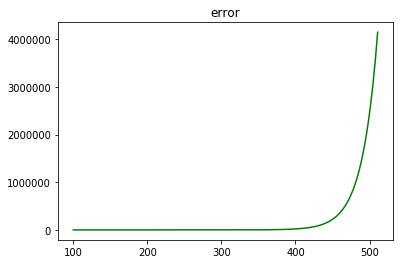

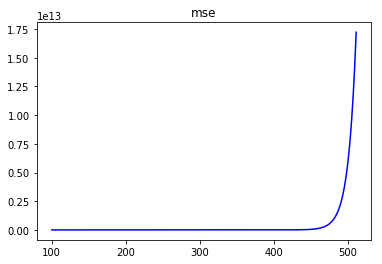

mae: 214720.965400429 
 mse: 456182813888.252 
 res: 1396814330.72686


In [20]:
D=3
x0=0.36
n_new=412

for i in range(200): #eliminar o transiente
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    

x_timeser=matrix(lenght+n_new, 1)

for i in range(lenght+n_new):
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    x_timeser[i,0]=x1
    
print(x_timeser[:lenght])

x_timeser_r=x_timeser.copy() #cópia da série original que nunca será modificada
x_timeser_o=x_timeser.copy() #cópia da série, no final serão adicionados os novos pontos reconstrúidos pelo método
coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    coor_emb[i,0]=x_timeser[i,0] #pegando as coordenadas no espaço de dimensão D
    coor_emb[i,1]=x_timeser[i+1,0]
    coor_emb[i,2]=x_timeser[i+2,0]



for i in range(lenght):
        print(i,coor_emb[i,0],coor_emb[i,1],coor_emb[i,2])
dist0=[]
dist1=[]
for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        print(coor_emb[l-D,i])
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        print(i,m_dist[i,0])
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1],coor_emb[l-D,1])
    
    np_m_dist=np.asarray(m_dist.tolist())

    
    ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
    dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
    dist0.append(dist_0)
    print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    dist1.append(dist_1)
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)





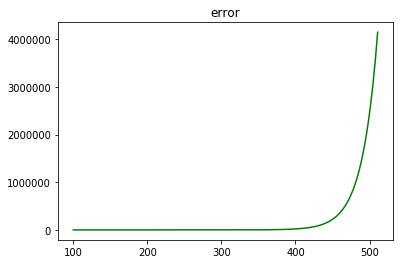

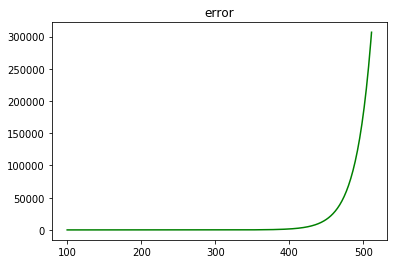

0 0.0579229768636282 0.0607735481027027
1 0.00444005361885294 0.00465856257386831
2 0.00465856257386825 0.00488782503943114
3 0.00488782503943188 0.00512837022950104
4 0.00512837022950378 0.00538075340231563
5 0.00538075340231607 0.00564555714210498
6 0.00564555714210107 0.00592339270389746
7 0.00592339270390074 0.00621490142451151
8 0.00621490142450811 0.00652075620293388
9 0.00652075620293353 0.00684166305364429
10 0.00570575061828612 0.0059865484897096
11 0.00514921827516595 0.00540262744564873
12 0.00306459901502901 0.00321541753791165
13 0.00321541753791115 0.00337365831301436
14 0.00337365831300401 0.00353968661262258
15 0.0035396866126217 0.00371388568524589
16 0.00371388568524163 0.00389665764022049
17 0.00389665764022103 0.0040884243759654
18 0.0040884243759668 0.00428962855383046
19 0.00428962855383045 0.00450073461991975
20 0.00450073461991415 0.00472222987718382
21 0.00472222987718317 0.00495462561029422
22 0.00495462561029027 0.00519845826582397
23 0.00519845826582314 0.00

In [19]:
plt.plot(t,np.asarray(x_timeser_r.tolist())[lenght:],'g')
plt.title('error')
plt.show()

plt.plot(t,np.asarray(dist0),'g')
plt.title('error')
plt.show()

for i in range(n_new):print(i,dist0[i],dist1[i])